In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("siddharthkumarsah/plastic-bottles-image-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/plastic-bottles-image-dataset


In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 29.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 125.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 59.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 37.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
import shutil

# Source path (where KaggleHub saved the dataset)
src_path = "/root/.cache/kagglehub/datasets/siddharthkumarsah/plastic-bottles-image-dataset/versions/2"

# Destination path
dst_path = "/content/plastic-bottles-image-dataset"

# Copy the entire folder to /content
shutil.copytree(src_path, dst_path)


FileNotFoundError: [Errno 2] No such file or directory: '/root/.cache/kagglehub/datasets/siddharthkumarsah/plastic-bottles-image-dataset/versions/2'

In [ ]:
import shutil
import os

# Paths
src = "/content/plastic-bottles-image-dataset/Plastic Bottle Image Dataset"
dst = "/content/dataset"

# Move and rename the folder
shutil.move(src, dst)

# Remove the now-empty original directory
os.rmdir("/content/plastic-bottles-image-dataset")


FileNotFoundError: [Errno 2] No such file or directory: '/content/plastic-bottles-image-dataset/Plastic Bottle Image Dataset'

In [ ]:
import shutil
from pathlib import Path


src = Path("/content/dataset")
dst = Path("/content/dataset1")


(dst / "images/train").mkdir(parents=True, exist_ok=True)
(dst / "images/val").mkdir(parents=True, exist_ok=True)
(dst / "images/test").mkdir(parents=True, exist_ok=True)
(dst / "labels/train").mkdir(parents=True, exist_ok=True)
(dst / "labels/val").mkdir(parents=True, exist_ok=True)
(dst / "labels/test").mkdir(parents=True, exist_ok=True)


def move_files(src_folder, dst_img_folder, dst_lbl_folder):
    for img in (src_folder / "images").glob("*"):
        shutil.copy(img, dst_img_folder / img.name)
    for lbl in (src_folder / "labels").glob("*.txt"):
        shutil.copy(lbl, dst_lbl_folder / lbl.name)

move_files(src / "train", dst / "images/train", dst / "labels/train")
move_files(src / "valid", dst / "images/val", dst / "labels/val")
move_files(src / "test", dst / "images/test", dst / "labels/test")

print("✅ Dataset rearranged to YOLOv11 format in /content/dataset1/")



✅ Dataset rearranged to YOLOv11 format in /content/dataset1/


In [ ]:
import yaml

data_yaml = {
    "path": str(dst),
    "train": "images/train",
    "val": "images/val",
    "test": "images/test",
    "names": {0: "bottle"}
}

with open(dst / "data.yaml", "w") as f:
    yaml.dump(data_yaml, f)

print("✅ data.yaml created at:", dst / "data.yaml")


✅ data.yaml created at: /content/dataset1/data.yaml


In [ ]:
from pathlib import Path

def clean_yolo_labels(label_dir):
    label_dir = Path(label_dir)
    fixed, removed = 0, 0

    for label_file in label_dir.rglob("*.txt"):
        with open(label_file, 'r') as f:
            lines = f.readlines()

        valid_lines = []
        for line in lines:
            parts = line.strip().split()
            if len(parts) == 5:
                cls, x, y, w, h = map(float, parts)
                if all(0 <= val <= 1 for val in (x, y, w, h)):
                    valid_lines.append(line)
                else:
                    removed += 1
            else:
                removed += 1

        with open(label_file, 'w') as f:
            f.writelines(valid_lines)
            fixed += 1

    print(f"✅ Cleaned {fixed} label files. 🧹 Removed {removed} bad boxes.")


clean_yolo_labels("/content/dataset1/labels/train")
clean_yolo_labels("/content/dataset1/labels/val")
clean_yolo_labels("/content/dataset1/labels/test")


✅ Cleaned 2177 label files. 🧹 Removed 135 bad boxes.
✅ Cleaned 1174 label files. 🧹 Removed 44 bad boxes.
✅ Cleaned 648 label files. 🧹 Removed 15 bad boxes.


In [ ]:
from pathlib import Path

def clean_and_strip_labels(label_dir):
    label_dir = Path(label_dir)
    cleaned_files = 0
    for file in label_dir.rglob("*.txt"):
        cleaned_lines = []
        with open(file, 'r') as f:
            for line in f:
                parts = line.strip().split()
                if len(parts) < 5:
                    continue  # skip invalid
                try:
                    cls, x, y, w, h = map(float, parts[:5])
                    if all(0 <= v <= 1 for v in (x, y, w, h)):
                        cleaned_lines.append(f"{int(cls)} {x:.6f} {y:.6f} {w:.6f} {h:.6f}\n")
                except ValueError:
                    continue  # skip if not all floats
        with open(file, 'w') as f:
            f.writelines(cleaned_lines)
        cleaned_files += 1

    print(f"✅ Processed {cleaned_files} label files in: {label_dir}")

# Apply to both train and val
clean_and_strip_labels("/content/dataset1/labels/train")
clean_and_strip_labels("/content/dataset1/labels/val")

clean_and_strip_labels("/content/dataset1/labels/test")


✅ Processed 2177 label files in: /content/dataset1/labels/train
✅ Processed 1174 label files in: /content/dataset1/labels/val
✅ Processed 648 label files in: /content/dataset1/labels/test


# **Taking entire dataset for rotating (for now avoid running this block)**






In [ ]:
import os
import shutil
import cv2
from tqdm import tqdm  # Progress bar

def rotate_bbox(x, y, w, h, angle):
    if angle == 90:
        return y, 1 - x, h, w
    elif angle == 180:
        return 1 - x, 1 - y, w, h
    elif angle == 270:
        return 1 - y, x, h, w
    else:
        return x, y, w, h  # original

def process_split(split_name, src_images_root, src_labels_root, dst_images_root, dst_labels_root):
    src_img_dir = os.path.join(src_images_root, split_name)
    src_lbl_dir = os.path.join(src_labels_root, split_name)
    dst_img_dir = os.path.join(dst_images_root, split_name)
    dst_lbl_dir = os.path.join(dst_labels_root, split_name)

    os.makedirs(dst_img_dir, exist_ok=True)
    os.makedirs(dst_lbl_dir, exist_ok=True)

    img_files = [f for f in os.listdir(src_img_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]

    print(f"Processing {split_name} set: {len(img_files)} images")
    for img_file in tqdm(img_files, desc=f"{split_name} Progress", unit="image"):
        base_name = os.path.splitext(img_file)[0]
        img_path = os.path.join(src_img_dir, img_file)
        lbl_path = os.path.join(src_lbl_dir, base_name + ".txt")

        if not os.path.exists(lbl_path):
            continue

        # Copy original image and label
        shutil.copy(img_path, os.path.join(dst_img_dir, img_file))
        shutil.copy(lbl_path, os.path.join(dst_lbl_dir, base_name + ".txt"))

        # Read image and labels
        img = cv2.imread(img_path)
        with open(lbl_path, "r") as f:
            labels = f.readlines()

        for angle in [90, 180, 270]:
            if angle == 90:
                rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
            elif angle == 180:
                rotated_img = cv2.rotate(img, cv2.ROTATE_180)
            elif angle == 270:
                rotated_img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

            new_img_name = f"{base_name}_rot{angle}.jpg"
            new_lbl_name = f"{base_name}_rot{angle}.txt"
            cv2.imwrite(os.path.join(dst_img_dir, new_img_name), rotated_img)

            new_labels = []
            for line in labels:
                parts = line.strip().split()
                cls, x, y, w, h = parts[0], *map(float, parts[1:])
                x_new, y_new, w_new, h_new = rotate_bbox(x, y, w, h, angle)
                new_labels.append(f"{cls} {x_new:.6f} {y_new:.6f} {w_new:.6f} {h_new:.6f}\n")

            with open(os.path.join(dst_lbl_dir, new_lbl_name), "w") as f:
                f.writelines(new_labels)

def prepare_augmented_dataset_fixed_structure(original_root="dataset1", augmented_root="dataset_aug"):
    src_images_root = os.path.join(original_root, "images")
    src_labels_root = os.path.join(original_root, "labels")
    dst_images_root = os.path.join(augmented_root, "images")
    dst_labels_root = os.path.join(augmented_root, "labels")

    for split in ["train", "val", "test"]:
        process_split(split, src_images_root, src_labels_root, dst_images_root, dst_labels_root)

# Run it
prepare_augmented_dataset_fixed_structure("dataset1", "dataset_aug")



Processing train set: 2177 images


train Progress: 100%|██████████| 2177/2177 [02:26<00:00, 14.83image/s]


Processing val set: 1174 images


val Progress: 100%|██████████| 1174/1174 [04:08<00:00,  4.73image/s]


Processing test set: 648 images


test Progress: 100%|██████████| 648/648 [03:05<00:00,  3.49image/s]


# ***25% split from Original dataset***

In [ ]:
import os
import shutil
import cv2
import random
from tqdm import tqdm

def rotate_bbox(x, y, w, h, angle):
    if angle == 90:
        return y, 1 - x, h, w
    elif angle == 180:
        return 1 - x, 1 - y, w, h
    elif angle == 270:
        return 1 - y, x, h, w
    else:
        return x, y, w, h

def process_split_subset(split_name, src_images_root, src_labels_root, dst_images_root, dst_labels_root):
    src_img_dir = os.path.join(src_images_root, split_name)
    src_lbl_dir = os.path.join(src_labels_root, split_name)
    dst_img_dir = os.path.join(dst_images_root, split_name)
    dst_lbl_dir = os.path.join(dst_labels_root, split_name)

    os.makedirs(dst_img_dir, exist_ok=True)
    os.makedirs(dst_lbl_dir, exist_ok=True)

    img_files = [f for f in os.listdir(src_img_dir) if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    img_files.sort()
    total_images = len(img_files)
    subset_size = total_images // 4

    subset_imgs = random.sample(img_files, subset_size)

    print(f"\n📦 Processing split: {split_name} — {subset_size} of {total_images} images will be augmented.")

    for img_file in tqdm(subset_imgs, desc=f"{split_name} Rotation", unit="image"):
        base_name = os.path.splitext(img_file)[0]
        img_path = os.path.join(src_img_dir, img_file)
        lbl_path = os.path.join(src_lbl_dir, base_name + ".txt")

        if not os.path.exists(lbl_path):
            continue

        # Read image and labels
        img = cv2.imread(img_path)
        with open(lbl_path, "r") as f:
            labels = f.readlines()

        # Save original image and label
        shutil.copy(img_path, os.path.join(dst_img_dir, img_file))
        shutil.copy(lbl_path, os.path.join(dst_lbl_dir, base_name + ".txt"))

        for angle in [90, 180, 270]:
            if angle == 90:
                rotated_img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
            elif angle == 180:
                rotated_img = cv2.rotate(img, cv2.ROTATE_180)
            elif angle == 270:
                rotated_img = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)

            new_img_name = f"{base_name}_rot{angle}.jpg"
            new_lbl_name = f"{base_name}_rot{angle}.txt"
            cv2.imwrite(os.path.join(dst_img_dir, new_img_name), rotated_img)

            new_labels = []
            for line in labels:
                parts = line.strip().split()
                cls, x, y, w, h = parts[0], *map(float, parts[1:])
                x_new, y_new, w_new, h_new = rotate_bbox(x, y, w, h, angle)
                new_labels.append(f"{cls} {x_new:.6f} {y_new:.6f} {w_new:.6f} {h_new:.6f}\n")

            with open(os.path.join(dst_lbl_dir, new_lbl_name), "w") as f:
                f.writelines(new_labels)

def prepare_augmented_subset_dataset(original_root="dataset1", augmented_root="dataset_aug"):
    src_images_root = os.path.join(original_root, "images")
    src_labels_root = os.path.join(original_root, "labels")
    dst_images_root = os.path.join(augmented_root, "images")
    dst_labels_root = os.path.join(augmented_root, "labels")

    for split in ["train", "val", "test"]:
        process_split_subset(split, src_images_root, src_labels_root, dst_images_root, dst_labels_root)


prepare_augmented_subset_dataset("dataset1", "dataset_aug")



📦 Processing split: train — 544 of 2177 images will be augmented.


train Rotation: 100%|██████████| 544/544 [00:37<00:00, 14.36image/s]



📦 Processing split: val — 293 of 1174 images will be augmented.


val Rotation: 100%|██████████| 293/293 [01:09<00:00,  4.19image/s]



📦 Processing split: test — 162 of 648 images will be augmented.


test Rotation: 100%|██████████| 162/162 [00:47<00:00,  3.41image/s]


In [ ]:
import yaml
dst = Path("/content/dataset_aug")
data_yaml = {
    "path": str(dst),
    "train": "images/train",
    "val": "images/val",
    "test": "images/test",
    "names": {0: "bottle"}
}

with open(dst / "data.yaml", "w") as f:
    yaml.dump(data_yaml, f)

print("✅ data.yaml created at:", dst / "data.yaml")

✅ data.yaml created at: /content/dataset_aug/data.yaml


# **DON'T RUN THIS.This is just the code for rotated images bounding boxes**

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image_path = 'a.jpg'
label_path = 'a.txt'

img = cv2.imread(image_path)
h, w = img.shape[:2]


def read_yolo_labels(label_path):
    with open(label_path, 'r') as f:
        lines = f.readlines()
    boxes = []
    for line in lines:
        cls, x, y, bw, bh = map(float, line.strip().split())
        boxes.append((int(cls), x, y, bw, bh))
    return boxes

original_boxes = read_yolo_labels(label_path)


def yolo_to_bbox(box, img_w, img_h):
    cls, x, y, bw, bh = box
    x1 = int((x - bw / 2) * img_w)
    y1 = int((y - bh / 2) * img_h)
    x2 = int((x + bw / 2) * img_w)
    y2 = int((y + bh / 2) * img_h)
    return cls, x1, y1, x2, y2

def rotate_boxes(boxes, angle):
    rotated = []
    for cls, x, y, bw, bh in boxes:
        if angle == 90:
            new_x = y
            new_y = 1 - x
            new_bw, new_bh = bh, bw
        elif angle == 180:
            new_x = 1 - x
            new_y = 1 - y
            new_bw, new_bh = bw, bh
        elif angle == 270:
            new_x = 1 - y
            new_y = x
            new_bw, new_bh = bh, bw
        else:
            new_x, new_y = x, y
            new_bw, new_bh = bw, bh
        rotated.append((cls, new_x, new_y, new_bw, new_bh))
    return rotated


def rotate_image(img, angle):
    if angle == 90:
        return cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    elif angle == 180:
        return cv2.rotate(img, cv2.ROTATE_180)
    elif angle == 270:
        return cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    else:
        return img

def draw_boxes(img, boxes):
    img_h, img_w = img.shape[:2]
    for box in boxes:
        cls, x1, y1, x2, y2 = yolo_to_bbox(box, img_w, img_h)
        cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), thickness=4)
    return img


angles = [0, 90, 180, 270]
images_with_boxes = []

for angle in angles:
    rotated_img = rotate_image(img, angle)
    rotated_boxes = rotate_boxes(original_boxes, angle)
    result_img = draw_boxes(rotated_img.copy(), rotated_boxes)
    images_with_boxes.append((angle, result_img))


plt.figure(figsize=(20, 10))
for idx, (angle, image) in enumerate(images_with_boxes):
    plt.subplot(1, 4, idx + 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(f'{angle}° Rotation')
    plt.axis('off')
plt.tight_layout()
plt.show()




In [ ]:
import zipfile
import os

def fast_zip_dataset(folder_path, zip_name="dataset_aug.zip"):
    with zipfile.ZipFile(zip_name, 'w', compression=zipfile.ZIP_STORED) as zipf:
        for root, _, files in os.walk(folder_path):
            for file in files:
                file_path = os.path.join(root, file)
                arcname = os.path.join(os.path.basename(folder_path), os.path.relpath(file_path, folder_path))
                zipf.write(file_path, arcname)


fast_zip_dataset("dataset_aug")


In [ ]:
from google.colab import files
f="dataset_aug.zip"
files.download(f)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from ultralytics import YOLO


model = YOLO("best.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [ ]:



results = model.train(data="/content/dataset_aug/data.yaml", epochs=100, imgsz=640, patience=10)




Ultralytics 8.3.162 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/dataset1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=0.0, plots=True, pose=12.0, pretrained=

100%|██████████| 755k/755k [00:00<00:00, 96.0MB/s]

Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  2    173824  ultralytics.nn.modules.block.C3k2            [128, 256, 2, True, 0.25]     
  3                  -1  1    590336  ultralytics.nn.modules.conv.Conv             [256, 256, 3, 2]              
  4                  -1  2    691712  ultralytics.nn.modules.block.C3k2            [256, 512, 2, True, 0.25]     
  5                  -1  1   2360320  ultralytics.nn.modules.conv.Conv             [512, 512, 3, 2]              
  6                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  7                  -1  1   2360320  ultralytics

  8                  -1  2   2234368  ultralytics.nn.modules.block.C3k2            [512, 512, 2, True]           
  9                  -1  1    656896  ultralytics.nn.modules.block.SPPF            [512, 512, 5]                 
 10                  -1  2   1455616  ultralytics.nn.modules.block.C2PSA           [512, 512, 2]                 
 11                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 12             [-1, 6]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 13                  -1  2   2496512  ultralytics.nn.modules.block.C3k2            [1024, 512, 2, True]          
 14                  -1  1         0  torch.nn.modules.upsampling.Upsample         [None, 2, 'nearest']          
 15             [-1, 4]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 16                  -1  2    756736  ultralytics.nn.modules.block.C3k2            [1024

100%|██████████| 5.35M/5.35M [00:00<00:00, 295MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1684.4±1281.8 MB/s, size: 452.4 KB)


train: Scanning /content/dataset1/labels/train... 2177 images, 81 backgrounds, 0 corrupt: 100%|██████████| 2177/2177 [00:00<00:00, 2410.03it/s]


train: New cache created: /content/dataset1/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1513.3±1722.9 MB/s, size: 718.8 KB)


val: Scanning /content/dataset1/labels/val... 1174 images, 31 backgrounds, 0 corrupt: 100%|██████████| 1174/1174 [00:01<00:00, 998.03it/s]

val: New cache created: /content/dataset1/labels/val.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      10.2G      1.843      2.109      1.996          5        640: 100%|██████████| 137/137 [01:44<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:55<00:00,  1.50s/it]

                   all       1174       1506    0.00892     0.0199    0.00137   0.000306



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      10.5G      2.088      2.314      2.162          4        640: 100%|██████████| 137/137 [01:46<00:00,  1.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:53<00:00,  1.45s/it]


                   all       1174       1506     0.0106      0.484    0.00758      0.002

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      10.4G       2.04      2.287      2.104          4        640: 100%|██████████| 137/137 [01:41<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:55<00:00,  1.51s/it]


                   all       1174       1506      0.242      0.218      0.135     0.0587

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      10.4G      1.881      2.144      2.003          3        640: 100%|██████████| 137/137 [01:42<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:56<00:00,  1.53s/it]


                   all       1174       1506      0.506       0.32      0.293      0.156

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      10.5G      1.845       2.08      1.947          6        640: 100%|██████████| 137/137 [01:45<00:00,  1.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:56<00:00,  1.51s/it]


                   all       1174       1506      0.453       0.32      0.264      0.138

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      10.5G      1.755      1.982      1.883          1        640: 100%|██████████| 137/137 [01:40<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:54<00:00,  1.46s/it]


                   all       1174       1506      0.469      0.345      0.293      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      10.5G      1.735      1.949      1.881          2        640: 100%|██████████| 137/137 [01:40<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:55<00:00,  1.51s/it]


                   all       1174       1506      0.328      0.251      0.174     0.0876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      10.4G      1.675      1.868      1.825          7        640: 100%|██████████| 137/137 [01:42<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:55<00:00,  1.49s/it]


                   all       1174       1506      0.462      0.404       0.33      0.188

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      10.5G      1.679      1.858      1.807          1        640: 100%|██████████| 137/137 [01:41<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:54<00:00,  1.48s/it]


                   all       1174       1506      0.478      0.357      0.313      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      10.5G       1.63        1.8       1.79          4        640: 100%|██████████| 137/137 [01:41<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 37/37 [00:53<00:00,  1.45s/it]


                   all       1174       1506      0.513      0.428      0.363      0.218

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      10.3G      1.628      1.819      1.794         50        640:  47%|████▋     | 65/137 [00:47<00:57,  1.26it/s]

In [ ]:
from google.colab import files

# Path to your trained weights
weight_path = "runs/detect/train/weights/best.pt"  # adjust if needed

# Download the file to your local PC
files.download(weight_path)


In [16]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt


model = YOLO("best.pt")

results = model("/content/g.png", show=True)

results[0].save(filename="/content/output.jpg")


FileNotFoundError: [Errno 2] No such file or directory: 'best.pt'

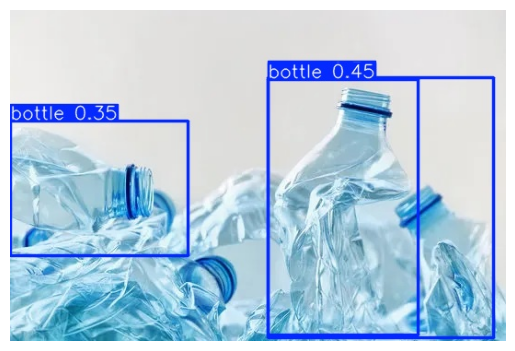

In [ ]:
import cv2
import matplotlib.pyplot as plt
img = cv2.imread("/content/output.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


In [ ]:
import shutil

# Path to the 'runs' folder and output zip path
folder_to_zip = "/content/runs"
output_zip = "/content/yolo_runs.zip"

# Create zip file
shutil.make_archive(output_zip.replace(".zip", ""), 'zip', folder_to_zip)


'/content/yolo_runs.zip'

In [ ]:
import shutil

# Paths
folder_to_zip = "/content/dataset1"
output_zip = "/content/dataset1.zip"

# Zip the folder
shutil.make_archive(output_zip.replace(".zip", ""), 'zip', folder_to_zip)


'/content/dataset1.zip'

# **Inference code**


In [12]:


from ultralytics import YOLO, SAM
import cv2

# Load YOLOv8 object detector
yolo_model = YOLO("best.pt")  # Or yolov8s.pt / yolov8x.pt

# Load SAM model
sam_model = SAM("mobile_sam.pt")

# Run object detection
results = yolo_model("/content/k7.png")

# Filter only 'bottle' class
bottle_class_id = 0  # COCO class ID for "bottle"
bottle_boxes = []
for r in results:
    for box, cls in zip(r.boxes.xyxy, r.boxes.cls):
        if int(cls) == bottle_class_id:
            bottle_boxes.append(box.tolist())  # [x1, y1, x2, y2]

# Run SAM with bounding box prompts
if bottle_boxes:
    sam_model.predict(
        "/content/k7.png",
        bboxes=bottle_boxes,
        save=True,
        save_dir="bottle_segments"
    )
else:
    print("No bottles detected.")

📷 Processing dataset1/images/train/-106_jpg.rf.fce981e61c903a42660187f7dc214037.jpg...

image 1/1 /home/developer/Desktop/y/dataset1/images/train/-106_jpg.rf.fce981e61c903a42660187f7dc214037.jpg: 384x640 6 bottles, 5.9ms
Speed: 0.8ms preprocess, 5.9ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/developer/Desktop/y/dataset1/images/train/-106_jpg.rf.fce981e61c903a42660187f7dc214037.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 52.3ms
Speed: 2.7ms preprocess, 52.3ms inference, 0.5ms postprocess per image at shape (1, 3, 1024, 1024)
📷 Processing dataset1/images/train/-109_jpg.rf.976ce2bf68a1b8f94295e13f969c46a9.jpg...

image 1/1 /home/developer/Desktop/y/dataset1/images/train/-109_jpg.rf.976ce2bf68a1b8f94295e13f969c46a9.jpg: 640x640 1 bottle, 6.8ms
Speed: 1.3ms preprocess, 6.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/developer/Desktop/y/dataset1/images/train/-109_jpg.rf.976ce2bf68a1b8f94295e13f969c46a9.jpg: 1024x1024 1 0

In [ ]:
from ultralytics import YOLO, SAM
import cv2
import matplotlib.pyplot as plt
import os
import glob

# Load YOLOv8 model
yolo_model = YOLO("runs/detect/train/weights/best.pt")
sam_model = SAM("mobile_sam.pt")

img_path = "/content/g.png"

# Run detection
results = yolo_model(img_path)

# Filter for 'bottle' class (assuming class 0)
bottle_class_id = 0
bottle_boxes = []
for r in results:
    for box, cls in zip(r.boxes.xyxy, r.boxes.cls):
        if int(cls) == bottle_class_id:
            bottle_boxes.append(box.tolist())

# Run MobileSAM
if bottle_boxes:
    sam_model.predict(
        source=img_path,
        bboxes=bottle_boxes,
        save=True  # saves to runs/segment/predictN
    )

    # ✅ Automatically find the latest saved image in runs/segment/predict*
    output_dirs = sorted(glob.glob("runs/segment/predict*/d.jpg"))
    if output_dirs:
        result_img_path = output_dirs[-1]  # most recent
        img = cv2.imread(result_img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        # Show image
        plt.figure(figsize=(10, 10))
        plt.imshow(img)
        plt.axis('off')
        plt.title("YOLO + MobileSAM Segmentation")
        plt.show()
    else:
        print("No output image found in runs/segment/predict*/")
else:
    print("No bottles detected.")


FileNotFoundError: [Errno 2] No such file or directory: 'runs/detect/train/weights/best.pt'

In [ ]:
import zipfile
import os

# Path to the ZIP file
zip_path = "a.zip"

# Destination folder to extract contents
extract_to = "/content/"

# Make sure destination exists
os.makedirs(extract_to, exist_ok=True)

# Extract ZIP
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print("Extraction complete.")


Extraction complete.


In [ ]:
import shutil

# Create a zip file named dataset1.zip from the folder dataset1
shutil.make_archive("dataset1", 'zip', "dataset1")

print("Zipped dataset1 folder as dataset1.zip")



Zipped dataset1 folder as dataset1.zip


# ***Video detection***


In [ ]:
from ultralytics import YOLO, SAM
import cv2
import numpy as np
from ultralytics import RTDETR

#yolo_model = RTDETR("best.pt")
# Load models
yolo_model = YOLO("best.pt")
sam_model = SAM("mobile_sam.pt")
#sam_model = SAM("sam2.1_b.pt")
video_path = "u1.mp4"  # Replace with your video path
output_path = "output_video.mp4"

# Open video
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise ValueError("Failed to open video")

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Create video writer
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_path, fourcc, fps, (width, height))

bottle_class_id = 0
alpha = 0.3
mask_color = (0, 255, 0)
box_color = (255, 0, 0)
box_thickness = 2
font_scale = 0.7

frame_count = 0
print(f"Processing {total_frames} frames...")

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    print(f"Processing frame {frame_count}/{total_frames}")

    # Convert to RGB (YOLO expects RGB)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # YOLO detection
    results = yolo_model(frame_rgb)

    # Extract bottle detections
    bottle_boxes = []
    bottle_confidences = []
    for r in results:
        for box, cls, conf in zip(r.boxes.xyxy, r.boxes.cls, r.boxes.conf):
            if int(cls) == bottle_class_id:
                bottle_boxes.append(box.tolist())
                bottle_confidences.append(conf.item())

    # Draw bounding boxes first
    for box, conf in zip(bottle_boxes, bottle_confidences):
        x1, y1, x2, y2 = box
        # Draw rectangle
        cv2.rectangle(frame_rgb,
                      (int(x1), int(y1)),
                      (int(x2), int(y2)),
                      box_color,
                      box_thickness)
        # Draw label background
        label = f"Bottle: {conf:.2f}"
        (text_width, text_height), _ = cv2.getTextSize(
            label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, 1)
        cv2.rectangle(frame_rgb,
                      (int(x1), int(y1) - text_height - 10),
                      (int(x1) + text_width, int(y1)),
                      box_color,
                      -1)  # Filled rectangle
        # Draw label text
        cv2.putText(frame_rgb, label,
                    (int(x1), int(y1) - 5),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    font_scale,
                    (255, 255, 255),  # White text
                    2)

    # Process detections with SAM
    if bottle_boxes:
        # Run MobileSAM
        sam_results = sam_model.predict(
            source=frame_rgb,
            bboxes=bottle_boxes,
            save=False,
            show=False
        )

        # Apply masks to frame
        if sam_results and sam_results[0].masks is not None:
            masks = sam_results[0].masks.data.cpu().numpy()
            for mask in masks:
                # Resize mask to frame dimensions
                mask_resized = cv2.resize(mask.astype(np.uint8), (width, height))

                # Create colored mask overlay
                colored_overlay = np.zeros_like(frame_rgb)
                colored_overlay[mask_resized == 1] = mask_color

                # Blend overlay with frame
                frame_rgb = cv2.addWeighted(frame_rgb, 1, colored_overlay, alpha, 0)

    # Convert back to BGR for output
    frame_bgr = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)
    out.write(frame_bgr)

# Cleanup
cap.release()
out.release()
print(f"Processing complete. Output saved to {output_path}")

Streaming output truncated to the last 5000 lines.
Speed: 9.9ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)
Processing frame 428/1288

0: 640x384 1 bottle, 10.9ms
Speed: 2.5ms preprocess, 10.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 1024x1024 1 0, 58.6ms
Speed: 6.9ms preprocess, 58.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)
Processing frame 429/1288

0: 640x384 1 bottle, 12.4ms
Speed: 2.6ms preprocess, 12.4ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 1024x1024 1 0, 57.1ms
Speed: 6.3ms preprocess, 57.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)
Processing frame 430/1288

0: 640x384 1 bottle, 10.8ms
Speed: 2.7ms preprocess, 10.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 384)

0: 1024x1024 1 0, 67.2ms
Speed: 10.3ms preprocess, 67.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)
Processing frame 4

In [ ]:
from google.colab import files
output_video_path = "output_video.mp4"
files.download(output_video_path)


In [ ]:
from ultralytics import YOLO, SAM
import cv2
import numpy as np
import os
from datetime import datetime

# Create output directory
output_dir = "detection_results"
os.makedirs(output_dir, exist_ok=True)
print(f"All results will be saved to: {output_dir}")

# Load models with GPU acceleration
yolo_model = YOLO("best.pt").cuda()
sam_model = SAM("mobile_sam.pt").cuda()

# Video paths
video_path = "a.mp4"  # Replace with your video path

# Open video
cap = cv2.VideoCapture(video_path)
if not cap.isOpened():
    raise ValueError(f"Failed to open video: {video_path}")

# Get video properties
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fps = cap.get(cv2.CAP_PROP_FPS)

# Configuration parameters
bottle_class_id = 0
conf_threshold = 0.5
iou_threshold = 0.45
max_frames = 10  # Only process first 10 frames
alpha = 0.3
mask_color = (0, 255, 0)
box_color = (255, 0, 0)
box_thickness = 2
font_scale = 0.7

# Prepare output video
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_video_path = os.path.join(output_dir, f"output_{timestamp}.mp4")
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (width, height))

frame_count = 0
print(f"Processing first {max_frames} frames...")

while cap.isOpened() and frame_count < max_frames:
    ret, frame = cap.read()
    if not ret:
        break

    frame_count += 1
    print(f"Processing frame {frame_count}/{max_frames}")

    # Convert to RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    original_frame = frame_rgb.copy()  # Keep original for comparison

    # YOLO detection with confidence threshold and NMS
    results = yolo_model(
        frame_rgb,
        conf=conf_threshold,
        iou=iou_threshold,
        classes=[bottle_class_id],
        verbose=False
    )

    # Extract bottle detections
    bottle_boxes = []
    bottle_confidences = []

    for r in results:
        for box, cls, conf in zip(r.boxes.xyxy, r.boxes.cls, r.boxes.conf):
            if int(cls) == bottle_class_id and conf >= conf_threshold:
                bottle_boxes.append(box.tolist())
                bottle_confidences.append(conf.item())

    # Draw bounding boxes
    for box, conf in zip(bottle_boxes, bottle_confidences):
        x1, y1, x2, y2 = box
        # Draw rectangle
        cv2.rectangle(frame_rgb,
                      (int(x1), int(y1)),
                      (int(x2), int(y2)),
                      box_color,
                      box_thickness)
        # Draw label
        label = f"Bottle: {conf:.2f}"
        (text_width, text_height), _ = cv2.getTextSize(
            label, cv2.FONT_HERSHEY_SIMPLEX, font_scale, 1)
        cv2.rectangle(frame_rgb,
                      (int(x1), int(y1) - text_height - 10),
                      (int(x1) + text_width, int(y1)),
                      box_color,
                      -1)
        cv2.putText(frame_rgb, label,
                    (int(x1), int(y1) - 5),
                    cv2.FONT_HERSHEY_SIMPLEX,
                    font_scale,
                    (255, 255, 255),
                    2)

    # Process detections with SAM
    if bottle_boxes:
        # Run MobileSAM
        sam_results = sam_model(
            source=frame_rgb,
            bboxes=bottle_boxes,
            verbose=False
        )

        # Apply masks to frame
        if sam_results and sam_results[0].masks is not None:
            masks = sam_results[0].masks.data.cpu().numpy()
            for mask in masks:
                mask_resized = cv2.resize(mask.astype(np.uint8), (width, height))
                colored_overlay = np.zeros_like(frame_rgb)
                colored_overlay[mask_resized == 1] = mask_color
                frame_rgb = cv2.addWeighted(frame_rgb, 1, colored_overlay, alpha, 0)

    # Convert back to BGR for output
    frame_bgr = cv2.cvtColor(frame_rgb, cv2.COLOR_RGB2BGR)

    # Save frame to video
    out.write(frame_bgr)

    # Save individual frames
    original_path = os.path.join(output_dir, f"frame_{frame_count}_original.jpg")
    processed_path = os.path.join(output_dir, f"frame_{frame_count}_processed.jpg")

    # Save original frame
    cv2.imwrite(original_path, cv2.cvtColor(original_frame, cv2.COLOR_RGB2BGR))
    # Save processed frame
    cv2.imwrite(processed_path, frame_bgr)

    print(f"Saved: {original_path}")
    print(f"Saved: {processed_path}")

# Cleanup
cap.release()
out.release()
print(f"Processing complete. Results saved to {output_dir}")
print(f"Short video created: {output_video_path}")

All results will be saved to: detection_results
Processing first 10 frames...
Processing frame 1/10
Saved: detection_results/frame_1_original.jpg
Saved: detection_results/frame_1_processed.jpg
Processing frame 2/10
Saved: detection_results/frame_2_original.jpg
Saved: detection_results/frame_2_processed.jpg
Processing frame 3/10
Saved: detection_results/frame_3_original.jpg
Saved: detection_results/frame_3_processed.jpg
Processing frame 4/10
Saved: detection_results/frame_4_original.jpg
Saved: detection_results/frame_4_processed.jpg
Processing frame 5/10
Saved: detection_results/frame_5_original.jpg
Saved: detection_results/frame_5_processed.jpg
Processing frame 6/10
Saved: detection_results/frame_6_original.jpg
Saved: detection_results/frame_6_processed.jpg
Processing frame 7/10
Saved: detection_results/frame_7_original.jpg
Saved: detection_results/frame_7_processed.jpg
Processing frame 8/10
Saved: detection_results/frame_8_original.jpg
Saved: detection_results/frame_8_processed.jpg
Pr

In [ ]:
import os
import cv2
import numpy as np
from tqdm import tqdm
from ultralytics import SAM

# === Paths ===
source_image_root = "dataset1/images"
source_label_root = "dataset1/labels"
output_image_root = "dataset2/images"
output_label_root = "dataset2/labels"
splits = ["train", "val"]

# Load SAM model
sam_model = SAM("mobile_sam.pt")

# Create output folders
for split in splits:
    os.makedirs(os.path.join(output_image_root, split), exist_ok=True)
    os.makedirs(os.path.join(output_label_root, split), exist_ok=True)

# Process each split
for split in splits:
    print(f"\n🔁 Converting {split} set...")
    image_dir = os.path.join(source_image_root, split)
    label_dir = os.path.join(source_label_root, split)
    out_image_dir = os.path.join(output_image_root, split)
    out_label_dir = os.path.join(output_label_root, split)

    image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]

    for image_file in tqdm(image_files):
        img_path = os.path.join(image_dir, image_file)
        label_path = os.path.join(label_dir, os.path.splitext(image_file)[0] + ".txt")
        out_label_path = os.path.join(out_label_dir, os.path.splitext(image_file)[0] + ".txt")

        # Copy image to new location
        cv2.imwrite(os.path.join(out_image_dir, image_file), cv2.imread(img_path))

        if not os.path.exists(label_path):
            print(f"⚠️ Missing label: {label_path}")
            continue

        # Load image
        image = cv2.imread(img_path)
        h_img, w_img = image.shape[:2]

        obb_labels = []
        with open(label_path, "r") as f:
            lines = f.readlines()

        for line in lines:
            parts = line.strip().split()
            if len(parts) != 5:
                continue  # skip malformed lines

            cls, cx, cy, w, h = map(float, parts)
            # Convert YOLO to pixel coords
            x1 = int((cx - w / 2) * w_img)
            y1 = int((cy - h / 2) * h_img)
            x2 = int((cx + w / 2) * w_img)
            y2 = int((cy + h / 2) * h_img)

            # Use SAM to extract mask and angle
            sam_results = sam_model(image, bboxes=[[x1, y1, x2, y2]])
            masks = sam_results[0].masks.data.cpu().numpy()

            found = False
            for mask in masks:
                mask_uint8 = (mask * 255).astype(np.uint8)
                contours, _ = cv2.findContours(mask_uint8, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

                for contour in contours:
                    if cv2.contourArea(contour) < 100:
                        continue

                    rect = cv2.minAreaRect(contour)
                    (rx, ry), (rw, rh), angle = rect
                    rx /= w_img
                    ry /= h_img
                    rw /= w_img
                    rh /= h_img
                    if angle < 0:
                        angle += 180

                    obb_labels.append(f"{int(cls)} {rx:.6f} {ry:.6f} {rw:.6f} {rh:.6f} {angle:.2f}")
                    found = True
                    break
                if found:
                    break

        # Save new OBB labels
        with open(out_label_path, "w") as f:
            f.write("\n".join(obb_labels))




Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 38.8M/38.8M [00:00<00:00, 128MB/s]



🔁 Converting train set...


  0%|          | 0/2177 [00:00<?, ?it/s]


0: 1024x1024 1 0, 1340.2ms
Speed: 114.0ms preprocess, 1340.2ms inference, 156.7ms postprocess per image at shape (1, 3, 1024, 1024)


  0%|          | 1/2177 [00:02<1:15:54,  2.09s/it]


0: 1024x1024 1 0, 83.0ms
Speed: 8.7ms preprocess, 83.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 83.2ms
Speed: 5.8ms preprocess, 83.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 82.9ms
Speed: 6.4ms preprocess, 82.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 6.3ms preprocess, 58.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  0%|          | 2/2177 [00:02<38:57,  1.07s/it]  


0: 1024x1024 1 0, 58.1ms
Speed: 6.2ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 7.5ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  0%|          | 3/2177 [00:02<23:29,  1.54it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 5.8ms preprocess, 56.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 5.4ms preprocess, 57.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.0ms
Speed: 5.9ms preprocess, 55.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 6.0ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  0%|          | 4/2177 [00:02<18:05,  2.00it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 7.9ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 9.7ms preprocess, 55.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 8.7ms preprocess, 55.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 8.8ms preprocess, 56.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 9.6ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  0%|          | 5/2177 [00:03<16:16,  2.22it/s]


0: 1024x1024 1 0, 54.7ms
Speed: 11.6ms preprocess, 54.7ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


  0%|          | 6/2177 [00:03<16:12,  2.23it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 14.1ms preprocess, 55.9ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


  0%|          | 7/2177 [00:04<15:07,  2.39it/s]


0: 1024x1024 1 0, 54.9ms
Speed: 6.5ms preprocess, 54.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 6.6ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  0%|          | 9/2177 [00:04<09:02,  4.00it/s]


0: 1024x1024 1 0, 55.6ms
Speed: 5.7ms preprocess, 55.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 54.7ms
Speed: 7.6ms preprocess, 54.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  1%|          | 11/2177 [00:04<06:32,  5.51it/s]


0: 1024x1024 1 0, 57.8ms
Speed: 10.3ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.3ms
Speed: 9.2ms preprocess, 55.3ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


  1%|          | 13/2177 [00:04<06:44,  5.35it/s]


0: 1024x1024 1 0, 55.4ms
Speed: 6.7ms preprocess, 55.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 6.6ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 6.3ms preprocess, 56.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  1%|          | 14/2177 [00:04<06:53,  5.23it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 8.0ms preprocess, 55.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 54.3ms
Speed: 8.5ms preprocess, 54.3ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


  1%|          | 16/2177 [00:05<07:07,  5.06it/s]


0: 1024x1024 1 0, 66.8ms
Speed: 5.9ms preprocess, 66.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.3ms
Speed: 6.3ms preprocess, 55.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  1%|          | 18/2177 [00:05<05:34,  6.45it/s]


0: 1024x1024 1 0, 55.2ms
Speed: 8.7ms preprocess, 55.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  1%|          | 19/2177 [00:05<05:16,  6.82it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 6.3ms preprocess, 56.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.0ms
Speed: 6.0ms preprocess, 60.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 7.6ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  1%|          | 20/2177 [00:05<05:47,  6.20it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 7.1ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 5.2ms preprocess, 58.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


  1%|          | 22/2177 [00:05<04:34,  7.84it/s]


0: 1024x1024 1 0, 55.4ms
Speed: 9.3ms preprocess, 55.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


  1%|          | 23/2177 [00:06<05:30,  6.51it/s]


0: 1024x1024 1 0, 54.7ms
Speed: 8.0ms preprocess, 54.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 7.1ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  1%|          | 25/2177 [00:06<04:40,  7.66it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 5.9ms preprocess, 56.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 6.1ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 8.5ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  1%|          | 27/2177 [00:06<04:19,  8.27it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 7.1ms preprocess, 56.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.5ms
Speed: 7.8ms preprocess, 68.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.5ms
Speed: 8.3ms preprocess, 67.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


  1%|▏         | 29/2177 [00:06<04:20,  8.24it/s]


0: 1024x1024 1 0, 67.9ms
Speed: 11.2ms preprocess, 67.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.3ms
Speed: 10.0ms preprocess, 67.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


  1%|▏         | 31/2177 [00:07<04:01,  8.88it/s]


0: 1024x1024 1 0, 67.5ms
Speed: 8.4ms preprocess, 67.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 10.3ms preprocess, 56.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 33/2177 [00:07<05:08,  6.94it/s]


0: 1024x1024 1 0, 55.2ms
Speed: 7.2ms preprocess, 55.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 54.6ms
Speed: 12.3ms preprocess, 54.6ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 35/2177 [00:07<05:41,  6.27it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 7.9ms preprocess, 55.7ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 36/2177 [00:08<06:18,  5.66it/s]


0: 1024x1024 1 0, 54.9ms
Speed: 6.9ms preprocess, 54.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 6.8ms preprocess, 55.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 38/2177 [00:08<05:01,  7.08it/s]


0: 1024x1024 1 0, 70.7ms
Speed: 10.9ms preprocess, 70.7ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 39/2177 [00:08<06:30,  5.47it/s]


0: 1024x1024 1 0, 65.1ms
Speed: 8.2ms preprocess, 65.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.6ms
Speed: 8.1ms preprocess, 65.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.1ms
Speed: 10.1ms preprocess, 64.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.0ms
Speed: 10.4ms preprocess, 64.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.9ms
Speed: 7.6ms preprocess, 63.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 40/2177 [00:09<08:16,  4.30it/s]


0: 1024x1024 1 0, 64.1ms
Speed: 8.0ms preprocess, 64.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.6ms
Speed: 7.8ms preprocess, 64.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.2ms
Speed: 10.5ms preprocess, 64.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 41/2177 [00:09<08:21,  4.26it/s]


0: 1024x1024 1 0, 63.1ms
Speed: 10.1ms preprocess, 63.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.9ms
Speed: 17.2ms preprocess, 63.9ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 43/2177 [00:09<08:35,  4.14it/s]


0: 1024x1024 1 0, 66.3ms
Speed: 7.4ms preprocess, 66.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.0ms
Speed: 9.1ms preprocess, 65.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 45/2177 [00:09<06:36,  5.38it/s]


0: 1024x1024 1 0, 63.4ms
Speed: 9.1ms preprocess, 63.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.7ms
Speed: 6.7ms preprocess, 68.7ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 47/2177 [00:10<05:27,  6.51it/s]


0: 1024x1024 1 0, 63.9ms
Speed: 9.5ms preprocess, 63.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 48/2177 [00:10<05:14,  6.77it/s]


0: 1024x1024 1 0, 68.5ms
Speed: 7.8ms preprocess, 68.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.1ms
Speed: 14.5ms preprocess, 70.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 49/2177 [00:10<05:29,  6.46it/s]


0: 1024x1024 1 0, 62.3ms
Speed: 8.8ms preprocess, 62.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 50/2177 [00:10<06:27,  5.49it/s]


0: 1024x1024 1 0, 55.2ms
Speed: 10.5ms preprocess, 55.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 52/2177 [00:11<06:25,  5.51it/s]


0: 1024x1024 1 0, 55.2ms
Speed: 6.1ms preprocess, 55.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 6.7ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 54/2177 [00:11<04:45,  7.45it/s]


0: 1024x1024 1 0, 54.8ms
Speed: 9.0ms preprocess, 54.8ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 55/2177 [00:11<06:05,  5.80it/s]


0: 1024x1024 1 0, 55.2ms
Speed: 6.6ms preprocess, 55.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 9.7ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 57/2177 [00:11<04:41,  7.53it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 6.5ms preprocess, 55.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 7.4ms preprocess, 56.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 59/2177 [00:11<03:53,  9.07it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 6.7ms preprocess, 56.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 6.2ms preprocess, 56.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 61/2177 [00:11<03:24, 10.33it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 6.4ms preprocess, 56.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 6.5ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 6.8ms preprocess, 56.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 63/2177 [00:12<03:33,  9.91it/s]


0: 1024x1024 1 0, 55.2ms
Speed: 7.6ms preprocess, 55.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 6.4ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 65/2177 [00:12<03:11, 11.01it/s]


0: 1024x1024 1 0, 64.7ms
Speed: 10.2ms preprocess, 64.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.5ms
Speed: 7.1ms preprocess, 55.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.2ms
Speed: 8.9ms preprocess, 62.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 67/2177 [00:12<04:49,  7.28it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 8.8ms preprocess, 55.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 68/2177 [00:12<04:36,  7.62it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 7.0ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 7.7ms preprocess, 55.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 6.4ms preprocess, 56.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 69/2177 [00:13<05:11,  6.77it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 7.8ms preprocess, 56.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 6.1ms preprocess, 56.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 6.9ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 71/2177 [00:13<04:37,  7.59it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 8.2ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 6.4ms preprocess, 56.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 72/2177 [00:13<04:40,  7.50it/s]


0: 1024x1024 1 0, 57.8ms
Speed: 6.0ms preprocess, 57.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 74/2177 [00:13<04:54,  7.15it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 9.5ms preprocess, 55.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 7.3ms preprocess, 56.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 7.7ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 76/2177 [00:13<04:42,  7.44it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 6.5ms preprocess, 55.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 6.0ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 7.0ms preprocess, 56.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  4%|▎         | 77/2177 [00:14<05:14,  6.68it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 6.4ms preprocess, 56.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 8.8ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  4%|▎         | 79/2177 [00:14<04:15,  8.22it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 6.8ms preprocess, 56.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 6.4ms preprocess, 56.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 6.9ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 6.7ms preprocess, 56.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 5.6ms preprocess, 56.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  4%|▎         | 81/2177 [00:14<04:51,  7.19it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 7.3ms preprocess, 56.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 7.1ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  4%|▍         | 83/2177 [00:14<04:05,  8.53it/s]


0: 1024x1024 1 0, 54.8ms
Speed: 9.4ms preprocess, 54.8ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


  4%|▍         | 84/2177 [00:15<05:01,  6.94it/s]


0: 1024x1024 1 0, 55.1ms
Speed: 6.6ms preprocess, 55.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.5ms
Speed: 9.4ms preprocess, 55.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 6.2ms preprocess, 56.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  4%|▍         | 86/2177 [00:15<04:35,  7.60it/s]


0: 1024x1024 1 0, 60.5ms
Speed: 7.9ms preprocess, 60.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  4%|▍         | 87/2177 [00:15<04:23,  7.92it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 6.3ms preprocess, 55.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 7.9ms preprocess, 56.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  4%|▍         | 89/2177 [00:15<03:44,  9.32it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 7.4ms preprocess, 56.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.0ms
Speed: 6.7ms preprocess, 55.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  4%|▍         | 91/2177 [00:15<03:28,  9.99it/s]


0: 1024x1024 1 0, 60.0ms
Speed: 8.2ms preprocess, 60.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 7.2ms preprocess, 56.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 7.6ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  4%|▍         | 93/2177 [00:15<03:46,  9.20it/s]


0: 1024x1024 1 0, 55.6ms
Speed: 6.9ms preprocess, 55.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.2ms
Speed: 8.3ms preprocess, 55.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


  4%|▍         | 95/2177 [00:16<04:24,  7.87it/s]


0: 1024x1024 1 0, 64.6ms
Speed: 6.7ms preprocess, 64.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 8.7ms preprocess, 55.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  4%|▍         | 97/2177 [00:16<03:51,  8.97it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 7.8ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.4ms
Speed: 6.3ms preprocess, 55.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.3ms
Speed: 5.8ms preprocess, 59.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 9.3ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.8ms
Speed: 10.9ms preprocess, 64.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


  5%|▍         | 99/2177 [00:16<04:43,  7.32it/s]


0: 1024x1024 1 0, 55.1ms
Speed: 7.8ms preprocess, 55.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


  5%|▍         | 100/2177 [00:17<05:27,  6.35it/s]


0: 1024x1024 1 0, 55.2ms
Speed: 7.2ms preprocess, 55.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 8.3ms preprocess, 55.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  5%|▍         | 102/2177 [00:17<04:38,  7.45it/s]


0: 1024x1024 1 0, 55.2ms
Speed: 7.3ms preprocess, 55.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.4ms
Speed: 8.2ms preprocess, 55.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  5%|▍         | 104/2177 [00:17<04:03,  8.52it/s]


0: 1024x1024 1 0, 71.6ms
Speed: 11.0ms preprocess, 71.6ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


  5%|▍         | 105/2177 [00:17<05:53,  5.85it/s]


0: 1024x1024 1 0, 55.6ms
Speed: 11.4ms preprocess, 55.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


  5%|▍         | 106/2177 [00:18<05:55,  5.83it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 6.4ms preprocess, 55.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.7ms
Speed: 7.4ms preprocess, 55.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  5%|▍         | 108/2177 [00:18<04:44,  7.28it/s]


0: 1024x1024 1 0, 54.8ms
Speed: 8.8ms preprocess, 54.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.7ms
Speed: 6.5ms preprocess, 55.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  5%|▌         | 110/2177 [00:18<04:04,  8.45it/s]


0: 1024x1024 1 0, 55.1ms
Speed: 10.1ms preprocess, 55.1ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.3ms
Speed: 9.6ms preprocess, 55.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


  5%|▌         | 111/2177 [00:18<06:03,  5.68it/s]


0: 1024x1024 1 0, 55.4ms
Speed: 6.8ms preprocess, 55.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.6ms
Speed: 7.3ms preprocess, 55.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  5%|▌         | 113/2177 [00:18<04:44,  7.24it/s]


0: 1024x1024 1 0, 69.5ms
Speed: 6.7ms preprocess, 69.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.5ms
Speed: 6.4ms preprocess, 55.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 6.3ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 6.7ms preprocess, 56.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  5%|▌         | 115/2177 [00:19<04:51,  7.07it/s]


0: 1024x1024 1 0, 55.6ms
Speed: 7.0ms preprocess, 55.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 6.3ms preprocess, 58.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  5%|▌         | 117/2177 [00:19<04:07,  8.32it/s]


0: 1024x1024 1 0, 55.6ms
Speed: 9.7ms preprocess, 55.6ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


  5%|▌         | 119/2177 [00:19<05:31,  6.22it/s]


0: 1024x1024 1 0, 54.7ms
Speed: 6.7ms preprocess, 54.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 6.5ms preprocess, 55.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 121/2177 [00:19<04:22,  7.84it/s]


0: 1024x1024 1 0, 55.6ms
Speed: 10.1ms preprocess, 55.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 7.8ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 7.9ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 123/2177 [00:20<04:17,  7.97it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 6.4ms preprocess, 56.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 6.9ms preprocess, 56.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 124/2177 [00:20<04:22,  7.82it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 8.8ms preprocess, 55.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.0ms
Speed: 10.8ms preprocess, 67.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 126/2177 [00:20<05:35,  6.12it/s]


0: 1024x1024 1 0, 65.3ms
Speed: 12.1ms preprocess, 65.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 127/2177 [00:21<07:12,  4.74it/s]


0: 1024x1024 1 0, 63.5ms
Speed: 12.9ms preprocess, 63.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 128/2177 [00:21<08:14,  4.14it/s]


0: 1024x1024 1 0, 64.7ms
Speed: 13.4ms preprocess, 64.7ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 129/2177 [00:21<09:39,  3.53it/s]


0: 1024x1024 1 0, 73.8ms
Speed: 10.6ms preprocess, 73.8ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 130/2177 [00:22<10:37,  3.21it/s]


0: 1024x1024 1 0, 80.1ms
Speed: 8.8ms preprocess, 80.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 81.6ms
Speed: 10.6ms preprocess, 81.6ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.5ms
Speed: 7.4ms preprocess, 72.5ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.0ms
Speed: 8.0ms preprocess, 70.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 131/2177 [00:22<11:17,  3.02it/s]


0: 1024x1024 1 0, 68.3ms
Speed: 10.6ms preprocess, 68.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 132/2177 [00:22<09:19,  3.66it/s]


0: 1024x1024 1 0, 55.4ms
Speed: 6.2ms preprocess, 55.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 134/2177 [00:23<06:49,  4.99it/s]


0: 1024x1024 1 0, 54.5ms
Speed: 8.3ms preprocess, 54.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.5ms
Speed: 7.6ms preprocess, 55.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 6.8ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 6.5ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 9.6ms preprocess, 58.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 8.1ms preprocess, 56.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 6.3ms preprocess, 56.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 5.8ms preprocess, 56.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 136/2177 [00:23<08:05,  4.20it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 6.9ms preprocess, 56.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 7.6ms preprocess, 56.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▋         | 138/2177 [00:23<06:05,  5.58it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 6.5ms preprocess, 56.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 6.8ms preprocess, 56.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▋         | 140/2177 [00:23<04:50,  7.02it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 7.3ms preprocess, 55.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.9ms
Speed: 8.9ms preprocess, 64.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 142/2177 [00:24<05:05,  6.67it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 9.8ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 143/2177 [00:24<04:50,  7.00it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 8.1ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 8.4ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 145/2177 [00:24<04:13,  8.01it/s]


0: 1024x1024 1 0, 57.8ms
Speed: 7.0ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 7.3ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 147/2177 [00:24<03:38,  9.29it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 12.0ms preprocess, 55.8ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.7ms
Speed: 6.6ms preprocess, 55.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 8.1ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 149/2177 [00:25<04:47,  7.05it/s]


0: 1024x1024 1 0, 54.5ms
Speed: 8.7ms preprocess, 54.5ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 150/2177 [00:25<05:41,  5.93it/s]


0: 1024x1024 1 0, 55.2ms
Speed: 7.2ms preprocess, 55.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 6.6ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 151/2177 [00:25<05:37,  6.01it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 7.3ms preprocess, 55.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 6.4ms preprocess, 56.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 7.6ms preprocess, 57.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 153/2177 [00:25<04:51,  6.94it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 6.5ms preprocess, 56.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 7.9ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 155/2177 [00:26<04:11,  8.04it/s]


0: 1024x1024 1 0, 55.2ms
Speed: 8.0ms preprocess, 55.2ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 156/2177 [00:26<05:01,  6.71it/s]


0: 1024x1024 1 0, 64.6ms
Speed: 7.4ms preprocess, 64.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.6ms
Speed: 8.3ms preprocess, 60.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 158/2177 [00:26<04:16,  7.86it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 6.9ms preprocess, 55.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.1ms
Speed: 9.5ms preprocess, 55.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 160/2177 [00:26<04:57,  6.77it/s]


0: 1024x1024 1 0, 54.9ms
Speed: 10.0ms preprocess, 54.9ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 161/2177 [00:27<06:03,  5.55it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 9.2ms preprocess, 56.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 162/2177 [00:27<07:01,  4.78it/s]


0: 1024x1024 1 0, 54.8ms
Speed: 5.2ms preprocess, 54.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 8.1ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 164/2177 [00:27<05:26,  6.17it/s]


0: 1024x1024 1 0, 54.9ms
Speed: 7.1ms preprocess, 54.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 6.2ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 166/2177 [00:27<04:30,  7.44it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 7.9ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 167/2177 [00:27<04:19,  7.76it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 6.9ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 7.0ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 169/2177 [00:28<03:37,  9.23it/s]


0: 1024x1024 1 0, 55.6ms
Speed: 11.4ms preprocess, 55.6ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 10.1ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 171/2177 [00:28<04:46,  7.00it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 6.1ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 8.2ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 173/2177 [00:28<04:03,  8.22it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 7.5ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 6.7ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 175/2177 [00:28<03:31,  9.46it/s]


0: 1024x1024 1 0, 54.9ms
Speed: 12.8ms preprocess, 54.9ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.5ms
Speed: 6.8ms preprocess, 55.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 9.9ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 7.1ms preprocess, 56.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 177/2177 [00:29<05:00,  6.65it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 7.2ms preprocess, 55.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 7.4ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 179/2177 [00:29<04:13,  7.89it/s]


0: 1024x1024 1 0, 57.5ms
Speed: 11.5ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 7.0ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 8.1ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 181/2177 [00:29<04:12,  7.91it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 6.8ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 7.7ms preprocess, 59.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 182/2177 [00:29<04:18,  7.71it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 7.8ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 7.7ms preprocess, 56.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.5ms
Speed: 6.7ms preprocess, 59.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 183/2177 [00:30<04:53,  6.80it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 9.3ms preprocess, 55.5ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 184/2177 [00:30<05:42,  5.81it/s]


0: 1024x1024 1 0, 54.8ms
Speed: 10.3ms preprocess, 54.8ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 185/2177 [00:30<07:25,  4.47it/s]


0: 1024x1024 1 0, 54.9ms
Speed: 6.5ms preprocess, 54.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.7ms
Speed: 10.3ms preprocess, 57.7ms inference, 3.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 9.5ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.9ms
Speed: 7.3ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▊         | 186/2177 [00:30<07:58,  4.16it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 10.5ms preprocess, 55.3ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▊         | 187/2177 [00:31<08:43,  3.80it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 9.3ms preprocess, 56.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▊         | 188/2177 [00:31<09:19,  3.55it/s]


0: 1024x1024 1 0, 54.8ms
Speed: 7.4ms preprocess, 54.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 6.6ms preprocess, 56.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▊         | 190/2177 [00:31<06:16,  5.27it/s]


0: 1024x1024 1 0, 58.7ms
Speed: 8.7ms preprocess, 58.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.6ms
Speed: 9.2ms preprocess, 55.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 7.7ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▉         | 192/2177 [00:31<05:14,  6.31it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 8.1ms preprocess, 56.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 7.6ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▉         | 194/2177 [00:32<04:15,  7.77it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 7.8ms preprocess, 56.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 5.8ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▉         | 196/2177 [00:32<03:40,  9.00it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 8.1ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 6.3ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 7.1ms preprocess, 56.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▉         | 198/2177 [00:32<03:43,  8.87it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 9.0ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 7.4ms preprocess, 56.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▉         | 199/2177 [00:32<03:55,  8.41it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 6.9ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.2ms
Speed: 16.1ms preprocess, 67.2ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▉         | 201/2177 [00:33<04:48,  6.84it/s]


0: 1024x1024 1 0, 64.4ms
Speed: 13.7ms preprocess, 64.4ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.4ms
Speed: 10.6ms preprocess, 65.4ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▉         | 203/2177 [00:33<05:29,  5.99it/s]


0: 1024x1024 1 0, 71.0ms
Speed: 10.2ms preprocess, 71.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▉         | 204/2177 [00:33<05:15,  6.26it/s]


0: 1024x1024 1 0, 70.7ms
Speed: 7.1ms preprocess, 70.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.4ms
Speed: 7.2ms preprocess, 64.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▉         | 206/2177 [00:33<04:20,  7.56it/s]


0: 1024x1024 1 0, 68.3ms
Speed: 6.2ms preprocess, 68.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.3ms
Speed: 7.5ms preprocess, 64.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 10%|▉         | 208/2177 [00:33<03:56,  8.32it/s]


0: 1024x1024 1 0, 63.6ms
Speed: 13.4ms preprocess, 63.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 10%|▉         | 209/2177 [00:34<04:38,  7.08it/s]


0: 1024x1024 1 0, 63.7ms
Speed: 12.0ms preprocess, 63.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.6ms
Speed: 11.2ms preprocess, 64.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.2ms
Speed: 8.0ms preprocess, 66.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.3ms
Speed: 9.0ms preprocess, 64.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.5ms
Speed: 9.9ms preprocess, 68.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 10%|▉         | 211/2177 [00:34<06:04,  5.40it/s]


0: 1024x1024 1 0, 69.3ms
Speed: 9.0ms preprocess, 69.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 10%|▉         | 212/2177 [00:34<05:23,  6.08it/s]


0: 1024x1024 1 0, 65.8ms
Speed: 10.0ms preprocess, 65.8ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.3ms
Speed: 8.1ms preprocess, 67.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 10%|▉         | 215/2177 [00:34<03:34,  9.16it/s]


0: 1024x1024 1 0, 68.6ms
Speed: 8.3ms preprocess, 68.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.7ms
Speed: 8.8ms preprocess, 69.7ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 10%|▉         | 217/2177 [00:35<03:21,  9.73it/s]


0: 1024x1024 1 0, 68.3ms
Speed: 9.6ms preprocess, 68.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 8.4ms preprocess, 58.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 10%|█         | 219/2177 [00:35<03:18,  9.86it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 6.4ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 7.4ms preprocess, 56.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 10%|█         | 221/2177 [00:35<03:04, 10.61it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 7.3ms preprocess, 56.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 6.9ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 10%|█         | 223/2177 [00:35<02:52, 11.36it/s]


0: 1024x1024 1 0, 60.9ms
Speed: 7.8ms preprocess, 60.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 9.8ms preprocess, 56.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 10%|█         | 225/2177 [00:36<03:42,  8.79it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 8.2ms preprocess, 55.5ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 7.9ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 10%|█         | 227/2177 [00:36<04:09,  7.81it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 7.6ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 7.2ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█         | 229/2177 [00:36<03:42,  8.77it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 7.8ms preprocess, 55.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 8.9ms preprocess, 59.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 9.0ms preprocess, 58.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█         | 230/2177 [00:36<04:30,  7.19it/s]


0: 1024x1024 1 0, 62.7ms
Speed: 13.4ms preprocess, 62.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 7.3ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█         | 232/2177 [00:36<03:52,  8.36it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 7.9ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 9.8ms preprocess, 56.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█         | 234/2177 [00:37<04:48,  6.74it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 6.9ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 7.0ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█         | 236/2177 [00:37<04:02,  8.02it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 8.8ms preprocess, 55.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█         | 237/2177 [00:37<03:57,  8.17it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 9.6ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 7.5ms preprocess, 57.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█         | 238/2177 [00:37<04:07,  7.85it/s]


0: 1024x1024 1 0, 58.5ms
Speed: 8.5ms preprocess, 58.5ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█         | 239/2177 [00:37<03:59,  8.08it/s]


0: 1024x1024 1 0, 55.6ms
Speed: 9.5ms preprocess, 55.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 54.9ms
Speed: 11.2ms preprocess, 54.9ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█         | 241/2177 [00:38<04:56,  6.53it/s]


0: 1024x1024 1 0, 55.0ms
Speed: 8.9ms preprocess, 55.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█         | 242/2177 [00:38<04:34,  7.04it/s]


0: 1024x1024 1 0, 58.1ms
Speed: 7.6ms preprocess, 58.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 7.3ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█         | 244/2177 [00:38<03:43,  8.63it/s]


0: 1024x1024 1 0, 57.7ms
Speed: 7.0ms preprocess, 57.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 7.7ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█▏        | 245/2177 [00:38<03:54,  8.23it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 6.6ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 7.0ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█▏        | 247/2177 [00:38<03:22,  9.54it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 8.0ms preprocess, 56.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 13.3ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 8.6ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 9.7ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 7.2ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█▏        | 249/2177 [00:39<04:22,  7.35it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 7.0ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 6.8ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 12%|█▏        | 251/2177 [00:39<03:39,  8.76it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 9.8ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 7.8ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.0ms
Speed: 8.2ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 12%|█▏        | 253/2177 [00:39<03:38,  8.81it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 7.8ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 6.6ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 7.4ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 7.1ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 12%|█▏        | 254/2177 [00:39<04:40,  6.86it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 8.0ms preprocess, 55.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 12%|█▏        | 256/2177 [00:40<04:24,  7.27it/s]


0: 1024x1024 1 0, 54.6ms
Speed: 8.9ms preprocess, 54.6ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 12%|█▏        | 257/2177 [00:40<05:25,  5.90it/s]


0: 1024x1024 1 0, 55.2ms
Speed: 7.0ms preprocess, 55.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 8.0ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 12%|█▏        | 259/2177 [00:40<04:16,  7.47it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 7.8ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 5.2ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 12%|█▏        | 261/2177 [00:40<03:41,  8.65it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 7.7ms preprocess, 56.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 7.2ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 12%|█▏        | 263/2177 [00:40<03:15,  9.78it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 9.7ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.9ms
Speed: 9.4ms preprocess, 59.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 12%|█▏        | 265/2177 [00:41<03:08, 10.13it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 6.8ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 8.2ms preprocess, 56.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 7.1ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 12%|█▏        | 267/2177 [00:41<03:17,  9.68it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 8.9ms preprocess, 56.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 7.8ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 7.9ms preprocess, 55.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 7.7ms preprocess, 57.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 7.8ms preprocess, 56.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 12%|█▏        | 269/2177 [00:41<04:03,  7.84it/s]


0: 1024x1024 1 0, 57.8ms
Speed: 6.6ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 7.4ms preprocess, 56.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 12%|█▏        | 271/2177 [00:41<03:32,  8.98it/s]


0: 1024x1024 1 0, 59.7ms
Speed: 7.9ms preprocess, 59.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 7.3ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 6.8ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 273/2177 [00:41<03:30,  9.06it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 8.3ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.7ms
Speed: 10.3ms preprocess, 55.7ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 275/2177 [00:42<04:26,  7.13it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 14.3ms preprocess, 55.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.4ms
Speed: 8.6ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 276/2177 [00:42<04:52,  6.51it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 7.3ms preprocess, 55.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 8.2ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 277/2177 [00:42<04:47,  6.60it/s]


0: 1024x1024 1 0, 58.5ms
Speed: 7.9ms preprocess, 58.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 8.4ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.4ms
Speed: 8.2ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.5ms
Speed: 8.4ms preprocess, 63.5ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 278/2177 [00:43<05:49,  5.44it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 7.6ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 7.6ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 280/2177 [00:43<04:37,  6.84it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 10.7ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.6ms
Speed: 9.5ms preprocess, 55.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 282/2177 [00:43<04:02,  7.82it/s]


0: 1024x1024 1 0, 55.2ms
Speed: 8.8ms preprocess, 55.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 283/2177 [00:43<03:53,  8.12it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 11.5ms preprocess, 55.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 284/2177 [00:43<05:06,  6.18it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 7.7ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 10.0ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 286/2177 [00:44<04:19,  7.29it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 9.2ms preprocess, 55.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 287/2177 [00:44<05:37,  5.60it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 8.0ms preprocess, 56.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 8.5ms preprocess, 58.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 288/2177 [00:44<05:21,  5.88it/s]


0: 1024x1024 1 0, 54.4ms
Speed: 9.7ms preprocess, 54.4ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 289/2177 [00:44<06:20,  4.97it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 8.9ms preprocess, 55.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 290/2177 [00:45<06:45,  4.66it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 9.0ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 8.4ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.2ms
Speed: 8.3ms preprocess, 59.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.2ms
Speed: 7.9ms preprocess, 69.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.1ms
Speed: 8.3ms preprocess, 68.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.2ms
Speed: 7.7ms preprocess, 65.2ms inference, 3.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.8ms
Speed: 10.5ms preprocess, 67.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 292/2177 [00:45<07:47,  4.04it/s]


0: 1024x1024 1 0, 65.2ms
Speed: 8.6ms preprocess, 65.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.2ms
Speed: 12.9ms preprocess, 67.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▎        | 294/2177 [00:45<06:06,  5.14it/s]


0: 1024x1024 1 0, 64.9ms
Speed: 12.2ms preprocess, 64.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▎        | 295/2177 [00:45<05:36,  5.59it/s]


0: 1024x1024 1 0, 64.3ms
Speed: 11.6ms preprocess, 64.3ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▎        | 296/2177 [00:46<07:17,  4.30it/s]


0: 1024x1024 1 0, 63.9ms
Speed: 8.1ms preprocess, 63.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.8ms
Speed: 12.6ms preprocess, 64.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▎        | 298/2177 [00:46<05:52,  5.34it/s]


0: 1024x1024 1 0, 64.3ms
Speed: 8.3ms preprocess, 64.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.8ms
Speed: 8.7ms preprocess, 63.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▍        | 300/2177 [00:46<04:39,  6.72it/s]


0: 1024x1024 1 0, 63.9ms
Speed: 8.9ms preprocess, 63.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.7ms
Speed: 14.8ms preprocess, 65.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.7ms
Speed: 10.7ms preprocess, 66.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.7ms
Speed: 14.1ms preprocess, 64.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.4ms
Speed: 9.8ms preprocess, 65.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.8ms
Speed: 10.0ms preprocess, 70.8ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 79.5ms
Speed: 15.7ms preprocess, 79.5ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.0ms
Speed: 11.0ms preprocess, 64.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 

 14%|█▍        | 302/2177 [00:47<07:00,  4.46it/s]


0: 1024x1024 1 0, 69.2ms
Speed: 12.7ms preprocess, 69.2ms inference, 1.8ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▍        | 303/2177 [00:47<06:34,  4.75it/s]


0: 1024x1024 1 0, 54.5ms
Speed: 10.7ms preprocess, 54.5ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▍        | 304/2177 [00:48<07:39,  4.08it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 7.4ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 9.6ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.0ms
Speed: 10.7ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.7ms
Speed: 8.7ms preprocess, 57.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▍        | 307/2177 [00:48<05:35,  5.57it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 6.5ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 7.4ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 7.7ms preprocess, 58.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.0ms
Speed: 7.5ms preprocess, 60.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▍        | 309/2177 [00:48<05:09,  6.03it/s]


0: 1024x1024 1 0, 59.3ms
Speed: 10.4ms preprocess, 59.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 12.7ms preprocess, 56.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▍        | 311/2177 [00:49<05:26,  5.71it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 8.6ms preprocess, 55.7ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▍        | 313/2177 [00:49<05:46,  5.39it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 8.1ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▍        | 314/2177 [00:49<05:08,  6.04it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 9.4ms preprocess, 55.8ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▍        | 315/2177 [00:49<06:11,  5.01it/s]


0: 1024x1024 1 0, 55.6ms
Speed: 10.5ms preprocess, 55.6ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▍        | 316/2177 [00:50<06:56,  4.47it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 8.6ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▍        | 317/2177 [00:50<05:54,  5.24it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 6.0ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 166.3ms
Speed: 12.6ms preprocess, 166.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▍        | 319/2177 [00:50<07:13,  4.28it/s]


0: 1024x1024 1 0, 105.1ms
Speed: 18.2ms preprocess, 105.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▍        | 321/2177 [00:51<06:19,  4.89it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 6.3ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▍        | 323/2177 [00:51<04:58,  6.21it/s]


0: 1024x1024 1 0, 59.5ms
Speed: 7.2ms preprocess, 59.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 11.5ms preprocess, 56.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▍        | 325/2177 [00:52<06:53,  4.48it/s]


0: 1024x1024 1 0, 68.6ms
Speed: 8.3ms preprocess, 68.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 9.8ms preprocess, 57.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▌        | 327/2177 [00:52<06:03,  5.09it/s]


0: 1024x1024 1 0, 61.9ms
Speed: 9.4ms preprocess, 61.9ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▌        | 328/2177 [00:52<05:23,  5.72it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 7.9ms preprocess, 56.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 7.5ms preprocess, 59.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 8.3ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 7.3ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 7.5ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 7.6ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 8.3ms preprocess, 58.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▌        | 329/2177 [00:53<08:00,  3.84it/s]


0: 1024x1024 1 0, 55.1ms
Speed: 9.2ms preprocess, 55.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▌        | 330/2177 [00:53<08:36,  3.57it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 7.7ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.5ms
Speed: 7.7ms preprocess, 59.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▌        | 332/2177 [00:53<05:58,  5.15it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 7.9ms preprocess, 55.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▌        | 333/2177 [00:53<05:40,  5.41it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 7.1ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.2ms
Speed: 9.0ms preprocess, 55.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▌        | 335/2177 [00:53<05:18,  5.79it/s]


0: 1024x1024 1 0, 55.2ms
Speed: 8.7ms preprocess, 55.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 8.8ms preprocess, 58.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▌        | 337/2177 [00:54<04:25,  6.94it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 10.1ms preprocess, 55.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▌        | 339/2177 [00:54<03:31,  8.68it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 6.8ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.5ms
Speed: 6.8ms preprocess, 60.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.3ms
Speed: 8.4ms preprocess, 59.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 7.8ms preprocess, 58.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▌        | 341/2177 [00:54<03:49,  7.99it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 10.8ms preprocess, 55.7ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▌        | 342/2177 [00:54<05:01,  6.10it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 7.2ms preprocess, 55.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 8.1ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▌        | 344/2177 [00:55<04:03,  7.52it/s]


0: 1024x1024 1 0, 57.3ms
Speed: 8.5ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▌        | 345/2177 [00:55<03:54,  7.80it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 8.1ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.7ms
Speed: 7.7ms preprocess, 57.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▌        | 346/2177 [00:55<04:01,  7.58it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 8.7ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 10.5ms preprocess, 56.4ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▌        | 348/2177 [00:55<04:40,  6.53it/s]


0: 1024x1024 1 0, 55.1ms
Speed: 8.5ms preprocess, 55.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 9.8ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▌        | 349/2177 [00:55<04:38,  6.57it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 8.4ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 8.6ms preprocess, 56.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▌        | 350/2177 [00:55<04:33,  6.67it/s]


0: 1024x1024 1 0, 55.6ms
Speed: 9.3ms preprocess, 55.6ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▌        | 351/2177 [00:56<05:27,  5.57it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 7.6ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 54.8ms
Speed: 10.6ms preprocess, 54.8ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▌        | 353/2177 [00:56<05:40,  5.36it/s]


0: 1024x1024 1 0, 62.9ms
Speed: 7.2ms preprocess, 62.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 8.2ms preprocess, 56.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 8.0ms preprocess, 58.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.0ms
Speed: 8.1ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▋        | 354/2177 [00:56<06:25,  4.73it/s]


0: 1024x1024 1 0, 58.2ms
Speed: 8.8ms preprocess, 58.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 7.9ms preprocess, 56.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▋        | 357/2177 [00:57<04:36,  6.59it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 6.3ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 8.1ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.5ms
Speed: 8.0ms preprocess, 65.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.4ms
Speed: 8.3ms preprocess, 55.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 9.0ms preprocess, 56.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.5ms
Speed: 8.4ms preprocess, 58.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▋        | 358/2177 [00:57<06:37,  4.57it/s]


0: 1024x1024 1 0, 67.0ms
Speed: 13.1ms preprocess, 67.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▋        | 359/2177 [00:57<07:30,  4.03it/s]


0: 1024x1024 1 0, 63.8ms
Speed: 10.9ms preprocess, 63.8ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 360/2177 [00:58<08:43,  3.47it/s]


0: 1024x1024 1 0, 65.9ms
Speed: 11.1ms preprocess, 65.9ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 361/2177 [00:58<09:42,  3.12it/s]


0: 1024x1024 1 0, 66.3ms
Speed: 8.9ms preprocess, 66.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 362/2177 [00:58<07:50,  3.86it/s]


0: 1024x1024 1 0, 63.2ms
Speed: 10.8ms preprocess, 63.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 363/2177 [00:59<09:03,  3.34it/s]


0: 1024x1024 1 0, 77.5ms
Speed: 10.3ms preprocess, 77.5ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 364/2177 [00:59<08:31,  3.55it/s]


0: 1024x1024 1 0, 73.3ms
Speed: 8.9ms preprocess, 73.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 365/2177 [00:59<06:55,  4.36it/s]


0: 1024x1024 1 0, 75.6ms
Speed: 8.1ms preprocess, 75.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.1ms
Speed: 8.5ms preprocess, 71.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 79.3ms
Speed: 9.6ms preprocess, 79.3ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 367/2177 [00:59<05:40,  5.31it/s]


0: 1024x1024 1 0, 66.7ms
Speed: 10.0ms preprocess, 66.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 368/2177 [01:00<05:17,  5.70it/s]


0: 1024x1024 1 0, 68.9ms
Speed: 13.4ms preprocess, 68.9ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 369/2177 [01:00<04:58,  6.07it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 10.2ms preprocess, 56.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 10.2ms preprocess, 56.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 370/2177 [01:00<06:28,  4.65it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 6.7ms preprocess, 56.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.2ms
Speed: 8.8ms preprocess, 59.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 8.5ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 10.1ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 372/2177 [01:00<05:37,  5.35it/s]


0: 1024x1024 1 0, 67.8ms
Speed: 8.0ms preprocess, 67.8ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 10.2ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 373/2177 [01:00<05:25,  5.55it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 10.2ms preprocess, 55.5ms inference, 1.8ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 374/2177 [01:01<06:57,  4.32it/s]


0: 1024x1024 1 0, 54.7ms
Speed: 7.9ms preprocess, 54.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 8.1ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 376/2177 [01:01<04:56,  6.08it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 9.0ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 9.1ms preprocess, 59.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 378/2177 [01:01<04:07,  7.27it/s]


0: 1024x1024 1 0, 57.5ms
Speed: 8.4ms preprocess, 57.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 6.3ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 6.6ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.6ms
Speed: 5.9ms preprocess, 62.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 6.4ms preprocess, 58.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 379/2177 [01:02<05:39,  5.29it/s]


0: 1024x1024 1 0, 55.1ms
Speed: 9.7ms preprocess, 55.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 380/2177 [01:02<06:30,  4.60it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 7.7ms preprocess, 55.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.8ms
Speed: 6.7ms preprocess, 59.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 10.1ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 8.8ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 7.8ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 382/2177 [01:02<06:04,  4.92it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 10.5ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 9.9ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 384/2177 [01:02<04:50,  6.17it/s]


0: 1024x1024 1 0, 58.6ms
Speed: 7.0ms preprocess, 58.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 8.7ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 385/2177 [01:03<04:43,  6.32it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 9.2ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 386/2177 [01:03<04:22,  6.82it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 7.9ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 8.6ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 388/2177 [01:03<03:30,  8.50it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 8.3ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 7.7ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.7ms
Speed: 7.9ms preprocess, 57.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 8.3ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 7.9ms preprocess, 59.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 390/2177 [01:03<04:10,  7.12it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 9.6ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 9.2ms preprocess, 57.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 8.8ms preprocess, 56.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.9ms
Speed: 10.8ms preprocess, 64.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 391/2177 [01:04<05:23,  5.51it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 7.4ms preprocess, 55.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.7ms
Speed: 10.5ms preprocess, 55.7ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 393/2177 [01:04<05:29,  5.42it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 7.4ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 8.8ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 395/2177 [01:04<04:28,  6.64it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 9.6ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.5ms
Speed: 7.7ms preprocess, 59.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 397/2177 [01:04<03:46,  7.85it/s]


0: 1024x1024 1 0, 58.0ms
Speed: 10.9ms preprocess, 58.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 398/2177 [01:05<04:45,  6.23it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 9.8ms preprocess, 57.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 399/2177 [01:05<05:47,  5.12it/s]


0: 1024x1024 1 0, 58.3ms
Speed: 9.3ms preprocess, 58.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 400/2177 [01:05<05:54,  5.02it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 10.5ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 10.6ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 10.0ms preprocess, 56.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 401/2177 [01:05<06:55,  4.27it/s]


0: 1024x1024 1 0, 57.3ms
Speed: 8.3ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.6ms
Speed: 10.0ms preprocess, 64.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 10.1ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 402/2177 [01:06<07:09,  4.14it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 7.5ms preprocess, 55.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 8.0ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▊        | 404/2177 [01:06<04:59,  5.92it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 8.7ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▊        | 405/2177 [01:06<04:33,  6.48it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 8.3ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 7.6ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▊        | 406/2177 [01:06<04:30,  6.55it/s]


0: 1024x1024 1 0, 57.6ms
Speed: 8.9ms preprocess, 57.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▊        | 407/2177 [01:06<04:08,  7.13it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 8.8ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 8.2ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 9.2ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▉        | 409/2177 [01:06<03:47,  7.76it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 8.0ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 9.8ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▉        | 411/2177 [01:07<03:15,  9.02it/s]


0: 1024x1024 1 0, 55.4ms
Speed: 10.9ms preprocess, 55.4ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▉        | 412/2177 [01:07<04:16,  6.88it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 9.5ms preprocess, 55.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▉        | 413/2177 [01:07<05:29,  5.35it/s]


0: 1024x1024 1 0, 54.9ms
Speed: 8.5ms preprocess, 54.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 7.6ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 9.3ms preprocess, 58.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▉        | 414/2177 [01:07<05:44,  5.12it/s]


0: 1024x1024 1 0, 62.9ms
Speed: 8.7ms preprocess, 62.9ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▉        | 416/2177 [01:08<06:04,  4.84it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 6.1ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.4ms
Speed: 8.7ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 9.8ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 8.7ms preprocess, 57.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 7.9ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▉        | 417/2177 [01:08<07:23,  3.97it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 7.5ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 7.6ms preprocess, 58.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 7.4ms preprocess, 56.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 7.3ms preprocess, 58.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 9.1ms preprocess, 57.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▉        | 418/2177 [01:09<08:14,  3.56it/s]


0: 1024x1024 1 0, 54.8ms
Speed: 9.5ms preprocess, 54.8ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▉        | 419/2177 [01:09<08:21,  3.50it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 8.6ms preprocess, 55.8ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▉        | 420/2177 [01:09<07:52,  3.72it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 7.9ms preprocess, 55.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.5ms
Speed: 10.2ms preprocess, 55.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▉        | 422/2177 [01:09<06:36,  4.43it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 7.8ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 8.1ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▉        | 424/2177 [01:10<04:51,  6.01it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 10.8ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 12.7ms preprocess, 56.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|█▉        | 426/2177 [01:10<03:56,  7.41it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 9.0ms preprocess, 57.0ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|█▉        | 427/2177 [01:10<03:46,  7.73it/s]


0: 1024x1024 1 0, 67.6ms
Speed: 7.0ms preprocess, 67.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.4ms
Speed: 13.8ms preprocess, 66.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|█▉        | 429/2177 [01:10<03:32,  8.21it/s]


0: 1024x1024 1 0, 65.7ms
Speed: 12.7ms preprocess, 65.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|█▉        | 430/2177 [01:10<03:36,  8.08it/s]


0: 1024x1024 1 0, 63.7ms
Speed: 8.4ms preprocess, 63.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.3ms
Speed: 11.1ms preprocess, 67.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|█▉        | 432/2177 [01:10<03:13,  9.03it/s]


0: 1024x1024 1 0, 67.7ms
Speed: 9.2ms preprocess, 67.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.3ms
Speed: 8.8ms preprocess, 65.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|█▉        | 434/2177 [01:11<02:59,  9.71it/s]


0: 1024x1024 1 0, 66.6ms
Speed: 7.4ms preprocess, 66.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.5ms
Speed: 9.2ms preprocess, 64.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.8ms
Speed: 10.1ms preprocess, 68.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.6ms
Speed: 8.2ms preprocess, 64.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.0ms
Speed: 7.8ms preprocess, 65.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.5ms
Speed: 8.2ms preprocess, 65.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.7ms
Speed: 12.5ms preprocess, 64.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|██        | 436/2177 [01:11<04:42,  6.17it/s]


0: 1024x1024 1 0, 64.9ms
Speed: 12.9ms preprocess, 64.9ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|██        | 437/2177 [01:11<05:51,  4.95it/s]


0: 1024x1024 1 0, 71.3ms
Speed: 9.7ms preprocess, 71.3ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|██        | 438/2177 [01:12<05:28,  5.30it/s]


0: 1024x1024 1 0, 70.2ms
Speed: 9.4ms preprocess, 70.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.9ms
Speed: 9.6ms preprocess, 67.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|██        | 440/2177 [01:12<04:20,  6.68it/s]


0: 1024x1024 1 0, 64.5ms
Speed: 10.9ms preprocess, 64.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|██        | 442/2177 [01:12<03:21,  8.59it/s]


0: 1024x1024 1 0, 66.8ms
Speed: 8.0ms preprocess, 66.8ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.7ms
Speed: 10.2ms preprocess, 71.7ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|██        | 444/2177 [01:12<03:05,  9.32it/s]


0: 1024x1024 1 0, 70.3ms
Speed: 10.7ms preprocess, 70.3ms inference, 1.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.2ms
Speed: 7.3ms preprocess, 55.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|██        | 446/2177 [01:13<04:43,  6.11it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 7.8ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 8.6ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██        | 448/2177 [01:13<03:54,  7.38it/s]


0: 1024x1024 1 0, 69.3ms
Speed: 7.5ms preprocess, 69.3ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 9.5ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██        | 450/2177 [01:13<03:31,  8.15it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 9.4ms preprocess, 55.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 12.4ms preprocess, 55.9ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██        | 452/2177 [01:13<04:15,  6.74it/s]


0: 1024x1024 1 0, 55.6ms
Speed: 8.7ms preprocess, 55.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 8.6ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 10.4ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██        | 454/2177 [01:14<03:55,  7.31it/s]


0: 1024x1024 1 0, 55.2ms
Speed: 9.6ms preprocess, 55.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██        | 455/2177 [01:14<04:39,  6.17it/s]


0: 1024x1024 1 0, 54.7ms
Speed: 8.6ms preprocess, 54.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██        | 456/2177 [01:14<05:02,  5.69it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 8.5ms preprocess, 55.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 10.1ms preprocess, 59.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 6.7ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.4ms
Speed: 7.9ms preprocess, 58.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██        | 458/2177 [01:14<04:43,  6.07it/s]


0: 1024x1024 1 0, 55.6ms
Speed: 8.6ms preprocess, 55.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██        | 459/2177 [01:15<04:29,  6.38it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 7.5ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.0ms
Speed: 10.6ms preprocess, 55.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██        | 461/2177 [01:15<05:06,  5.61it/s]


0: 1024x1024 1 0, 55.1ms
Speed: 11.2ms preprocess, 55.1ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.1ms
Speed: 11.1ms preprocess, 55.1ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██        | 462/2177 [01:15<06:25,  4.45it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 8.2ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 8.7ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██▏       | 464/2177 [01:16<04:49,  5.91it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 9.9ms preprocess, 57.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██▏       | 465/2177 [01:16<04:29,  6.34it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 8.0ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.0ms
Speed: 8.4ms preprocess, 57.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██▏       | 466/2177 [01:16<04:25,  6.43it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 6.8ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 8.0ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██▏       | 468/2177 [01:16<03:29,  8.14it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 9.8ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 469/2177 [01:16<03:22,  8.42it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 8.5ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 8.3ms preprocess, 58.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 9.2ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 10.5ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 9.7ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 9.7ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 471/2177 [01:17<04:35,  6.20it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 8.1ms preprocess, 56.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 8.1ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 473/2177 [01:17<03:42,  7.68it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 8.3ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.9ms
Speed: 9.3ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 8.1ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 474/2177 [01:17<04:11,  6.77it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 9.4ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 8.0ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 476/2177 [01:17<03:25,  8.27it/s]


0: 1024x1024 1 0, 57.5ms
Speed: 7.6ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 10.4ms preprocess, 56.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 478/2177 [01:17<03:05,  9.16it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 8.1ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.9ms
Speed: 8.1ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 480/2177 [01:17<02:49, 10.04it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 9.2ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 8.9ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 482/2177 [01:18<02:43, 10.37it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 7.2ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 8.4ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 8.2ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 484/2177 [01:18<02:51,  9.87it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 8.0ms preprocess, 57.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 7.5ms preprocess, 58.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 8.1ms preprocess, 57.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 7.4ms preprocess, 59.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 8.6ms preprocess, 56.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 9.3ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.9ms
Speed: 7.9ms preprocess, 59.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 8.4ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 486/2177 [01:18<04:32,  6.21it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 7.6ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 8.5ms preprocess, 58.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 487/2177 [01:18<04:27,  6.31it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 9.1ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 488/2177 [01:19<04:07,  6.82it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 7.8ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 9.5ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 490/2177 [01:19<03:24,  8.24it/s]


0: 1024x1024 1 0, 55.4ms
Speed: 8.4ms preprocess, 55.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 9.6ms preprocess, 56.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 492/2177 [01:19<04:09,  6.74it/s]


0: 1024x1024 1 0, 55.0ms
Speed: 8.1ms preprocess, 55.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.5ms
Speed: 9.4ms preprocess, 55.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 494/2177 [01:19<04:04,  6.87it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 7.8ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 8.4ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 496/2177 [01:20<03:26,  8.12it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 8.8ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 7.5ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 7.7ms preprocess, 57.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.4ms
Speed: 8.2ms preprocess, 58.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 498/2177 [01:20<03:37,  7.70it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 13.4ms preprocess, 55.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 499/2177 [01:20<04:44,  5.91it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 8.0ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 9.7ms preprocess, 57.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 500/2177 [01:20<04:35,  6.08it/s]


0: 1024x1024 1 0, 55.0ms
Speed: 9.4ms preprocess, 55.0ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 501/2177 [01:21<05:18,  5.26it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 10.4ms preprocess, 55.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 502/2177 [01:21<04:46,  5.84it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 8.7ms preprocess, 56.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 503/2177 [01:21<05:13,  5.34it/s]


0: 1024x1024 1 0, 55.1ms
Speed: 9.0ms preprocess, 55.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 9.6ms preprocess, 55.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 505/2177 [01:21<04:46,  5.84it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 8.5ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.0ms
Speed: 7.3ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 507/2177 [01:21<03:46,  7.36it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 7.4ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 8.4ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 509/2177 [01:22<03:11,  8.72it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 8.0ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.1ms
Speed: 8.9ms preprocess, 55.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 511/2177 [01:22<03:00,  9.21it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 6.6ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 8.9ms preprocess, 56.0ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▎       | 513/2177 [01:22<03:25,  8.11it/s]


0: 1024x1024 1 0, 55.6ms
Speed: 8.7ms preprocess, 55.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.7ms
Speed: 9.4ms preprocess, 62.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▎       | 515/2177 [01:22<03:09,  8.76it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 8.0ms preprocess, 56.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.7ms
Speed: 6.9ms preprocess, 57.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▎       | 516/2177 [01:22<03:18,  8.36it/s]


0: 1024x1024 1 0, 57.7ms
Speed: 8.4ms preprocess, 57.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.1ms
Speed: 8.1ms preprocess, 69.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▍       | 518/2177 [01:23<02:59,  9.23it/s]


0: 1024x1024 1 0, 71.0ms
Speed: 10.5ms preprocess, 71.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.4ms
Speed: 14.8ms preprocess, 67.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▍       | 520/2177 [01:23<02:53,  9.55it/s]


0: 1024x1024 1 0, 64.3ms
Speed: 10.7ms preprocess, 64.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.0ms
Speed: 11.4ms preprocess, 68.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▍       | 521/2177 [01:23<05:28,  5.04it/s]


0: 1024x1024 1 0, 66.7ms
Speed: 8.5ms preprocess, 66.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.7ms
Speed: 8.2ms preprocess, 67.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▍       | 523/2177 [01:24<04:21,  6.32it/s]


0: 1024x1024 1 0, 65.0ms
Speed: 8.4ms preprocess, 65.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.2ms
Speed: 10.2ms preprocess, 64.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▍       | 525/2177 [01:24<03:50,  7.18it/s]


0: 1024x1024 1 0, 65.1ms
Speed: 7.5ms preprocess, 65.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.3ms
Speed: 12.0ms preprocess, 68.3ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.9ms
Speed: 15.2ms preprocess, 63.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.1ms
Speed: 12.9ms preprocess, 65.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.9ms
Speed: 10.0ms preprocess, 68.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.8ms
Speed: 9.4ms preprocess, 70.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▍       | 527/2177 [01:24<04:54,  5.61it/s]


0: 1024x1024 1 0, 72.6ms
Speed: 8.9ms preprocess, 72.6ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▍       | 528/2177 [01:24<04:29,  6.11it/s]


0: 1024x1024 1 0, 67.1ms
Speed: 10.6ms preprocess, 67.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▍       | 529/2177 [01:24<04:11,  6.55it/s]


0: 1024x1024 1 0, 66.7ms
Speed: 12.7ms preprocess, 66.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.5ms
Speed: 10.5ms preprocess, 71.5ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▍       | 530/2177 [01:25<04:23,  6.26it/s]


0: 1024x1024 1 0, 64.1ms
Speed: 8.7ms preprocess, 64.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.4ms
Speed: 11.1ms preprocess, 68.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▍       | 531/2177 [01:25<04:28,  6.12it/s]


0: 1024x1024 1 0, 68.2ms
Speed: 8.4ms preprocess, 68.2ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.2ms
Speed: 9.3ms preprocess, 68.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.1ms
Speed: 8.8ms preprocess, 69.1ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 11.0ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 10.1ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 9.0ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.0ms
Speed: 8.5ms preprocess, 60.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▍       | 532/2177 [01:25<07:14,  3.78it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 9.9ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 8.4ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 7.2ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 7.6ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 25%|██▍       | 534/2177 [01:26<05:49,  4.69it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 9.5ms preprocess, 56.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 9.1ms preprocess, 56.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 25%|██▍       | 536/2177 [01:26<04:24,  6.21it/s]


0: 1024x1024 1 0, 59.3ms
Speed: 7.7ms preprocess, 59.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 7.3ms preprocess, 56.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.4ms
Speed: 7.4ms preprocess, 57.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 7.3ms preprocess, 58.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 7.8ms preprocess, 57.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 25%|██▍       | 538/2177 [01:26<04:37,  5.91it/s]


0: 1024x1024 1 0, 55.1ms
Speed: 8.7ms preprocess, 55.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 25%|██▍       | 539/2177 [01:26<04:17,  6.37it/s]


0: 1024x1024 1 0, 58.7ms
Speed: 8.5ms preprocess, 58.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.7ms
Speed: 7.7ms preprocess, 62.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 25%|██▍       | 541/2177 [01:26<03:35,  7.60it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 7.8ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.4ms
Speed: 8.2ms preprocess, 58.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 25%|██▍       | 543/2177 [01:27<03:04,  8.87it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 9.0ms preprocess, 57.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 25%|██▌       | 545/2177 [01:27<02:58,  9.15it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 10.2ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 8.1ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 25%|██▌       | 547/2177 [01:27<02:39, 10.23it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 8.3ms preprocess, 56.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 8.3ms preprocess, 57.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 25%|██▌       | 549/2177 [01:27<02:26, 11.11it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 9.5ms preprocess, 56.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 8.5ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 25%|██▌       | 551/2177 [01:27<02:25, 11.19it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 8.0ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 10.2ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 8.9ms preprocess, 58.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.5ms
Speed: 8.9ms preprocess, 58.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 8.1ms preprocess, 57.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 8.9ms preprocess, 57.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 25%|██▌       | 554/2177 [01:28<03:04,  8.78it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 8.5ms preprocess, 56.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 7.4ms preprocess, 57.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.0ms
Speed: 7.7ms preprocess, 57.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 26%|██▌       | 556/2177 [01:28<03:02,  8.86it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 8.1ms preprocess, 56.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 7.9ms preprocess, 56.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 7.9ms preprocess, 57.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 26%|██▌       | 558/2177 [01:28<03:01,  8.91it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 6.9ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 7.7ms preprocess, 56.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 26%|██▌       | 561/2177 [01:28<02:22, 11.31it/s]


0: 1024x1024 1 0, 55.6ms
Speed: 9.2ms preprocess, 55.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.2ms
Speed: 6.9ms preprocess, 59.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 26%|██▌       | 563/2177 [01:29<02:25, 11.08it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 8.9ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 8.5ms preprocess, 56.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 26%|██▌       | 565/2177 [01:29<02:28, 10.86it/s]


0: 1024x1024 1 0, 57.8ms
Speed: 8.3ms preprocess, 57.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 7.3ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.4ms
Speed: 9.0ms preprocess, 57.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.7ms
Speed: 7.2ms preprocess, 57.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.6ms
Speed: 7.3ms preprocess, 60.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 7.6ms preprocess, 57.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 7.2ms preprocess, 57.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 26%|██▌       | 567/2177 [01:29<03:41,  7.28it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 8.5ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 7.0ms preprocess, 58.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.3ms
Speed: 7.4ms preprocess, 58.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 26%|██▌       | 569/2177 [01:29<03:28,  7.72it/s]


0: 1024x1024 1 0, 55.4ms
Speed: 6.0ms preprocess, 55.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 9.4ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 26%|██▌       | 571/2177 [01:30<03:10,  8.44it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 8.5ms preprocess, 55.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 8.3ms preprocess, 56.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 26%|██▋       | 574/2177 [01:30<02:28, 10.76it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 9.5ms preprocess, 55.8ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 54.9ms
Speed: 12.8ms preprocess, 54.9ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 26%|██▋       | 576/2177 [01:30<03:48,  7.01it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 10.2ms preprocess, 55.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.4ms
Speed: 8.8ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 9.9ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.3ms
Speed: 9.4ms preprocess, 59.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 10.5ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 10.6ms preprocess, 57.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 11.1ms preprocess, 56.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 9.6ms preprocess, 58.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 10

 27%|██▋       | 577/2177 [01:31<06:08,  4.35it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 8.0ms preprocess, 56.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 9.9ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 27%|██▋       | 578/2177 [01:31<05:42,  4.67it/s]


0: 1024x1024 1 0, 58.3ms
Speed: 8.1ms preprocess, 58.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 8.8ms preprocess, 55.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 9.0ms preprocess, 58.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 27%|██▋       | 580/2177 [01:31<04:49,  5.52it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 8.6ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 8.9ms preprocess, 56.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 27%|██▋       | 582/2177 [01:32<03:57,  6.70it/s]


0: 1024x1024 1 0, 54.9ms
Speed: 10.9ms preprocess, 54.9ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 27%|██▋       | 583/2177 [01:32<04:42,  5.64it/s]


0: 1024x1024 1 0, 69.1ms
Speed: 8.6ms preprocess, 69.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 11.3ms preprocess, 56.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 27%|██▋       | 586/2177 [01:32<04:32,  5.84it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 7.3ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 7.8ms preprocess, 57.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 27%|██▋       | 588/2177 [01:33<03:37,  7.31it/s]


0: 1024x1024 1 0, 57.5ms
Speed: 9.0ms preprocess, 57.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.7ms
Speed: 10.5ms preprocess, 55.7ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 27%|██▋       | 590/2177 [01:33<03:58,  6.66it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 7.2ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 10.0ms preprocess, 56.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 27%|██▋       | 592/2177 [01:33<04:12,  6.29it/s]


0: 1024x1024 1 0, 55.4ms
Speed: 8.8ms preprocess, 55.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.4ms
Speed: 6.8ms preprocess, 60.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 27%|██▋       | 594/2177 [01:33<03:31,  7.48it/s]


0: 1024x1024 1 0, 57.7ms
Speed: 7.9ms preprocess, 57.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.0ms
Speed: 8.0ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 27%|██▋       | 596/2177 [01:34<03:03,  8.63it/s]


0: 1024x1024 1 0, 55.2ms
Speed: 11.7ms preprocess, 55.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 7.8ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 27%|██▋       | 598/2177 [01:34<03:34,  7.34it/s]


0: 1024x1024 1 0, 57.9ms
Speed: 6.4ms preprocess, 57.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 7.2ms preprocess, 57.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 600/2177 [01:34<03:03,  8.61it/s]


0: 1024x1024 1 0, 63.2ms
Speed: 6.0ms preprocess, 63.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 8.0ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 602/2177 [01:34<02:46,  9.47it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 10.0ms preprocess, 56.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.1ms
Speed: 9.6ms preprocess, 55.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 604/2177 [01:34<02:41,  9.76it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 9.3ms preprocess, 55.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 606/2177 [01:35<02:38,  9.88it/s]


0: 1024x1024 1 0, 55.6ms
Speed: 13.2ms preprocess, 55.6ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 6.1ms preprocess, 56.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 608/2177 [01:35<03:19,  7.86it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 8.1ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.9ms
Speed: 9.6ms preprocess, 67.9ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 610/2177 [01:35<03:15,  8.02it/s]


0: 1024x1024 1 0, 65.8ms
Speed: 9.8ms preprocess, 65.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 611/2177 [01:35<03:13,  8.11it/s]


0: 1024x1024 1 0, 65.0ms
Speed: 11.4ms preprocess, 65.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 612/2177 [01:36<04:47,  5.45it/s]


0: 1024x1024 1 0, 66.4ms
Speed: 10.8ms preprocess, 66.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.1ms
Speed: 5.6ms preprocess, 65.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 614/2177 [01:36<03:52,  6.72it/s]


0: 1024x1024 1 0, 68.5ms
Speed: 9.8ms preprocess, 68.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 615/2177 [01:36<03:42,  7.02it/s]


0: 1024x1024 1 0, 69.1ms
Speed: 8.5ms preprocess, 69.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.9ms
Speed: 15.0ms preprocess, 64.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 616/2177 [01:36<03:56,  6.59it/s]


0: 1024x1024 1 0, 64.4ms
Speed: 13.1ms preprocess, 64.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.9ms
Speed: 15.0ms preprocess, 63.9ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 618/2177 [01:37<04:52,  5.33it/s]


0: 1024x1024 1 0, 69.8ms
Speed: 8.7ms preprocess, 69.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 88.1ms
Speed: 10.5ms preprocess, 88.1ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.1ms
Speed: 15.2ms preprocess, 66.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.7ms
Speed: 9.0ms preprocess, 65.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 619/2177 [01:37<05:55,  4.38it/s]


0: 1024x1024 1 0, 68.4ms
Speed: 7.8ms preprocess, 68.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.9ms
Speed: 8.3ms preprocess, 66.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 29%|██▊       | 621/2177 [01:37<04:31,  5.74it/s]


0: 1024x1024 1 0, 67.6ms
Speed: 11.3ms preprocess, 67.6ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 29%|██▊       | 622/2177 [01:38<05:46,  4.49it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 7.9ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 9.1ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 29%|██▊       | 624/2177 [01:38<04:29,  5.76it/s]


0: 1024x1024 1 0, 71.0ms
Speed: 8.8ms preprocess, 71.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.6ms
Speed: 9.1ms preprocess, 55.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 8.0ms preprocess, 58.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 29%|██▉       | 626/2177 [01:38<03:59,  6.47it/s]


0: 1024x1024 1 0, 58.5ms
Speed: 9.0ms preprocess, 58.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 10.6ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 29%|██▉       | 628/2177 [01:38<03:24,  7.57it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 9.0ms preprocess, 56.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 15.1ms preprocess, 56.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 29%|██▉       | 630/2177 [01:39<03:49,  6.74it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 9.2ms preprocess, 56.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 29%|██▉       | 631/2177 [01:39<03:37,  7.12it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 7.9ms preprocess, 56.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 9.0ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 29%|██▉       | 633/2177 [01:39<03:04,  8.35it/s]


0: 1024x1024 1 0, 64.3ms
Speed: 8.2ms preprocess, 64.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.4ms
Speed: 9.4ms preprocess, 55.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 9.6ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 9.8ms preprocess, 58.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 9.6ms preprocess, 58.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 10.5ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 9.7ms preprocess, 57.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 10.0ms preprocess, 57.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024

 29%|██▉       | 636/2177 [01:40<04:12,  6.09it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 9.0ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 29%|██▉       | 637/2177 [01:40<04:10,  6.15it/s]


0: 1024x1024 1 0, 68.3ms
Speed: 10.3ms preprocess, 68.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 29%|██▉       | 638/2177 [01:40<05:07,  5.00it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 7.4ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.8ms
Speed: 7.9ms preprocess, 60.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 29%|██▉       | 641/2177 [01:40<03:24,  7.53it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 9.9ms preprocess, 55.8ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 29%|██▉       | 642/2177 [01:41<04:14,  6.02it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 9.1ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 8.5ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 8.3ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.3ms
Speed: 6.8ms preprocess, 58.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.3ms
Speed: 7.7ms preprocess, 58.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|██▉       | 643/2177 [01:41<05:14,  4.87it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 10.6ms preprocess, 55.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|██▉       | 644/2177 [01:41<05:41,  4.49it/s]


0: 1024x1024 1 0, 57.3ms
Speed: 12.0ms preprocess, 57.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|██▉       | 645/2177 [01:42<06:18,  4.04it/s]


0: 1024x1024 1 0, 55.1ms
Speed: 10.9ms preprocess, 55.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|██▉       | 646/2177 [01:42<06:41,  3.81it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 7.4ms preprocess, 55.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 11.0ms preprocess, 58.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|██▉       | 648/2177 [01:42<04:50,  5.26it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 8.7ms preprocess, 55.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.4ms
Speed: 9.0ms preprocess, 67.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|██▉       | 650/2177 [01:42<03:53,  6.54it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 8.0ms preprocess, 56.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.0ms
Speed: 9.0ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|██▉       | 652/2177 [01:42<03:11,  7.95it/s]


0: 1024x1024 1 0, 58.0ms
Speed: 10.5ms preprocess, 58.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|██▉       | 653/2177 [01:42<03:05,  8.23it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 7.4ms preprocess, 56.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 10.6ms preprocess, 55.8ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|███       | 655/2177 [01:43<03:36,  7.04it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 8.2ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 5.9ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|███       | 657/2177 [01:43<03:03,  8.29it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 9.9ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|███       | 658/2177 [01:43<02:58,  8.50it/s]


0: 1024x1024 1 0, 58.6ms
Speed: 12.0ms preprocess, 58.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|███       | 659/2177 [01:43<03:28,  7.27it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 9.4ms preprocess, 57.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|███       | 660/2177 [01:43<03:18,  7.65it/s]


0: 1024x1024 1 0, 57.9ms
Speed: 8.8ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.3ms
Speed: 10.5ms preprocess, 55.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|███       | 662/2177 [01:44<04:01,  6.28it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 10.8ms preprocess, 55.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|███       | 663/2177 [01:44<04:59,  5.05it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 10.3ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 7.5ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.7ms
Speed: 8.4ms preprocess, 63.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.0ms
Speed: 10.1ms preprocess, 61.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███       | 665/2177 [01:44<04:40,  5.39it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 9.2ms preprocess, 55.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███       | 666/2177 [01:45<04:14,  5.93it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 8.8ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 9.9ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.4ms
Speed: 9.7ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███       | 667/2177 [01:45<04:46,  5.27it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 9.4ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 8.6ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 9.4ms preprocess, 58.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 10.1ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███       | 668/2177 [01:45<05:24,  4.64it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 11.4ms preprocess, 55.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███       | 669/2177 [01:45<06:17,  3.99it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 7.2ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 8.6ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███       | 671/2177 [01:46<04:27,  5.63it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 10.4ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███       | 672/2177 [01:46<04:06,  6.12it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 9.4ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.5ms
Speed: 10.6ms preprocess, 55.5ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███       | 674/2177 [01:46<04:30,  5.56it/s]


0: 1024x1024 1 0, 57.8ms
Speed: 9.6ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.4ms
Speed: 10.7ms preprocess, 55.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███       | 676/2177 [01:46<04:00,  6.25it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 6.6ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 11.2ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███       | 679/2177 [01:47<02:52,  8.69it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 9.2ms preprocess, 56.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 8.8ms preprocess, 58.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 9.6ms preprocess, 56.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.5ms
Speed: 9.7ms preprocess, 60.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 10.6ms preprocess, 59.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.2ms
Speed: 10.4ms preprocess, 59.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 10.6ms preprocess, 58.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 7.5ms preprocess, 56.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 102

 31%|███▏      | 681/2177 [01:47<04:34,  5.45it/s]


0: 1024x1024 1 0, 57.6ms
Speed: 7.8ms preprocess, 57.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 7.6ms preprocess, 58.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.4ms
Speed: 8.8ms preprocess, 58.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 7.8ms preprocess, 57.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.8ms
Speed: 7.7ms preprocess, 58.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███▏      | 682/2177 [01:48<05:21,  4.66it/s]


0: 1024x1024 1 0, 66.7ms
Speed: 7.3ms preprocess, 66.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.9ms
Speed: 11.8ms preprocess, 67.9ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███▏      | 683/2177 [01:48<05:06,  4.87it/s]


0: 1024x1024 1 0, 63.4ms
Speed: 9.8ms preprocess, 63.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███▏      | 684/2177 [01:48<04:35,  5.42it/s]


0: 1024x1024 1 0, 71.2ms
Speed: 8.7ms preprocess, 71.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.2ms
Speed: 11.3ms preprocess, 66.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 32%|███▏      | 686/2177 [01:48<03:41,  6.73it/s]


0: 1024x1024 1 0, 65.1ms
Speed: 8.2ms preprocess, 65.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.7ms
Speed: 11.1ms preprocess, 68.7ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 32%|███▏      | 688/2177 [01:49<04:19,  5.74it/s]


0: 1024x1024 1 0, 70.0ms
Speed: 8.3ms preprocess, 70.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.9ms
Speed: 8.2ms preprocess, 64.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 32%|███▏      | 690/2177 [01:49<03:35,  6.91it/s]


0: 1024x1024 1 0, 67.0ms
Speed: 8.5ms preprocess, 67.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 32%|███▏      | 692/2177 [01:49<03:29,  7.09it/s]


0: 1024x1024 1 0, 63.7ms
Speed: 12.0ms preprocess, 63.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 32%|███▏      | 694/2177 [01:49<02:48,  8.81it/s]


0: 1024x1024 1 0, 64.6ms
Speed: 7.1ms preprocess, 64.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.9ms
Speed: 10.6ms preprocess, 65.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 32%|███▏      | 696/2177 [01:49<02:37,  9.40it/s]


0: 1024x1024 1 0, 65.2ms
Speed: 9.3ms preprocess, 65.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.9ms
Speed: 9.7ms preprocess, 66.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 32%|███▏      | 698/2177 [01:49<02:27,  9.99it/s]


0: 1024x1024 1 0, 67.7ms
Speed: 8.7ms preprocess, 67.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.4ms
Speed: 9.3ms preprocess, 67.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 32%|███▏      | 700/2177 [01:50<02:25, 10.12it/s]


0: 1024x1024 1 0, 68.0ms
Speed: 13.9ms preprocess, 68.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.6ms
Speed: 10.2ms preprocess, 69.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 32%|███▏      | 702/2177 [01:50<03:39,  6.73it/s]


0: 1024x1024 1 0, 70.2ms
Speed: 8.4ms preprocess, 70.2ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 84.5ms
Speed: 12.5ms preprocess, 84.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 8.3ms preprocess, 58.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 32%|███▏      | 703/2177 [01:50<04:10,  5.88it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 12.5ms preprocess, 56.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.6ms
Speed: 11.1ms preprocess, 55.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 32%|███▏      | 705/2177 [01:51<03:26,  7.13it/s]


0: 1024x1024 1 0, 55.4ms
Speed: 9.3ms preprocess, 55.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 32%|███▏      | 706/2177 [01:51<03:16,  7.48it/s]


0: 1024x1024 1 0, 57.7ms
Speed: 7.9ms preprocess, 57.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 9.7ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 8.3ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 708/2177 [01:51<03:15,  7.50it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 6.0ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 7.5ms preprocess, 57.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 710/2177 [01:51<02:47,  8.74it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 11.0ms preprocess, 55.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 711/2177 [01:51<03:38,  6.72it/s]


0: 1024x1024 1 0, 55.6ms
Speed: 9.7ms preprocess, 55.6ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 712/2177 [01:52<04:08,  5.89it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 8.9ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 713/2177 [01:52<03:58,  6.15it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 9.5ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 714/2177 [01:52<03:36,  6.75it/s]


0: 1024x1024 1 0, 54.7ms
Speed: 12.4ms preprocess, 54.7ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 715/2177 [01:52<04:57,  4.91it/s]


0: 1024x1024 1 0, 69.9ms
Speed: 11.0ms preprocess, 69.9ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 716/2177 [01:53<05:54,  4.12it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 7.8ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.6ms
Speed: 8.5ms preprocess, 68.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 718/2177 [01:53<04:10,  5.82it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 10.1ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.4ms
Speed: 7.9ms preprocess, 57.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 8.5ms preprocess, 58.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 719/2177 [01:53<04:27,  5.45it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 9.2ms preprocess, 57.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 7.8ms preprocess, 58.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 721/2177 [01:53<03:29,  6.96it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 13.8ms preprocess, 55.8ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 722/2177 [01:53<03:53,  6.24it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 7.2ms preprocess, 56.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 8.5ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 724/2177 [01:54<03:04,  7.88it/s]


0: 1024x1024 1 0, 76.2ms
Speed: 23.2ms preprocess, 76.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 725/2177 [01:54<02:59,  8.07it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 7.6ms preprocess, 56.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 8.7ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 727/2177 [01:54<02:32,  9.51it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 10.8ms preprocess, 57.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 10.7ms preprocess, 56.7ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 729/2177 [01:54<04:25,  5.45it/s]


0: 1024x1024 1 0, 55.6ms
Speed: 9.0ms preprocess, 55.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.5ms
Speed: 9.5ms preprocess, 60.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.7ms
Speed: 9.4ms preprocess, 60.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▎      | 730/2177 [01:55<04:38,  5.20it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 7.6ms preprocess, 56.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▎      | 731/2177 [01:55<04:15,  5.65it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 9.3ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 8.6ms preprocess, 58.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▎      | 733/2177 [01:55<03:20,  7.19it/s]


0: 1024x1024 1 0, 59.0ms
Speed: 10.3ms preprocess, 59.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▎      | 734/2177 [01:55<03:58,  6.05it/s]


0: 1024x1024 1 0, 58.1ms
Speed: 9.1ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 7.3ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.9ms
Speed: 7.8ms preprocess, 57.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▍      | 735/2177 [01:55<04:18,  5.58it/s]


0: 1024x1024 1 0, 60.1ms
Speed: 8.9ms preprocess, 60.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 8.3ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▍      | 737/2177 [01:56<03:26,  6.97it/s]


0: 1024x1024 1 0, 62.1ms
Speed: 7.2ms preprocess, 62.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 8.4ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▍      | 739/2177 [01:56<02:51,  8.39it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 8.9ms preprocess, 55.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 9.5ms preprocess, 57.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▍      | 740/2177 [01:56<03:08,  7.62it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 8.9ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.3ms
Speed: 11.2ms preprocess, 55.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 9.9ms preprocess, 55.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 10.7ms preprocess, 57.8ms inference, 1.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.5ms
Speed: 12.2ms preprocess, 55.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.4ms
Speed: 10.4ms preprocess, 55.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 10.6ms preprocess, 56.1ms inference, 1.8ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▍      | 742/2177 [01:57<07:04,  3.38it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 12.1ms preprocess, 55.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 10.0ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 10.4ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▍      | 743/2177 [01:57<06:53,  3.47it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 6.1ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.6ms
Speed: 8.7ms preprocess, 55.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▍      | 745/2177 [01:58<05:16,  4.53it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 10.4ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▍      | 746/2177 [01:58<04:40,  5.10it/s]


0: 1024x1024 1 0, 61.7ms
Speed: 6.2ms preprocess, 61.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 7.7ms preprocess, 56.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▍      | 748/2177 [01:58<03:37,  6.56it/s]


0: 1024x1024 1 0, 60.3ms
Speed: 8.8ms preprocess, 60.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 9.7ms preprocess, 56.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▍      | 750/2177 [01:58<03:03,  7.77it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 11.5ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▍      | 751/2177 [01:58<03:00,  7.89it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 8.2ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 9.3ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▍      | 753/2177 [01:58<02:36,  9.10it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 11.0ms preprocess, 56.3ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 8.7ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▍      | 755/2177 [01:59<03:20,  7.09it/s]


0: 1024x1024 1 0, 74.3ms
Speed: 8.8ms preprocess, 74.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 10.2ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▍      | 757/2177 [01:59<03:03,  7.73it/s]


0: 1024x1024 1 0, 57.7ms
Speed: 10.6ms preprocess, 57.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▍      | 758/2177 [01:59<03:57,  5.98it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 8.5ms preprocess, 55.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.3ms
Speed: 7.6ms preprocess, 58.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 7.0ms preprocess, 58.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▍      | 759/2177 [01:59<04:12,  5.62it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 11.0ms preprocess, 56.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.0ms
Speed: 10.2ms preprocess, 55.0ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▍      | 761/2177 [02:00<04:00,  5.88it/s]


0: 1024x1024 1 0, 61.4ms
Speed: 8.1ms preprocess, 61.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 8.9ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▌      | 763/2177 [02:00<03:14,  7.27it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 9.8ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 10.3ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 9.5ms preprocess, 59.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▌      | 764/2177 [02:00<03:48,  6.17it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 9.6ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▌      | 765/2177 [02:00<03:32,  6.64it/s]


0: 1024x1024 1 0, 70.3ms
Speed: 13.6ms preprocess, 70.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▌      | 766/2177 [02:00<03:20,  7.03it/s]


0: 1024x1024 1 0, 67.2ms
Speed: 7.7ms preprocess, 67.2ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.9ms
Speed: 10.3ms preprocess, 67.9ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▌      | 768/2177 [02:01<02:51,  8.20it/s]


0: 1024x1024 1 0, 65.9ms
Speed: 8.3ms preprocess, 65.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.3ms
Speed: 8.3ms preprocess, 65.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▌      | 770/2177 [02:01<02:34,  9.13it/s]


0: 1024x1024 1 0, 67.3ms
Speed: 10.3ms preprocess, 67.3ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▌      | 771/2177 [02:01<02:41,  8.71it/s]


0: 1024x1024 1 0, 67.8ms
Speed: 9.3ms preprocess, 67.8ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.0ms
Speed: 9.8ms preprocess, 66.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▌      | 773/2177 [02:01<02:32,  9.23it/s]


0: 1024x1024 1 0, 69.7ms
Speed: 7.6ms preprocess, 69.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.6ms
Speed: 8.4ms preprocess, 68.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.0ms
Speed: 7.6ms preprocess, 65.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.2ms
Speed: 8.2ms preprocess, 74.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.3ms
Speed: 7.4ms preprocess, 66.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.4ms
Speed: 7.6ms preprocess, 67.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▌      | 774/2177 [02:02<04:25,  5.28it/s]


0: 1024x1024 1 0, 69.6ms
Speed: 9.0ms preprocess, 69.6ms inference, 4.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.4ms
Speed: 9.1ms preprocess, 67.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.6ms
Speed: 8.8ms preprocess, 64.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.9ms
Speed: 8.6ms preprocess, 72.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▌      | 776/2177 [02:02<04:18,  5.43it/s]


0: 1024x1024 1 0, 64.2ms
Speed: 9.8ms preprocess, 64.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▌      | 777/2177 [02:02<03:56,  5.92it/s]


0: 1024x1024 1 0, 65.5ms
Speed: 7.5ms preprocess, 65.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.5ms
Speed: 10.3ms preprocess, 66.5ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▌      | 779/2177 [02:02<04:05,  5.70it/s]


0: 1024x1024 1 0, 67.1ms
Speed: 7.6ms preprocess, 67.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.4ms
Speed: 7.7ms preprocess, 72.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▌      | 780/2177 [02:03<04:02,  5.75it/s]


0: 1024x1024 1 0, 65.9ms
Speed: 9.9ms preprocess, 65.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▌      | 781/2177 [02:03<03:46,  6.17it/s]


0: 1024x1024 1 0, 65.6ms
Speed: 10.0ms preprocess, 65.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▌      | 782/2177 [02:03<03:33,  6.55it/s]


0: 1024x1024 1 0, 73.2ms
Speed: 9.8ms preprocess, 73.2ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.2ms
Speed: 12.2ms preprocess, 65.2ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▌      | 784/2177 [02:03<02:58,  7.82it/s]


0: 1024x1024 1 0, 76.6ms
Speed: 7.3ms preprocess, 76.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.5ms
Speed: 7.7ms preprocess, 69.5ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.5ms
Speed: 12.2ms preprocess, 72.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▌      | 786/2177 [02:03<03:02,  7.63it/s]


0: 1024x1024 1 0, 70.2ms
Speed: 13.3ms preprocess, 70.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▌      | 787/2177 [02:03<03:02,  7.62it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 11.0ms preprocess, 57.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▌      | 788/2177 [02:04<03:54,  5.93it/s]


0: 1024x1024 1 0, 58.3ms
Speed: 9.8ms preprocess, 58.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.3ms
Speed: 8.3ms preprocess, 60.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▋      | 790/2177 [02:04<03:09,  7.31it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 10.6ms preprocess, 55.7ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▋      | 791/2177 [02:04<03:40,  6.29it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 7.7ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 8.2ms preprocess, 57.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.4ms
Speed: 14.7ms preprocess, 59.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 9.0ms preprocess, 57.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.4ms
Speed: 8.9ms preprocess, 59.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 9.6ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▋      | 794/2177 [02:05<04:06,  5.62it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 6.7ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.9ms
Speed: 7.9ms preprocess, 59.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.4ms
Speed: 7.3ms preprocess, 61.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.7ms
Speed: 7.8ms preprocess, 60.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 795/2177 [02:05<04:43,  4.88it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 10.1ms preprocess, 56.4ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 796/2177 [02:05<04:57,  4.64it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 8.8ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.9ms
Speed: 7.8ms preprocess, 60.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.7ms
Speed: 8.1ms preprocess, 57.7ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 11.0ms preprocess, 58.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 8.2ms preprocess, 58.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.4ms
Speed: 8.1ms preprocess, 59.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.4ms
Speed: 8.3ms preprocess, 58.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 797/2177 [02:06<06:45,  3.40it/s]


0: 1024x1024 1 0, 55.4ms
Speed: 10.4ms preprocess, 55.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 798/2177 [02:06<05:34,  4.12it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 9.8ms preprocess, 55.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 799/2177 [02:06<04:39,  4.93it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 12.5ms preprocess, 55.8ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 800/2177 [02:06<05:27,  4.20it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 8.7ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.6ms
Speed: 8.5ms preprocess, 59.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 802/2177 [02:07<03:48,  6.02it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 10.7ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 803/2177 [02:07<03:30,  6.53it/s]


0: 1024x1024 1 0, 59.7ms
Speed: 7.5ms preprocess, 59.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.5ms
Speed: 8.0ms preprocess, 58.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 804/2177 [02:07<03:27,  6.62it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 8.5ms preprocess, 56.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 8.5ms preprocess, 56.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.2ms
Speed: 8.4ms preprocess, 60.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 806/2177 [02:07<03:08,  7.29it/s]


0: 1024x1024 1 0, 57.7ms
Speed: 9.2ms preprocess, 57.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.6ms
Speed: 10.6ms preprocess, 55.6ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 808/2177 [02:07<03:32,  6.45it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 9.4ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 7.5ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 7.9ms preprocess, 59.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 811/2177 [02:08<03:39,  6.23it/s]


0: 1024x1024 1 0, 55.4ms
Speed: 11.3ms preprocess, 55.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 812/2177 [02:08<03:24,  6.68it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 5.9ms preprocess, 56.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 6.0ms preprocess, 58.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 813/2177 [02:08<03:27,  6.57it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 10.0ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 814/2177 [02:08<03:16,  6.94it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 9.7ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 815/2177 [02:08<03:06,  7.28it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 10.1ms preprocess, 57.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 816/2177 [02:08<02:57,  7.69it/s]


0: 1024x1024 1 0, 57.5ms
Speed: 7.8ms preprocess, 57.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 7.8ms preprocess, 58.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 818/2177 [02:09<02:22,  9.54it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 8.4ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 9.3ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 820/2177 [02:09<02:14, 10.12it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 9.9ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.2ms
Speed: 9.1ms preprocess, 61.2ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 822/2177 [02:09<02:54,  7.77it/s]


0: 1024x1024 1 0, 58.7ms
Speed: 7.4ms preprocess, 58.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 9.4ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 824/2177 [02:09<02:34,  8.75it/s]


0: 1024x1024 1 0, 59.2ms
Speed: 13.1ms preprocess, 59.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 11.0ms preprocess, 58.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 826/2177 [02:09<02:21,  9.56it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 10.9ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 9.3ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 8.5ms preprocess, 58.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 9.4ms preprocess, 58.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 11.2ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 828/2177 [02:10<03:07,  7.18it/s]


0: 1024x1024 1 0, 58.8ms
Speed: 8.9ms preprocess, 58.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 8.8ms preprocess, 58.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 830/2177 [02:10<02:41,  8.33it/s]


0: 1024x1024 1 0, 57.7ms
Speed: 10.6ms preprocess, 57.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 831/2177 [02:10<02:37,  8.52it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 10.9ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.3ms
Speed: 11.8ms preprocess, 69.3ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 832/2177 [02:10<03:12,  6.98it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 10.9ms preprocess, 56.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 833/2177 [02:11<03:59,  5.61it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 9.4ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 10.0ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 835/2177 [02:11<03:16,  6.82it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 10.0ms preprocess, 56.7ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 836/2177 [02:11<03:53,  5.74it/s]


0: 1024x1024 1 0, 57.9ms
Speed: 10.1ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 838/2177 [02:11<02:49,  7.90it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 7.9ms preprocess, 57.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.4ms
Speed: 11.1ms preprocess, 71.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 9.6ms preprocess, 56.2ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 39%|███▊      | 840/2177 [02:12<03:27,  6.43it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 8.6ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.7ms
Speed: 15.7ms preprocess, 55.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 39%|███▊      | 842/2177 [02:12<03:49,  5.81it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 9.8ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 39%|███▊      | 843/2177 [02:12<03:35,  6.19it/s]


0: 1024x1024 1 0, 67.6ms
Speed: 6.5ms preprocess, 67.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.2ms
Speed: 7.0ms preprocess, 66.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 39%|███▉      | 845/2177 [02:12<02:56,  7.55it/s]


0: 1024x1024 1 0, 67.0ms
Speed: 9.7ms preprocess, 67.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 9.6ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 39%|███▉      | 848/2177 [02:13<02:17,  9.65it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 11.3ms preprocess, 56.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 8.3ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 39%|███▉      | 850/2177 [02:13<02:47,  7.92it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 10.3ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 7.2ms preprocess, 58.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 39%|███▉      | 852/2177 [02:13<02:31,  8.74it/s]


0: 1024x1024 1 0, 58.3ms
Speed: 7.9ms preprocess, 58.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 7.6ms preprocess, 57.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 6.7ms preprocess, 57.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 81.0ms
Speed: 7.9ms preprocess, 81.0ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 39%|███▉      | 854/2177 [02:14<03:14,  6.82it/s]


0: 1024x1024 1 0, 68.4ms
Speed: 7.6ms preprocess, 68.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.3ms
Speed: 12.6ms preprocess, 64.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 39%|███▉      | 856/2177 [02:14<02:55,  7.52it/s]


0: 1024x1024 1 0, 65.5ms
Speed: 17.6ms preprocess, 65.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 39%|███▉      | 857/2177 [02:14<04:04,  5.39it/s]


0: 1024x1024 1 0, 66.0ms
Speed: 9.5ms preprocess, 66.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.1ms
Speed: 7.8ms preprocess, 71.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.7ms
Speed: 10.9ms preprocess, 65.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.9ms
Speed: 7.8ms preprocess, 66.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 39%|███▉      | 858/2177 [02:15<04:42,  4.68it/s]


0: 1024x1024 1 0, 67.3ms
Speed: 10.7ms preprocess, 67.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.4ms
Speed: 8.1ms preprocess, 66.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 39%|███▉      | 859/2177 [02:15<04:28,  4.91it/s]


0: 1024x1024 1 0, 64.5ms
Speed: 10.8ms preprocess, 64.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|███▉      | 860/2177 [02:15<05:16,  4.16it/s]


0: 1024x1024 1 0, 66.2ms
Speed: 6.5ms preprocess, 66.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.5ms
Speed: 10.3ms preprocess, 66.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|███▉      | 862/2177 [02:15<03:51,  5.68it/s]


0: 1024x1024 1 0, 65.7ms
Speed: 9.5ms preprocess, 65.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.0ms
Speed: 8.0ms preprocess, 66.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|███▉      | 864/2177 [02:15<03:06,  7.06it/s]


0: 1024x1024 1 0, 74.2ms
Speed: 8.0ms preprocess, 74.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.5ms
Speed: 11.8ms preprocess, 68.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|███▉      | 866/2177 [02:16<02:43,  8.01it/s]


0: 1024x1024 1 0, 74.0ms
Speed: 9.8ms preprocess, 74.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|███▉      | 867/2177 [02:16<02:45,  7.91it/s]


0: 1024x1024 1 0, 69.0ms
Speed: 10.4ms preprocess, 69.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|███▉      | 868/2177 [02:16<04:19,  5.04it/s]


0: 1024x1024 1 0, 68.0ms
Speed: 6.5ms preprocess, 68.0ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.0ms
Speed: 8.3ms preprocess, 70.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|███▉      | 870/2177 [02:16<03:24,  6.41it/s]


0: 1024x1024 1 0, 65.8ms
Speed: 13.5ms preprocess, 65.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|████      | 872/2177 [02:17<03:12,  6.79it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 9.7ms preprocess, 56.2ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|████      | 873/2177 [02:17<03:44,  5.82it/s]


0: 1024x1024 1 0, 58.5ms
Speed: 7.7ms preprocess, 58.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 8.6ms preprocess, 58.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|████      | 874/2177 [02:17<03:35,  6.04it/s]


0: 1024x1024 1 0, 58.4ms
Speed: 11.5ms preprocess, 58.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 8.9ms preprocess, 58.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|████      | 876/2177 [02:17<02:46,  7.83it/s]


0: 1024x1024 1 0, 60.2ms
Speed: 10.0ms preprocess, 60.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 10.7ms preprocess, 58.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|████      | 877/2177 [02:17<02:53,  7.50it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 11.1ms preprocess, 56.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|████      | 878/2177 [02:18<03:58,  5.45it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 9.0ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.3ms
Speed: 7.3ms preprocess, 60.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 7.5ms preprocess, 59.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|████      | 880/2177 [02:18<03:18,  6.53it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 10.1ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|████      | 881/2177 [02:18<03:05,  7.00it/s]


0: 1024x1024 1 0, 58.7ms
Speed: 8.9ms preprocess, 58.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.6ms
Speed: 9.0ms preprocess, 60.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 882/2177 [02:18<03:08,  6.85it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 9.9ms preprocess, 56.9ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 883/2177 [02:18<03:43,  5.78it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 7.9ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.2ms
Speed: 7.1ms preprocess, 61.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 884/2177 [02:19<03:34,  6.03it/s]


0: 1024x1024 1 0, 57.7ms
Speed: 10.0ms preprocess, 57.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 885/2177 [02:19<03:12,  6.70it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 11.2ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 886/2177 [02:19<03:03,  7.03it/s]


0: 1024x1024 1 0, 59.5ms
Speed: 8.2ms preprocess, 59.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.2ms
Speed: 9.9ms preprocess, 59.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 888/2177 [02:19<02:32,  8.46it/s]


0: 1024x1024 1 0, 57.3ms
Speed: 7.7ms preprocess, 57.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.2ms
Speed: 8.3ms preprocess, 60.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 8.0ms preprocess, 58.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 890/2177 [02:19<02:29,  8.61it/s]


0: 1024x1024 1 0, 57.8ms
Speed: 11.4ms preprocess, 57.8ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 891/2177 [02:19<03:19,  6.44it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 11.1ms preprocess, 56.3ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 892/2177 [02:20<04:04,  5.26it/s]


0: 1024x1024 1 0, 58.6ms
Speed: 7.0ms preprocess, 58.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.4ms
Speed: 8.8ms preprocess, 57.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 894/2177 [02:20<03:06,  6.87it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 11.1ms preprocess, 55.9ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 895/2177 [02:20<03:50,  5.56it/s]


0: 1024x1024 1 0, 58.6ms
Speed: 7.4ms preprocess, 58.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 8.4ms preprocess, 58.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 897/2177 [02:20<02:58,  7.19it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 11.2ms preprocess, 55.7ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 898/2177 [02:21<03:31,  6.06it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 10.4ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████▏     | 899/2177 [02:21<03:12,  6.63it/s]


0: 1024x1024 1 0, 57.3ms
Speed: 10.5ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████▏     | 900/2177 [02:21<03:01,  7.04it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 10.3ms preprocess, 56.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████▏     | 901/2177 [02:21<04:05,  5.21it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 9.6ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.3ms
Speed: 8.4ms preprocess, 59.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.6ms
Speed: 8.3ms preprocess, 59.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.9ms
Speed: 11.4ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 9.7ms preprocess, 59.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████▏     | 902/2177 [02:22<05:09,  4.11it/s]


0: 1024x1024 1 0, 58.3ms
Speed: 8.5ms preprocess, 58.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 12.9ms preprocess, 56.7ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 904/2177 [02:22<04:24,  4.81it/s]


0: 1024x1024 1 0, 64.9ms
Speed: 9.3ms preprocess, 64.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 905/2177 [02:22<03:53,  5.44it/s]


0: 1024x1024 1 0, 58.3ms
Speed: 10.5ms preprocess, 58.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 906/2177 [02:22<03:33,  5.96it/s]


0: 1024x1024 1 0, 60.0ms
Speed: 8.2ms preprocess, 60.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.7ms
Speed: 8.5ms preprocess, 57.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 908/2177 [02:22<02:44,  7.73it/s]


0: 1024x1024 1 0, 58.9ms
Speed: 8.0ms preprocess, 58.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.8ms
Speed: 8.2ms preprocess, 59.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 910/2177 [02:22<02:19,  9.09it/s]


0: 1024x1024 1 0, 58.2ms
Speed: 12.0ms preprocess, 58.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 4.8ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 912/2177 [02:23<02:06, 10.01it/s]


0: 1024x1024 1 0, 61.0ms
Speed: 7.9ms preprocess, 61.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 9.3ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 914/2177 [02:23<01:56, 10.88it/s]


0: 1024x1024 1 0, 58.3ms
Speed: 8.6ms preprocess, 58.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.8ms
Speed: 9.0ms preprocess, 59.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 7.5ms preprocess, 58.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 916/2177 [02:23<02:03, 10.24it/s]


0: 1024x1024 1 0, 59.4ms
Speed: 8.4ms preprocess, 59.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 11.4ms preprocess, 56.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 10.6ms preprocess, 57.1ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 918/2177 [02:23<02:47,  7.53it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 9.0ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 10.3ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 920/2177 [02:24<02:31,  8.27it/s]


0: 1024x1024 1 0, 57.3ms
Speed: 11.6ms preprocess, 57.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 921/2177 [02:24<03:13,  6.49it/s]


0: 1024x1024 1 0, 57.8ms
Speed: 10.3ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.5ms
Speed: 10.3ms preprocess, 61.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 923/2177 [02:24<02:49,  7.39it/s]


0: 1024x1024 1 0, 67.6ms
Speed: 11.5ms preprocess, 67.6ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 924/2177 [02:24<03:37,  5.76it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 11.1ms preprocess, 57.2ms inference, 2.3ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 925/2177 [02:25<05:03,  4.13it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 8.9ms preprocess, 56.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.5ms
Speed: 9.1ms preprocess, 58.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 927/2177 [02:25<03:43,  5.60it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 9.9ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 929/2177 [02:25<02:47,  7.44it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 10.2ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 9.7ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 931/2177 [02:25<02:33,  8.10it/s]


0: 1024x1024 1 0, 57.5ms
Speed: 10.0ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 9.0ms preprocess, 58.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 933/2177 [02:26<02:21,  8.81it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 9.2ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 7.7ms preprocess, 58.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 935/2177 [02:26<02:10,  9.49it/s]


0: 1024x1024 1 0, 58.1ms
Speed: 8.5ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 8.8ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 937/2177 [02:26<02:01, 10.25it/s]


0: 1024x1024 1 0, 59.0ms
Speed: 8.0ms preprocess, 59.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 11.1ms preprocess, 58.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 939/2177 [02:26<02:43,  7.58it/s]


0: 1024x1024 1 0, 70.1ms
Speed: 15.4ms preprocess, 70.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 940/2177 [02:27<03:36,  5.72it/s]


0: 1024x1024 1 0, 70.3ms
Speed: 9.3ms preprocess, 70.3ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 941/2177 [02:27<03:24,  6.06it/s]


0: 1024x1024 1 0, 67.4ms
Speed: 7.2ms preprocess, 67.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.3ms
Speed: 7.4ms preprocess, 69.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.1ms
Speed: 8.1ms preprocess, 67.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.6ms
Speed: 7.8ms preprocess, 69.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 942/2177 [02:27<04:12,  4.88it/s]


0: 1024x1024 1 0, 69.7ms
Speed: 8.4ms preprocess, 69.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.3ms
Speed: 10.5ms preprocess, 68.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 943/2177 [02:27<04:04,  5.04it/s]


0: 1024x1024 1 0, 69.1ms
Speed: 8.1ms preprocess, 69.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.0ms
Speed: 13.3ms preprocess, 66.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 945/2177 [02:27<03:12,  6.40it/s]


0: 1024x1024 1 0, 74.4ms
Speed: 10.8ms preprocess, 74.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 946/2177 [02:28<03:00,  6.81it/s]


0: 1024x1024 1 0, 70.1ms
Speed: 8.5ms preprocess, 70.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.2ms
Speed: 10.2ms preprocess, 66.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▎     | 947/2177 [02:28<03:08,  6.52it/s]


0: 1024x1024 1 0, 65.4ms
Speed: 6.7ms preprocess, 65.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.0ms
Speed: 9.1ms preprocess, 65.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▎     | 949/2177 [02:28<02:35,  7.88it/s]


0: 1024x1024 1 0, 67.9ms
Speed: 10.7ms preprocess, 67.9ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▎     | 950/2177 [02:28<03:43,  5.50it/s]


0: 1024x1024 1 0, 64.7ms
Speed: 11.7ms preprocess, 64.7ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▎     | 951/2177 [02:29<04:43,  4.33it/s]


0: 1024x1024 1 0, 68.9ms
Speed: 14.1ms preprocess, 68.9ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▎     | 952/2177 [02:29<05:47,  3.52it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 7.8ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.1ms
Speed: 10.4ms preprocess, 68.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▍     | 954/2177 [02:29<04:49,  4.23it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 8.2ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 9.9ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▍     | 956/2177 [02:30<03:41,  5.52it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 8.8ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 6.0ms preprocess, 58.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 5.8ms preprocess, 58.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.3ms
Speed: 5.5ms preprocess, 59.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.3ms
Speed: 6.5ms preprocess, 59.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.4ms
Speed: 5.4ms preprocess, 60.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.9ms
Speed: 5.6ms preprocess, 59.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.9ms
Speed: 6.2ms preprocess, 60.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▍     | 958/2177 [02:32<12:01,  1.69it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 10.1ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▍     | 959/2177 [02:32<10:04,  2.02it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 11.0ms preprocess, 56.0ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▍     | 960/2177 [02:33<09:08,  2.22it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 11.0ms preprocess, 56.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▍     | 961/2177 [02:33<08:23,  2.42it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 9.5ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.6ms
Speed: 8.6ms preprocess, 61.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▍     | 963/2177 [02:33<05:36,  3.61it/s]


0: 1024x1024 1 0, 58.8ms
Speed: 8.5ms preprocess, 58.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▍     | 965/2177 [02:34<04:49,  4.19it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 7.6ms preprocess, 56.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 8.4ms preprocess, 58.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.1ms
Speed: 7.9ms preprocess, 60.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▍     | 967/2177 [02:34<03:55,  5.15it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 12.2ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 10.2ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.8ms
Speed: 10.5ms preprocess, 60.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▍     | 968/2177 [02:34<04:18,  4.68it/s]


0: 1024x1024 1 0, 65.0ms
Speed: 7.9ms preprocess, 65.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▍     | 970/2177 [02:34<03:29,  5.76it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 9.6ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▍     | 971/2177 [02:34<03:11,  6.28it/s]


0: 1024x1024 1 0, 58.2ms
Speed: 7.5ms preprocess, 58.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.8ms
Speed: 7.2ms preprocess, 69.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.8ms
Speed: 16.5ms preprocess, 70.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▍     | 973/2177 [02:35<02:56,  6.80it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 15.8ms preprocess, 56.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▍     | 974/2177 [02:35<03:46,  5.32it/s]


0: 1024x1024 1 0, 58.5ms
Speed: 10.6ms preprocess, 58.5ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.5ms
Speed: 10.7ms preprocess, 58.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▍     | 975/2177 [02:35<04:26,  4.51it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 8.3ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 8.1ms preprocess, 58.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▍     | 977/2177 [02:36<03:25,  5.84it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 9.0ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.9ms
Speed: 9.3ms preprocess, 70.9ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▍     | 979/2177 [02:36<02:50,  7.04it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 8.8ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.9ms
Speed: 6.8ms preprocess, 60.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▌     | 980/2177 [02:36<02:50,  7.01it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 12.2ms preprocess, 56.3ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▌     | 981/2177 [02:36<03:40,  5.42it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 9.2ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.4ms
Speed: 7.6ms preprocess, 58.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.5ms
Speed: 8.6ms preprocess, 59.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.1ms
Speed: 8.1ms preprocess, 60.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▌     | 983/2177 [02:36<03:25,  5.80it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 10.6ms preprocess, 56.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▌     | 984/2177 [02:37<03:09,  6.28it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 10.7ms preprocess, 56.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▌     | 987/2177 [02:37<02:45,  7.20it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 11.3ms preprocess, 57.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▌     | 988/2177 [02:37<03:26,  5.75it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 8.7ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.5ms
Speed: 8.5ms preprocess, 60.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▌     | 990/2177 [02:37<02:46,  7.15it/s]


0: 1024x1024 1 0, 59.9ms
Speed: 8.2ms preprocess, 59.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.9ms
Speed: 8.0ms preprocess, 59.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▌     | 992/2177 [02:38<02:21,  8.39it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 10.5ms preprocess, 56.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▌     | 993/2177 [02:38<03:01,  6.52it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 8.0ms preprocess, 56.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 10.3ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▌     | 995/2177 [02:38<02:33,  7.70it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 8.7ms preprocess, 57.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 8.4ms preprocess, 59.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▌     | 997/2177 [02:38<02:14,  8.79it/s]


0: 1024x1024 1 0, 60.5ms
Speed: 7.9ms preprocess, 60.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 10.1ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▌     | 999/2177 [02:38<02:06,  9.30it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 9.5ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 10.8ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.6ms
Speed: 11.1ms preprocess, 59.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 7.5ms preprocess, 58.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.7ms
Speed: 7.1ms preprocess, 67.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▌     | 1001/2177 [02:39<02:43,  7.21it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 10.8ms preprocess, 56.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▌     | 1002/2177 [02:39<03:20,  5.86it/s]


0: 1024x1024 1 0, 69.4ms
Speed: 14.1ms preprocess, 69.4ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▌     | 1003/2177 [02:39<03:52,  5.05it/s]


0: 1024x1024 1 0, 79.0ms
Speed: 11.0ms preprocess, 79.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.2ms
Speed: 11.7ms preprocess, 67.2ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.3ms
Speed: 16.0ms preprocess, 65.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.6ms
Speed: 13.0ms preprocess, 67.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▌     | 1005/2177 [02:40<04:00,  4.87it/s]


0: 1024x1024 1 0, 64.8ms
Speed: 12.0ms preprocess, 64.8ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▌     | 1006/2177 [02:40<04:39,  4.19it/s]


0: 1024x1024 1 0, 67.4ms
Speed: 10.3ms preprocess, 67.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.1ms
Speed: 10.2ms preprocess, 66.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▋     | 1007/2177 [02:40<04:26,  4.39it/s]


0: 1024x1024 1 0, 65.8ms
Speed: 14.1ms preprocess, 65.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.3ms
Speed: 11.1ms preprocess, 64.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▋     | 1009/2177 [02:41<04:28,  4.34it/s]


0: 1024x1024 1 0, 69.8ms
Speed: 12.7ms preprocess, 69.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▋     | 1010/2177 [02:41<04:08,  4.70it/s]


0: 1024x1024 1 0, 72.2ms
Speed: 9.8ms preprocess, 72.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▋     | 1012/2177 [02:41<02:56,  6.62it/s]


0: 1024x1024 1 0, 66.7ms
Speed: 8.3ms preprocess, 66.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.4ms
Speed: 8.8ms preprocess, 65.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 1014/2177 [02:41<02:30,  7.72it/s]


0: 1024x1024 1 0, 71.8ms
Speed: 10.1ms preprocess, 71.8ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 1015/2177 [02:41<02:28,  7.81it/s]


0: 1024x1024 1 0, 69.3ms
Speed: 13.7ms preprocess, 69.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 1016/2177 [02:42<02:31,  7.65it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 14.9ms preprocess, 56.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 1017/2177 [02:42<03:48,  5.07it/s]


0: 1024x1024 1 0, 57.9ms
Speed: 12.1ms preprocess, 57.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 1018/2177 [02:42<03:45,  5.14it/s]


0: 1024x1024 1 0, 59.7ms
Speed: 6.2ms preprocess, 59.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.2ms
Speed: 11.4ms preprocess, 66.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 1020/2177 [02:43<03:43,  5.18it/s]


0: 1024x1024 1 0, 57.3ms
Speed: 7.5ms preprocess, 57.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 7.5ms preprocess, 58.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 1022/2177 [02:43<02:52,  6.69it/s]


0: 1024x1024 1 0, 57.9ms
Speed: 10.9ms preprocess, 57.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 10.7ms preprocess, 56.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 1024/2177 [02:43<02:30,  7.67it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 10.0ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.8ms
Speed: 9.3ms preprocess, 66.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 1026/2177 [02:43<02:13,  8.65it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 9.9ms preprocess, 56.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 10.0ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 9.7ms preprocess, 58.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 9.3ms preprocess, 57.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.2ms
Speed: 8.5ms preprocess, 59.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 9.2ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.8ms
Speed: 9.3ms preprocess, 58.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 9.4ms preprocess, 58.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

 47%|████▋     | 1027/2177 [02:44<07:01,  2.73it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 11.6ms preprocess, 56.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 1028/2177 [02:45<07:01,  2.73it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 10.4ms preprocess, 56.6ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 1029/2177 [02:45<06:56,  2.76it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 8.2ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.3ms
Speed: 8.2ms preprocess, 58.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 1031/2177 [02:45<04:44,  4.03it/s]


0: 1024x1024 1 0, 57.5ms
Speed: 9.8ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.4ms
Speed: 10.6ms preprocess, 59.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 1032/2177 [02:46<04:19,  4.41it/s]


0: 1024x1024 1 0, 59.2ms
Speed: 11.1ms preprocess, 59.2ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 1033/2177 [02:46<04:27,  4.28it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 11.6ms preprocess, 55.8ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 1034/2177 [02:46<04:54,  3.88it/s]


0: 1024x1024 1 0, 59.0ms
Speed: 8.7ms preprocess, 59.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.6ms
Speed: 10.3ms preprocess, 59.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 1036/2177 [02:46<03:45,  5.06it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 8.3ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.8ms
Speed: 8.7ms preprocess, 58.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.6ms
Speed: 7.8ms preprocess, 59.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 1037/2177 [02:47<03:51,  4.93it/s]


0: 1024x1024 1 0, 57.9ms
Speed: 8.7ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.6ms
Speed: 10.8ms preprocess, 59.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 1038/2177 [02:47<03:38,  5.21it/s]


0: 1024x1024 1 0, 57.6ms
Speed: 7.6ms preprocess, 57.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 10.6ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 8.0ms preprocess, 58.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.8ms
Speed: 8.4ms preprocess, 62.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 1039/2177 [02:47<04:11,  4.52it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 12.4ms preprocess, 56.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.6ms
Speed: 9.7ms preprocess, 72.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 1040/2177 [02:47<03:59,  4.76it/s]


0: 1024x1024 1 0, 58.4ms
Speed: 9.8ms preprocess, 58.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 9.7ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 1043/2177 [02:47<02:28,  7.63it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 12.4ms preprocess, 55.8ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 1044/2177 [02:48<03:08,  6.00it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 8.4ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 9.8ms preprocess, 59.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 1046/2177 [02:48<02:30,  7.52it/s]


0: 1024x1024 1 0, 57.5ms
Speed: 8.0ms preprocess, 57.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 10.8ms preprocess, 56.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 10.2ms preprocess, 58.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 1048/2177 [02:48<03:13,  5.83it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 8.2ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 8.2ms preprocess, 58.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 1050/2177 [02:48<02:37,  7.14it/s]


0: 1024x1024 1 0, 58.8ms
Speed: 9.0ms preprocess, 58.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 9.1ms preprocess, 58.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 1052/2177 [02:49<02:15,  8.31it/s]


0: 1024x1024 1 0, 58.7ms
Speed: 8.8ms preprocess, 58.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 9.0ms preprocess, 59.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 8.1ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 1054/2177 [02:49<02:11,  8.52it/s]


0: 1024x1024 1 0, 57.7ms
Speed: 5.8ms preprocess, 57.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.3ms
Speed: 5.3ms preprocess, 60.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 1055/2177 [02:49<02:20,  8.01it/s]


0: 1024x1024 1 0, 57.3ms
Speed: 9.7ms preprocess, 57.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 11.1ms preprocess, 58.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 49%|████▊     | 1057/2177 [02:49<02:48,  6.66it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 8.6ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 10.2ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 49%|████▊     | 1059/2177 [02:50<02:27,  7.59it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 8.3ms preprocess, 56.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 10.6ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 49%|████▊     | 1061/2177 [02:50<02:11,  8.46it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 8.7ms preprocess, 57.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.0ms
Speed: 9.3ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 49%|████▉     | 1063/2177 [02:50<02:00,  9.28it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 11.6ms preprocess, 56.0ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.6ms
Speed: 8.2ms preprocess, 59.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 49%|████▉     | 1065/2177 [02:50<02:27,  7.54it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 11.2ms preprocess, 55.8ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 49%|████▉     | 1066/2177 [02:51<03:06,  5.97it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 7.9ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 7.7ms preprocess, 58.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 49%|████▉     | 1068/2177 [02:51<02:32,  7.27it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 10.0ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 49%|████▉     | 1069/2177 [02:51<02:27,  7.53it/s]


0: 1024x1024 1 0, 57.7ms
Speed: 8.1ms preprocess, 57.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.4ms
Speed: 11.5ms preprocess, 59.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 12.4ms preprocess, 56.9ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 49%|████▉     | 1072/2177 [02:51<02:46,  6.62it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 8.3ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.5ms
Speed: 10.7ms preprocess, 58.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 49%|████▉     | 1075/2177 [02:52<02:10,  8.43it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 11.0ms preprocess, 57.4ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 49%|████▉     | 1076/2177 [02:52<02:39,  6.90it/s]


0: 1024x1024 1 0, 68.7ms
Speed: 11.3ms preprocess, 68.7ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 49%|████▉     | 1077/2177 [02:52<03:10,  5.78it/s]


0: 1024x1024 1 0, 64.2ms
Speed: 8.5ms preprocess, 64.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.8ms
Speed: 9.8ms preprocess, 71.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.8ms
Speed: 10.5ms preprocess, 68.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.1ms
Speed: 8.3ms preprocess, 67.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|████▉     | 1078/2177 [02:53<03:48,  4.80it/s]


0: 1024x1024 1 0, 65.0ms
Speed: 14.2ms preprocess, 65.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|████▉     | 1079/2177 [02:53<04:48,  3.80it/s]


0: 1024x1024 1 0, 64.6ms
Speed: 9.1ms preprocess, 64.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.1ms
Speed: 8.2ms preprocess, 75.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.9ms
Speed: 7.3ms preprocess, 68.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|████▉     | 1081/2177 [02:53<03:50,  4.75it/s]


0: 1024x1024 1 0, 68.6ms
Speed: 8.3ms preprocess, 68.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.3ms
Speed: 7.5ms preprocess, 65.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.8ms
Speed: 7.7ms preprocess, 69.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|████▉     | 1084/2177 [02:54<04:11,  4.35it/s]


0: 1024x1024 1 0, 66.7ms
Speed: 7.3ms preprocess, 66.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.4ms
Speed: 8.4ms preprocess, 66.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|████▉     | 1086/2177 [02:54<03:11,  5.71it/s]


0: 1024x1024 1 0, 67.1ms
Speed: 7.3ms preprocess, 67.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.6ms
Speed: 10.7ms preprocess, 69.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.6ms
Speed: 14.3ms preprocess, 66.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.8ms
Speed: 14.8ms preprocess, 74.8ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|████▉     | 1088/2177 [02:55<03:22,  5.38it/s]


0: 1024x1024 1 0, 81.0ms
Speed: 8.7ms preprocess, 81.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|█████     | 1089/2177 [02:55<03:06,  5.84it/s]


0: 1024x1024 1 0, 74.4ms
Speed: 9.3ms preprocess, 74.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.8ms
Speed: 9.9ms preprocess, 71.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 9.6ms preprocess, 57.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.3ms
Speed: 9.1ms preprocess, 59.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.6ms
Speed: 8.6ms preprocess, 59.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.7ms
Speed: 8.6ms preprocess, 60.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 9.2ms preprocess, 58.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|█████     | 1090/2177 [02:55<04:36,  3.94it/s]


0: 1024x1024 1 0, 60.3ms
Speed: 7.7ms preprocess, 60.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.5ms
Speed: 7.4ms preprocess, 66.5ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.7ms
Speed: 7.1ms preprocess, 61.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 7.6ms preprocess, 59.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 8.0ms preprocess, 59.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|█████     | 1091/2177 [02:56<05:07,  3.54it/s]


0: 1024x1024 1 0, 58.6ms
Speed: 8.2ms preprocess, 58.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.3ms
Speed: 9.2ms preprocess, 55.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|█████     | 1093/2177 [02:56<03:41,  4.88it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 11.2ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|█████     | 1094/2177 [02:56<03:18,  5.46it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 10.4ms preprocess, 55.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|█████     | 1095/2177 [02:56<03:01,  5.98it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 10.3ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|█████     | 1096/2177 [02:56<02:47,  6.47it/s]


0: 1024x1024 1 0, 58.2ms
Speed: 10.4ms preprocess, 58.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|█████     | 1097/2177 [02:56<02:35,  6.94it/s]


0: 1024x1024 1 0, 59.2ms
Speed: 11.5ms preprocess, 59.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|█████     | 1098/2177 [02:56<02:53,  6.21it/s]


0: 1024x1024 1 0, 57.9ms
Speed: 8.8ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 10.4ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.5ms
Speed: 11.0ms preprocess, 70.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 9.4ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 10.1ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.7ms
Speed: 11.0ms preprocess, 59.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 10.0ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 11.7ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 

 51%|█████     | 1100/2177 [03:00<14:50,  1.21it/s]


0: 1024x1024 1 0, 58.5ms
Speed: 8.1ms preprocess, 58.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.3ms
Speed: 10.2ms preprocess, 62.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████     | 1101/2177 [03:00<11:56,  1.50it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 8.5ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.8ms
Speed: 8.1ms preprocess, 58.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████     | 1102/2177 [03:00<09:34,  1.87it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 10.0ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████     | 1103/2177 [03:00<07:35,  2.36it/s]


0: 1024x1024 1 0, 57.3ms
Speed: 8.8ms preprocess, 57.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 8.4ms preprocess, 57.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████     | 1104/2177 [03:00<06:19,  2.83it/s]


0: 1024x1024 1 0, 57.3ms
Speed: 9.6ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.2ms
Speed: 9.0ms preprocess, 60.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████     | 1106/2177 [03:01<04:09,  4.29it/s]


0: 1024x1024 1 0, 58.5ms
Speed: 8.5ms preprocess, 58.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.8ms
Speed: 9.0ms preprocess, 67.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████     | 1108/2177 [03:01<03:07,  5.70it/s]


0: 1024x1024 1 0, 62.3ms
Speed: 11.0ms preprocess, 62.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████     | 1109/2177 [03:01<03:45,  4.73it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 8.2ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 9.8ms preprocess, 57.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████     | 1111/2177 [03:01<03:23,  5.25it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 6.2ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.9ms
Speed: 7.9ms preprocess, 57.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████     | 1113/2177 [03:01<02:41,  6.60it/s]


0: 1024x1024 1 0, 58.0ms
Speed: 7.8ms preprocess, 58.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 9.7ms preprocess, 59.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 8.6ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████     | 1115/2177 [03:02<02:28,  7.16it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 10.5ms preprocess, 56.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████▏    | 1116/2177 [03:02<02:22,  7.45it/s]


0: 1024x1024 1 0, 57.6ms
Speed: 8.3ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 6.1ms preprocess, 56.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████▏    | 1118/2177 [03:02<02:03,  8.60it/s]


0: 1024x1024 1 0, 58.4ms
Speed: 9.1ms preprocess, 58.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.3ms
Speed: 9.2ms preprocess, 59.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 8.2ms preprocess, 58.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████▏    | 1119/2177 [03:02<02:25,  7.27it/s]


0: 1024x1024 1 0, 58.1ms
Speed: 9.0ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.2ms
Speed: 9.5ms preprocess, 59.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 8.7ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████▏    | 1120/2177 [03:02<02:46,  6.34it/s]


0: 1024x1024 1 0, 58.5ms
Speed: 7.9ms preprocess, 58.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 8.9ms preprocess, 58.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 1122/2177 [03:03<02:12,  7.94it/s]


0: 1024x1024 1 0, 57.3ms
Speed: 8.6ms preprocess, 57.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.7ms
Speed: 13.0ms preprocess, 55.7ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 1124/2177 [03:03<02:26,  7.21it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 9.4ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 1125/2177 [03:03<02:18,  7.59it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 12.6ms preprocess, 55.8ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.4ms
Speed: 14.1ms preprocess, 58.4ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 1126/2177 [03:03<03:32,  4.96it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 8.7ms preprocess, 55.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 15.0ms preprocess, 56.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 1128/2177 [03:04<03:34,  4.88it/s]


0: 1024x1024 1 0, 55.6ms
Speed: 11.8ms preprocess, 55.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 1129/2177 [03:04<03:12,  5.44it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 9.5ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 1130/2177 [03:04<02:56,  5.93it/s]


0: 1024x1024 1 0, 58.8ms
Speed: 8.2ms preprocess, 58.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 9.9ms preprocess, 58.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 1131/2177 [03:04<02:52,  6.05it/s]


0: 1024x1024 1 0, 58.5ms
Speed: 8.9ms preprocess, 58.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 10.5ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 1133/2177 [03:04<02:17,  7.61it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 9.1ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.4ms
Speed: 9.5ms preprocess, 57.4ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 1135/2177 [03:05<02:26,  7.13it/s]


0: 1024x1024 1 0, 62.2ms
Speed: 12.3ms preprocess, 62.2ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.5ms
Speed: 11.3ms preprocess, 68.5ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 1137/2177 [03:05<02:13,  7.79it/s]


0: 1024x1024 1 0, 74.1ms
Speed: 8.8ms preprocess, 74.1ms inference, 2.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.9ms
Speed: 10.6ms preprocess, 68.9ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 1139/2177 [03:05<02:25,  7.16it/s]


0: 1024x1024 1 0, 67.8ms
Speed: 10.3ms preprocess, 67.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 1140/2177 [03:05<02:17,  7.56it/s]


0: 1024x1024 1 0, 69.3ms
Speed: 11.8ms preprocess, 69.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 1141/2177 [03:06<02:20,  7.36it/s]


0: 1024x1024 1 0, 65.1ms
Speed: 12.9ms preprocess, 65.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.3ms
Speed: 9.9ms preprocess, 65.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 1143/2177 [03:06<02:11,  7.84it/s]


0: 1024x1024 1 0, 72.0ms
Speed: 8.0ms preprocess, 72.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.3ms
Speed: 9.7ms preprocess, 66.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 1146/2177 [03:06<01:40, 10.22it/s]


0: 1024x1024 1 0, 67.3ms
Speed: 8.1ms preprocess, 67.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.8ms
Speed: 8.2ms preprocess, 65.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.9ms
Speed: 7.0ms preprocess, 71.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 1148/2177 [03:06<01:49,  9.36it/s]


0: 1024x1024 1 0, 65.9ms
Speed: 11.8ms preprocess, 65.9ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 1149/2177 [03:07<02:39,  6.46it/s]


0: 1024x1024 1 0, 65.7ms
Speed: 7.6ms preprocess, 65.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.7ms
Speed: 7.9ms preprocess, 69.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 1151/2177 [03:07<02:14,  7.61it/s]


0: 1024x1024 1 0, 65.9ms
Speed: 8.3ms preprocess, 65.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.9ms
Speed: 7.7ms preprocess, 75.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 1153/2177 [03:07<01:59,  8.55it/s]


0: 1024x1024 1 0, 76.1ms
Speed: 13.4ms preprocess, 76.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 1154/2177 [03:07<01:56,  8.77it/s]


0: 1024x1024 1 0, 71.0ms
Speed: 10.7ms preprocess, 71.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.1ms
Speed: 9.7ms preprocess, 69.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.7ms
Speed: 12.6ms preprocess, 66.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 1155/2177 [03:07<02:37,  6.47it/s]


0: 1024x1024 1 0, 74.0ms
Speed: 7.6ms preprocess, 74.0ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.4ms
Speed: 8.0ms preprocess, 75.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.3ms
Speed: 8.3ms preprocess, 68.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 1156/2177 [03:08<03:05,  5.52it/s]


0: 1024x1024 1 0, 68.5ms
Speed: 7.4ms preprocess, 68.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.4ms
Speed: 11.0ms preprocess, 70.4ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.9ms
Speed: 9.3ms preprocess, 67.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.0ms
Speed: 9.8ms preprocess, 70.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.5ms
Speed: 10.8ms preprocess, 69.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 1157/2177 [03:08<04:07,  4.12it/s]


0: 1024x1024 1 0, 64.2ms
Speed: 13.1ms preprocess, 64.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 1158/2177 [03:08<03:38,  4.67it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 8.3ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 1160/2177 [03:08<02:34,  6.59it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 10.7ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 1161/2177 [03:08<02:28,  6.85it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 11.2ms preprocess, 56.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 1162/2177 [03:09<03:15,  5.19it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 7.9ms preprocess, 57.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.9ms
Speed: 7.8ms preprocess, 59.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 8.6ms preprocess, 57.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 1163/2177 [03:09<03:22,  5.01it/s]


0: 1024x1024 1 0, 58.0ms
Speed: 8.2ms preprocess, 58.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.7ms
Speed: 12.7ms preprocess, 55.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▎    | 1165/2177 [03:09<03:13,  5.22it/s]


0: 1024x1024 1 0, 67.6ms
Speed: 9.4ms preprocess, 67.6ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.0ms
Speed: 8.2ms preprocess, 62.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▎    | 1166/2177 [03:10<03:06,  5.41it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 8.6ms preprocess, 57.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.4ms
Speed: 8.1ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.3ms
Speed: 8.6ms preprocess, 58.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.3ms
Speed: 13.3ms preprocess, 58.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 9.4ms preprocess, 58.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.4ms
Speed: 7.9ms preprocess, 58.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▎    | 1168/2177 [03:10<03:21,  5.01it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 8.1ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 11.5ms preprocess, 56.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▎    | 1170/2177 [03:10<03:26,  4.87it/s]


0: 1024x1024 1 0, 68.6ms
Speed: 8.1ms preprocess, 68.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 12.0ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 9.6ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▍    | 1172/2177 [03:11<03:04,  5.45it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 8.0ms preprocess, 56.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 8.9ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.9ms
Speed: 8.3ms preprocess, 70.9ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 8.8ms preprocess, 57.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.4ms
Speed: 8.6ms preprocess, 60.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 9.7ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 8.7ms preprocess, 58.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▍    | 1174/2177 [03:11<03:33,  4.70it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 10.1ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▍    | 1175/2177 [03:11<03:12,  5.20it/s]


0: 1024x1024 1 0, 57.6ms
Speed: 9.1ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 11.8ms preprocess, 55.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▍    | 1177/2177 [03:12<03:18,  5.04it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 7.7ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 7.6ms preprocess, 59.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 8.0ms preprocess, 58.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 8.6ms preprocess, 58.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▍    | 1178/2177 [03:12<03:35,  4.63it/s]


0: 1024x1024 1 0, 59.3ms
Speed: 8.4ms preprocess, 59.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.3ms
Speed: 7.5ms preprocess, 61.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▍    | 1180/2177 [03:12<02:44,  6.05it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 10.6ms preprocess, 56.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▍    | 1181/2177 [03:12<03:14,  5.12it/s]


0: 1024x1024 1 0, 71.8ms
Speed: 10.2ms preprocess, 71.8ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 8.0ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.5ms
Speed: 8.1ms preprocess, 59.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 7.6ms preprocess, 58.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.8ms
Speed: 7.0ms preprocess, 58.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 7.4ms preprocess, 58.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.4ms
Speed: 6.9ms preprocess, 58.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▍    | 1183/2177 [03:13<03:38,  4.54it/s]


0: 1024x1024 1 0, 58.6ms
Speed: 8.9ms preprocess, 58.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 8.4ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▍    | 1185/2177 [03:13<02:48,  5.89it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 6.3ms preprocess, 56.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 5.3ms preprocess, 59.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.3ms
Speed: 5.5ms preprocess, 59.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 5.8ms preprocess, 58.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 8.1ms preprocess, 58.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▍    | 1186/2177 [03:14<03:27,  4.77it/s]


0: 1024x1024 1 0, 71.4ms
Speed: 7.2ms preprocess, 71.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 9.3ms preprocess, 56.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 7.1ms preprocess, 58.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 7.4ms preprocess, 58.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▍    | 1187/2177 [03:14<03:46,  4.37it/s]


0: 1024x1024 1 0, 57.6ms
Speed: 8.6ms preprocess, 57.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.9ms
Speed: 9.4ms preprocess, 57.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▍    | 1188/2177 [03:14<03:27,  4.78it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 14.3ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.4ms
Speed: 8.6ms preprocess, 58.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.3ms
Speed: 8.4ms preprocess, 58.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▍    | 1189/2177 [03:14<03:30,  4.70it/s]


0: 1024x1024 1 0, 59.2ms
Speed: 9.0ms preprocess, 59.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.6ms
Speed: 7.8ms preprocess, 63.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.7ms
Speed: 8.5ms preprocess, 57.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▍    | 1190/2177 [03:14<03:32,  4.64it/s]


0: 1024x1024 1 0, 60.1ms
Speed: 8.8ms preprocess, 60.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.1ms
Speed: 8.4ms preprocess, 61.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.6ms
Speed: 8.1ms preprocess, 66.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▍    | 1191/2177 [03:15<03:37,  4.53it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 9.2ms preprocess, 57.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 11.7ms preprocess, 55.9ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▍    | 1193/2177 [03:15<03:20,  4.92it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 11.3ms preprocess, 56.5ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▍    | 1194/2177 [03:15<03:30,  4.67it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 9.5ms preprocess, 55.9ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▍    | 1195/2177 [03:16<03:41,  4.44it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 8.0ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.9ms
Speed: 8.7ms preprocess, 65.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 8.3ms preprocess, 56.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▍    | 1197/2177 [03:16<02:55,  5.59it/s]


0: 1024x1024 1 0, 57.5ms
Speed: 8.7ms preprocess, 57.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 9.8ms preprocess, 57.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▌    | 1199/2177 [03:16<02:17,  7.09it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 13.0ms preprocess, 56.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▌    | 1200/2177 [03:16<03:05,  5.26it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 8.1ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▌    | 1202/2177 [03:17<02:33,  6.36it/s]


0: 1024x1024 1 0, 59.2ms
Speed: 8.7ms preprocess, 59.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.6ms
Speed: 10.3ms preprocess, 66.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 10.1ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.9ms
Speed: 10.8ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▌    | 1204/2177 [03:17<02:40,  6.06it/s]


0: 1024x1024 1 0, 60.5ms
Speed: 5.5ms preprocess, 60.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.4ms
Speed: 11.1ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▌    | 1206/2177 [03:17<02:14,  7.23it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 10.1ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▌    | 1207/2177 [03:17<02:07,  7.59it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 8.8ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 7.6ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▌    | 1209/2177 [03:17<01:46,  9.09it/s]


0: 1024x1024 1 0, 58.6ms
Speed: 12.3ms preprocess, 58.6ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.5ms
Speed: 9.7ms preprocess, 59.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.6ms
Speed: 8.8ms preprocess, 67.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 8.9ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 8.0ms preprocess, 58.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 8.4ms preprocess, 58.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▌    | 1211/2177 [03:18<03:10,  5.08it/s]


0: 1024x1024 1 0, 57.6ms
Speed: 9.3ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.3ms
Speed: 11.0ms preprocess, 70.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▌    | 1212/2177 [03:18<03:03,  5.26it/s]


0: 1024x1024 1 0, 66.5ms
Speed: 10.5ms preprocess, 66.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▌    | 1213/2177 [03:18<02:47,  5.74it/s]


0: 1024x1024 1 0, 67.4ms
Speed: 12.0ms preprocess, 67.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▌    | 1214/2177 [03:18<02:41,  5.98it/s]


0: 1024x1024 1 0, 69.6ms
Speed: 11.6ms preprocess, 69.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.2ms
Speed: 11.6ms preprocess, 68.2ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▌    | 1216/2177 [03:19<02:53,  5.52it/s]


0: 1024x1024 1 0, 65.5ms
Speed: 11.2ms preprocess, 65.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.7ms
Speed: 10.9ms preprocess, 65.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▌    | 1218/2177 [03:19<02:27,  6.51it/s]


0: 1024x1024 1 0, 69.5ms
Speed: 10.6ms preprocess, 69.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▌    | 1219/2177 [03:19<02:16,  7.02it/s]


0: 1024x1024 1 0, 67.0ms
Speed: 10.7ms preprocess, 67.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▌    | 1220/2177 [03:19<02:14,  7.10it/s]


0: 1024x1024 1 0, 67.8ms
Speed: 10.2ms preprocess, 67.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.3ms
Speed: 15.3ms preprocess, 69.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▌    | 1222/2177 [03:20<02:01,  7.83it/s]


0: 1024x1024 1 0, 66.1ms
Speed: 20.5ms preprocess, 66.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.5ms
Speed: 10.4ms preprocess, 64.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▌    | 1224/2177 [03:20<02:11,  7.22it/s]


0: 1024x1024 1 0, 71.7ms
Speed: 8.5ms preprocess, 71.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.8ms
Speed: 8.7ms preprocess, 74.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.8ms
Speed: 8.1ms preprocess, 70.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▋    | 1226/2177 [03:20<02:10,  7.28it/s]


0: 1024x1024 1 0, 66.3ms
Speed: 9.9ms preprocess, 66.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.4ms
Speed: 9.1ms preprocess, 74.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▋    | 1227/2177 [03:20<02:21,  6.71it/s]


0: 1024x1024 1 0, 72.0ms
Speed: 8.1ms preprocess, 72.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.8ms
Speed: 8.4ms preprocess, 70.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▋    | 1229/2177 [03:20<02:02,  7.71it/s]


0: 1024x1024 1 0, 69.1ms
Speed: 13.5ms preprocess, 69.1ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▋    | 1230/2177 [03:21<04:24,  3.58it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 7.4ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.7ms
Speed: 8.2ms preprocess, 60.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 7.4ms preprocess, 58.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.5ms
Speed: 9.6ms preprocess, 60.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 9.3ms preprocess, 58.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.8ms
Speed: 7.8ms preprocess, 58.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 1232/2177 [03:22<04:02,  3.89it/s]


0: 1024x1024 1 0, 58.3ms
Speed: 10.3ms preprocess, 58.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 12.4ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 8.9ms preprocess, 58.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 1234/2177 [03:22<03:22,  4.66it/s]


0: 1024x1024 1 0, 58.5ms
Speed: 9.7ms preprocess, 58.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 1235/2177 [03:22<03:06,  5.04it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 9.7ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 1236/2177 [03:22<02:50,  5.51it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 8.9ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.7ms
Speed: 10.1ms preprocess, 59.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 9.6ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.4ms
Speed: 9.1ms preprocess, 58.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 1237/2177 [03:23<03:18,  4.74it/s]


0: 1024x1024 1 0, 59.1ms
Speed: 8.1ms preprocess, 59.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 9.1ms preprocess, 57.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 1239/2177 [03:23<02:28,  6.32it/s]


0: 1024x1024 1 0, 58.4ms
Speed: 6.2ms preprocess, 58.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 5.9ms preprocess, 56.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 1241/2177 [03:23<02:00,  7.74it/s]


0: 1024x1024 1 0, 57.5ms
Speed: 8.4ms preprocess, 57.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 11.9ms preprocess, 55.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 1243/2177 [03:23<02:28,  6.30it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 8.4ms preprocess, 56.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.7ms
Speed: 10.5ms preprocess, 55.7ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 1245/2177 [03:24<02:34,  6.02it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 7.6ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 9.8ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 1247/2177 [03:24<02:13,  6.97it/s]


0: 1024x1024 1 0, 59.4ms
Speed: 10.9ms preprocess, 59.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 1248/2177 [03:24<02:46,  5.57it/s]


0: 1024x1024 1 0, 57.7ms
Speed: 8.3ms preprocess, 57.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 10.2ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 1250/2177 [03:24<02:20,  6.61it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 7.5ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 14.0ms preprocess, 56.8ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 1252/2177 [03:25<02:38,  5.85it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 10.7ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 1254/2177 [03:25<02:16,  6.75it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 8.3ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.3ms
Speed: 9.1ms preprocess, 74.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 9.0ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 1255/2177 [03:25<02:35,  5.92it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 9.8ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 1256/2177 [03:25<02:24,  6.39it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 7.7ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 7.3ms preprocess, 58.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 1257/2177 [03:26<02:20,  6.53it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 12.9ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 1258/2177 [03:26<02:12,  6.94it/s]


0: 1024x1024 1 0, 58.1ms
Speed: 8.7ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 11.3ms preprocess, 56.0ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 1260/2177 [03:26<02:29,  6.13it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 8.9ms preprocess, 56.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.2ms
Speed: 8.1ms preprocess, 59.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.6ms
Speed: 8.6ms preprocess, 63.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 7.9ms preprocess, 58.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.8ms
Speed: 8.1ms preprocess, 58.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 1261/2177 [03:26<03:14,  4.71it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 8.1ms preprocess, 56.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 9.2ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 1263/2177 [03:27<02:28,  6.14it/s]


0: 1024x1024 1 0, 59.2ms
Speed: 9.1ms preprocess, 59.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 1265/2177 [03:27<02:16,  6.66it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 7.9ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 11.3ms preprocess, 56.6ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 1267/2177 [03:27<02:23,  6.34it/s]


0: 1024x1024 1 0, 65.5ms
Speed: 8.3ms preprocess, 65.5ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 8.4ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 1269/2177 [03:27<02:00,  7.53it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 9.2ms preprocess, 57.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 8.1ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.5ms
Speed: 8.0ms preprocess, 58.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 8.5ms preprocess, 59.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 1271/2177 [03:28<02:06,  7.17it/s]


0: 1024x1024 1 0, 55.4ms
Speed: 11.3ms preprocess, 55.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 1272/2177 [03:28<02:39,  5.68it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 9.4ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.5ms
Speed: 9.4ms preprocess, 58.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 1273/2177 [03:28<02:39,  5.66it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 9.8ms preprocess, 55.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▊    | 1274/2177 [03:28<02:27,  6.14it/s]


0: 1024x1024 1 0, 65.2ms
Speed: 5.8ms preprocess, 65.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.9ms
Speed: 5.5ms preprocess, 59.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▊    | 1275/2177 [03:28<02:26,  6.16it/s]


0: 1024x1024 1 0, 57.5ms
Speed: 9.0ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.7ms
Speed: 7.6ms preprocess, 59.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▊    | 1276/2177 [03:29<02:23,  6.28it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 10.1ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▊    | 1277/2177 [03:29<02:10,  6.89it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 8.1ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 9.5ms preprocess, 58.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▉    | 1279/2177 [03:29<01:43,  8.70it/s]


0: 1024x1024 1 0, 57.8ms
Speed: 11.2ms preprocess, 57.8ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▉    | 1280/2177 [03:29<02:21,  6.35it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 9.5ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 6.4ms preprocess, 57.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.6ms
Speed: 6.9ms preprocess, 67.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▉    | 1282/2177 [03:29<02:08,  6.96it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 10.3ms preprocess, 56.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.8ms
Speed: 10.2ms preprocess, 60.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 10.1ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▉    | 1283/2177 [03:30<02:37,  5.67it/s]


0: 1024x1024 1 0, 58.1ms
Speed: 7.8ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.9ms
Speed: 11.2ms preprocess, 57.9ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▉    | 1285/2177 [03:30<02:40,  5.57it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 8.8ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 9.7ms preprocess, 56.4ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▉    | 1287/2177 [03:30<02:33,  5.81it/s]


0: 1024x1024 1 0, 66.1ms
Speed: 7.8ms preprocess, 66.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 8.3ms preprocess, 57.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▉    | 1289/2177 [03:31<02:05,  7.06it/s]


0: 1024x1024 1 0, 60.6ms
Speed: 8.3ms preprocess, 60.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 8.7ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.2ms
Speed: 12.8ms preprocess, 59.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.4ms
Speed: 8.5ms preprocess, 58.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.5ms
Speed: 9.4ms preprocess, 59.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▉    | 1291/2177 [03:31<02:19,  6.36it/s]


0: 1024x1024 1 0, 57.3ms
Speed: 11.4ms preprocess, 57.3ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▉    | 1292/2177 [03:31<02:55,  5.04it/s]


0: 1024x1024 1 0, 67.6ms
Speed: 7.8ms preprocess, 67.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 77.8ms
Speed: 9.2ms preprocess, 77.8ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▉    | 1294/2177 [03:32<02:22,  6.19it/s]


0: 1024x1024 1 0, 65.4ms
Speed: 13.0ms preprocess, 65.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▉    | 1295/2177 [03:32<02:56,  5.01it/s]


0: 1024x1024 1 0, 65.1ms
Speed: 13.9ms preprocess, 65.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|█████▉    | 1296/2177 [03:32<02:45,  5.32it/s]


0: 1024x1024 1 0, 65.2ms
Speed: 9.6ms preprocess, 65.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|█████▉    | 1297/2177 [03:32<02:34,  5.69it/s]


0: 1024x1024 1 0, 65.1ms
Speed: 11.3ms preprocess, 65.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.1ms
Speed: 11.0ms preprocess, 66.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|█████▉    | 1299/2177 [03:32<02:05,  7.01it/s]


0: 1024x1024 1 0, 65.6ms
Speed: 12.0ms preprocess, 65.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.5ms
Speed: 7.5ms preprocess, 65.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|█████▉    | 1301/2177 [03:33<01:48,  8.10it/s]


0: 1024x1024 1 0, 64.3ms
Speed: 14.1ms preprocess, 64.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|█████▉    | 1302/2177 [03:33<02:36,  5.60it/s]


0: 1024x1024 1 0, 66.7ms
Speed: 7.9ms preprocess, 66.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.7ms
Speed: 14.5ms preprocess, 70.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|█████▉    | 1304/2177 [03:33<02:53,  5.04it/s]


0: 1024x1024 1 0, 72.1ms
Speed: 7.0ms preprocess, 72.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.7ms
Speed: 8.6ms preprocess, 66.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|█████▉    | 1306/2177 [03:34<02:22,  6.13it/s]


0: 1024x1024 1 0, 65.0ms
Speed: 8.2ms preprocess, 65.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.8ms
Speed: 9.6ms preprocess, 71.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|██████    | 1308/2177 [03:34<02:08,  6.78it/s]


0: 1024x1024 1 0, 73.7ms
Speed: 7.8ms preprocess, 73.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.5ms
Speed: 9.9ms preprocess, 63.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|██████    | 1309/2177 [03:34<02:13,  6.51it/s]


0: 1024x1024 1 0, 75.2ms
Speed: 8.0ms preprocess, 75.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.3ms
Speed: 10.2ms preprocess, 72.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|██████    | 1310/2177 [03:34<02:18,  6.26it/s]


0: 1024x1024 1 0, 76.0ms
Speed: 7.7ms preprocess, 76.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.8ms
Speed: 13.6ms preprocess, 74.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.9ms
Speed: 12.4ms preprocess, 70.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|██████    | 1312/2177 [03:34<02:13,  6.49it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 10.6ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.5ms
Speed: 8.0ms preprocess, 59.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|██████    | 1314/2177 [03:35<01:49,  7.88it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 8.4ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 8.1ms preprocess, 59.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|██████    | 1315/2177 [03:35<01:52,  7.67it/s]


0: 1024x1024 1 0, 68.2ms
Speed: 7.2ms preprocess, 68.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 8.2ms preprocess, 55.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|██████    | 1317/2177 [03:35<01:38,  8.71it/s]


0: 1024x1024 1 0, 57.8ms
Speed: 7.2ms preprocess, 57.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 7.5ms preprocess, 58.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████    | 1319/2177 [03:35<01:46,  8.02it/s]


0: 1024x1024 1 0, 58.0ms
Speed: 8.6ms preprocess, 58.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 10.3ms preprocess, 58.7ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████    | 1321/2177 [03:36<01:57,  7.26it/s]


0: 1024x1024 1 0, 57.9ms
Speed: 9.8ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████    | 1322/2177 [03:36<01:51,  7.70it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 12.1ms preprocess, 57.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████    | 1323/2177 [03:36<02:02,  6.95it/s]


0: 1024x1024 1 0, 57.5ms
Speed: 9.5ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 6.4ms preprocess, 58.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████    | 1325/2177 [03:36<01:39,  8.57it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 10.4ms preprocess, 56.3ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████    | 1326/2177 [03:36<02:06,  6.71it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 9.5ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.4ms
Speed: 9.7ms preprocess, 58.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.9ms
Speed: 10.0ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████    | 1327/2177 [03:36<02:28,  5.71it/s]


0: 1024x1024 1 0, 58.0ms
Speed: 8.2ms preprocess, 58.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 15.9ms preprocess, 56.3ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████    | 1329/2177 [03:37<02:39,  5.31it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 7.6ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.7ms
Speed: 7.6ms preprocess, 59.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████    | 1330/2177 [03:37<02:30,  5.61it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 8.9ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.7ms
Speed: 7.9ms preprocess, 57.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.8ms
Speed: 8.4ms preprocess, 59.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 8.1ms preprocess, 58.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.7ms
Speed: 10.4ms preprocess, 65.7ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.6ms
Speed: 8.0ms preprocess, 59.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.4ms
Speed: 8.7ms preprocess, 58.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████    | 1332/2177 [03:38<02:59,  4.70it/s]


0: 1024x1024 1 0, 57.8ms
Speed: 10.2ms preprocess, 57.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 7.0ms preprocess, 57.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████▏   | 1334/2177 [03:38<02:18,  6.07it/s]


0: 1024x1024 1 0, 58.6ms
Speed: 8.2ms preprocess, 58.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.1ms
Speed: 9.3ms preprocess, 60.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.8ms
Speed: 8.5ms preprocess, 68.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 9.4ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████▏   | 1335/2177 [03:38<02:43,  5.15it/s]


0: 1024x1024 1 0, 59.0ms
Speed: 7.5ms preprocess, 59.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 9.8ms preprocess, 56.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████▏   | 1338/2177 [03:38<02:05,  6.70it/s]


0: 1024x1024 1 0, 58.3ms
Speed: 8.7ms preprocess, 58.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.5ms
Speed: 7.3ms preprocess, 59.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.4ms
Speed: 9.3ms preprocess, 60.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 11.5ms preprocess, 58.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 6.7ms preprocess, 59.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 6.7ms preprocess, 58.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.5ms
Speed: 6.9ms preprocess, 59.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.3ms
Speed: 7.0ms preprocess, 64.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

 62%|██████▏   | 1340/2177 [03:39<02:49,  4.94it/s]


0: 1024x1024 1 0, 72.4ms
Speed: 8.6ms preprocess, 72.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 7.5ms preprocess, 57.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.3ms
Speed: 8.5ms preprocess, 59.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 1341/2177 [03:39<02:54,  4.80it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 12.6ms preprocess, 56.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 1342/2177 [03:39<03:08,  4.42it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 11.1ms preprocess, 55.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 1343/2177 [03:40<03:29,  3.98it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 11.6ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 1344/2177 [03:40<02:57,  4.69it/s]


0: 1024x1024 1 0, 58.2ms
Speed: 7.6ms preprocess, 58.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 10.3ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 1346/2177 [03:40<02:14,  6.17it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 8.7ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 7.9ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 1348/2177 [03:40<01:50,  7.49it/s]


0: 1024x1024 1 0, 57.3ms
Speed: 9.6ms preprocess, 57.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.4ms
Speed: 8.5ms preprocess, 59.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.9ms
Speed: 9.7ms preprocess, 57.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 1349/2177 [03:40<02:06,  6.53it/s]


0: 1024x1024 1 0, 58.7ms
Speed: 8.4ms preprocess, 58.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 8.5ms preprocess, 59.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 1351/2177 [03:41<01:41,  8.11it/s]


0: 1024x1024 1 0, 60.4ms
Speed: 9.8ms preprocess, 60.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 8.1ms preprocess, 57.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.6ms
Speed: 8.1ms preprocess, 60.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.6ms
Speed: 10.8ms preprocess, 60.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.5ms
Speed: 8.0ms preprocess, 58.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 1353/2177 [03:41<02:02,  6.74it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 12.3ms preprocess, 56.3ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 1354/2177 [03:41<02:20,  5.86it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 8.2ms preprocess, 56.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 8.6ms preprocess, 56.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 1356/2177 [03:41<01:54,  7.14it/s]


0: 1024x1024 1 0, 58.9ms
Speed: 7.3ms preprocess, 58.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 1358/2177 [03:42<01:43,  7.92it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 6.2ms preprocess, 56.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 10.7ms preprocess, 55.9ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 1360/2177 [03:42<02:00,  6.81it/s]


0: 1024x1024 1 0, 69.9ms
Speed: 8.8ms preprocess, 69.9ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 1361/2177 [03:42<01:52,  7.23it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 9.5ms preprocess, 56.8ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 1362/2177 [03:42<02:12,  6.17it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 9.0ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.9ms
Speed: 9.1ms preprocess, 60.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 11.0ms preprocess, 58.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.3ms
Speed: 9.0ms preprocess, 69.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.0ms
Speed: 9.1ms preprocess, 66.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.8ms
Speed: 8.5ms preprocess, 60.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 10.5ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 9.0ms preprocess, 58.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024

 63%|██████▎   | 1363/2177 [03:43<04:22,  3.10it/s]


0: 1024x1024 1 0, 59.6ms
Speed: 7.9ms preprocess, 59.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.8ms
Speed: 8.6ms preprocess, 58.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.3ms
Speed: 9.0ms preprocess, 59.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 1366/2177 [03:44<03:22,  4.00it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 10.3ms preprocess, 55.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 7.4ms preprocess, 58.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 1368/2177 [03:44<02:29,  5.41it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 11.5ms preprocess, 56.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 1369/2177 [03:44<02:15,  5.95it/s]


0: 1024x1024 1 0, 58.5ms
Speed: 9.9ms preprocess, 58.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 9.5ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 1372/2177 [03:44<01:33,  8.57it/s]


0: 1024x1024 1 0, 59.7ms
Speed: 8.7ms preprocess, 59.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 8.6ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 1374/2177 [03:44<01:29,  8.94it/s]


0: 1024x1024 1 0, 64.9ms
Speed: 11.7ms preprocess, 64.9ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.0ms
Speed: 13.5ms preprocess, 66.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.7ms
Speed: 8.9ms preprocess, 66.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 1376/2177 [03:45<02:17,  5.84it/s]


0: 1024x1024 1 0, 68.8ms
Speed: 10.5ms preprocess, 68.8ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 1377/2177 [03:45<02:44,  4.85it/s]


0: 1024x1024 1 0, 66.3ms
Speed: 10.4ms preprocess, 66.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 1378/2177 [03:46<03:25,  3.89it/s]


0: 1024x1024 1 0, 65.1ms
Speed: 15.0ms preprocess, 65.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 1380/2177 [03:46<02:49,  4.71it/s]


0: 1024x1024 1 0, 68.0ms
Speed: 14.9ms preprocess, 68.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 1381/2177 [03:47<03:30,  3.79it/s]


0: 1024x1024 1 0, 71.6ms
Speed: 8.7ms preprocess, 71.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 73.3ms
Speed: 11.0ms preprocess, 73.3ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▎   | 1383/2177 [03:47<04:22,  3.02it/s]


0: 1024x1024 1 0, 73.4ms
Speed: 10.0ms preprocess, 73.4ms inference, 1.8ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▎   | 1384/2177 [03:48<04:25,  2.99it/s]


0: 1024x1024 1 0, 79.2ms
Speed: 9.8ms preprocess, 79.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▎   | 1385/2177 [03:48<03:45,  3.51it/s]


0: 1024x1024 1 0, 73.6ms
Speed: 8.6ms preprocess, 73.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.4ms
Speed: 12.1ms preprocess, 75.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▎   | 1386/2177 [03:48<03:24,  3.86it/s]


0: 1024x1024 1 0, 62.1ms
Speed: 10.9ms preprocess, 62.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 8.2ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▍   | 1388/2177 [03:48<02:23,  5.50it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 11.0ms preprocess, 57.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▍   | 1389/2177 [03:49<02:45,  4.77it/s]


0: 1024x1024 1 0, 60.1ms
Speed: 7.6ms preprocess, 60.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 10.3ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▍   | 1391/2177 [03:49<02:08,  6.12it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 9.0ms preprocess, 56.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.5ms
Speed: 8.8ms preprocess, 59.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▍   | 1392/2177 [03:49<02:06,  6.21it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 10.9ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▍   | 1393/2177 [03:49<01:58,  6.64it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 9.9ms preprocess, 56.7ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▍   | 1395/2177 [03:49<02:13,  5.85it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 8.6ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 11.2ms preprocess, 56.7ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▍   | 1397/2177 [03:50<02:21,  5.50it/s]


0: 1024x1024 1 0, 59.2ms
Speed: 11.0ms preprocess, 59.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▍   | 1398/2177 [03:50<02:27,  5.29it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 7.0ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 11.5ms preprocess, 58.6ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▍   | 1400/2177 [03:50<02:29,  5.20it/s]


0: 1024x1024 1 0, 57.8ms
Speed: 9.7ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▍   | 1401/2177 [03:50<02:16,  5.68it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 7.4ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.3ms
Speed: 7.3ms preprocess, 70.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.3ms
Speed: 7.5ms preprocess, 58.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▍   | 1402/2177 [03:51<02:25,  5.33it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 6.5ms preprocess, 56.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 11.6ms preprocess, 55.9ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▍   | 1404/2177 [03:51<02:26,  5.28it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 10.1ms preprocess, 56.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 7.7ms preprocess, 58.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 7.9ms preprocess, 59.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 7.1ms preprocess, 58.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▍   | 1406/2177 [03:51<02:13,  5.76it/s]


0: 1024x1024 1 0, 57.5ms
Speed: 9.2ms preprocess, 57.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 8.6ms preprocess, 58.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.5ms
Speed: 8.1ms preprocess, 58.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.7ms
Speed: 8.3ms preprocess, 69.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▍   | 1407/2177 [03:52<02:34,  5.00it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 10.5ms preprocess, 56.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▍   | 1408/2177 [03:52<02:45,  4.66it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 8.6ms preprocess, 56.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.4ms
Speed: 8.7ms preprocess, 59.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▍   | 1410/2177 [03:52<02:04,  6.18it/s]


0: 1024x1024 1 0, 58.5ms
Speed: 8.4ms preprocess, 58.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 9.5ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▍   | 1412/2177 [03:52<01:42,  7.44it/s]


0: 1024x1024 1 0, 68.3ms
Speed: 10.0ms preprocess, 68.3ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▍   | 1413/2177 [03:52<01:40,  7.63it/s]


0: 1024x1024 1 0, 59.0ms
Speed: 8.7ms preprocess, 59.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.9ms
Speed: 8.3ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.4ms
Speed: 9.3ms preprocess, 59.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.3ms
Speed: 8.5ms preprocess, 70.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 8.3ms preprocess, 56.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.8ms
Speed: 8.5ms preprocess, 59.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.4ms
Speed: 8.1ms preprocess, 59.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▍   | 1415/2177 [03:53<02:16,  5.56it/s]


0: 1024x1024 1 0, 62.0ms
Speed: 9.4ms preprocess, 62.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 8.4ms preprocess, 57.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▌   | 1417/2177 [03:53<01:49,  6.92it/s]


0: 1024x1024 1 0, 63.7ms
Speed: 9.3ms preprocess, 63.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.0ms
Speed: 9.2ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▌   | 1419/2177 [03:53<01:34,  8.03it/s]


0: 1024x1024 1 0, 59.1ms
Speed: 9.0ms preprocess, 59.1ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▌   | 1420/2177 [03:54<01:53,  6.66it/s]


0: 1024x1024 1 0, 58.2ms
Speed: 9.1ms preprocess, 58.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.8ms
Speed: 15.2ms preprocess, 59.8ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▌   | 1422/2177 [03:54<02:09,  5.84it/s]


0: 1024x1024 1 0, 59.0ms
Speed: 8.2ms preprocess, 59.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.2ms
Speed: 9.1ms preprocess, 59.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▌   | 1424/2177 [03:54<01:45,  7.11it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 12.1ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▌   | 1425/2177 [03:54<01:41,  7.42it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 9.4ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.0ms
Speed: 12.1ms preprocess, 57.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 66%|██████▌   | 1427/2177 [03:54<01:40,  7.48it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 8.0ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.5ms
Speed: 7.9ms preprocess, 59.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 66%|██████▌   | 1429/2177 [03:55<01:25,  8.79it/s]


0: 1024x1024 1 0, 57.6ms
Speed: 9.4ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.0ms
Speed: 8.8ms preprocess, 71.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 66%|██████▌   | 1430/2177 [03:55<01:33,  7.99it/s]


0: 1024x1024 1 0, 57.7ms
Speed: 7.3ms preprocess, 57.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 9.6ms preprocess, 56.5ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 66%|██████▌   | 1433/2177 [03:55<01:27,  8.48it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 12.7ms preprocess, 56.6ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)


 66%|██████▌   | 1434/2177 [03:55<01:54,  6.48it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 8.4ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.7ms
Speed: 7.9ms preprocess, 57.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 66%|██████▌   | 1436/2177 [03:56<01:34,  7.81it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 9.5ms preprocess, 56.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.4ms
Speed: 8.3ms preprocess, 57.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 66%|██████▌   | 1438/2177 [03:56<01:23,  8.85it/s]


0: 1024x1024 1 0, 75.2ms
Speed: 7.9ms preprocess, 75.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 8.8ms preprocess, 56.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 66%|██████▌   | 1440/2177 [03:56<01:16,  9.61it/s]


0: 1024x1024 1 0, 61.9ms
Speed: 10.1ms preprocess, 61.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.0ms
Speed: 7.3ms preprocess, 57.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 66%|██████▌   | 1442/2177 [03:56<01:10, 10.42it/s]


0: 1024x1024 1 0, 63.2ms
Speed: 8.5ms preprocess, 63.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 8.3ms preprocess, 58.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 8.9ms preprocess, 58.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 66%|██████▋   | 1444/2177 [03:56<01:14,  9.83it/s]


0: 1024x1024 1 0, 59.7ms
Speed: 7.8ms preprocess, 59.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 7.6ms preprocess, 59.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.7ms
Speed: 7.1ms preprocess, 59.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 8.1ms preprocess, 59.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 7.7ms preprocess, 58.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.3ms
Speed: 7.6ms preprocess, 59.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 66%|██████▋   | 1446/2177 [03:57<01:40,  7.30it/s]


0: 1024x1024 1 0, 58.9ms
Speed: 8.6ms preprocess, 58.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.5ms
Speed: 8.2ms preprocess, 64.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 66%|██████▋   | 1447/2177 [03:57<01:42,  7.13it/s]


0: 1024x1024 1 0, 57.3ms
Speed: 8.0ms preprocess, 57.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.3ms
Speed: 8.8ms preprocess, 71.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 1449/2177 [03:57<01:27,  8.28it/s]


0: 1024x1024 1 0, 68.0ms
Speed: 13.0ms preprocess, 68.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 1450/2177 [03:57<01:28,  8.25it/s]


0: 1024x1024 1 0, 65.6ms
Speed: 10.9ms preprocess, 65.6ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 1451/2177 [03:58<02:05,  5.80it/s]


0: 1024x1024 1 0, 65.3ms
Speed: 10.0ms preprocess, 65.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 1452/2177 [03:58<01:57,  6.18it/s]


0: 1024x1024 1 0, 66.5ms
Speed: 10.9ms preprocess, 66.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 1453/2177 [03:58<01:49,  6.62it/s]


0: 1024x1024 1 0, 70.2ms
Speed: 12.4ms preprocess, 70.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 1454/2177 [03:58<01:42,  7.03it/s]


0: 1024x1024 1 0, 69.1ms
Speed: 10.8ms preprocess, 69.1ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 1455/2177 [03:58<02:17,  5.26it/s]


0: 1024x1024 1 0, 66.2ms
Speed: 9.9ms preprocess, 66.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 1456/2177 [03:58<02:00,  5.98it/s]


0: 1024x1024 1 0, 64.8ms
Speed: 8.8ms preprocess, 64.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 79.4ms
Speed: 9.2ms preprocess, 79.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 1458/2177 [03:59<01:36,  7.42it/s]


0: 1024x1024 1 0, 65.1ms
Speed: 9.2ms preprocess, 65.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.7ms
Speed: 8.6ms preprocess, 67.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 1459/2177 [03:59<01:43,  6.94it/s]


0: 1024x1024 1 0, 71.4ms
Speed: 11.1ms preprocess, 71.4ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 1460/2177 [03:59<02:22,  5.03it/s]


0: 1024x1024 1 0, 66.5ms
Speed: 9.7ms preprocess, 66.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.2ms
Speed: 7.7ms preprocess, 70.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.5ms
Speed: 9.5ms preprocess, 71.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.5ms
Speed: 11.9ms preprocess, 72.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.4ms
Speed: 7.4ms preprocess, 67.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 78.1ms
Speed: 8.3ms preprocess, 78.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.6ms
Speed: 11.5ms preprocess, 66.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.6ms
Speed: 7.4ms preprocess, 71.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024

 67%|██████▋   | 1461/2177 [04:00<04:14,  2.81it/s]


0: 1024x1024 1 0, 80.0ms
Speed: 10.1ms preprocess, 80.0ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 1462/2177 [04:00<03:24,  3.50it/s]


0: 1024x1024 1 0, 70.7ms
Speed: 14.9ms preprocess, 70.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 1463/2177 [04:00<03:56,  3.02it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 8.8ms preprocess, 55.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 14.7ms preprocess, 56.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 1465/2177 [04:01<02:37,  4.51it/s]


0: 1024x1024 1 0, 57.3ms
Speed: 10.1ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 9.7ms preprocess, 58.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 9.7ms preprocess, 59.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.9ms
Speed: 9.6ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 9.7ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 1466/2177 [04:01<03:16,  3.61it/s]


0: 1024x1024 1 0, 63.3ms
Speed: 8.7ms preprocess, 63.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 9.2ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.7ms
Speed: 9.6ms preprocess, 57.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 1468/2177 [04:01<02:33,  4.63it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 9.8ms preprocess, 56.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 1469/2177 [04:01<02:15,  5.22it/s]


0: 1024x1024 1 0, 58.7ms
Speed: 8.0ms preprocess, 58.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 8.1ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 1471/2177 [04:02<01:43,  6.85it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 11.7ms preprocess, 57.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 1472/2177 [04:02<01:39,  7.12it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 10.9ms preprocess, 56.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 1473/2177 [04:02<01:51,  6.29it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 8.7ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 14.6ms preprocess, 57.6ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 1475/2177 [04:02<02:06,  5.54it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 7.1ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 7.5ms preprocess, 58.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 1477/2177 [04:02<01:38,  7.13it/s]


0: 1024x1024 1 0, 58.3ms
Speed: 9.2ms preprocess, 58.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.3ms
Speed: 8.9ms preprocess, 66.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 8.6ms preprocess, 57.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.2ms
Speed: 8.6ms preprocess, 59.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.7ms
Speed: 8.0ms preprocess, 59.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 1478/2177 [04:03<02:11,  5.31it/s]


0: 1024x1024 1 0, 63.0ms
Speed: 7.1ms preprocess, 63.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.4ms
Speed: 8.3ms preprocess, 59.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 7.7ms preprocess, 59.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.8ms
Speed: 8.6ms preprocess, 61.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 1479/2177 [04:03<02:28,  4.69it/s]


0: 1024x1024 1 0, 58.2ms
Speed: 8.1ms preprocess, 58.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 9.2ms preprocess, 58.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 1481/2177 [04:03<01:53,  6.14it/s]


0: 1024x1024 1 0, 59.5ms
Speed: 8.4ms preprocess, 59.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.4ms
Speed: 10.0ms preprocess, 60.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.0ms
Speed: 9.0ms preprocess, 62.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 1483/2177 [04:04<01:41,  6.87it/s]


0: 1024x1024 1 0, 59.3ms
Speed: 8.3ms preprocess, 59.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 8.2ms preprocess, 58.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.3ms
Speed: 7.3ms preprocess, 59.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 1485/2177 [04:04<01:32,  7.49it/s]


0: 1024x1024 1 0, 61.1ms
Speed: 8.1ms preprocess, 61.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 1487/2177 [04:04<01:22,  8.40it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 8.3ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.3ms
Speed: 7.9ms preprocess, 59.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 1489/2177 [04:04<01:12,  9.44it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 10.1ms preprocess, 56.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 10.7ms preprocess, 56.7ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 1491/2177 [04:04<01:29,  7.68it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 10.1ms preprocess, 56.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▊   | 1492/2177 [04:05<01:27,  7.85it/s]


0: 1024x1024 1 0, 57.7ms
Speed: 8.6ms preprocess, 57.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 10.5ms preprocess, 58.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▊   | 1494/2177 [04:05<01:17,  8.83it/s]


0: 1024x1024 1 0, 59.8ms
Speed: 9.5ms preprocess, 59.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.6ms
Speed: 7.7ms preprocess, 59.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.1ms
Speed: 8.5ms preprocess, 61.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▊   | 1495/2177 [04:05<01:31,  7.42it/s]


0: 1024x1024 1 0, 58.6ms
Speed: 8.0ms preprocess, 58.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 11.6ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▉   | 1497/2177 [04:05<01:22,  8.21it/s]


0: 1024x1024 1 0, 59.8ms
Speed: 8.2ms preprocess, 59.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.4ms
Speed: 8.9ms preprocess, 59.4ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▉   | 1499/2177 [04:05<01:12,  9.33it/s]


0: 1024x1024 1 0, 61.0ms
Speed: 13.9ms preprocess, 61.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 9.8ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▉   | 1500/2177 [04:05<01:23,  8.12it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 9.4ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▉   | 1501/2177 [04:06<01:22,  8.21it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 11.4ms preprocess, 55.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▉   | 1502/2177 [04:06<01:21,  8.31it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 11.4ms preprocess, 56.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 13.2ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.7ms
Speed: 11.6ms preprocess, 57.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.5ms
Speed: 11.9ms preprocess, 58.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 11.1ms preprocess, 58.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.3ms
Speed: 11.5ms preprocess, 58.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▉   | 1504/2177 [04:06<02:31,  4.45it/s]


0: 1024x1024 1 0, 58.2ms
Speed: 7.5ms preprocess, 58.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▉   | 1505/2177 [04:07<02:09,  5.17it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 11.6ms preprocess, 56.2ms inference, 3.4ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▉   | 1506/2177 [04:07<04:22,  2.56it/s]


0: 1024x1024 1 0, 55.6ms
Speed: 11.0ms preprocess, 55.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 8.2ms preprocess, 58.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▉   | 1508/2177 [04:08<02:47,  4.00it/s]


0: 1024x1024 1 0, 61.1ms
Speed: 8.7ms preprocess, 61.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.1ms
Speed: 9.6ms preprocess, 70.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 9.0ms preprocess, 57.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▉   | 1509/2177 [04:08<02:46,  4.01it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 12.6ms preprocess, 56.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.4ms
Speed: 9.8ms preprocess, 58.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▉   | 1510/2177 [04:08<02:34,  4.32it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 11.2ms preprocess, 56.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▉   | 1511/2177 [04:08<02:55,  3.80it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 9.9ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 9.6ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.0ms
Speed: 8.6ms preprocess, 62.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 10.5ms preprocess, 57.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.3ms
Speed: 9.7ms preprocess, 60.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▉   | 1512/2177 [04:09<03:23,  3.27it/s]


0: 1024x1024 1 0, 60.5ms
Speed: 7.6ms preprocess, 60.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 7.0ms preprocess, 58.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▉   | 1513/2177 [04:09<02:53,  3.83it/s]


0: 1024x1024 1 0, 60.3ms
Speed: 8.7ms preprocess, 60.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 12.5ms preprocess, 56.4ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|██████▉   | 1515/2177 [04:09<02:22,  4.65it/s]


0: 1024x1024 1 0, 61.0ms
Speed: 8.5ms preprocess, 61.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 8.6ms preprocess, 58.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|██████▉   | 1517/2177 [04:09<01:46,  6.17it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 10.3ms preprocess, 57.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|██████▉   | 1518/2177 [04:10<01:41,  6.46it/s]


0: 1024x1024 1 0, 68.3ms
Speed: 9.5ms preprocess, 68.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 10.1ms preprocess, 55.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|██████▉   | 1520/2177 [04:10<01:26,  7.56it/s]


0: 1024x1024 1 0, 57.6ms
Speed: 7.6ms preprocess, 57.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 8.2ms preprocess, 58.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|██████▉   | 1522/2177 [04:10<01:13,  8.94it/s]


0: 1024x1024 1 0, 59.1ms
Speed: 8.2ms preprocess, 59.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.7ms
Speed: 7.5ms preprocess, 59.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 11.7ms preprocess, 57.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.8ms
Speed: 7.9ms preprocess, 58.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.7ms
Speed: 8.9ms preprocess, 59.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|███████   | 1524/2177 [04:10<01:29,  7.30it/s]


0: 1024x1024 1 0, 61.0ms
Speed: 7.0ms preprocess, 61.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.7ms
Speed: 9.3ms preprocess, 71.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.8ms
Speed: 11.7ms preprocess, 72.8ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|███████   | 1526/2177 [04:11<01:32,  7.03it/s]


0: 1024x1024 1 0, 73.1ms
Speed: 10.7ms preprocess, 73.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.7ms
Speed: 15.0ms preprocess, 66.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|███████   | 1528/2177 [04:11<01:22,  7.83it/s]


0: 1024x1024 1 0, 72.5ms
Speed: 12.4ms preprocess, 72.5ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|███████   | 1529/2177 [04:11<01:24,  7.64it/s]


0: 1024x1024 1 0, 69.0ms
Speed: 11.7ms preprocess, 69.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.7ms
Speed: 8.1ms preprocess, 70.7ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.1ms
Speed: 9.7ms preprocess, 68.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.1ms
Speed: 8.0ms preprocess, 67.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.9ms
Speed: 8.2ms preprocess, 69.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|███████   | 1531/2177 [04:11<01:43,  6.22it/s]


0: 1024x1024 1 0, 70.1ms
Speed: 11.8ms preprocess, 70.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.4ms
Speed: 11.5ms preprocess, 68.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|███████   | 1533/2177 [04:12<01:29,  7.16it/s]


0: 1024x1024 1 0, 79.5ms
Speed: 12.3ms preprocess, 79.5ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|███████   | 1534/2177 [04:12<01:29,  7.19it/s]


0: 1024x1024 1 0, 66.4ms
Speed: 11.5ms preprocess, 66.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████   | 1535/2177 [04:12<01:27,  7.30it/s]


0: 1024x1024 1 0, 77.9ms
Speed: 8.3ms preprocess, 77.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████   | 1536/2177 [04:12<01:22,  7.72it/s]


0: 1024x1024 1 0, 73.0ms
Speed: 14.0ms preprocess, 73.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████   | 1537/2177 [04:12<01:27,  7.33it/s]


0: 1024x1024 1 0, 65.7ms
Speed: 14.3ms preprocess, 65.7ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████   | 1538/2177 [04:12<02:10,  4.88it/s]


0: 1024x1024 1 0, 64.4ms
Speed: 9.5ms preprocess, 64.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.4ms
Speed: 12.5ms preprocess, 67.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████   | 1539/2177 [04:13<02:07,  5.00it/s]


0: 1024x1024 1 0, 78.7ms
Speed: 6.0ms preprocess, 78.7ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.0ms
Speed: 5.4ms preprocess, 72.0ms inference, 1.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.4ms
Speed: 5.5ms preprocess, 74.4ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████   | 1540/2177 [04:13<02:24,  4.42it/s]


0: 1024x1024 1 0, 80.3ms
Speed: 6.9ms preprocess, 80.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.6ms
Speed: 20.1ms preprocess, 71.6ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████   | 1542/2177 [04:13<02:31,  4.19it/s]


0: 1024x1024 1 0, 71.8ms
Speed: 9.8ms preprocess, 71.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 73.9ms
Speed: 8.2ms preprocess, 73.9ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.5ms
Speed: 14.7ms preprocess, 70.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████   | 1543/2177 [04:14<02:38,  4.00it/s]


0: 1024x1024 1 0, 86.4ms
Speed: 11.5ms preprocess, 86.4ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████   | 1544/2177 [04:14<02:23,  4.41it/s]


0: 1024x1024 1 0, 66.1ms
Speed: 10.0ms preprocess, 66.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 11.1ms preprocess, 57.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████   | 1546/2177 [04:14<02:18,  4.56it/s]


0: 1024x1024 1 0, 58.7ms
Speed: 9.0ms preprocess, 58.7ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████   | 1547/2177 [04:15<02:21,  4.46it/s]


0: 1024x1024 1 0, 57.6ms
Speed: 7.6ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 13.1ms preprocess, 55.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████   | 1549/2177 [04:15<01:56,  5.41it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 8.7ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 11.9ms preprocess, 56.2ms inference, 2.0ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████   | 1551/2177 [04:15<02:09,  4.82it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 7.0ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.4ms
Speed: 9.3ms preprocess, 57.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████▏  | 1553/2177 [04:15<01:42,  6.07it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 10.6ms preprocess, 56.6ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████▏  | 1554/2177 [04:16<01:56,  5.37it/s]


0: 1024x1024 1 0, 57.8ms
Speed: 9.7ms preprocess, 57.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 10.1ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████▏  | 1556/2177 [04:16<01:35,  6.50it/s]


0: 1024x1024 1 0, 60.3ms
Speed: 9.9ms preprocess, 60.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 1557/2177 [04:16<01:31,  6.78it/s]


0: 1024x1024 1 0, 57.9ms
Speed: 9.7ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 8.3ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 1559/2177 [04:16<01:16,  8.08it/s]


0: 1024x1024 1 0, 57.3ms
Speed: 10.7ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.2ms
Speed: 8.0ms preprocess, 59.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.4ms
Speed: 8.2ms preprocess, 58.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.2ms
Speed: 7.9ms preprocess, 61.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 1561/2177 [04:17<01:22,  7.45it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 14.1ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 10.4ms preprocess, 57.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 1562/2177 [04:17<01:34,  6.53it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 10.5ms preprocess, 55.7ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 1563/2177 [04:17<01:54,  5.36it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 7.7ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.9ms
Speed: 9.5ms preprocess, 59.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 1564/2177 [04:17<01:48,  5.63it/s]


0: 1024x1024 1 0, 60.9ms
Speed: 8.2ms preprocess, 60.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 7.9ms preprocess, 58.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 1565/2177 [04:17<01:44,  5.88it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 17.7ms preprocess, 56.6ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 1566/2177 [04:18<02:11,  4.66it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 7.2ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.3ms
Speed: 9.2ms preprocess, 61.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.6ms
Speed: 10.1ms preprocess, 59.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.3ms
Speed: 7.4ms preprocess, 58.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.8ms
Speed: 7.6ms preprocess, 59.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.2ms
Speed: 8.8ms preprocess, 72.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 9.3ms preprocess, 56.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.5ms
Speed: 7.9ms preprocess, 59.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

 72%|███████▏  | 1568/2177 [04:18<02:32,  3.99it/s]


0: 1024x1024 1 0, 58.0ms
Speed: 9.2ms preprocess, 58.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 5.8ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 1570/2177 [04:18<01:52,  5.39it/s]


0: 1024x1024 1 0, 65.6ms
Speed: 7.3ms preprocess, 65.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 7.5ms preprocess, 58.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 1572/2177 [04:19<01:28,  6.81it/s]


0: 1024x1024 1 0, 60.6ms
Speed: 7.6ms preprocess, 60.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 1574/2177 [04:19<01:19,  7.62it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 9.8ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.9ms
Speed: 8.4ms preprocess, 57.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.4ms
Speed: 8.2ms preprocess, 60.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 8.0ms preprocess, 59.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 1576/2177 [04:19<01:23,  7.18it/s]


0: 1024x1024 1 0, 70.5ms
Speed: 8.9ms preprocess, 70.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 9.3ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 1578/2177 [04:19<01:12,  8.24it/s]


0: 1024x1024 1 0, 58.0ms
Speed: 8.4ms preprocess, 58.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 8.8ms preprocess, 58.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 1580/2177 [04:19<01:04,  9.20it/s]


0: 1024x1024 1 0, 58.9ms
Speed: 10.6ms preprocess, 58.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 1582/2177 [04:20<01:16,  7.77it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 8.8ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 7.7ms preprocess, 56.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.0ms
Speed: 8.6ms preprocess, 57.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 7.7ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.6ms
Speed: 7.6ms preprocess, 70.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 9.3ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 1584/2177 [04:20<01:42,  5.78it/s]


0: 1024x1024 1 0, 58.8ms
Speed: 9.1ms preprocess, 58.8ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 1585/2177 [04:21<01:59,  4.94it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 9.1ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.3ms
Speed: 7.4ms preprocess, 60.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.6ms
Speed: 9.7ms preprocess, 59.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 1586/2177 [04:21<02:01,  4.85it/s]


0: 1024x1024 1 0, 60.1ms
Speed: 8.3ms preprocess, 60.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 9.3ms preprocess, 56.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.6ms
Speed: 9.4ms preprocess, 62.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 9.5ms preprocess, 57.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.9ms
Speed: 10.6ms preprocess, 66.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 1588/2177 [04:21<02:01,  4.84it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 10.1ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 1589/2177 [04:21<01:50,  5.33it/s]


0: 1024x1024 1 0, 60.6ms
Speed: 7.8ms preprocess, 60.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.3ms
Speed: 8.0ms preprocess, 58.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 1590/2177 [04:22<01:45,  5.59it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 13.3ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 1591/2177 [04:22<01:34,  6.19it/s]


0: 1024x1024 1 0, 58.1ms
Speed: 8.2ms preprocess, 58.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.5ms
Speed: 7.9ms preprocess, 59.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.6ms
Speed: 7.8ms preprocess, 59.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.3ms
Speed: 7.9ms preprocess, 58.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.4ms
Speed: 8.5ms preprocess, 59.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 1593/2177 [04:22<01:39,  5.85it/s]


0: 1024x1024 1 0, 60.3ms
Speed: 12.3ms preprocess, 60.3ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 1594/2177 [04:22<01:58,  4.90it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 6.9ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 5.7ms preprocess, 57.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 1596/2177 [04:23<01:30,  6.45it/s]


0: 1024x1024 1 0, 57.3ms
Speed: 8.9ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.0ms
Speed: 7.7ms preprocess, 57.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.3ms
Speed: 8.3ms preprocess, 58.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 9.2ms preprocess, 59.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 8.5ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 1597/2177 [04:23<02:02,  4.73it/s]


0: 1024x1024 1 0, 61.1ms
Speed: 8.0ms preprocess, 61.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 7.8ms preprocess, 58.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 1598/2177 [04:23<01:53,  5.10it/s]


0: 1024x1024 1 0, 60.2ms
Speed: 9.9ms preprocess, 60.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 9.3ms preprocess, 58.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 1600/2177 [04:23<01:26,  6.64it/s]


0: 1024x1024 1 0, 58.3ms
Speed: 9.2ms preprocess, 58.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.0ms
Speed: 10.7ms preprocess, 66.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 8.4ms preprocess, 58.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▎  | 1602/2177 [04:24<01:19,  7.22it/s]


0: 1024x1024 1 0, 71.9ms
Speed: 7.8ms preprocess, 71.9ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.7ms
Speed: 8.1ms preprocess, 66.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▎  | 1604/2177 [04:24<01:08,  8.31it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 11.1ms preprocess, 56.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▎  | 1605/2177 [04:24<01:33,  6.09it/s]


0: 1024x1024 1 0, 70.9ms
Speed: 7.9ms preprocess, 70.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 73.7ms
Speed: 7.7ms preprocess, 73.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 77.4ms
Speed: 11.8ms preprocess, 77.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.8ms
Speed: 12.5ms preprocess, 75.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.4ms
Speed: 10.7ms preprocess, 71.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▍  | 1607/2177 [04:25<01:48,  5.26it/s]


0: 1024x1024 1 0, 69.2ms
Speed: 10.8ms preprocess, 69.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.8ms
Speed: 8.5ms preprocess, 75.8ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 79.1ms
Speed: 7.3ms preprocess, 79.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.1ms
Speed: 8.4ms preprocess, 66.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.6ms
Speed: 7.5ms preprocess, 66.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 78.0ms
Speed: 7.5ms preprocess, 78.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.9ms
Speed: 8.2ms preprocess, 65.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▍  | 1608/2177 [04:25<02:37,  3.62it/s]


0: 1024x1024 1 0, 66.8ms
Speed: 10.0ms preprocess, 66.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.0ms
Speed: 8.7ms preprocess, 67.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▍  | 1610/2177 [04:25<01:56,  4.85it/s]


0: 1024x1024 1 0, 67.2ms
Speed: 9.5ms preprocess, 67.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.8ms
Speed: 10.3ms preprocess, 66.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 76.8ms
Speed: 9.9ms preprocess, 76.8ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.7ms
Speed: 7.3ms preprocess, 71.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▍  | 1612/2177 [04:26<01:50,  5.10it/s]


0: 1024x1024 1 0, 67.6ms
Speed: 10.1ms preprocess, 67.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.9ms
Speed: 8.8ms preprocess, 66.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.3ms
Speed: 10.2ms preprocess, 70.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.7ms
Speed: 11.8ms preprocess, 69.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▍  | 1613/2177 [04:26<02:11,  4.28it/s]


0: 1024x1024 1 0, 65.6ms
Speed: 10.5ms preprocess, 65.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.2ms
Speed: 13.5ms preprocess, 69.2ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▍  | 1615/2177 [04:26<01:44,  5.38it/s]


0: 1024x1024 1 0, 68.4ms
Speed: 8.4ms preprocess, 68.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.6ms
Speed: 9.8ms preprocess, 67.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▍  | 1617/2177 [04:26<01:25,  6.56it/s]


0: 1024x1024 1 0, 76.2ms
Speed: 9.6ms preprocess, 76.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.7ms
Speed: 8.3ms preprocess, 71.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▍  | 1619/2177 [04:27<01:16,  7.31it/s]


0: 1024x1024 1 0, 73.7ms
Speed: 13.5ms preprocess, 73.7ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▍  | 1620/2177 [04:27<01:17,  7.22it/s]


0: 1024x1024 1 0, 67.2ms
Speed: 10.3ms preprocess, 67.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.0ms
Speed: 11.6ms preprocess, 75.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▍  | 1622/2177 [04:27<01:31,  6.04it/s]


0: 1024x1024 1 0, 71.6ms
Speed: 8.8ms preprocess, 71.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.9ms
Speed: 12.7ms preprocess, 68.9ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▍  | 1624/2177 [04:27<01:22,  6.70it/s]


0: 1024x1024 1 0, 70.3ms
Speed: 10.2ms preprocess, 70.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.3ms
Speed: 11.1ms preprocess, 68.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▍  | 1625/2177 [04:28<01:25,  6.42it/s]


0: 1024x1024 1 0, 79.9ms
Speed: 8.2ms preprocess, 79.9ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 80.3ms
Speed: 7.6ms preprocess, 80.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.9ms
Speed: 9.9ms preprocess, 70.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▍  | 1626/2177 [04:28<01:40,  5.48it/s]


0: 1024x1024 1 0, 68.1ms
Speed: 8.2ms preprocess, 68.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.4ms
Speed: 11.4ms preprocess, 57.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▍  | 1628/2177 [04:28<01:47,  5.11it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 15.7ms preprocess, 56.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▍  | 1629/2177 [04:29<01:58,  4.63it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 9.4ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 9.6ms preprocess, 59.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▍  | 1630/2177 [04:29<01:49,  4.98it/s]


0: 1024x1024 1 0, 68.8ms
Speed: 11.3ms preprocess, 68.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 9.9ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▍  | 1632/2177 [04:29<01:24,  6.45it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 9.6ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 9.1ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▌  | 1633/2177 [04:29<01:26,  6.26it/s]


0: 1024x1024 1 0, 57.8ms
Speed: 8.6ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▌  | 1634/2177 [04:29<01:23,  6.51it/s]


0: 1024x1024 1 0, 60.6ms
Speed: 8.2ms preprocess, 60.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 8.2ms preprocess, 58.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.9ms
Speed: 8.1ms preprocess, 59.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.7ms
Speed: 8.0ms preprocess, 59.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▌  | 1635/2177 [04:30<01:42,  5.29it/s]


0: 1024x1024 1 0, 57.9ms
Speed: 5.6ms preprocess, 57.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 11.5ms preprocess, 56.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▌  | 1637/2177 [04:30<01:42,  5.28it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 9.7ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 7.8ms preprocess, 57.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▌  | 1639/2177 [04:30<01:19,  6.73it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 10.7ms preprocess, 55.9ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▌  | 1640/2177 [04:30<01:40,  5.32it/s]


0: 1024x1024 1 0, 57.9ms
Speed: 8.7ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.9ms
Speed: 8.4ms preprocess, 59.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.7ms
Speed: 9.6ms preprocess, 60.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.6ms
Speed: 7.8ms preprocess, 59.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▌  | 1641/2177 [04:31<01:54,  4.69it/s]


0: 1024x1024 1 0, 65.3ms
Speed: 8.0ms preprocess, 65.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.0ms
Speed: 9.7ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▌  | 1643/2177 [04:31<01:28,  6.06it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 10.3ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▌  | 1644/2177 [04:31<01:22,  6.44it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 9.9ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▌  | 1645/2177 [04:31<01:17,  6.85it/s]


0: 1024x1024 1 0, 57.5ms
Speed: 9.3ms preprocess, 57.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 9.7ms preprocess, 56.8ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▌  | 1647/2177 [04:31<01:24,  6.29it/s]


0: 1024x1024 1 0, 57.9ms
Speed: 7.9ms preprocess, 57.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 11.5ms preprocess, 56.8ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▌  | 1649/2177 [04:32<01:32,  5.72it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 8.4ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 12.2ms preprocess, 56.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▌  | 1651/2177 [04:32<01:34,  5.55it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 7.7ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.5ms
Speed: 11.4ms preprocess, 55.5ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▌  | 1654/2177 [04:33<01:32,  5.66it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 7.7ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.8ms
Speed: 8.1ms preprocess, 71.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▌  | 1656/2177 [04:33<01:14,  6.96it/s]


0: 1024x1024 1 0, 62.1ms
Speed: 8.0ms preprocess, 62.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.5ms
Speed: 7.1ms preprocess, 58.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▌  | 1658/2177 [04:33<01:02,  8.27it/s]


0: 1024x1024 1 0, 68.0ms
Speed: 8.3ms preprocess, 68.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 8.0ms preprocess, 57.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▋  | 1660/2177 [04:33<01:00,  8.60it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 11.6ms preprocess, 56.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▋  | 1661/2177 [04:34<01:15,  6.79it/s]


0: 1024x1024 1 0, 58.0ms
Speed: 12.6ms preprocess, 58.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▋  | 1662/2177 [04:34<01:35,  5.40it/s]


0: 1024x1024 1 0, 58.5ms
Speed: 10.1ms preprocess, 58.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▋  | 1663/2177 [04:34<01:27,  5.90it/s]


0: 1024x1024 1 0, 64.5ms
Speed: 8.3ms preprocess, 64.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 9.5ms preprocess, 57.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▋  | 1665/2177 [04:34<01:08,  7.46it/s]


0: 1024x1024 1 0, 61.8ms
Speed: 10.5ms preprocess, 61.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.8ms
Speed: 7.8ms preprocess, 58.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 1667/2177 [04:34<00:57,  8.80it/s]


0: 1024x1024 1 0, 68.7ms
Speed: 8.3ms preprocess, 68.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 7.4ms preprocess, 57.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 7.5ms preprocess, 59.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.7ms
Speed: 7.4ms preprocess, 61.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 1669/2177 [04:35<01:04,  7.91it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 10.9ms preprocess, 56.8ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 1670/2177 [04:35<01:20,  6.26it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 9.8ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 1671/2177 [04:35<01:14,  6.82it/s]


0: 1024x1024 1 0, 62.6ms
Speed: 8.4ms preprocess, 62.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 9.9ms preprocess, 58.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 10.1ms preprocess, 59.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 1673/2177 [04:35<01:10,  7.10it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 12.0ms preprocess, 56.8ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 1674/2177 [04:36<01:35,  5.24it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 12.2ms preprocess, 56.6ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 1675/2177 [04:36<01:52,  4.45it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 10.0ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 9.5ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 9.3ms preprocess, 58.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.1ms
Speed: 9.2ms preprocess, 63.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 1677/2177 [04:36<01:38,  5.05it/s]


0: 1024x1024 1 0, 57.5ms
Speed: 9.2ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.8ms
Speed: 8.9ms preprocess, 59.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.5ms
Speed: 9.7ms preprocess, 60.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.7ms
Speed: 8.8ms preprocess, 59.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 9.0ms preprocess, 58.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 8.6ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 9.9ms preprocess, 58.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 1678/2177 [04:37<02:17,  3.62it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 14.6ms preprocess, 56.3ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 1679/2177 [04:37<02:21,  3.52it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 7.4ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 10.4ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 1681/2177 [04:37<01:42,  4.84it/s]


0: 1024x1024 1 0, 64.7ms
Speed: 8.2ms preprocess, 64.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.2ms
Speed: 8.0ms preprocess, 59.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.4ms
Speed: 7.5ms preprocess, 59.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.5ms
Speed: 9.1ms preprocess, 59.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 1682/2177 [04:38<01:52,  4.41it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 9.8ms preprocess, 56.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 1683/2177 [04:38<01:37,  5.09it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 8.8ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 1684/2177 [04:38<01:25,  5.74it/s]


0: 1024x1024 1 0, 71.2ms
Speed: 8.7ms preprocess, 71.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 1686/2177 [04:38<01:22,  5.96it/s]


0: 1024x1024 1 0, 68.0ms
Speed: 13.2ms preprocess, 68.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.2ms
Speed: 9.1ms preprocess, 67.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 1687/2177 [04:38<01:23,  5.87it/s]


0: 1024x1024 1 0, 68.4ms
Speed: 7.1ms preprocess, 68.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.3ms
Speed: 10.5ms preprocess, 74.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 1689/2177 [04:39<01:09,  7.02it/s]


0: 1024x1024 1 0, 68.4ms
Speed: 9.4ms preprocess, 68.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.5ms
Speed: 8.5ms preprocess, 66.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 1690/2177 [04:39<01:12,  6.72it/s]


0: 1024x1024 1 0, 75.5ms
Speed: 11.6ms preprocess, 75.5ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 1691/2177 [04:39<01:30,  5.39it/s]


0: 1024x1024 1 0, 77.1ms
Speed: 10.7ms preprocess, 77.1ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 1692/2177 [04:39<01:22,  5.91it/s]


0: 1024x1024 1 0, 64.8ms
Speed: 10.8ms preprocess, 64.8ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 1693/2177 [04:40<01:49,  4.42it/s]


0: 1024x1024 1 0, 70.8ms
Speed: 8.8ms preprocess, 70.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 1694/2177 [04:40<01:33,  5.18it/s]


0: 1024x1024 1 0, 65.9ms
Speed: 9.8ms preprocess, 65.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.5ms
Speed: 9.8ms preprocess, 67.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 1696/2177 [04:40<01:13,  6.55it/s]


0: 1024x1024 1 0, 66.9ms
Speed: 6.8ms preprocess, 66.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.6ms
Speed: 8.1ms preprocess, 69.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.8ms
Speed: 10.2ms preprocess, 65.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.0ms
Speed: 8.0ms preprocess, 74.0ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.9ms
Speed: 8.3ms preprocess, 72.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.8ms
Speed: 8.0ms preprocess, 74.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.3ms
Speed: 11.0ms preprocess, 75.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.5ms
Speed: 6.9ms preprocess, 71.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024

 78%|███████▊  | 1697/2177 [04:42<05:04,  1.58it/s]


0: 1024x1024 1 0, 68.7ms
Speed: 10.3ms preprocess, 68.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 1698/2177 [04:42<04:00,  1.99it/s]


0: 1024x1024 1 0, 65.9ms
Speed: 10.0ms preprocess, 65.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 1699/2177 [04:42<03:12,  2.48it/s]


0: 1024x1024 1 0, 65.3ms
Speed: 6.7ms preprocess, 65.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.5ms
Speed: 7.4ms preprocess, 67.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.2ms
Speed: 8.3ms preprocess, 64.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.7ms
Speed: 7.2ms preprocess, 59.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 7.5ms preprocess, 58.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 7.7ms preprocess, 58.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 1700/2177 [04:43<03:18,  2.41it/s]


0: 1024x1024 1 0, 61.2ms
Speed: 9.3ms preprocess, 61.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.5ms
Speed: 8.9ms preprocess, 63.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 9.7ms preprocess, 57.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 1701/2177 [04:43<02:53,  2.74it/s]


0: 1024x1024 1 0, 78.6ms
Speed: 6.8ms preprocess, 78.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.1ms
Speed: 8.6ms preprocess, 67.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 1703/2177 [04:43<01:55,  4.09it/s]


0: 1024x1024 1 0, 67.9ms
Speed: 7.3ms preprocess, 67.9ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.7ms
Speed: 16.9ms preprocess, 59.7ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 1705/2177 [04:44<01:47,  4.38it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 8.0ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 8.6ms preprocess, 58.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 1707/2177 [04:44<01:21,  5.77it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 10.1ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 1708/2177 [04:44<01:14,  6.25it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 10.2ms preprocess, 56.3ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▊  | 1709/2177 [04:44<01:19,  5.90it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 7.7ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 7.6ms preprocess, 58.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▊  | 1711/2177 [04:44<01:01,  7.58it/s]


0: 1024x1024 1 0, 63.7ms
Speed: 7.4ms preprocess, 63.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.7ms
Speed: 8.2ms preprocess, 64.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▊  | 1713/2177 [04:44<00:52,  8.82it/s]


0: 1024x1024 1 0, 63.7ms
Speed: 8.5ms preprocess, 63.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 10.0ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▉  | 1715/2177 [04:45<00:48,  9.62it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 10.8ms preprocess, 56.5ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 7.1ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▉  | 1717/2177 [04:45<00:55,  8.32it/s]


0: 1024x1024 1 0, 58.8ms
Speed: 8.7ms preprocess, 58.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 10.3ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▉  | 1719/2177 [04:45<00:51,  8.98it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 11.1ms preprocess, 56.6ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▉  | 1721/2177 [04:46<01:10,  6.45it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 9.4ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.1ms
Speed: 8.2ms preprocess, 72.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 8.9ms preprocess, 57.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▉  | 1722/2177 [04:46<01:18,  5.77it/s]


0: 1024x1024 1 0, 64.5ms
Speed: 7.5ms preprocess, 64.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 9.3ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▉  | 1724/2177 [04:46<01:04,  7.02it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 13.5ms preprocess, 56.5ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▉  | 1725/2177 [04:46<01:24,  5.37it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 8.3ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.9ms
Speed: 8.2ms preprocess, 59.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▉  | 1727/2177 [04:46<01:04,  6.99it/s]


0: 1024x1024 1 0, 65.5ms
Speed: 7.6ms preprocess, 65.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.0ms
Speed: 7.7ms preprocess, 63.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▉  | 1728/2177 [04:47<01:05,  6.85it/s]


0: 1024x1024 1 0, 64.7ms
Speed: 8.4ms preprocess, 64.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.2ms
Speed: 8.6ms preprocess, 63.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▉  | 1730/2177 [04:47<00:54,  8.16it/s]


0: 1024x1024 1 0, 62.7ms
Speed: 10.0ms preprocess, 62.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 9.1ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|███████▉  | 1732/2177 [04:47<00:51,  8.59it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 9.5ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|███████▉  | 1733/2177 [04:47<00:51,  8.57it/s]


0: 1024x1024 1 0, 62.3ms
Speed: 7.8ms preprocess, 62.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.4ms
Speed: 8.1ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.8ms
Speed: 8.6ms preprocess, 61.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|███████▉  | 1734/2177 [04:47<01:03,  6.99it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 11.2ms preprocess, 56.4ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|███████▉  | 1735/2177 [04:48<01:19,  5.53it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 8.3ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.5ms
Speed: 8.4ms preprocess, 70.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 10.1ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.2ms
Speed: 7.6ms preprocess, 59.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|███████▉  | 1736/2177 [04:48<01:33,  4.70it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 9.7ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|███████▉  | 1737/2177 [04:48<01:20,  5.44it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 10.8ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|███████▉  | 1738/2177 [04:48<01:11,  6.16it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 12.8ms preprocess, 56.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|███████▉  | 1739/2177 [04:48<01:34,  4.63it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 12.5ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 8.3ms preprocess, 59.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.5ms
Speed: 7.9ms preprocess, 59.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|███████▉  | 1741/2177 [04:49<01:15,  5.81it/s]


0: 1024x1024 1 0, 71.2ms
Speed: 9.2ms preprocess, 71.2ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.2ms
Speed: 7.9ms preprocess, 61.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|████████  | 1742/2177 [04:49<01:14,  5.86it/s]


0: 1024x1024 1 0, 61.9ms
Speed: 11.1ms preprocess, 61.9ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|████████  | 1743/2177 [04:49<01:31,  4.75it/s]


0: 1024x1024 1 0, 57.6ms
Speed: 7.3ms preprocess, 57.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 7.2ms preprocess, 59.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.3ms
Speed: 7.5ms preprocess, 61.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.0ms
Speed: 7.5ms preprocess, 60.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 7.3ms preprocess, 58.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.1ms
Speed: 7.3ms preprocess, 60.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.0ms
Speed: 7.7ms preprocess, 70.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|████████  | 1744/2177 [04:50<02:06,  3.42it/s]


0: 1024x1024 1 0, 64.1ms
Speed: 10.0ms preprocess, 64.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|████████  | 1745/2177 [04:50<01:47,  4.02it/s]


0: 1024x1024 1 0, 67.3ms
Speed: 8.7ms preprocess, 67.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.7ms
Speed: 11.1ms preprocess, 55.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|████████  | 1747/2177 [04:50<01:36,  4.46it/s]


0: 1024x1024 1 0, 58.3ms
Speed: 11.8ms preprocess, 58.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|████████  | 1748/2177 [04:51<01:44,  4.10it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 8.6ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.5ms
Speed: 8.2ms preprocess, 58.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.3ms
Speed: 9.2ms preprocess, 58.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.8ms
Speed: 8.5ms preprocess, 61.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.9ms
Speed: 8.6ms preprocess, 68.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|████████  | 1750/2177 [04:51<01:34,  4.50it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 10.2ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|████████  | 1751/2177 [04:51<01:24,  5.06it/s]


0: 1024x1024 1 0, 58.8ms
Speed: 7.7ms preprocess, 58.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.7ms
Speed: 8.6ms preprocess, 58.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████  | 1753/2177 [04:51<01:04,  6.54it/s]


0: 1024x1024 1 0, 62.5ms
Speed: 7.2ms preprocess, 62.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.4ms
Speed: 7.4ms preprocess, 67.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████  | 1754/2177 [04:51<01:05,  6.42it/s]


0: 1024x1024 1 0, 68.1ms
Speed: 11.2ms preprocess, 68.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████  | 1755/2177 [04:52<01:22,  5.10it/s]


0: 1024x1024 1 0, 70.8ms
Speed: 6.8ms preprocess, 70.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.5ms
Speed: 10.8ms preprocess, 66.5ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████  | 1757/2177 [04:52<01:29,  4.72it/s]


0: 1024x1024 1 0, 70.0ms
Speed: 10.4ms preprocess, 70.0ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.5ms
Speed: 12.2ms preprocess, 65.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████  | 1759/2177 [04:52<01:10,  5.93it/s]


0: 1024x1024 1 0, 65.7ms
Speed: 12.8ms preprocess, 65.7ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████  | 1760/2177 [04:53<01:29,  4.65it/s]


0: 1024x1024 1 0, 69.2ms
Speed: 8.9ms preprocess, 69.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.8ms
Speed: 8.2ms preprocess, 68.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████  | 1761/2177 [04:53<01:25,  4.88it/s]


0: 1024x1024 1 0, 80.2ms
Speed: 11.6ms preprocess, 80.2ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████  | 1762/2177 [04:53<01:17,  5.32it/s]


0: 1024x1024 1 0, 66.0ms
Speed: 7.2ms preprocess, 66.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.9ms
Speed: 12.6ms preprocess, 66.9ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████  | 1764/2177 [04:54<01:26,  4.79it/s]


0: 1024x1024 1 0, 67.7ms
Speed: 10.6ms preprocess, 67.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████  | 1765/2177 [04:54<01:17,  5.30it/s]


0: 1024x1024 1 0, 73.3ms
Speed: 8.3ms preprocess, 73.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████  | 1766/2177 [04:54<01:08,  6.00it/s]


0: 1024x1024 1 0, 65.2ms
Speed: 8.7ms preprocess, 65.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 80.1ms
Speed: 7.9ms preprocess, 80.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████▏ | 1769/2177 [04:54<00:46,  8.71it/s]


0: 1024x1024 1 0, 72.7ms
Speed: 7.4ms preprocess, 72.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 80.5ms
Speed: 7.7ms preprocess, 80.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.1ms
Speed: 7.3ms preprocess, 70.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████▏ | 1770/2177 [04:54<00:59,  6.87it/s]


0: 1024x1024 1 0, 69.9ms
Speed: 7.7ms preprocess, 69.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 78.4ms
Speed: 16.0ms preprocess, 78.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████▏ | 1772/2177 [04:55<01:03,  6.40it/s]


0: 1024x1024 1 0, 75.8ms
Speed: 10.5ms preprocess, 75.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████▏ | 1773/2177 [04:55<00:58,  6.91it/s]


0: 1024x1024 1 0, 74.7ms
Speed: 10.1ms preprocess, 74.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████▏ | 1774/2177 [04:55<00:58,  6.90it/s]


0: 1024x1024 1 0, 66.8ms
Speed: 9.4ms preprocess, 66.8ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 1775/2177 [04:55<00:54,  7.40it/s]


0: 1024x1024 1 0, 70.2ms
Speed: 6.5ms preprocess, 70.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 1776/2177 [04:55<00:50,  7.88it/s]


0: 1024x1024 1 0, 76.1ms
Speed: 8.7ms preprocess, 76.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.2ms
Speed: 12.1ms preprocess, 71.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 1778/2177 [04:55<00:48,  8.21it/s]


0: 1024x1024 1 0, 69.5ms
Speed: 8.5ms preprocess, 69.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.9ms
Speed: 8.3ms preprocess, 67.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.3ms
Speed: 8.1ms preprocess, 68.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.0ms
Speed: 11.0ms preprocess, 61.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.4ms
Speed: 9.0ms preprocess, 59.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.8ms
Speed: 7.7ms preprocess, 59.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 1780/2177 [04:56<01:06,  5.96it/s]


0: 1024x1024 1 0, 64.8ms
Speed: 10.4ms preprocess, 64.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 11.5ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 1782/2177 [04:56<00:56,  6.99it/s]


0: 1024x1024 1 0, 63.9ms
Speed: 7.9ms preprocess, 63.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.9ms
Speed: 9.4ms preprocess, 61.9ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 1784/2177 [04:56<00:59,  6.59it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 7.7ms preprocess, 56.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.7ms
Speed: 8.3ms preprocess, 59.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.3ms
Speed: 8.9ms preprocess, 60.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.4ms
Speed: 7.8ms preprocess, 58.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 1785/2177 [04:57<01:10,  5.60it/s]


0: 1024x1024 1 0, 62.4ms
Speed: 13.2ms preprocess, 62.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 11.1ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 1787/2177 [04:57<00:56,  6.95it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 13.5ms preprocess, 55.8ms inference, 1.8ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 1788/2177 [04:57<01:21,  4.79it/s]


0: 1024x1024 1 0, 64.5ms
Speed: 9.9ms preprocess, 64.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 8.8ms preprocess, 57.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 1789/2177 [04:57<01:16,  5.09it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 10.2ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 1790/2177 [04:57<01:08,  5.63it/s]


0: 1024x1024 1 0, 62.7ms
Speed: 8.1ms preprocess, 62.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 11.6ms preprocess, 55.8ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 1792/2177 [04:58<01:10,  5.47it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 9.1ms preprocess, 56.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 9.2ms preprocess, 57.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 1794/2177 [04:58<00:56,  6.73it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 10.3ms preprocess, 56.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 1795/2177 [04:58<01:14,  5.12it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 8.9ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 8.6ms preprocess, 58.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 1797/2177 [04:59<00:57,  6.62it/s]


0: 1024x1024 1 0, 65.3ms
Speed: 10.7ms preprocess, 65.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 10.3ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 1799/2177 [04:59<00:50,  7.54it/s]


0: 1024x1024 1 0, 66.3ms
Speed: 7.4ms preprocess, 66.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 1801/2177 [04:59<00:51,  7.32it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 10.5ms preprocess, 56.3ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 1802/2177 [04:59<00:59,  6.34it/s]


0: 1024x1024 1 0, 62.1ms
Speed: 7.7ms preprocess, 62.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 7.0ms preprocess, 58.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 1803/2177 [04:59<00:58,  6.40it/s]


0: 1024x1024 1 0, 64.8ms
Speed: 9.1ms preprocess, 64.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 11.0ms preprocess, 57.8ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 1805/2177 [05:00<01:03,  5.85it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 7.4ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.8ms
Speed: 8.7ms preprocess, 67.8ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 1808/2177 [05:00<00:43,  8.46it/s]


0: 1024x1024 1 0, 58.1ms
Speed: 7.5ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.6ms
Speed: 8.1ms preprocess, 60.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.5ms
Speed: 8.1ms preprocess, 61.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 1810/2177 [05:00<00:47,  7.79it/s]


0: 1024x1024 1 0, 57.8ms
Speed: 10.4ms preprocess, 57.8ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 1811/2177 [05:01<00:55,  6.64it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 8.7ms preprocess, 56.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 9.8ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 1813/2177 [05:01<00:48,  7.54it/s]


0: 1024x1024 1 0, 61.5ms
Speed: 8.0ms preprocess, 61.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.2ms
Speed: 7.8ms preprocess, 61.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 1815/2177 [05:01<00:41,  8.70it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 9.3ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.5ms
Speed: 9.9ms preprocess, 58.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.9ms
Speed: 8.3ms preprocess, 59.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 9.7ms preprocess, 56.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.9ms
Speed: 9.5ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 9.4ms preprocess, 58.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 1816/2177 [05:01<01:06,  5.41it/s]


0: 1024x1024 1 0, 65.6ms
Speed: 9.4ms preprocess, 65.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.2ms
Speed: 8.5ms preprocess, 64.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.7ms
Speed: 11.7ms preprocess, 57.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.3ms
Speed: 8.8ms preprocess, 60.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▎ | 1818/2177 [05:02<01:03,  5.70it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 8.0ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.5ms
Speed: 7.2ms preprocess, 59.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.3ms
Speed: 8.1ms preprocess, 61.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▎ | 1820/2177 [05:02<00:57,  6.19it/s]


0: 1024x1024 1 0, 57.8ms
Speed: 10.0ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▎ | 1821/2177 [05:02<00:53,  6.60it/s]


0: 1024x1024 1 0, 63.1ms
Speed: 7.8ms preprocess, 63.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 8.5ms preprocess, 59.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.8ms
Speed: 8.2ms preprocess, 59.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.3ms
Speed: 7.9ms preprocess, 61.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.0ms
Speed: 8.5ms preprocess, 65.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▎ | 1823/2177 [05:02<00:58,  6.01it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 11.1ms preprocess, 55.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▍ | 1824/2177 [05:03<01:10,  5.00it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 7.6ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.6ms
Speed: 8.1ms preprocess, 61.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▍ | 1826/2177 [05:03<00:54,  6.47it/s]


0: 1024x1024 1 0, 63.3ms
Speed: 10.7ms preprocess, 63.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 8.9ms preprocess, 57.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▍ | 1828/2177 [05:03<00:45,  7.75it/s]


0: 1024x1024 1 0, 66.1ms
Speed: 8.4ms preprocess, 66.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 10.4ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▍ | 1830/2177 [05:03<00:40,  8.65it/s]


0: 1024x1024 1 0, 64.8ms
Speed: 8.3ms preprocess, 64.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 8.3ms preprocess, 56.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▍ | 1832/2177 [05:03<00:36,  9.47it/s]


0: 1024x1024 1 0, 78.6ms
Speed: 8.3ms preprocess, 78.6ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.9ms
Speed: 9.1ms preprocess, 64.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▍ | 1834/2177 [05:04<00:35,  9.76it/s]


0: 1024x1024 1 0, 62.0ms
Speed: 8.3ms preprocess, 62.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.3ms
Speed: 8.2ms preprocess, 60.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.6ms
Speed: 8.5ms preprocess, 63.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 7.7ms preprocess, 58.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.1ms
Speed: 8.2ms preprocess, 60.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▍ | 1836/2177 [05:04<00:43,  7.76it/s]


0: 1024x1024 1 0, 60.3ms
Speed: 7.7ms preprocess, 60.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 12.6ms preprocess, 56.8ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▍ | 1838/2177 [05:04<00:53,  6.32it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 7.5ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.4ms
Speed: 7.6ms preprocess, 69.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▍ | 1839/2177 [05:05<00:53,  6.35it/s]


0: 1024x1024 1 0, 64.5ms
Speed: 10.0ms preprocess, 64.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.7ms
Speed: 8.1ms preprocess, 59.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 85%|████████▍ | 1841/2177 [05:05<00:44,  7.59it/s]


0: 1024x1024 1 0, 65.0ms
Speed: 8.6ms preprocess, 65.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 8.7ms preprocess, 59.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 85%|████████▍ | 1843/2177 [05:05<00:38,  8.71it/s]


0: 1024x1024 1 0, 64.3ms
Speed: 8.6ms preprocess, 64.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 12.3ms preprocess, 56.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 85%|████████▍ | 1845/2177 [05:05<00:48,  6.84it/s]


0: 1024x1024 1 0, 71.9ms
Speed: 8.9ms preprocess, 71.9ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.9ms
Speed: 11.6ms preprocess, 74.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 85%|████████▍ | 1847/2177 [05:06<00:44,  7.50it/s]


0: 1024x1024 1 0, 73.9ms
Speed: 13.9ms preprocess, 73.9ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 85%|████████▍ | 1848/2177 [05:06<00:45,  7.30it/s]


0: 1024x1024 1 0, 74.9ms
Speed: 8.3ms preprocess, 74.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 85%|████████▍ | 1849/2177 [05:06<00:42,  7.63it/s]


0: 1024x1024 1 0, 73.1ms
Speed: 7.6ms preprocess, 73.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.8ms
Speed: 10.9ms preprocess, 65.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.7ms
Speed: 8.2ms preprocess, 66.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 85%|████████▌ | 1852/2177 [05:06<00:52,  6.24it/s]


0: 1024x1024 1 0, 73.5ms
Speed: 11.2ms preprocess, 73.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.8ms
Speed: 5.9ms preprocess, 64.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 85%|████████▌ | 1854/2177 [05:07<00:43,  7.38it/s]


0: 1024x1024 1 0, 67.0ms
Speed: 7.5ms preprocess, 67.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.4ms
Speed: 7.5ms preprocess, 67.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.6ms
Speed: 7.4ms preprocess, 75.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.5ms
Speed: 10.5ms preprocess, 66.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.5ms
Speed: 10.8ms preprocess, 69.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.3ms
Speed: 7.6ms preprocess, 66.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.3ms
Speed: 10.1ms preprocess, 66.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.1ms
Speed: 7.7ms preprocess, 66.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 102

 85%|████████▌ | 1855/2177 [05:07<01:32,  3.49it/s]


0: 1024x1024 1 0, 65.2ms
Speed: 11.9ms preprocess, 65.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 85%|████████▌ | 1856/2177 [05:08<01:23,  3.83it/s]


0: 1024x1024 1 0, 74.4ms
Speed: 7.2ms preprocess, 74.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.3ms
Speed: 10.7ms preprocess, 71.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 85%|████████▌ | 1858/2177 [05:08<01:24,  3.78it/s]


0: 1024x1024 1 0, 73.6ms
Speed: 6.4ms preprocess, 73.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.2ms
Speed: 8.4ms preprocess, 69.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 85%|████████▌ | 1860/2177 [05:08<01:04,  4.93it/s]


0: 1024x1024 1 0, 72.0ms
Speed: 9.3ms preprocess, 72.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.4ms
Speed: 10.6ms preprocess, 69.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 85%|████████▌ | 1861/2177 [05:09<01:02,  5.03it/s]


0: 1024x1024 1 0, 68.9ms
Speed: 9.6ms preprocess, 68.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.9ms
Speed: 10.2ms preprocess, 69.9ms inference, 2.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.9ms
Speed: 9.3ms preprocess, 68.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▌ | 1862/2177 [05:09<01:07,  4.68it/s]


0: 1024x1024 1 0, 71.0ms
Speed: 8.9ms preprocess, 71.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▌ | 1863/2177 [05:09<00:58,  5.37it/s]


0: 1024x1024 1 0, 75.7ms
Speed: 8.7ms preprocess, 75.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 78.8ms
Speed: 11.4ms preprocess, 78.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▌ | 1865/2177 [05:09<00:46,  6.65it/s]


0: 1024x1024 1 0, 74.0ms
Speed: 11.4ms preprocess, 74.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.9ms
Speed: 8.2ms preprocess, 67.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▌ | 1867/2177 [05:09<00:39,  7.76it/s]


0: 1024x1024 1 0, 68.2ms
Speed: 8.2ms preprocess, 68.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 11.1ms preprocess, 56.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▌ | 1869/2177 [05:10<00:49,  6.17it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 5.8ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 8.6ms preprocess, 59.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▌ | 1871/2177 [05:10<00:41,  7.43it/s]


0: 1024x1024 1 0, 58.1ms
Speed: 10.6ms preprocess, 58.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▌ | 1872/2177 [05:10<00:53,  5.73it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 9.4ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▌ | 1873/2177 [05:10<00:48,  6.27it/s]


0: 1024x1024 1 0, 66.5ms
Speed: 6.8ms preprocess, 66.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 6.3ms preprocess, 56.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.8ms
Speed: 6.1ms preprocess, 59.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▌ | 1875/2177 [05:11<00:43,  6.92it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 12.9ms preprocess, 56.3ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▌ | 1876/2177 [05:11<00:57,  5.24it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 9.7ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 13.7ms preprocess, 58.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▋ | 1878/2177 [05:11<00:47,  6.25it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 10.3ms preprocess, 56.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▋ | 1879/2177 [05:11<00:45,  6.61it/s]


0: 1024x1024 1 0, 65.6ms
Speed: 8.6ms preprocess, 65.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.6ms
Speed: 10.9ms preprocess, 61.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▋ | 1881/2177 [05:11<00:37,  7.95it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 11.9ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▋ | 1882/2177 [05:12<00:36,  8.10it/s]


0: 1024x1024 1 0, 60.3ms
Speed: 7.5ms preprocess, 60.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.9ms
Speed: 9.8ms preprocess, 57.9ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1884/2177 [05:12<00:40,  7.22it/s]


0: 1024x1024 1 0, 55.6ms
Speed: 8.1ms preprocess, 55.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.3ms
Speed: 8.2ms preprocess, 59.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1886/2177 [05:12<00:33,  8.64it/s]


0: 1024x1024 1 0, 62.9ms
Speed: 10.5ms preprocess, 62.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.9ms
Speed: 9.8ms preprocess, 59.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1888/2177 [05:12<00:29,  9.63it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 11.3ms preprocess, 55.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 8.2ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1890/2177 [05:13<00:39,  7.35it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 10.4ms preprocess, 57.4ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1891/2177 [05:13<00:45,  6.35it/s]


0: 1024x1024 1 0, 57.3ms
Speed: 7.7ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 10.2ms preprocess, 56.8ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1893/2177 [05:13<00:46,  6.16it/s]


0: 1024x1024 1 0, 66.9ms
Speed: 7.5ms preprocess, 66.9ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.8ms
Speed: 13.9ms preprocess, 67.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1895/2177 [05:13<00:40,  6.94it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 9.6ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 9.3ms preprocess, 57.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1897/2177 [05:14<00:35,  7.97it/s]


0: 1024x1024 1 0, 62.0ms
Speed: 8.7ms preprocess, 62.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 9.2ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 10.5ms preprocess, 58.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.3ms
Speed: 9.5ms preprocess, 58.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1899/2177 [05:14<00:38,  7.14it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 10.4ms preprocess, 56.5ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1900/2177 [05:14<00:47,  5.84it/s]


0: 1024x1024 1 0, 63.4ms
Speed: 8.6ms preprocess, 63.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.5ms
Speed: 8.1ms preprocess, 64.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1902/2177 [05:14<00:38,  7.12it/s]


0: 1024x1024 1 0, 67.8ms
Speed: 8.8ms preprocess, 67.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1903/2177 [05:14<00:37,  7.33it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 11.6ms preprocess, 55.8ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1904/2177 [05:15<00:47,  5.76it/s]


0: 1024x1024 1 0, 57.9ms
Speed: 15.9ms preprocess, 57.9ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1905/2177 [05:15<00:58,  4.67it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 8.0ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.8ms
Speed: 12.5ms preprocess, 62.8ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1907/2177 [05:16<00:57,  4.73it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 11.4ms preprocess, 57.0ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1908/2177 [05:16<01:06,  4.03it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 10.6ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1909/2177 [05:16<00:57,  4.64it/s]


0: 1024x1024 1 0, 67.7ms
Speed: 9.8ms preprocess, 67.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.7ms
Speed: 8.1ms preprocess, 59.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1910/2177 [05:16<00:53,  4.97it/s]


0: 1024x1024 1 0, 61.7ms
Speed: 15.1ms preprocess, 61.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 8.4ms preprocess, 57.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1912/2177 [05:16<00:39,  6.66it/s]


0: 1024x1024 1 0, 58.1ms
Speed: 10.1ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1913/2177 [05:17<00:40,  6.58it/s]


0: 1024x1024 1 0, 72.3ms
Speed: 8.0ms preprocess, 72.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.1ms
Speed: 7.9ms preprocess, 64.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.3ms
Speed: 7.9ms preprocess, 58.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.8ms
Speed: 8.2ms preprocess, 59.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.8ms
Speed: 8.2ms preprocess, 60.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1915/2177 [05:17<00:44,  5.95it/s]


0: 1024x1024 1 0, 68.7ms
Speed: 7.8ms preprocess, 68.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.6ms
Speed: 7.9ms preprocess, 60.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1916/2177 [05:17<00:43,  6.02it/s]


0: 1024x1024 1 0, 57.8ms
Speed: 10.0ms preprocess, 57.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1917/2177 [05:17<00:39,  6.59it/s]


0: 1024x1024 1 0, 63.3ms
Speed: 8.7ms preprocess, 63.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.0ms
Speed: 8.7ms preprocess, 61.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1919/2177 [05:17<00:31,  8.16it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 9.5ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 9.9ms preprocess, 57.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.3ms
Speed: 9.7ms preprocess, 58.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1920/2177 [05:18<00:39,  6.56it/s]


0: 1024x1024 1 0, 73.3ms
Speed: 10.6ms preprocess, 73.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1921/2177 [05:18<00:35,  7.15it/s]


0: 1024x1024 1 0, 66.4ms
Speed: 10.9ms preprocess, 66.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 10.3ms preprocess, 56.8ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1923/2177 [05:18<00:38,  6.62it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 9.5ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.3ms
Speed: 11.2ms preprocess, 58.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.5ms
Speed: 8.1ms preprocess, 61.5ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1925/2177 [05:18<00:34,  7.24it/s]


0: 1024x1024 1 0, 59.2ms
Speed: 9.5ms preprocess, 59.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1926/2177 [05:18<00:32,  7.63it/s]


0: 1024x1024 1 0, 60.9ms
Speed: 10.3ms preprocess, 60.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 8.5ms preprocess, 56.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▊ | 1928/2177 [05:19<00:28,  8.79it/s]


0: 1024x1024 1 0, 65.9ms
Speed: 8.2ms preprocess, 65.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.3ms
Speed: 8.6ms preprocess, 72.3ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▊ | 1929/2177 [05:19<00:31,  7.96it/s]


0: 1024x1024 1 0, 59.0ms
Speed: 10.0ms preprocess, 59.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▊ | 1930/2177 [05:19<00:29,  8.30it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 8.9ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▊ | 1931/2177 [05:19<00:29,  8.23it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 10.2ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▊ | 1932/2177 [05:19<00:29,  8.31it/s]


0: 1024x1024 1 0, 65.1ms
Speed: 14.1ms preprocess, 65.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▉ | 1933/2177 [05:19<00:48,  5.02it/s]


0: 1024x1024 1 0, 70.8ms
Speed: 13.0ms preprocess, 70.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.9ms
Speed: 8.8ms preprocess, 65.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▉ | 1935/2177 [05:20<00:37,  6.48it/s]


0: 1024x1024 1 0, 75.4ms
Speed: 14.1ms preprocess, 75.4ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▉ | 1936/2177 [05:20<00:34,  7.04it/s]


0: 1024x1024 1 0, 70.4ms
Speed: 9.6ms preprocess, 70.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.2ms
Speed: 8.5ms preprocess, 71.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▉ | 1938/2177 [05:20<00:29,  8.17it/s]


0: 1024x1024 1 0, 67.6ms
Speed: 9.0ms preprocess, 67.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.2ms
Speed: 11.1ms preprocess, 69.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▉ | 1939/2177 [05:20<00:32,  7.41it/s]


0: 1024x1024 1 0, 71.6ms
Speed: 15.0ms preprocess, 71.6ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▉ | 1940/2177 [05:21<00:47,  5.04it/s]


0: 1024x1024 1 0, 74.7ms
Speed: 13.6ms preprocess, 74.7ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▉ | 1941/2177 [05:21<01:01,  3.82it/s]


0: 1024x1024 1 0, 64.6ms
Speed: 11.4ms preprocess, 64.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▉ | 1942/2177 [05:21<00:51,  4.57it/s]


0: 1024x1024 1 0, 68.0ms
Speed: 13.3ms preprocess, 68.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▉ | 1943/2177 [05:21<01:02,  3.73it/s]


0: 1024x1024 1 0, 65.3ms
Speed: 12.1ms preprocess, 65.3ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▉ | 1944/2177 [05:22<00:53,  4.36it/s]


0: 1024x1024 1 0, 78.4ms
Speed: 7.7ms preprocess, 78.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.0ms
Speed: 9.7ms preprocess, 72.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.8ms
Speed: 9.6ms preprocess, 66.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.9ms
Speed: 11.2ms preprocess, 70.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▉ | 1945/2177 [05:22<01:01,  3.76it/s]


0: 1024x1024 1 0, 71.0ms
Speed: 12.7ms preprocess, 71.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.8ms
Speed: 8.9ms preprocess, 68.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 77.9ms
Speed: 10.5ms preprocess, 77.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.1ms
Speed: 8.4ms preprocess, 72.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▉ | 1946/2177 [05:22<01:08,  3.39it/s]


0: 1024x1024 1 0, 69.6ms
Speed: 8.3ms preprocess, 69.6ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.0ms
Speed: 11.5ms preprocess, 57.0ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▉ | 1948/2177 [05:23<01:00,  3.79it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 9.0ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 9.4ms preprocess, 58.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.1ms
Speed: 9.6ms preprocess, 71.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.6ms
Speed: 10.6ms preprocess, 63.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.2ms
Speed: 8.5ms preprocess, 59.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|████████▉ | 1950/2177 [05:23<00:54,  4.18it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 9.8ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|████████▉ | 1951/2177 [05:23<00:47,  4.75it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 12.4ms preprocess, 56.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|████████▉ | 1952/2177 [05:23<00:42,  5.34it/s]


0: 1024x1024 1 0, 58.8ms
Speed: 10.2ms preprocess, 58.8ms inference, 1.9ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|████████▉ | 1953/2177 [05:23<00:37,  5.95it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 11.0ms preprocess, 56.5ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|████████▉ | 1954/2177 [05:24<00:47,  4.68it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 9.2ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|████████▉ | 1955/2177 [05:24<00:40,  5.46it/s]


0: 1024x1024 1 0, 66.5ms
Speed: 7.8ms preprocess, 66.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.0ms
Speed: 8.1ms preprocess, 74.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|████████▉ | 1956/2177 [05:24<00:39,  5.57it/s]


0: 1024x1024 1 0, 65.3ms
Speed: 7.2ms preprocess, 65.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.8ms
Speed: 9.8ms preprocess, 65.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|████████▉ | 1958/2177 [05:24<00:29,  7.36it/s]


0: 1024x1024 1 0, 67.4ms
Speed: 7.8ms preprocess, 67.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 6.4ms preprocess, 57.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.2ms
Speed: 6.0ms preprocess, 63.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.3ms
Speed: 5.6ms preprocess, 61.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.7ms
Speed: 5.7ms preprocess, 62.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 5.9ms preprocess, 58.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.9ms
Speed: 5.8ms preprocess, 60.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.6ms
Speed: 7.2ms preprocess, 62.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|█████████ | 1960/2177 [05:25<00:50,  4.29it/s]


0: 1024x1024 1 0, 79.7ms
Speed: 6.5ms preprocess, 79.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.7ms
Speed: 9.8ms preprocess, 64.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 8.0ms preprocess, 58.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|█████████ | 1961/2177 [05:25<00:51,  4.23it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 13.8ms preprocess, 56.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|█████████ | 1962/2177 [05:26<00:55,  3.90it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 11.5ms preprocess, 56.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|█████████ | 1963/2177 [05:26<01:00,  3.55it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 7.9ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.3ms
Speed: 7.9ms preprocess, 64.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 73.6ms
Speed: 9.1ms preprocess, 73.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|█████████ | 1964/2177 [05:26<00:57,  3.70it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 9.6ms preprocess, 56.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|█████████ | 1965/2177 [05:26<00:47,  4.45it/s]


0: 1024x1024 1 0, 58.3ms
Speed: 9.9ms preprocess, 58.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|█████████ | 1966/2177 [05:26<00:40,  5.22it/s]


0: 1024x1024 1 0, 63.7ms
Speed: 8.8ms preprocess, 63.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 9.9ms preprocess, 58.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|█████████ | 1967/2177 [05:27<00:38,  5.51it/s]


0: 1024x1024 1 0, 69.8ms
Speed: 8.3ms preprocess, 69.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|█████████ | 1969/2177 [05:27<00:31,  6.65it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 8.6ms preprocess, 55.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.3ms
Speed: 7.2ms preprocess, 58.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████ | 1971/2177 [05:27<00:25,  8.10it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 7.6ms preprocess, 55.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████ | 1972/2177 [05:27<00:25,  8.01it/s]


0: 1024x1024 1 0, 63.7ms
Speed: 8.5ms preprocess, 63.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.0ms
Speed: 6.7ms preprocess, 74.0ms inference, 2.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.9ms
Speed: 8.0ms preprocess, 65.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.2ms
Speed: 8.4ms preprocess, 59.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.9ms
Speed: 8.0ms preprocess, 65.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████ | 1974/2177 [05:28<00:31,  6.42it/s]


0: 1024x1024 1 0, 68.0ms
Speed: 7.6ms preprocess, 68.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.8ms
Speed: 7.9ms preprocess, 64.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.5ms
Speed: 8.1ms preprocess, 60.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████ | 1976/2177 [05:28<00:28,  7.03it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 9.8ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████ | 1977/2177 [05:28<00:27,  7.40it/s]


0: 1024x1024 1 0, 62.0ms
Speed: 9.3ms preprocess, 62.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.2ms
Speed: 10.5ms preprocess, 61.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████ | 1978/2177 [05:28<00:28,  7.09it/s]


0: 1024x1024 1 0, 68.0ms
Speed: 7.3ms preprocess, 68.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 10.2ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████ | 1980/2177 [05:28<00:24,  8.09it/s]


0: 1024x1024 1 0, 72.9ms
Speed: 8.0ms preprocess, 72.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.0ms
Speed: 9.1ms preprocess, 65.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████ | 1982/2177 [05:28<00:21,  9.07it/s]


0: 1024x1024 1 0, 66.0ms
Speed: 9.2ms preprocess, 66.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 9.5ms preprocess, 58.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████ | 1984/2177 [05:29<00:19,  9.84it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 9.9ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 12.1ms preprocess, 57.3ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████ | 1986/2177 [05:29<00:25,  7.37it/s]


0: 1024x1024 1 0, 55.4ms
Speed: 8.1ms preprocess, 55.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.7ms
Speed: 9.5ms preprocess, 57.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.8ms
Speed: 11.1ms preprocess, 58.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 10.9ms preprocess, 59.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████▏| 1988/2177 [05:29<00:27,  6.83it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 11.4ms preprocess, 55.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████▏| 1989/2177 [05:30<00:33,  5.61it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 12.5ms preprocess, 56.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████▏| 1990/2177 [05:30<00:39,  4.73it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 7.7ms preprocess, 55.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 10.1ms preprocess, 56.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 1992/2177 [05:30<00:30,  6.01it/s]


0: 1024x1024 1 0, 58.8ms
Speed: 9.8ms preprocess, 58.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.4ms
Speed: 8.5ms preprocess, 57.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 1994/2177 [05:30<00:25,  7.24it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 10.6ms preprocess, 56.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 1995/2177 [05:31<00:31,  5.81it/s]


0: 1024x1024 1 0, 68.9ms
Speed: 11.0ms preprocess, 68.9ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.7ms
Speed: 10.1ms preprocess, 62.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.4ms
Speed: 8.2ms preprocess, 60.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 1997/2177 [05:31<00:28,  6.38it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 12.5ms preprocess, 55.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 1998/2177 [05:31<00:32,  5.49it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 7.9ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.0ms
Speed: 11.2ms preprocess, 59.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 2000/2177 [05:32<00:32,  5.48it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 8.2ms preprocess, 56.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.9ms
Speed: 8.3ms preprocess, 63.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 2002/2177 [05:32<00:25,  6.83it/s]


0: 1024x1024 1 0, 68.3ms
Speed: 8.7ms preprocess, 68.3ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 2004/2177 [05:32<00:23,  7.50it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 8.2ms preprocess, 56.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.9ms
Speed: 7.3ms preprocess, 57.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.4ms
Speed: 13.2ms preprocess, 57.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.9ms
Speed: 7.4ms preprocess, 61.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 2006/2177 [05:32<00:23,  7.16it/s]


0: 1024x1024 1 0, 67.6ms
Speed: 7.7ms preprocess, 67.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.9ms
Speed: 7.5ms preprocess, 58.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 2007/2177 [05:32<00:24,  7.04it/s]


0: 1024x1024 1 0, 68.0ms
Speed: 12.4ms preprocess, 68.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 2009/2177 [05:33<00:31,  5.40it/s]


0: 1024x1024 1 0, 66.0ms
Speed: 14.1ms preprocess, 66.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 2010/2177 [05:33<00:27,  6.00it/s]


0: 1024x1024 1 0, 66.0ms
Speed: 6.1ms preprocess, 66.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 2011/2177 [05:33<00:25,  6.64it/s]


0: 1024x1024 1 0, 68.6ms
Speed: 9.5ms preprocess, 68.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.4ms
Speed: 9.1ms preprocess, 66.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 2013/2177 [05:33<00:21,  7.60it/s]


0: 1024x1024 1 0, 78.7ms
Speed: 9.3ms preprocess, 78.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 2014/2177 [05:33<00:20,  8.02it/s]


0: 1024x1024 1 0, 72.8ms
Speed: 10.6ms preprocess, 72.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.6ms
Speed: 10.3ms preprocess, 66.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 2016/2177 [05:34<00:19,  8.34it/s]


0: 1024x1024 1 0, 66.9ms
Speed: 10.5ms preprocess, 66.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.7ms
Speed: 13.5ms preprocess, 66.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 76.0ms
Speed: 12.1ms preprocess, 76.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 2018/2177 [05:34<00:21,  7.51it/s]


0: 1024x1024 1 0, 69.2ms
Speed: 9.3ms preprocess, 69.2ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 2019/2177 [05:34<00:26,  6.05it/s]


0: 1024x1024 1 0, 66.5ms
Speed: 8.1ms preprocess, 66.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.9ms
Speed: 9.2ms preprocess, 67.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 2020/2177 [05:34<00:26,  6.01it/s]


0: 1024x1024 1 0, 65.2ms
Speed: 9.8ms preprocess, 65.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 2021/2177 [05:35<00:23,  6.58it/s]


0: 1024x1024 1 0, 70.5ms
Speed: 14.7ms preprocess, 70.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 2022/2177 [05:35<00:23,  6.71it/s]


0: 1024x1024 1 0, 74.8ms
Speed: 8.1ms preprocess, 74.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 76.4ms
Speed: 10.1ms preprocess, 76.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 2024/2177 [05:35<00:28,  5.40it/s]


0: 1024x1024 1 0, 65.9ms
Speed: 11.0ms preprocess, 65.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 2025/2177 [05:35<00:26,  5.84it/s]


0: 1024x1024 1 0, 72.7ms
Speed: 7.9ms preprocess, 72.7ms inference, 3.4ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 76.0ms
Speed: 18.4ms preprocess, 76.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 2027/2177 [05:36<00:33,  4.49it/s]


0: 1024x1024 1 0, 72.6ms
Speed: 9.0ms preprocess, 72.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.9ms
Speed: 11.2ms preprocess, 70.9ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 2029/2177 [05:36<00:26,  5.63it/s]


0: 1024x1024 1 0, 75.7ms
Speed: 9.2ms preprocess, 75.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 73.9ms
Speed: 9.3ms preprocess, 73.9ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 2031/2177 [05:36<00:21,  6.70it/s]


0: 1024x1024 1 0, 69.7ms
Speed: 7.9ms preprocess, 69.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 2033/2177 [05:36<00:19,  7.20it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 12.6ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 2034/2177 [05:37<00:18,  7.60it/s]


0: 1024x1024 1 0, 67.1ms
Speed: 8.5ms preprocess, 67.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 12.3ms preprocess, 57.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▎| 2036/2177 [05:37<00:17,  8.14it/s]


0: 1024x1024 1 0, 71.3ms
Speed: 12.9ms preprocess, 71.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▎| 2037/2177 [05:37<00:16,  8.45it/s]


0: 1024x1024 1 0, 63.8ms
Speed: 8.2ms preprocess, 63.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 8.7ms preprocess, 57.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▎| 2039/2177 [05:37<00:14,  9.37it/s]


0: 1024x1024 1 0, 64.1ms
Speed: 8.6ms preprocess, 64.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▍| 2042/2177 [05:37<00:14,  9.23it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 7.4ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.0ms
Speed: 8.1ms preprocess, 62.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.0ms
Speed: 9.5ms preprocess, 61.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▍| 2044/2177 [05:38<00:15,  8.84it/s]


0: 1024x1024 1 0, 58.8ms
Speed: 11.9ms preprocess, 58.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.9ms
Speed: 10.5ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▍| 2046/2177 [05:38<00:13,  9.57it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 11.6ms preprocess, 56.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▍| 2047/2177 [05:38<00:19,  6.78it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 10.1ms preprocess, 56.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▍| 2048/2177 [05:39<00:25,  5.11it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 8.3ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.0ms
Speed: 11.5ms preprocess, 57.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▍| 2050/2177 [05:39<00:24,  5.12it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 9.8ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▍| 2051/2177 [05:39<00:22,  5.66it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 10.1ms preprocess, 56.3ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▍| 2052/2177 [05:39<00:22,  5.46it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 7.8ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 11.0ms preprocess, 56.5ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▍| 2054/2177 [05:40<00:23,  5.19it/s]


0: 1024x1024 1 0, 58.4ms
Speed: 11.9ms preprocess, 58.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▍| 2055/2177 [05:40<00:27,  4.43it/s]


0: 1024x1024 1 0, 58.6ms
Speed: 7.7ms preprocess, 58.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.6ms
Speed: 9.2ms preprocess, 60.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▍| 2057/2177 [05:40<00:20,  5.92it/s]


0: 1024x1024 1 0, 68.7ms
Speed: 7.2ms preprocess, 68.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.8ms
Speed: 9.1ms preprocess, 57.8ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▍| 2059/2177 [05:41<00:20,  5.76it/s]


0: 1024x1024 1 0, 57.9ms
Speed: 8.0ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.5ms
Speed: 11.1ms preprocess, 57.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▍| 2061/2177 [05:41<00:21,  5.45it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 8.9ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 10.9ms preprocess, 57.6ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▍| 2063/2177 [05:41<00:20,  5.64it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 7.2ms preprocess, 57.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.6ms
Speed: 7.2ms preprocess, 58.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.1ms
Speed: 8.0ms preprocess, 62.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.3ms
Speed: 11.7ms preprocess, 59.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.0ms
Speed: 7.7ms preprocess, 61.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.3ms
Speed: 6.8ms preprocess, 66.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▍| 2065/2177 [05:42<00:21,  5.14it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 11.8ms preprocess, 56.8ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▍| 2066/2177 [05:42<00:25,  4.40it/s]


0: 1024x1024 1 0, 58.3ms
Speed: 11.7ms preprocess, 58.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.2ms
Speed: 12.9ms preprocess, 61.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▍| 2068/2177 [05:42<00:19,  5.63it/s]


0: 1024x1024 1 0, 68.3ms
Speed: 8.7ms preprocess, 68.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▌| 2070/2177 [05:43<00:18,  5.94it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 8.6ms preprocess, 56.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.2ms
Speed: 8.1ms preprocess, 63.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▌| 2072/2177 [05:43<00:14,  7.20it/s]


0: 1024x1024 1 0, 58.6ms
Speed: 10.8ms preprocess, 58.6ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▌| 2073/2177 [05:43<00:16,  6.20it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 9.1ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.3ms
Speed: 8.8ms preprocess, 69.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.8ms
Speed: 8.1ms preprocess, 67.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▌| 2074/2177 [05:43<00:18,  5.57it/s]


0: 1024x1024 1 0, 63.1ms
Speed: 8.5ms preprocess, 63.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.1ms
Speed: 8.5ms preprocess, 58.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▌| 2076/2177 [05:43<00:14,  6.99it/s]


0: 1024x1024 1 0, 76.4ms
Speed: 8.6ms preprocess, 76.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 16.3ms preprocess, 57.6ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▌| 2078/2177 [05:44<00:16,  5.92it/s]


0: 1024x1024 1 0, 58.2ms
Speed: 11.4ms preprocess, 58.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▌| 2079/2177 [05:44<00:20,  4.88it/s]


0: 1024x1024 1 0, 57.9ms
Speed: 8.4ms preprocess, 57.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.0ms
Speed: 6.9ms preprocess, 66.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▌| 2081/2177 [05:44<00:15,  6.17it/s]


0: 1024x1024 1 0, 64.9ms
Speed: 8.3ms preprocess, 64.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▌| 2082/2177 [05:44<00:14,  6.54it/s]


0: 1024x1024 1 0, 55.4ms
Speed: 10.5ms preprocess, 55.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▌| 2083/2177 [05:45<00:13,  6.95it/s]


0: 1024x1024 1 0, 65.4ms
Speed: 7.4ms preprocess, 65.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 10.3ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.7ms
Speed: 9.0ms preprocess, 59.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▌| 2085/2177 [05:45<00:13,  7.02it/s]


0: 1024x1024 1 0, 61.9ms
Speed: 10.1ms preprocess, 61.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.9ms
Speed: 11.0ms preprocess, 59.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▌| 2086/2177 [05:45<00:13,  6.52it/s]


0: 1024x1024 1 0, 60.9ms
Speed: 9.3ms preprocess, 60.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.6ms
Speed: 8.6ms preprocess, 62.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▌| 2088/2177 [05:45<00:11,  7.82it/s]


0: 1024x1024 1 0, 69.6ms
Speed: 9.0ms preprocess, 69.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.1ms
Speed: 7.5ms preprocess, 65.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▌| 2090/2177 [05:45<00:09,  8.90it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 13.3ms preprocess, 56.4ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▌| 2091/2177 [05:46<00:13,  6.57it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 7.9ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.7ms
Speed: 6.3ms preprocess, 57.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▌| 2093/2177 [05:46<00:10,  7.98it/s]


0: 1024x1024 1 0, 68.2ms
Speed: 8.6ms preprocess, 68.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.5ms
Speed: 8.9ms preprocess, 58.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 82.5ms
Speed: 8.1ms preprocess, 82.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.6ms
Speed: 10.5ms preprocess, 66.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.3ms
Speed: 8.5ms preprocess, 63.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 78.5ms
Speed: 9.5ms preprocess, 78.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 73.3ms
Speed: 8.0ms preprocess, 73.3ms inference, 4.1ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▌| 2095/2177 [05:46<00:15,  5.36it/s]


0: 1024x1024 1 0, 68.0ms
Speed: 11.7ms preprocess, 68.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▋| 2096/2177 [05:47<00:18,  4.49it/s]


0: 1024x1024 1 0, 75.8ms
Speed: 9.3ms preprocess, 75.8ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.1ms
Speed: 10.9ms preprocess, 72.1ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.1ms
Speed: 8.7ms preprocess, 69.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▋| 2098/2177 [05:47<00:15,  5.20it/s]


0: 1024x1024 1 0, 68.1ms
Speed: 8.5ms preprocess, 68.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.7ms
Speed: 10.7ms preprocess, 66.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▋| 2100/2177 [05:47<00:12,  6.18it/s]


0: 1024x1024 1 0, 80.3ms
Speed: 11.0ms preprocess, 80.3ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 2101/2177 [05:47<00:12,  6.32it/s]


0: 1024x1024 1 0, 65.3ms
Speed: 11.7ms preprocess, 65.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 2102/2177 [05:48<00:15,  5.00it/s]


0: 1024x1024 1 0, 73.7ms
Speed: 9.1ms preprocess, 73.7ms inference, 2.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.0ms
Speed: 9.4ms preprocess, 74.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 2104/2177 [05:48<00:11,  6.28it/s]


0: 1024x1024 1 0, 66.1ms
Speed: 14.2ms preprocess, 66.1ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 2105/2177 [05:48<00:14,  4.99it/s]


0: 1024x1024 1 0, 65.7ms
Speed: 9.0ms preprocess, 65.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.9ms
Speed: 10.3ms preprocess, 67.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 2107/2177 [05:49<00:11,  6.02it/s]


0: 1024x1024 1 0, 70.3ms
Speed: 7.7ms preprocess, 70.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.7ms
Speed: 7.4ms preprocess, 69.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 2108/2177 [05:49<00:11,  6.00it/s]


0: 1024x1024 1 0, 72.2ms
Speed: 13.5ms preprocess, 72.2ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 2109/2177 [05:49<00:15,  4.30it/s]


0: 1024x1024 1 0, 67.6ms
Speed: 8.6ms preprocess, 67.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.3ms
Speed: 9.8ms preprocess, 67.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 2111/2177 [05:49<00:11,  5.68it/s]


0: 1024x1024 1 0, 75.4ms
Speed: 9.9ms preprocess, 75.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.0ms
Speed: 10.0ms preprocess, 74.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.2ms
Speed: 10.6ms preprocess, 70.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.3ms
Speed: 12.2ms preprocess, 74.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 2112/2177 [05:50<00:14,  4.55it/s]


0: 1024x1024 1 0, 66.9ms
Speed: 12.6ms preprocess, 66.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 2113/2177 [05:50<00:12,  4.99it/s]


0: 1024x1024 1 0, 83.7ms
Speed: 10.2ms preprocess, 83.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 2114/2177 [05:50<00:11,  5.55it/s]


0: 1024x1024 1 0, 73.0ms
Speed: 9.1ms preprocess, 73.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.9ms
Speed: 9.2ms preprocess, 71.9ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 2115/2177 [05:50<00:11,  5.53it/s]


0: 1024x1024 1 0, 77.8ms
Speed: 8.3ms preprocess, 77.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.0ms
Speed: 8.6ms preprocess, 67.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 2117/2177 [05:50<00:08,  7.05it/s]


0: 1024x1024 1 0, 66.7ms
Speed: 9.2ms preprocess, 66.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.5ms
Speed: 8.5ms preprocess, 69.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 2119/2177 [05:51<00:07,  8.27it/s]


0: 1024x1024 1 0, 66.1ms
Speed: 9.4ms preprocess, 66.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.7ms
Speed: 12.9ms preprocess, 66.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 2121/2177 [05:51<00:06,  9.19it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 11.1ms preprocess, 56.4ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 2122/2177 [05:51<00:13,  4.16it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 8.9ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.7ms
Speed: 8.9ms preprocess, 62.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 2123/2177 [05:52<00:11,  4.51it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 15.4ms preprocess, 56.5ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 2124/2177 [05:52<00:13,  3.94it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 10.8ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 2125/2177 [05:52<00:11,  4.60it/s]


0: 1024x1024 1 0, 65.3ms
Speed: 9.7ms preprocess, 65.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.2ms
Speed: 8.4ms preprocess, 62.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 2127/2177 [05:52<00:08,  6.23it/s]


0: 1024x1024 1 0, 68.3ms
Speed: 7.8ms preprocess, 68.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.6ms
Speed: 10.3ms preprocess, 55.6ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 2129/2177 [05:53<00:08,  5.69it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 9.7ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.7ms
Speed: 8.8ms preprocess, 69.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 2131/2177 [05:53<00:06,  7.00it/s]


0: 1024x1024 1 0, 76.4ms
Speed: 10.8ms preprocess, 76.4ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.7ms
Speed: 10.3ms preprocess, 61.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 2132/2177 [05:53<00:06,  6.61it/s]


0: 1024x1024 1 0, 58.9ms
Speed: 10.4ms preprocess, 58.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 2133/2177 [05:53<00:06,  7.06it/s]


0: 1024x1024 1 0, 69.4ms
Speed: 8.7ms preprocess, 69.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 9.9ms preprocess, 56.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 2135/2177 [05:53<00:05,  7.93it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 10.7ms preprocess, 56.4ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 2136/2177 [05:54<00:07,  5.76it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 7.7ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.3ms
Speed: 8.0ms preprocess, 64.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 2137/2177 [05:54<00:06,  5.96it/s]


0: 1024x1024 1 0, 58.4ms
Speed: 8.7ms preprocess, 58.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 2138/2177 [05:54<00:05,  6.62it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 10.7ms preprocess, 56.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 2139/2177 [05:54<00:07,  5.05it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 8.7ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 10.4ms preprocess, 57.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 2141/2177 [05:54<00:05,  6.48it/s]


0: 1024x1024 1 0, 57.5ms
Speed: 11.6ms preprocess, 57.5ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 2142/2177 [05:55<00:06,  5.04it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 7.1ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.1ms
Speed: 8.0ms preprocess, 62.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.9ms
Speed: 8.2ms preprocess, 69.9ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.3ms
Speed: 8.0ms preprocess, 74.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.6ms
Speed: 8.1ms preprocess, 59.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.5ms
Speed: 7.9ms preprocess, 60.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.6ms
Speed: 7.7ms preprocess, 63.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.3ms
Speed: 9.0ms preprocess, 63.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 2144/2177 [05:56<00:10,  3.29it/s]


0: 1024x1024 1 0, 68.6ms
Speed: 8.9ms preprocess, 68.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.6ms
Speed: 8.0ms preprocess, 64.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▊| 2145/2177 [05:56<00:08,  3.68it/s]


0: 1024x1024 1 0, 67.3ms
Speed: 7.7ms preprocess, 67.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.2ms
Speed: 7.4ms preprocess, 63.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 73.3ms
Speed: 8.6ms preprocess, 73.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.0ms
Speed: 7.6ms preprocess, 62.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▊| 2146/2177 [05:56<00:08,  3.52it/s]


0: 1024x1024 1 0, 68.8ms
Speed: 9.8ms preprocess, 68.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 9.7ms preprocess, 56.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.7ms
Speed: 10.3ms preprocess, 60.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▊| 2148/2177 [05:56<00:06,  4.49it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 11.0ms preprocess, 57.0ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▊| 2149/2177 [05:57<00:06,  4.15it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 8.5ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.0ms
Speed: 7.5ms preprocess, 68.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▉| 2150/2177 [05:57<00:05,  4.54it/s]


0: 1024x1024 1 0, 68.2ms
Speed: 7.2ms preprocess, 68.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.5ms
Speed: 8.3ms preprocess, 61.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.8ms
Speed: 9.1ms preprocess, 69.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▉| 2152/2177 [05:57<00:04,  5.52it/s]


0: 1024x1024 1 0, 65.9ms
Speed: 8.8ms preprocess, 65.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.3ms
Speed: 8.5ms preprocess, 64.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.1ms
Speed: 8.0ms preprocess, 61.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▉| 2154/2177 [05:57<00:03,  6.22it/s]


0: 1024x1024 1 0, 60.2ms
Speed: 12.5ms preprocess, 60.2ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▉| 2155/2177 [05:58<00:04,  5.18it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 11.3ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▉| 2156/2177 [05:58<00:03,  5.68it/s]


0: 1024x1024 1 0, 66.0ms
Speed: 8.1ms preprocess, 66.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.8ms
Speed: 9.3ms preprocess, 60.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.9ms
Speed: 8.3ms preprocess, 67.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 82.7ms
Speed: 8.6ms preprocess, 82.7ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.4ms
Speed: 9.0ms preprocess, 65.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.4ms
Speed: 8.3ms preprocess, 63.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▉| 2158/2177 [05:58<00:03,  4.87it/s]


0: 1024x1024 1 0, 68.2ms
Speed: 8.3ms preprocess, 68.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.6ms
Speed: 9.4ms preprocess, 63.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.2ms
Speed: 11.6ms preprocess, 61.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.9ms
Speed: 8.7ms preprocess, 62.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▉| 2160/2177 [05:59<00:03,  5.22it/s]


0: 1024x1024 1 0, 67.3ms
Speed: 8.2ms preprocess, 67.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.6ms
Speed: 12.0ms preprocess, 55.6ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▉| 2162/2177 [05:59<00:02,  5.15it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 8.0ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.0ms
Speed: 13.0ms preprocess, 61.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▉| 2164/2177 [05:59<00:02,  6.07it/s]


0: 1024x1024 1 0, 64.8ms
Speed: 9.0ms preprocess, 64.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.5ms
Speed: 7.6ms preprocess, 58.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▉| 2166/2177 [05:59<00:01,  7.17it/s]


0: 1024x1024 1 0, 67.8ms
Speed: 8.3ms preprocess, 67.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.8ms
Speed: 7.8ms preprocess, 64.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.2ms
Speed: 8.1ms preprocess, 62.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.4ms
Speed: 8.7ms preprocess, 67.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.9ms
Speed: 8.2ms preprocess, 63.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


100%|█████████▉| 2167/2177 [06:00<00:01,  5.30it/s]


0: 1024x1024 1 0, 67.1ms
Speed: 8.2ms preprocess, 67.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.3ms
Speed: 7.9ms preprocess, 61.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.2ms
Speed: 8.4ms preprocess, 65.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


100%|█████████▉| 2168/2177 [06:00<00:01,  5.04it/s]


0: 1024x1024 1 0, 70.5ms
Speed: 12.5ms preprocess, 70.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


100%|█████████▉| 2169/2177 [06:00<00:01,  4.38it/s]


0: 1024x1024 1 0, 69.2ms
Speed: 8.0ms preprocess, 69.2ms inference, 3.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.3ms
Speed: 9.9ms preprocess, 66.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


100%|█████████▉| 2171/2177 [06:01<00:01,  5.74it/s]


0: 1024x1024 1 0, 65.7ms
Speed: 7.3ms preprocess, 65.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 73.0ms
Speed: 7.6ms preprocess, 73.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


100%|█████████▉| 2172/2177 [06:01<00:00,  5.79it/s]


0: 1024x1024 1 0, 69.3ms
Speed: 13.6ms preprocess, 69.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


100%|█████████▉| 2173/2177 [06:01<00:00,  6.11it/s]


0: 1024x1024 1 0, 71.0ms
Speed: 9.2ms preprocess, 71.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 82.2ms
Speed: 10.5ms preprocess, 82.2ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


100%|█████████▉| 2175/2177 [06:01<00:00,  5.08it/s]


0: 1024x1024 1 0, 65.8ms
Speed: 9.9ms preprocess, 65.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.2ms
Speed: 9.3ms preprocess, 70.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


100%|██████████| 2177/2177 [06:02<00:00,  6.01it/s]



🔁 Converting val set...


  0%|          | 0/1174 [00:00<?, ?it/s]


0: 1024x1024 1 0, 68.9ms
Speed: 8.2ms preprocess, 68.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 73.0ms
Speed: 8.1ms preprocess, 73.0ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.3ms
Speed: 8.4ms preprocess, 66.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 78.8ms
Speed: 8.3ms preprocess, 78.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 79.8ms
Speed: 10.8ms preprocess, 79.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


  0%|          | 1/1174 [00:00<08:46,  2.23it/s]


0: 1024x1024 1 0, 64.6ms
Speed: 10.8ms preprocess, 64.6ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


  0%|          | 2/1174 [00:01<12:43,  1.54it/s]


0: 1024x1024 1 0, 72.0ms
Speed: 10.9ms preprocess, 72.0ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


  0%|          | 3/1174 [00:01<13:36,  1.43it/s]


0: 1024x1024 1 0, 72.0ms
Speed: 10.9ms preprocess, 72.0ms inference, 3.2ms postprocess per image at shape (1, 3, 1024, 1024)


  0%|          | 4/1174 [00:02<13:17,  1.47it/s]


0: 1024x1024 1 0, 74.8ms
Speed: 9.1ms preprocess, 74.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 73.3ms
Speed: 9.2ms preprocess, 73.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.9ms
Speed: 9.0ms preprocess, 72.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  1%|          | 6/1174 [00:02<07:45,  2.51it/s]


0: 1024x1024 1 0, 72.0ms
Speed: 8.0ms preprocess, 72.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 10.9ms preprocess, 59.1ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


  1%|          | 8/1174 [00:03<07:06,  2.73it/s]


0: 1024x1024 1 0, 58.8ms
Speed: 8.9ms preprocess, 58.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.1ms
Speed: 8.1ms preprocess, 60.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.7ms
Speed: 8.7ms preprocess, 59.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  1%|          | 10/1174 [00:03<05:15,  3.69it/s]


0: 1024x1024 1 0, 68.9ms
Speed: 8.0ms preprocess, 68.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.6ms
Speed: 11.1ms preprocess, 56.6ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


  1%|          | 12/1174 [00:04<05:34,  3.48it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 8.7ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.9ms
Speed: 8.7ms preprocess, 56.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  1%|          | 14/1174 [00:04<04:12,  4.60it/s]


0: 1024x1024 1 0, 65.5ms
Speed: 9.5ms preprocess, 65.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.0ms
Speed: 9.9ms preprocess, 63.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  1%|▏         | 15/1174 [00:04<04:01,  4.81it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 16.6ms preprocess, 55.9ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


  1%|▏         | 16/1174 [00:05<05:35,  3.45it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 9.3ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 10.8ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.9ms
Speed: 11.1ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 18/1174 [00:05<04:29,  4.30it/s]


0: 1024x1024 1 0, 69.8ms
Speed: 8.0ms preprocess, 69.8ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.8ms
Speed: 10.8ms preprocess, 66.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.0ms
Speed: 8.3ms preprocess, 60.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 19/1174 [00:05<04:33,  4.22it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 10.6ms preprocess, 56.0ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 20/1174 [00:06<06:03,  3.17it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 8.4ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.4ms
Speed: 12.3ms preprocess, 57.4ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 22/1174 [00:07<06:04,  3.16it/s]


0: 1024x1024 1 0, 59.1ms
Speed: 9.4ms preprocess, 59.1ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 23/1174 [00:07<05:11,  3.69it/s]


0: 1024x1024 1 0, 57.5ms
Speed: 10.5ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 24/1174 [00:07<04:33,  4.20it/s]


0: 1024x1024 1 0, 67.5ms
Speed: 9.1ms preprocess, 67.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.3ms
Speed: 8.5ms preprocess, 63.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.4ms
Speed: 8.7ms preprocess, 66.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 25/1174 [00:07<04:34,  4.18it/s]


0: 1024x1024 1 0, 67.4ms
Speed: 8.0ms preprocess, 67.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.5ms
Speed: 15.7ms preprocess, 55.5ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 27/1174 [00:08<05:15,  3.64it/s]


0: 1024x1024 1 0, 62.3ms
Speed: 9.4ms preprocess, 62.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.2ms
Speed: 8.8ms preprocess, 59.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  2%|▏         | 29/1174 [00:08<03:53,  4.90it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 11.3ms preprocess, 55.9ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 30/1174 [00:08<05:18,  3.59it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 9.0ms preprocess, 55.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.8ms
Speed: 10.3ms preprocess, 59.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 31/1174 [00:09<04:45,  4.01it/s]


0: 1024x1024 1 0, 67.2ms
Speed: 9.2ms preprocess, 67.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 10.7ms preprocess, 56.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 33/1174 [00:09<04:21,  4.36it/s]


0: 1024x1024 1 0, 58.6ms
Speed: 9.1ms preprocess, 58.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.7ms
Speed: 12.8ms preprocess, 55.7ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 35/1174 [00:10<04:54,  3.86it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 8.0ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.3ms
Speed: 8.4ms preprocess, 60.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 80.0ms
Speed: 8.4ms preprocess, 80.0ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 37/1174 [00:10<04:01,  4.72it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 10.6ms preprocess, 56.4ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 38/1174 [00:10<05:18,  3.56it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 11.2ms preprocess, 56.8ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 39/1174 [00:11<06:41,  2.83it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 7.8ms preprocess, 57.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.2ms
Speed: 15.5ms preprocess, 66.2ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


  3%|▎         | 41/1174 [00:12<06:25,  2.94it/s]


0: 1024x1024 1 0, 83.9ms
Speed: 11.2ms preprocess, 83.9ms inference, 3.3ms postprocess per image at shape (1, 3, 1024, 1024)


  4%|▎         | 42/1174 [00:12<07:44,  2.43it/s]


0: 1024x1024 1 0, 81.9ms
Speed: 8.6ms preprocess, 81.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 78.5ms
Speed: 19.2ms preprocess, 78.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


  4%|▎         | 43/1174 [00:13<06:49,  2.76it/s]


0: 1024x1024 1 0, 74.6ms
Speed: 10.5ms preprocess, 74.6ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


  4%|▎         | 44/1174 [00:13<08:22,  2.25it/s]


0: 1024x1024 1 0, 80.7ms
Speed: 14.9ms preprocess, 80.7ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


  4%|▍         | 45/1174 [00:14<09:37,  1.95it/s]


0: 1024x1024 1 0, 79.4ms
Speed: 11.6ms preprocess, 79.4ms inference, 3.7ms postprocess per image at shape (1, 3, 1024, 1024)


  4%|▍         | 46/1174 [00:15<10:25,  1.80it/s]


0: 1024x1024 1 0, 79.6ms
Speed: 7.8ms preprocess, 79.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 79.4ms
Speed: 8.8ms preprocess, 79.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 79.2ms
Speed: 8.3ms preprocess, 79.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.9ms
Speed: 9.1ms preprocess, 65.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.5ms
Speed: 8.4ms preprocess, 62.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.1ms
Speed: 8.6ms preprocess, 61.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.0ms
Speed: 11.4ms preprocess, 67.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.7ms
Speed: 10.5ms preprocess, 65.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024

  4%|▍         | 48/1174 [00:15<08:41,  2.16it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 8.2ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  4%|▍         | 49/1174 [00:15<07:13,  2.60it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 10.1ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  4%|▍         | 50/1174 [00:16<05:53,  3.18it/s]


0: 1024x1024 1 0, 67.7ms
Speed: 8.5ms preprocess, 67.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.1ms
Speed: 8.7ms preprocess, 59.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


  5%|▍         | 53/1174 [00:16<04:25,  4.21it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 9.4ms preprocess, 56.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 12.1ms preprocess, 56.1ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


  5%|▍         | 55/1174 [00:17<04:59,  3.73it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 8.1ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 13.1ms preprocess, 55.8ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


  5%|▍         | 57/1174 [00:17<05:19,  3.50it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 8.5ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.9ms
Speed: 7.9ms preprocess, 65.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  5%|▌         | 59/1174 [00:17<04:02,  4.60it/s]


0: 1024x1024 1 0, 60.3ms
Speed: 12.7ms preprocess, 60.3ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


  5%|▌         | 60/1174 [00:18<05:12,  3.56it/s]


0: 1024x1024 1 0, 60.9ms
Speed: 7.1ms preprocess, 60.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.9ms
Speed: 10.7ms preprocess, 63.9ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


  5%|▌         | 62/1174 [00:19<05:24,  3.43it/s]


0: 1024x1024 1 0, 74.6ms
Speed: 11.3ms preprocess, 74.6ms inference, 3.1ms postprocess per image at shape (1, 3, 1024, 1024)


  5%|▌         | 63/1174 [00:19<06:24,  2.89it/s]


0: 1024x1024 1 0, 72.1ms
Speed: 7.8ms preprocess, 72.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.8ms
Speed: 11.8ms preprocess, 74.8ms inference, 3.4ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 65/1174 [00:20<06:17,  2.94it/s]


0: 1024x1024 1 0, 78.6ms
Speed: 12.8ms preprocess, 78.6ms inference, 2.0ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 66/1174 [00:20<06:11,  2.98it/s]


0: 1024x1024 1 0, 78.5ms
Speed: 9.0ms preprocess, 78.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 67/1174 [00:20<05:12,  3.54it/s]


0: 1024x1024 1 0, 79.7ms
Speed: 12.3ms preprocess, 79.7ms inference, 2.1ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 68/1174 [00:21<05:21,  3.44it/s]


0: 1024x1024 1 0, 83.1ms
Speed: 10.5ms preprocess, 83.1ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 69/1174 [00:21<06:37,  2.78it/s]


0: 1024x1024 1 0, 83.6ms
Speed: 8.5ms preprocess, 83.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 70/1174 [00:21<05:22,  3.42it/s]


0: 1024x1024 1 0, 83.7ms
Speed: 10.3ms preprocess, 83.7ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 71/1174 [00:22<06:49,  2.69it/s]


0: 1024x1024 1 0, 81.2ms
Speed: 11.5ms preprocess, 81.2ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 72/1174 [00:22<07:13,  2.54it/s]


0: 1024x1024 1 0, 80.8ms
Speed: 10.6ms preprocess, 80.8ms inference, 3.8ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▌         | 73/1174 [00:23<08:11,  2.24it/s]


0: 1024x1024 1 0, 80.0ms
Speed: 12.3ms preprocess, 80.0ms inference, 3.7ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▋         | 74/1174 [00:23<09:04,  2.02it/s]


0: 1024x1024 1 0, 79.7ms
Speed: 10.1ms preprocess, 79.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▋         | 75/1174 [00:24<07:00,  2.61it/s]


0: 1024x1024 1 0, 79.7ms
Speed: 11.1ms preprocess, 79.7ms inference, 2.1ms postprocess per image at shape (1, 3, 1024, 1024)


  6%|▋         | 76/1174 [00:24<07:02,  2.60it/s]


0: 1024x1024 1 0, 79.5ms
Speed: 8.6ms preprocess, 79.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 77.7ms
Speed: 9.5ms preprocess, 77.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 76.5ms
Speed: 10.0ms preprocess, 76.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 78/1174 [00:24<05:11,  3.51it/s]


0: 1024x1024 1 0, 73.9ms
Speed: 12.3ms preprocess, 73.9ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 79/1174 [00:25<05:20,  3.41it/s]


0: 1024x1024 1 0, 74.9ms
Speed: 7.7ms preprocess, 74.9ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.0ms
Speed: 7.9ms preprocess, 75.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.6ms
Speed: 7.3ms preprocess, 70.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 77.9ms
Speed: 7.8ms preprocess, 77.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 80/1174 [00:25<05:42,  3.19it/s]


0: 1024x1024 1 0, 65.6ms
Speed: 17.6ms preprocess, 65.6ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 81/1174 [00:26<07:34,  2.41it/s]


0: 1024x1024 1 0, 64.6ms
Speed: 10.6ms preprocess, 64.6ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 82/1174 [00:26<09:11,  1.98it/s]


0: 1024x1024 1 0, 81.9ms
Speed: 19.6ms preprocess, 81.9ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 83/1174 [00:27<10:21,  1.76it/s]


0: 1024x1024 1 0, 70.6ms
Speed: 11.3ms preprocess, 70.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 84/1174 [00:27<07:59,  2.27it/s]


0: 1024x1024 1 0, 81.2ms
Speed: 7.5ms preprocess, 81.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.8ms
Speed: 8.9ms preprocess, 59.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 86/1174 [00:27<05:06,  3.55it/s]


0: 1024x1024 1 0, 67.4ms
Speed: 8.5ms preprocess, 67.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.0ms
Speed: 9.5ms preprocess, 65.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 87/1174 [00:28<04:35,  3.94it/s]


0: 1024x1024 1 0, 66.1ms
Speed: 8.4ms preprocess, 66.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 77.4ms
Speed: 9.1ms preprocess, 77.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  7%|▋         | 88/1174 [00:28<04:17,  4.22it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 8.8ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 89/1174 [00:28<03:47,  4.77it/s]


0: 1024x1024 1 0, 66.6ms
Speed: 7.9ms preprocess, 66.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.4ms
Speed: 9.1ms preprocess, 68.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 91/1174 [00:28<02:48,  6.42it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 10.8ms preprocess, 56.6ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 92/1174 [00:29<04:30,  4.01it/s]


0: 1024x1024 1 0, 64.8ms
Speed: 8.8ms preprocess, 64.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.2ms
Speed: 5.9ms preprocess, 65.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.3ms
Speed: 5.7ms preprocess, 67.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.9ms
Speed: 5.5ms preprocess, 66.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.8ms
Speed: 6.2ms preprocess, 67.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.2ms
Speed: 5.7ms preprocess, 66.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.4ms
Speed: 5.7ms preprocess, 67.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 94/1174 [00:29<04:51,  3.71it/s]


0: 1024x1024 1 0, 65.8ms
Speed: 8.1ms preprocess, 65.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 9.0ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 96/1174 [00:29<03:46,  4.76it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 13.5ms preprocess, 56.5ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 97/1174 [00:30<05:02,  3.56it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 13.3ms preprocess, 56.3ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 98/1174 [00:30<05:28,  3.27it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 10.9ms preprocess, 56.7ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


  8%|▊         | 99/1174 [00:31<06:32,  2.74it/s]


0: 1024x1024 1 0, 69.5ms
Speed: 11.8ms preprocess, 69.5ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▊         | 100/1174 [00:32<07:34,  2.36it/s]


0: 1024x1024 1 0, 69.1ms
Speed: 7.8ms preprocess, 69.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.0ms
Speed: 17.2ms preprocess, 75.0ms inference, 3.5ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▊         | 102/1174 [00:32<06:54,  2.59it/s]


0: 1024x1024 1 0, 76.7ms
Speed: 8.4ms preprocess, 76.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 76.1ms
Speed: 8.1ms preprocess, 76.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▉         | 104/1174 [00:32<04:57,  3.60it/s]


0: 1024x1024 1 0, 59.4ms
Speed: 14.5ms preprocess, 59.4ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▉         | 105/1174 [00:33<06:03,  2.94it/s]


0: 1024x1024 1 0, 60.2ms
Speed: 9.1ms preprocess, 60.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.0ms
Speed: 8.2ms preprocess, 70.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▉         | 106/1174 [00:33<05:18,  3.35it/s]


0: 1024x1024 1 0, 59.7ms
Speed: 13.9ms preprocess, 59.7ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▉         | 107/1174 [00:34<06:28,  2.75it/s]


0: 1024x1024 1 0, 59.8ms
Speed: 9.2ms preprocess, 59.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.4ms
Speed: 10.5ms preprocess, 66.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.5ms
Speed: 8.4ms preprocess, 61.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.6ms
Speed: 8.3ms preprocess, 71.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.9ms
Speed: 7.9ms preprocess, 66.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▉         | 108/1174 [00:34<06:39,  2.67it/s]


0: 1024x1024 1 0, 67.5ms
Speed: 7.5ms preprocess, 67.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.4ms
Speed: 7.7ms preprocess, 65.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.7ms
Speed: 8.2ms preprocess, 68.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.1ms
Speed: 10.7ms preprocess, 62.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.8ms
Speed: 8.1ms preprocess, 65.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.9ms
Speed: 8.4ms preprocess, 66.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▉         | 110/1174 [00:35<05:40,  3.12it/s]


0: 1024x1024 1 0, 65.8ms
Speed: 9.1ms preprocess, 65.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.6ms
Speed: 9.8ms preprocess, 64.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.4ms
Speed: 10.0ms preprocess, 63.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


  9%|▉         | 111/1174 [00:35<05:23,  3.29it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 10.3ms preprocess, 55.8ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 10%|▉         | 112/1174 [00:35<06:32,  2.71it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 8.9ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 13.9ms preprocess, 56.0ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 10%|▉         | 114/1174 [00:36<06:07,  2.89it/s]


0: 1024x1024 1 0, 69.3ms
Speed: 9.1ms preprocess, 69.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.4ms
Speed: 12.8ms preprocess, 58.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.1ms
Speed: 8.8ms preprocess, 69.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 10%|▉         | 116/1174 [00:36<04:41,  3.76it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 11.6ms preprocess, 56.5ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 10%|▉         | 117/1174 [00:37<05:45,  3.06it/s]


0: 1024x1024 1 0, 67.0ms
Speed: 10.6ms preprocess, 67.0ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 10%|█         | 119/1174 [00:38<06:03,  2.90it/s]


0: 1024x1024 1 0, 65.7ms
Speed: 13.2ms preprocess, 65.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 10%|█         | 120/1174 [00:38<04:56,  3.56it/s]


0: 1024x1024 1 0, 66.1ms
Speed: 13.7ms preprocess, 66.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 77.7ms
Speed: 7.5ms preprocess, 77.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.7ms
Speed: 11.2ms preprocess, 65.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 10%|█         | 121/1174 [00:38<04:51,  3.61it/s]


0: 1024x1024 1 0, 65.2ms
Speed: 11.5ms preprocess, 65.2ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 10%|█         | 122/1174 [00:39<07:02,  2.49it/s]


0: 1024x1024 1 0, 66.3ms
Speed: 9.9ms preprocess, 66.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.2ms
Speed: 10.2ms preprocess, 69.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█         | 124/1174 [00:39<04:45,  3.68it/s]


0: 1024x1024 1 0, 73.7ms
Speed: 9.2ms preprocess, 73.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█         | 125/1174 [00:39<04:02,  4.32it/s]


0: 1024x1024 1 0, 71.9ms
Speed: 11.0ms preprocess, 71.9ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 76.2ms
Speed: 9.4ms preprocess, 76.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.8ms
Speed: 10.6ms preprocess, 69.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█         | 127/1174 [00:39<03:24,  5.11it/s]


0: 1024x1024 1 0, 67.0ms
Speed: 13.2ms preprocess, 67.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█         | 128/1174 [00:40<03:10,  5.49it/s]


0: 1024x1024 1 0, 70.3ms
Speed: 7.7ms preprocess, 70.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.1ms
Speed: 11.1ms preprocess, 69.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 81.0ms
Speed: 8.2ms preprocess, 81.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.4ms
Speed: 12.4ms preprocess, 72.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 73.1ms
Speed: 8.6ms preprocess, 73.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█         | 129/1174 [00:40<04:18,  4.04it/s]


0: 1024x1024 1 0, 76.5ms
Speed: 10.1ms preprocess, 76.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.2ms
Speed: 8.2ms preprocess, 74.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.4ms
Speed: 11.1ms preprocess, 69.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.5ms
Speed: 7.9ms preprocess, 69.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█         | 130/1174 [00:40<04:49,  3.60it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 12.4ms preprocess, 56.0ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█         | 131/1174 [00:41<06:53,  2.52it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 7.5ms preprocess, 56.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.0ms
Speed: 10.3ms preprocess, 65.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.3ms
Speed: 11.6ms preprocess, 68.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█▏        | 133/1174 [00:41<04:47,  3.62it/s]


0: 1024x1024 1 0, 67.4ms
Speed: 13.2ms preprocess, 67.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.3ms
Speed: 11.2ms preprocess, 69.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█▏        | 134/1174 [00:42<04:24,  3.94it/s]


0: 1024x1024 1 0, 57.9ms
Speed: 11.4ms preprocess, 57.9ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 11%|█▏        | 135/1174 [00:42<05:54,  2.93it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 11.0ms preprocess, 56.3ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 12%|█▏        | 136/1174 [00:43<06:49,  2.54it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 11.6ms preprocess, 56.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 12%|█▏        | 137/1174 [00:43<06:22,  2.71it/s]


0: 1024x1024 1 0, 57.9ms
Speed: 7.6ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.2ms
Speed: 15.3ms preprocess, 66.2ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 12%|█▏        | 139/1174 [00:44<05:58,  2.89it/s]


0: 1024x1024 1 0, 70.3ms
Speed: 7.4ms preprocess, 70.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.4ms
Speed: 8.9ms preprocess, 67.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.0ms
Speed: 9.6ms preprocess, 63.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 12%|█▏        | 141/1174 [00:44<04:30,  3.82it/s]


0: 1024x1024 1 0, 67.8ms
Speed: 9.0ms preprocess, 67.8ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.0ms
Speed: 8.5ms preprocess, 69.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 12%|█▏        | 143/1174 [00:44<03:25,  5.01it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 11.1ms preprocess, 55.9ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 12%|█▏        | 144/1174 [00:44<03:42,  4.62it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 14.8ms preprocess, 56.8ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 12%|█▏        | 145/1174 [00:45<04:58,  3.44it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 7.9ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 12.7ms preprocess, 55.9ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 147/1174 [00:45<05:04,  3.37it/s]


0: 1024x1024 1 0, 58.8ms
Speed: 8.6ms preprocess, 58.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.1ms
Speed: 11.4ms preprocess, 64.1ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 149/1174 [00:46<05:08,  3.32it/s]


0: 1024x1024 1 0, 66.4ms
Speed: 7.7ms preprocess, 66.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.0ms
Speed: 11.2ms preprocess, 69.0ms inference, 3.1ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 151/1174 [00:47<05:11,  3.29it/s]


0: 1024x1024 1 0, 71.3ms
Speed: 11.5ms preprocess, 71.3ms inference, 1.8ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 152/1174 [00:47<05:13,  3.26it/s]


0: 1024x1024 1 0, 79.3ms
Speed: 11.4ms preprocess, 79.3ms inference, 3.7ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 153/1174 [00:48<06:05,  2.79it/s]


0: 1024x1024 1 0, 83.1ms
Speed: 10.4ms preprocess, 83.1ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 154/1174 [00:48<06:54,  2.46it/s]


0: 1024x1024 1 0, 83.7ms
Speed: 13.5ms preprocess, 83.7ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 155/1174 [00:49<07:31,  2.26it/s]


0: 1024x1024 1 0, 80.6ms
Speed: 9.3ms preprocess, 80.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 156/1174 [00:49<06:00,  2.82it/s]


0: 1024x1024 1 0, 82.2ms
Speed: 12.0ms preprocess, 82.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 157/1174 [00:49<04:58,  3.41it/s]


0: 1024x1024 1 0, 84.2ms
Speed: 9.0ms preprocess, 84.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 13%|█▎        | 158/1174 [00:49<04:05,  4.15it/s]


0: 1024x1024 1 0, 74.2ms
Speed: 10.4ms preprocess, 74.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.7ms
Speed: 10.0ms preprocess, 62.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▎        | 160/1174 [00:49<03:03,  5.53it/s]


0: 1024x1024 1 0, 68.3ms
Speed: 8.0ms preprocess, 68.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.0ms
Speed: 10.8ms preprocess, 60.0ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▍        | 162/1174 [00:50<03:53,  4.33it/s]


0: 1024x1024 1 0, 66.4ms
Speed: 12.4ms preprocess, 66.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.0ms
Speed: 8.2ms preprocess, 68.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▍        | 163/1174 [00:50<03:40,  4.59it/s]


0: 1024x1024 1 0, 58.8ms
Speed: 12.0ms preprocess, 58.8ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▍        | 164/1174 [00:50<03:52,  4.34it/s]


0: 1024x1024 1 0, 59.1ms
Speed: 11.2ms preprocess, 59.1ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▍        | 165/1174 [00:51<05:15,  3.20it/s]


0: 1024x1024 1 0, 67.7ms
Speed: 10.6ms preprocess, 67.7ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▍        | 166/1174 [00:52<06:50,  2.46it/s]


0: 1024x1024 1 0, 85.3ms
Speed: 11.0ms preprocess, 85.3ms inference, 3.3ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▍        | 167/1174 [00:52<08:27,  1.98it/s]


0: 1024x1024 1 0, 95.7ms
Speed: 19.6ms preprocess, 95.7ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▍        | 168/1174 [00:53<09:49,  1.71it/s]


0: 1024x1024 1 0, 103.1ms
Speed: 8.1ms preprocess, 103.1ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 100.8ms
Speed: 8.6ms preprocess, 100.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▍        | 169/1174 [00:53<08:12,  2.04it/s]


0: 1024x1024 1 0, 109.5ms
Speed: 8.6ms preprocess, 109.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 14%|█▍        | 170/1174 [00:53<06:27,  2.59it/s]


0: 1024x1024 1 0, 61.8ms
Speed: 11.9ms preprocess, 61.8ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▍        | 171/1174 [00:54<07:20,  2.28it/s]


0: 1024x1024 1 0, 64.8ms
Speed: 8.2ms preprocess, 64.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.0ms
Speed: 11.1ms preprocess, 62.0ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▍        | 173/1174 [00:55<06:21,  2.62it/s]


0: 1024x1024 1 0, 61.9ms
Speed: 9.4ms preprocess, 61.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▍        | 174/1174 [00:55<05:15,  3.17it/s]


0: 1024x1024 1 0, 70.1ms
Speed: 8.3ms preprocess, 70.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.0ms
Speed: 8.3ms preprocess, 64.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.4ms
Speed: 8.0ms preprocess, 67.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.4ms
Speed: 9.4ms preprocess, 62.4ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.3ms
Speed: 8.2ms preprocess, 68.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 73.8ms
Speed: 7.8ms preprocess, 73.8ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▍        | 175/1174 [00:55<06:05,  2.74it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 10.9ms preprocess, 56.2ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▍        | 176/1174 [00:56<06:50,  2.43it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 8.8ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 9.4ms preprocess, 58.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▌        | 178/1174 [00:56<04:28,  3.70it/s]


0: 1024x1024 1 0, 66.0ms
Speed: 9.6ms preprocess, 66.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.4ms
Speed: 11.4ms preprocess, 62.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▌        | 179/1174 [00:56<04:10,  3.98it/s]


0: 1024x1024 1 0, 58.1ms
Speed: 12.0ms preprocess, 58.1ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▌        | 180/1174 [00:57<05:25,  3.05it/s]


0: 1024x1024 1 0, 57.3ms
Speed: 11.4ms preprocess, 57.3ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 15%|█▌        | 181/1174 [00:57<05:19,  3.10it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 11.1ms preprocess, 57.1ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▌        | 182/1174 [00:58<06:17,  2.63it/s]


0: 1024x1024 1 0, 58.1ms
Speed: 11.6ms preprocess, 58.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▌        | 183/1174 [00:58<05:52,  2.81it/s]


0: 1024x1024 1 0, 57.7ms
Speed: 8.4ms preprocess, 57.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.8ms
Speed: 10.5ms preprocess, 68.8ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▌        | 185/1174 [00:58<05:35,  2.94it/s]


0: 1024x1024 1 0, 70.2ms
Speed: 8.1ms preprocess, 70.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.6ms
Speed: 8.6ms preprocess, 66.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.9ms
Speed: 9.2ms preprocess, 65.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▌        | 187/1174 [00:59<04:17,  3.83it/s]


0: 1024x1024 1 0, 77.1ms
Speed: 10.8ms preprocess, 77.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▌        | 188/1174 [00:59<03:43,  4.41it/s]


0: 1024x1024 1 0, 67.2ms
Speed: 9.0ms preprocess, 67.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.9ms
Speed: 8.6ms preprocess, 68.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.0ms
Speed: 8.6ms preprocess, 67.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▌        | 189/1174 [00:59<03:48,  4.31it/s]


0: 1024x1024 1 0, 67.4ms
Speed: 8.3ms preprocess, 67.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.8ms
Speed: 8.1ms preprocess, 67.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.2ms
Speed: 8.2ms preprocess, 66.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▌        | 190/1174 [00:59<03:51,  4.24it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 11.1ms preprocess, 56.1ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▋        | 191/1174 [01:00<05:12,  3.15it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 10.2ms preprocess, 55.9ms inference, 2.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 9.7ms preprocess, 55.8ms inference, 2.0ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▋        | 192/1174 [01:01<06:37,  2.47it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 10.8ms preprocess, 56.4ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)


 16%|█▋        | 193/1174 [01:01<06:06,  2.68it/s]


0: 1024x1024 1 0, 58.8ms
Speed: 9.4ms preprocess, 58.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.4ms
Speed: 8.9ms preprocess, 66.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.8ms
Speed: 8.9ms preprocess, 65.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 195/1174 [01:01<04:18,  3.78it/s]


0: 1024x1024 1 0, 69.3ms
Speed: 8.1ms preprocess, 69.3ms inference, 2.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 10.0ms preprocess, 55.9ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 197/1174 [01:02<04:37,  3.52it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 11.8ms preprocess, 55.7ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 198/1174 [01:02<05:38,  2.89it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 10.5ms preprocess, 56.3ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 199/1174 [01:03<06:25,  2.53it/s]


0: 1024x1024 1 0, 63.3ms
Speed: 8.0ms preprocess, 63.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.5ms
Speed: 12.4ms preprocess, 69.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 201/1174 [01:03<04:22,  3.71it/s]


0: 1024x1024 1 0, 71.9ms
Speed: 6.9ms preprocess, 71.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.2ms
Speed: 11.1ms preprocess, 66.2ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 203/1174 [01:04<04:47,  3.38it/s]


0: 1024x1024 1 0, 68.6ms
Speed: 10.3ms preprocess, 68.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 204/1174 [01:04<04:07,  3.92it/s]


0: 1024x1024 1 0, 75.1ms
Speed: 11.2ms preprocess, 75.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 17%|█▋        | 205/1174 [01:04<03:33,  4.54it/s]


0: 1024x1024 1 0, 70.0ms
Speed: 10.7ms preprocess, 70.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 206/1174 [01:04<03:12,  5.02it/s]


0: 1024x1024 1 0, 65.0ms
Speed: 12.1ms preprocess, 65.0ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 207/1174 [01:05<05:08,  3.14it/s]


0: 1024x1024 1 0, 72.1ms
Speed: 12.5ms preprocess, 72.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.6ms
Speed: 9.3ms preprocess, 74.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.9ms
Speed: 12.0ms preprocess, 69.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.7ms
Speed: 9.2ms preprocess, 66.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 208/1174 [01:05<05:25,  2.97it/s]


0: 1024x1024 1 0, 65.8ms
Speed: 9.3ms preprocess, 65.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 210/1174 [01:05<03:57,  4.06it/s]


0: 1024x1024 1 0, 74.8ms
Speed: 14.0ms preprocess, 74.8ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 211/1174 [01:06<05:33,  2.89it/s]


0: 1024x1024 1 0, 72.9ms
Speed: 14.0ms preprocess, 72.9ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 212/1174 [01:06<04:33,  3.51it/s]


0: 1024x1024 1 0, 67.8ms
Speed: 11.3ms preprocess, 67.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.4ms
Speed: 9.5ms preprocess, 70.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 214/1174 [01:06<03:14,  4.94it/s]


0: 1024x1024 1 0, 72.2ms
Speed: 9.6ms preprocess, 72.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.7ms
Speed: 7.2ms preprocess, 72.7ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 216/1174 [01:06<02:34,  6.21it/s]


0: 1024x1024 1 0, 68.2ms
Speed: 10.3ms preprocess, 68.2ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 18%|█▊        | 217/1174 [01:07<04:28,  3.57it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 6.0ms preprocess, 55.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.7ms
Speed: 13.6ms preprocess, 67.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▊        | 218/1174 [01:07<04:03,  3.93it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 11.0ms preprocess, 56.9ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▊        | 219/1174 [01:08<05:08,  3.09it/s]


0: 1024x1024 1 0, 63.5ms
Speed: 10.6ms preprocess, 63.5ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▊        | 220/1174 [01:09<06:18,  2.52it/s]


0: 1024x1024 1 0, 69.5ms
Speed: 11.7ms preprocess, 69.5ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▉        | 221/1174 [01:09<05:56,  2.67it/s]


0: 1024x1024 1 0, 70.4ms
Speed: 8.5ms preprocess, 70.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▉        | 222/1174 [01:09<04:43,  3.36it/s]


0: 1024x1024 1 0, 61.2ms
Speed: 11.6ms preprocess, 61.2ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▉        | 223/1174 [01:09<05:54,  2.68it/s]


0: 1024x1024 1 0, 61.8ms
Speed: 21.0ms preprocess, 61.8ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▉        | 224/1174 [01:10<06:51,  2.31it/s]


0: 1024x1024 1 0, 67.7ms
Speed: 8.8ms preprocess, 67.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.3ms
Speed: 7.3ms preprocess, 70.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▉        | 227/1174 [01:10<03:34,  4.41it/s]


0: 1024x1024 1 0, 61.7ms
Speed: 12.3ms preprocess, 61.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 19%|█▉        | 228/1174 [01:11<03:47,  4.15it/s]


0: 1024x1024 1 0, 68.4ms
Speed: 11.2ms preprocess, 68.4ms inference, 3.1ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|█▉        | 229/1174 [01:11<04:50,  3.25it/s]


0: 1024x1024 1 0, 75.0ms
Speed: 10.5ms preprocess, 75.0ms inference, 3.4ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|█▉        | 230/1174 [01:12<05:50,  2.69it/s]


0: 1024x1024 1 0, 75.9ms
Speed: 7.3ms preprocess, 75.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 94.8ms
Speed: 13.0ms preprocess, 94.8ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|█▉        | 232/1174 [01:12<05:38,  2.78it/s]


0: 1024x1024 1 0, 83.5ms
Speed: 7.5ms preprocess, 83.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|█▉        | 233/1174 [01:12<04:43,  3.32it/s]


0: 1024x1024 1 0, 83.0ms
Speed: 11.0ms preprocess, 83.0ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|█▉        | 234/1174 [01:13<05:43,  2.74it/s]


0: 1024x1024 1 0, 80.8ms
Speed: 8.2ms preprocess, 80.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|██        | 235/1174 [01:13<04:39,  3.36it/s]


0: 1024x1024 1 0, 83.9ms
Speed: 8.8ms preprocess, 83.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 81.3ms
Speed: 8.5ms preprocess, 81.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|██        | 237/1174 [01:13<03:18,  4.71it/s]


0: 1024x1024 1 0, 62.6ms
Speed: 11.5ms preprocess, 62.6ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|██        | 238/1174 [01:14<04:30,  3.46it/s]


0: 1024x1024 1 0, 62.5ms
Speed: 10.6ms preprocess, 62.5ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 20%|██        | 239/1174 [01:14<05:32,  2.81it/s]


0: 1024x1024 1 0, 63.1ms
Speed: 7.4ms preprocess, 63.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 73.7ms
Speed: 7.4ms preprocess, 73.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██        | 241/1174 [01:15<03:45,  4.14it/s]


0: 1024x1024 1 0, 67.0ms
Speed: 8.7ms preprocess, 67.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██        | 242/1174 [01:15<03:15,  4.77it/s]


0: 1024x1024 1 0, 68.3ms
Speed: 9.2ms preprocess, 68.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.7ms
Speed: 8.8ms preprocess, 66.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██        | 243/1174 [01:15<03:06,  4.98it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 13.9ms preprocess, 56.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██        | 244/1174 [01:15<03:27,  4.49it/s]


0: 1024x1024 1 0, 65.6ms
Speed: 8.6ms preprocess, 65.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.1ms
Speed: 8.1ms preprocess, 66.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██        | 246/1174 [01:15<02:31,  6.14it/s]


0: 1024x1024 1 0, 66.8ms
Speed: 7.0ms preprocess, 66.8ms inference, 4.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.9ms
Speed: 7.3ms preprocess, 68.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██        | 247/1174 [01:15<02:31,  6.10it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 10.8ms preprocess, 56.2ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██        | 248/1174 [01:16<03:59,  3.87it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 11.5ms preprocess, 55.9ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██        | 249/1174 [01:17<05:09,  2.99it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 11.0ms preprocess, 56.0ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██▏       | 250/1174 [01:17<05:56,  2.59it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 9.5ms preprocess, 56.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██▏       | 251/1174 [01:17<04:43,  3.26it/s]


0: 1024x1024 1 0, 76.2ms
Speed: 10.6ms preprocess, 76.2ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


 21%|██▏       | 252/1174 [01:18<06:32,  2.35it/s]


0: 1024x1024 1 0, 78.7ms
Speed: 12.1ms preprocess, 78.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 253/1174 [01:18<05:08,  2.99it/s]


0: 1024x1024 1 0, 82.9ms
Speed: 7.7ms preprocess, 82.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 254/1174 [01:18<04:05,  3.75it/s]


0: 1024x1024 1 0, 78.9ms
Speed: 12.5ms preprocess, 78.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 255/1174 [01:18<03:48,  4.02it/s]


0: 1024x1024 1 0, 85.2ms
Speed: 10.3ms preprocess, 85.2ms inference, 3.6ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 256/1174 [01:19<05:51,  2.61it/s]


0: 1024x1024 1 0, 97.3ms
Speed: 10.3ms preprocess, 97.3ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 257/1174 [01:20<07:26,  2.05it/s]


0: 1024x1024 1 0, 95.3ms
Speed: 16.2ms preprocess, 95.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 258/1174 [01:20<05:58,  2.55it/s]


0: 1024x1024 1 0, 94.8ms
Speed: 14.5ms preprocess, 94.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 85.4ms
Speed: 10.3ms preprocess, 85.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.7ms
Speed: 11.9ms preprocess, 75.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.9ms
Speed: 9.0ms preprocess, 66.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.9ms
Speed: 8.1ms preprocess, 65.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.8ms
Speed: 8.6ms preprocess, 67.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 259/1174 [01:20<06:44,  2.26it/s]


0: 1024x1024 1 0, 66.4ms
Speed: 10.0ms preprocess, 66.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 260/1174 [01:21<05:17,  2.88it/s]


0: 1024x1024 1 0, 66.3ms
Speed: 8.2ms preprocess, 66.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.9ms
Speed: 8.1ms preprocess, 68.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 262/1174 [01:21<03:26,  4.42it/s]


0: 1024x1024 1 0, 66.4ms
Speed: 8.2ms preprocess, 66.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.0ms
Speed: 6.3ms preprocess, 67.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.8ms
Speed: 5.0ms preprocess, 68.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 22%|██▏       | 264/1174 [01:21<02:50,  5.33it/s]


0: 1024x1024 1 0, 67.2ms
Speed: 8.7ms preprocess, 67.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 265/1174 [01:21<02:35,  5.85it/s]


0: 1024x1024 1 0, 67.1ms
Speed: 8.7ms preprocess, 67.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.9ms
Speed: 8.9ms preprocess, 67.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 266/1174 [01:21<02:37,  5.77it/s]


0: 1024x1024 1 0, 57.8ms
Speed: 10.4ms preprocess, 57.8ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 267/1174 [01:22<04:08,  3.65it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 9.7ms preprocess, 57.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.5ms
Speed: 9.3ms preprocess, 64.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.1ms
Speed: 7.5ms preprocess, 70.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.9ms
Speed: 8.0ms preprocess, 69.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 85.9ms
Speed: 8.0ms preprocess, 85.9ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.9ms
Speed: 11.4ms preprocess, 65.9ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 269/1174 [01:22<04:02,  3.74it/s]


0: 1024x1024 1 0, 65.9ms
Speed: 9.2ms preprocess, 65.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 12.5ms preprocess, 55.8ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 271/1174 [01:23<03:33,  4.22it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 14.1ms preprocess, 57.4ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 272/1174 [01:23<04:34,  3.28it/s]


0: 1024x1024 1 0, 59.7ms
Speed: 8.5ms preprocess, 59.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.6ms
Speed: 7.2ms preprocess, 68.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 274/1174 [01:23<03:18,  4.53it/s]


0: 1024x1024 1 0, 72.1ms
Speed: 11.7ms preprocess, 72.1ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 23%|██▎       | 275/1174 [01:24<02:58,  5.05it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 10.7ms preprocess, 56.7ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▎       | 276/1174 [01:24<03:12,  4.66it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 11.3ms preprocess, 57.1ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▎       | 277/1174 [01:24<04:32,  3.30it/s]


0: 1024x1024 1 0, 61.0ms
Speed: 7.5ms preprocess, 61.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.8ms
Speed: 8.7ms preprocess, 65.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.1ms
Speed: 6.9ms preprocess, 66.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.9ms
Speed: 7.1ms preprocess, 65.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.3ms
Speed: 7.1ms preprocess, 66.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.6ms
Speed: 8.4ms preprocess, 66.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 77.9ms
Speed: 7.3ms preprocess, 77.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.5ms
Speed: 7.0ms preprocess, 66.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▎       | 278/1174 [01:25<05:50,  2.56it/s]


0: 1024x1024 1 0, 68.6ms
Speed: 8.1ms preprocess, 68.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.6ms
Speed: 8.5ms preprocess, 67.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▍       | 280/1174 [01:25<03:52,  3.85it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 11.0ms preprocess, 55.9ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▍       | 281/1174 [01:26<04:56,  3.02it/s]


0: 1024x1024 1 0, 60.5ms
Speed: 11.3ms preprocess, 60.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▍       | 282/1174 [01:26<04:51,  3.06it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 14.3ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.0ms
Speed: 7.6ms preprocess, 68.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▍       | 284/1174 [01:26<03:22,  4.38it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 11.2ms preprocess, 56.1ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▍       | 285/1174 [01:27<04:27,  3.33it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 9.4ms preprocess, 55.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.9ms
Speed: 9.7ms preprocess, 68.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 84.3ms
Speed: 9.7ms preprocess, 84.3ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 24%|██▍       | 286/1174 [01:27<04:19,  3.42it/s]


0: 1024x1024 1 0, 66.4ms
Speed: 9.0ms preprocess, 66.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 10.8ms preprocess, 56.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 25%|██▍       | 288/1174 [01:27<03:37,  4.07it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 11.5ms preprocess, 56.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 25%|██▍       | 289/1174 [01:28<03:47,  3.89it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 8.2ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 10.3ms preprocess, 56.0ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 25%|██▍       | 291/1174 [01:28<04:04,  3.61it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 8.1ms preprocess, 56.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.8ms
Speed: 8.5ms preprocess, 63.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 25%|██▍       | 293/1174 [01:29<03:02,  4.84it/s]


0: 1024x1024 1 0, 60.8ms
Speed: 10.2ms preprocess, 60.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 25%|██▌       | 294/1174 [01:29<02:46,  5.27it/s]


0: 1024x1024 1 0, 73.1ms
Speed: 7.3ms preprocess, 73.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.5ms
Speed: 7.3ms preprocess, 64.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.3ms
Speed: 9.7ms preprocess, 66.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.3ms
Speed: 7.4ms preprocess, 67.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.6ms
Speed: 6.8ms preprocess, 67.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 25%|██▌       | 295/1174 [01:29<03:29,  4.19it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 11.4ms preprocess, 55.8ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 25%|██▌       | 296/1174 [01:30<04:43,  3.10it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 11.2ms preprocess, 56.3ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 25%|██▌       | 297/1174 [01:30<05:35,  2.62it/s]


0: 1024x1024 1 0, 76.5ms
Speed: 9.5ms preprocess, 76.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.8ms
Speed: 9.4ms preprocess, 68.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 25%|██▌       | 299/1174 [01:30<03:46,  3.86it/s]


0: 1024x1024 1 0, 74.8ms
Speed: 8.5ms preprocess, 74.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.4ms
Speed: 9.0ms preprocess, 66.4ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.4ms
Speed: 8.9ms preprocess, 72.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.4ms
Speed: 8.6ms preprocess, 66.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.3ms
Speed: 8.9ms preprocess, 72.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 73.3ms
Speed: 10.6ms preprocess, 73.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.0ms
Speed: 12.5ms preprocess, 74.0ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.9ms
Speed: 8.7ms preprocess, 66.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024

 26%|██▌       | 301/1174 [01:33<08:51,  1.64it/s]


0: 1024x1024 1 0, 66.7ms
Speed: 8.4ms preprocess, 66.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.4ms
Speed: 7.9ms preprocess, 70.4ms inference, 3.1ms postprocess per image at shape (1, 3, 1024, 1024)


 26%|██▌       | 303/1174 [01:33<06:10,  2.35it/s]


0: 1024x1024 1 0, 74.1ms
Speed: 9.7ms preprocess, 74.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 26%|██▌       | 304/1174 [01:33<05:16,  2.75it/s]


0: 1024x1024 1 0, 66.3ms
Speed: 11.9ms preprocess, 66.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 26%|██▌       | 306/1174 [01:33<04:08,  3.49it/s]


0: 1024x1024 1 0, 70.4ms
Speed: 8.2ms preprocess, 70.4ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 26%|██▌       | 307/1174 [01:34<03:46,  3.83it/s]


0: 1024x1024 1 0, 72.5ms
Speed: 13.5ms preprocess, 72.5ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 26%|██▌       | 308/1174 [01:34<05:29,  2.62it/s]


0: 1024x1024 1 0, 70.2ms
Speed: 9.1ms preprocess, 70.2ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.9ms
Speed: 5.6ms preprocess, 69.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 26%|██▋       | 310/1174 [01:35<03:52,  3.71it/s]


0: 1024x1024 1 0, 69.3ms
Speed: 7.9ms preprocess, 69.3ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.0ms
Speed: 10.7ms preprocess, 67.0ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


 27%|██▋       | 312/1174 [01:35<04:29,  3.20it/s]


0: 1024x1024 1 0, 67.7ms
Speed: 8.9ms preprocess, 67.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.1ms
Speed: 7.6ms preprocess, 68.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 27%|██▋       | 314/1174 [01:35<03:22,  4.25it/s]


0: 1024x1024 1 0, 68.1ms
Speed: 8.6ms preprocess, 68.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.6ms
Speed: 8.5ms preprocess, 67.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 27%|██▋       | 315/1174 [01:36<03:11,  4.48it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 10.5ms preprocess, 55.3ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 27%|██▋       | 316/1174 [01:36<04:21,  3.28it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 8.0ms preprocess, 55.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.9ms
Speed: 8.5ms preprocess, 68.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.1ms
Speed: 8.4ms preprocess, 64.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.9ms
Speed: 8.8ms preprocess, 66.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 27%|██▋       | 317/1174 [01:37<04:26,  3.22it/s]


0: 1024x1024 1 0, 67.0ms
Speed: 9.0ms preprocess, 67.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.2ms
Speed: 8.3ms preprocess, 65.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 27%|██▋       | 319/1174 [01:37<03:07,  4.55it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 15.5ms preprocess, 56.6ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 27%|██▋       | 320/1174 [01:37<03:30,  4.06it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 11.4ms preprocess, 57.0ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 27%|██▋       | 321/1174 [01:38<04:32,  3.13it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 8.4ms preprocess, 56.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.4ms
Speed: 10.6ms preprocess, 64.4ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 323/1174 [01:38<03:47,  3.74it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 9.3ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.7ms
Speed: 13.8ms preprocess, 55.7ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 325/1174 [01:39<04:03,  3.49it/s]


0: 1024x1024 1 0, 63.1ms
Speed: 8.3ms preprocess, 63.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.5ms
Speed: 7.5ms preprocess, 72.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.3ms
Speed: 7.8ms preprocess, 71.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 327/1174 [01:39<03:17,  4.29it/s]


0: 1024x1024 1 0, 58.2ms
Speed: 14.7ms preprocess, 58.2ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 328/1174 [01:39<03:29,  4.04it/s]


0: 1024x1024 1 0, 58.6ms
Speed: 10.5ms preprocess, 58.6ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 329/1174 [01:40<04:26,  3.17it/s]


0: 1024x1024 1 0, 59.2ms
Speed: 10.7ms preprocess, 59.2ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 330/1174 [01:40<05:20,  2.63it/s]


0: 1024x1024 1 0, 57.7ms
Speed: 8.0ms preprocess, 57.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.1ms
Speed: 9.8ms preprocess, 61.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 76.1ms
Speed: 8.6ms preprocess, 76.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.6ms
Speed: 9.2ms preprocess, 64.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.5ms
Speed: 10.6ms preprocess, 66.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.1ms
Speed: 9.0ms preprocess, 65.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 332/1174 [01:41<04:35,  3.05it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 11.2ms preprocess, 55.8ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 333/1174 [01:41<05:19,  2.64it/s]


0: 1024x1024 1 0, 66.0ms
Speed: 10.8ms preprocess, 66.0ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 28%|██▊       | 334/1174 [01:42<06:11,  2.26it/s]


0: 1024x1024 1 0, 77.5ms
Speed: 8.1ms preprocess, 77.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.0ms
Speed: 16.8ms preprocess, 56.0ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 29%|██▊       | 336/1174 [01:43<05:32,  2.52it/s]


0: 1024x1024 1 0, 63.5ms
Speed: 14.3ms preprocess, 63.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.6ms
Speed: 11.8ms preprocess, 65.6ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 29%|██▉       | 338/1174 [01:43<04:39,  2.99it/s]


0: 1024x1024 1 0, 69.9ms
Speed: 10.4ms preprocess, 69.9ms inference, 3.1ms postprocess per image at shape (1, 3, 1024, 1024)


 29%|██▉       | 339/1174 [01:44<05:17,  2.63it/s]


0: 1024x1024 1 0, 71.5ms
Speed: 8.5ms preprocess, 71.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.9ms
Speed: 10.2ms preprocess, 70.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 80.1ms
Speed: 10.3ms preprocess, 80.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 29%|██▉       | 341/1174 [01:44<04:05,  3.39it/s]


0: 1024x1024 1 0, 68.6ms
Speed: 7.2ms preprocess, 68.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.9ms
Speed: 7.7ms preprocess, 71.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.6ms
Speed: 8.9ms preprocess, 65.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 29%|██▉       | 343/1174 [01:44<03:16,  4.23it/s]


0: 1024x1024 1 0, 65.3ms
Speed: 10.8ms preprocess, 65.3ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 29%|██▉       | 344/1174 [01:45<04:26,  3.12it/s]


0: 1024x1024 1 0, 67.7ms
Speed: 12.5ms preprocess, 67.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.4ms
Speed: 8.2ms preprocess, 66.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 29%|██▉       | 346/1174 [01:45<03:16,  4.22it/s]


0: 1024x1024 1 0, 69.6ms
Speed: 11.1ms preprocess, 69.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.3ms
Speed: 11.5ms preprocess, 74.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|██▉       | 347/1174 [01:45<03:15,  4.23it/s]


0: 1024x1024 1 0, 65.7ms
Speed: 15.1ms preprocess, 65.7ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|██▉       | 348/1174 [01:46<04:36,  2.98it/s]


0: 1024x1024 1 0, 68.5ms
Speed: 9.3ms preprocess, 68.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.3ms
Speed: 11.4ms preprocess, 75.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|██▉       | 350/1174 [01:46<03:20,  4.10it/s]


0: 1024x1024 1 0, 65.5ms
Speed: 7.9ms preprocess, 65.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.2ms
Speed: 13.1ms preprocess, 69.2ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|██▉       | 352/1174 [01:47<03:58,  3.45it/s]


0: 1024x1024 1 0, 65.9ms
Speed: 9.6ms preprocess, 65.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.6ms
Speed: 10.0ms preprocess, 72.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.3ms
Speed: 8.3ms preprocess, 72.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|███       | 353/1174 [01:47<03:53,  3.51it/s]


0: 1024x1024 1 0, 76.1ms
Speed: 13.7ms preprocess, 76.1ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|███       | 354/1174 [01:47<03:20,  4.10it/s]


0: 1024x1024 1 0, 77.9ms
Speed: 13.5ms preprocess, 77.9ms inference, 2.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 78.6ms
Speed: 9.8ms preprocess, 78.6ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|███       | 355/1174 [01:48<03:17,  4.14it/s]


0: 1024x1024 1 0, 81.3ms
Speed: 9.4ms preprocess, 81.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|███       | 356/1174 [01:48<02:53,  4.73it/s]


0: 1024x1024 1 0, 77.4ms
Speed: 9.3ms preprocess, 77.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 30%|███       | 357/1174 [01:48<02:30,  5.44it/s]


0: 1024x1024 1 0, 70.1ms
Speed: 9.1ms preprocess, 70.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.4ms
Speed: 11.6ms preprocess, 57.4ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███       | 359/1174 [01:49<03:37,  3.74it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 8.7ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 13.8ms preprocess, 56.3ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███       | 361/1174 [01:49<03:50,  3.53it/s]


0: 1024x1024 1 0, 59.3ms
Speed: 7.1ms preprocess, 59.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.0ms
Speed: 15.5ms preprocess, 64.0ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███       | 363/1174 [01:50<04:00,  3.37it/s]


0: 1024x1024 1 0, 64.8ms
Speed: 8.0ms preprocess, 64.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.2ms
Speed: 9.3ms preprocess, 64.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.8ms
Speed: 9.8ms preprocess, 64.8ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.2ms
Speed: 9.3ms preprocess, 67.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.3ms
Speed: 9.9ms preprocess, 67.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.4ms
Speed: 8.1ms preprocess, 67.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.6ms
Speed: 7.9ms preprocess, 67.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.4ms
Speed: 9.3ms preprocess, 65.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███       | 365/1174 [01:51<04:25,  3.05it/s]


0: 1024x1024 1 0, 66.4ms
Speed: 9.1ms preprocess, 66.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.1ms
Speed: 9.4ms preprocess, 67.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.7ms
Speed: 8.1ms preprocess, 72.7ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.9ms
Speed: 9.5ms preprocess, 66.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███       | 366/1174 [01:51<04:26,  3.03it/s]


0: 1024x1024 1 0, 66.7ms
Speed: 12.1ms preprocess, 66.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.6ms
Speed: 8.2ms preprocess, 70.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███▏      | 367/1174 [01:51<03:58,  3.38it/s]


0: 1024x1024 1 0, 64.8ms
Speed: 8.7ms preprocess, 64.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.1ms
Speed: 9.3ms preprocess, 66.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.2ms
Speed: 9.8ms preprocess, 68.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███▏      | 368/1174 [01:51<03:59,  3.36it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 11.0ms preprocess, 55.9ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 31%|███▏      | 369/1174 [01:52<04:55,  2.73it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 11.4ms preprocess, 56.4ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 32%|███▏      | 370/1174 [01:53<05:31,  2.42it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 10.8ms preprocess, 56.0ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 32%|███▏      | 371/1174 [01:53<06:03,  2.21it/s]


0: 1024x1024 1 0, 58.6ms
Speed: 8.4ms preprocess, 58.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.7ms
Speed: 22.4ms preprocess, 65.7ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 32%|███▏      | 373/1174 [01:54<05:09,  2.59it/s]


0: 1024x1024 1 0, 66.1ms
Speed: 14.3ms preprocess, 66.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 32%|███▏      | 375/1174 [01:54<03:52,  3.44it/s]


0: 1024x1024 1 0, 74.1ms
Speed: 8.3ms preprocess, 74.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 76.5ms
Speed: 7.4ms preprocess, 76.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 32%|███▏      | 377/1174 [01:54<02:45,  4.82it/s]


0: 1024x1024 1 0, 77.9ms
Speed: 7.8ms preprocess, 77.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.7ms
Speed: 12.0ms preprocess, 57.7ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 32%|███▏      | 379/1174 [01:55<03:21,  3.94it/s]


0: 1024x1024 1 0, 58.3ms
Speed: 10.5ms preprocess, 58.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 32%|███▏      | 380/1174 [01:55<02:57,  4.47it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 12.7ms preprocess, 57.4ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 32%|███▏      | 381/1174 [01:56<04:01,  3.29it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 9.4ms preprocess, 57.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.2ms
Speed: 9.5ms preprocess, 63.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 383/1174 [01:56<02:50,  4.63it/s]


0: 1024x1024 1 0, 63.1ms
Speed: 12.3ms preprocess, 63.1ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 384/1174 [01:56<03:53,  3.39it/s]


0: 1024x1024 1 0, 67.0ms
Speed: 11.9ms preprocess, 67.0ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 385/1174 [01:57<04:50,  2.72it/s]


0: 1024x1024 1 0, 68.5ms
Speed: 8.4ms preprocess, 68.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.7ms
Speed: 7.8ms preprocess, 75.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 387/1174 [01:57<03:23,  3.87it/s]


0: 1024x1024 1 0, 58.7ms
Speed: 9.9ms preprocess, 58.7ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 388/1174 [01:58<04:18,  3.04it/s]


0: 1024x1024 1 0, 58.9ms
Speed: 10.6ms preprocess, 58.9ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 389/1174 [01:58<04:15,  3.07it/s]


0: 1024x1024 1 0, 74.1ms
Speed: 18.5ms preprocess, 74.1ms inference, 2.3ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 390/1174 [01:59<05:32,  2.36it/s]


0: 1024x1024 1 0, 99.3ms
Speed: 17.6ms preprocess, 99.3ms inference, 3.7ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 391/1174 [01:59<06:49,  1.91it/s]


0: 1024x1024 1 0, 99.9ms
Speed: 11.0ms preprocess, 99.9ms inference, 2.3ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 392/1174 [02:00<06:14,  2.09it/s]


0: 1024x1024 1 0, 94.9ms
Speed: 8.1ms preprocess, 94.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 33%|███▎      | 393/1174 [02:00<04:53,  2.66it/s]


0: 1024x1024 1 0, 88.7ms
Speed: 16.8ms preprocess, 88.7ms inference, 3.6ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▎      | 394/1174 [02:01<06:17,  2.07it/s]


0: 1024x1024 1 0, 76.3ms
Speed: 10.4ms preprocess, 76.3ms inference, 1.9ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▎      | 395/1174 [02:01<05:52,  2.21it/s]


0: 1024x1024 1 0, 84.8ms
Speed: 8.3ms preprocess, 84.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▎      | 396/1174 [02:01<04:35,  2.83it/s]


0: 1024x1024 1 0, 76.5ms
Speed: 14.3ms preprocess, 76.5ms inference, 3.5ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▍      | 397/1174 [02:02<05:29,  2.36it/s]


0: 1024x1024 1 0, 81.8ms
Speed: 8.4ms preprocess, 81.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▍      | 398/1174 [02:02<04:14,  3.05it/s]


0: 1024x1024 1 0, 83.0ms
Speed: 15.8ms preprocess, 83.0ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▍      | 400/1174 [02:02<04:07,  3.13it/s]


0: 1024x1024 1 0, 83.5ms
Speed: 10.7ms preprocess, 83.5ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▍      | 401/1174 [02:03<04:58,  2.59it/s]


0: 1024x1024 1 0, 83.4ms
Speed: 8.4ms preprocess, 83.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▍      | 402/1174 [02:03<04:01,  3.20it/s]


0: 1024x1024 1 0, 94.0ms
Speed: 8.6ms preprocess, 94.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▍      | 403/1174 [02:03<03:19,  3.86it/s]


0: 1024x1024 1 0, 60.0ms
Speed: 10.4ms preprocess, 60.0ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▍      | 404/1174 [02:04<04:21,  2.95it/s]


0: 1024x1024 1 0, 60.4ms
Speed: 11.1ms preprocess, 60.4ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 34%|███▍      | 405/1174 [02:04<05:15,  2.44it/s]


0: 1024x1024 1 0, 60.8ms
Speed: 11.5ms preprocess, 60.8ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▍      | 406/1174 [02:05<05:31,  2.31it/s]


0: 1024x1024 1 0, 75.0ms
Speed: 10.2ms preprocess, 75.0ms inference, 3.3ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▍      | 407/1174 [02:05<06:03,  2.11it/s]


0: 1024x1024 1 0, 74.8ms
Speed: 8.4ms preprocess, 74.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 79.4ms
Speed: 8.5ms preprocess, 79.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.7ms
Speed: 9.0ms preprocess, 65.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.2ms
Speed: 8.6ms preprocess, 67.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.9ms
Speed: 9.8ms preprocess, 65.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.4ms
Speed: 9.3ms preprocess, 65.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▍      | 408/1174 [02:06<06:15,  2.04it/s]


0: 1024x1024 1 0, 67.0ms
Speed: 8.3ms preprocess, 67.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.8ms
Speed: 8.4ms preprocess, 67.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▍      | 410/1174 [02:06<03:53,  3.27it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 9.8ms preprocess, 56.1ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▌      | 411/1174 [02:07<04:41,  2.71it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 10.5ms preprocess, 56.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▌      | 412/1174 [02:07<04:27,  2.85it/s]


0: 1024x1024 1 0, 58.4ms
Speed: 12.2ms preprocess, 58.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▌      | 413/1174 [02:07<04:12,  3.01it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 8.1ms preprocess, 56.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.7ms
Speed: 11.3ms preprocess, 55.7ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▌      | 415/1174 [02:08<03:23,  3.73it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 11.5ms preprocess, 56.9ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 35%|███▌      | 416/1174 [02:08<03:22,  3.74it/s]


0: 1024x1024 1 0, 64.7ms
Speed: 8.1ms preprocess, 64.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.0ms
Speed: 9.7ms preprocess, 62.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.6ms
Speed: 10.8ms preprocess, 72.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.6ms
Speed: 11.4ms preprocess, 70.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▌      | 418/1174 [02:08<02:58,  4.23it/s]


0: 1024x1024 1 0, 67.3ms
Speed: 7.7ms preprocess, 67.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.0ms
Speed: 9.3ms preprocess, 75.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▌      | 420/1174 [02:09<02:18,  5.44it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 11.8ms preprocess, 56.1ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▌      | 421/1174 [02:09<03:18,  3.80it/s]


0: 1024x1024 1 0, 60.3ms
Speed: 9.3ms preprocess, 60.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.2ms
Speed: 8.1ms preprocess, 68.2ms inference, 6.4ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▌      | 423/1174 [02:09<02:28,  5.06it/s]


0: 1024x1024 1 0, 68.3ms
Speed: 13.6ms preprocess, 68.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 10.6ms preprocess, 55.8ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▌      | 425/1174 [02:10<03:05,  4.05it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 9.9ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▋      | 426/1174 [02:10<02:44,  4.55it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 10.2ms preprocess, 56.1ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▋      | 427/1174 [02:11<03:40,  3.39it/s]


0: 1024x1024 1 0, 76.4ms
Speed: 14.4ms preprocess, 76.4ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 36%|███▋      | 428/1174 [02:11<04:53,  2.54it/s]


0: 1024x1024 1 0, 80.5ms
Speed: 11.4ms preprocess, 80.5ms inference, 3.2ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 429/1174 [02:12<05:51,  2.12it/s]


0: 1024x1024 1 0, 81.0ms
Speed: 7.9ms preprocess, 81.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 82.1ms
Speed: 8.6ms preprocess, 82.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 431/1174 [02:12<03:53,  3.19it/s]


0: 1024x1024 1 0, 81.1ms
Speed: 9.3ms preprocess, 81.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 432/1174 [02:12<03:22,  3.67it/s]


0: 1024x1024 1 0, 69.8ms
Speed: 8.3ms preprocess, 69.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.5ms
Speed: 9.3ms preprocess, 71.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 434/1174 [02:13<02:28,  4.99it/s]


0: 1024x1024 1 0, 71.1ms
Speed: 9.1ms preprocess, 71.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.1ms
Speed: 12.5ms preprocess, 68.1ms inference, 3.6ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 436/1174 [02:13<03:26,  3.57it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 11.4ms preprocess, 57.1ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 437/1174 [02:14<04:22,  2.81it/s]


0: 1024x1024 1 0, 68.3ms
Speed: 10.0ms preprocess, 68.3ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 438/1174 [02:15<05:00,  2.45it/s]


0: 1024x1024 1 0, 78.9ms
Speed: 16.1ms preprocess, 78.9ms inference, 1.8ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 439/1174 [02:15<04:48,  2.55it/s]


0: 1024x1024 1 0, 72.5ms
Speed: 8.5ms preprocess, 72.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 37%|███▋      | 440/1174 [02:15<03:53,  3.14it/s]


0: 1024x1024 1 0, 70.3ms
Speed: 9.5ms preprocess, 70.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 441/1174 [02:15<03:19,  3.68it/s]


0: 1024x1024 1 0, 66.6ms
Speed: 12.6ms preprocess, 66.6ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 442/1174 [02:16<04:16,  2.85it/s]


0: 1024x1024 1 0, 67.3ms
Speed: 10.4ms preprocess, 67.3ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 443/1174 [02:16<04:58,  2.45it/s]


0: 1024x1024 1 0, 66.8ms
Speed: 10.4ms preprocess, 66.8ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 444/1174 [02:17<05:25,  2.24it/s]


0: 1024x1024 1 0, 71.1ms
Speed: 8.7ms preprocess, 71.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 82.3ms
Speed: 12.0ms preprocess, 82.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 77.2ms
Speed: 8.1ms preprocess, 77.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 445/1174 [02:17<04:50,  2.51it/s]


0: 1024x1024 1 0, 58.3ms
Speed: 10.8ms preprocess, 58.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 446/1174 [02:17<04:27,  2.72it/s]


0: 1024x1024 1 0, 60.7ms
Speed: 11.1ms preprocess, 60.7ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 447/1174 [02:18<05:05,  2.38it/s]


0: 1024x1024 1 0, 63.9ms
Speed: 9.6ms preprocess, 63.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 448/1174 [02:18<04:02,  2.99it/s]


0: 1024x1024 1 0, 59.5ms
Speed: 10.4ms preprocess, 59.5ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 449/1174 [02:19<04:49,  2.50it/s]


0: 1024x1024 1 0, 72.2ms
Speed: 10.4ms preprocess, 72.2ms inference, 3.2ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 450/1174 [02:19<05:27,  2.21it/s]


0: 1024x1024 1 0, 74.0ms
Speed: 6.1ms preprocess, 74.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 38%|███▊      | 451/1174 [02:19<04:11,  2.88it/s]


0: 1024x1024 1 0, 80.7ms
Speed: 8.5ms preprocess, 80.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.3ms
Speed: 9.0ms preprocess, 72.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 39%|███▊      | 453/1174 [02:20<02:50,  4.22it/s]


0: 1024x1024 1 0, 61.2ms
Speed: 10.5ms preprocess, 61.2ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 39%|███▊      | 454/1174 [02:20<03:53,  3.08it/s]


0: 1024x1024 1 0, 61.1ms
Speed: 10.7ms preprocess, 61.1ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 39%|███▉      | 455/1174 [02:21<04:36,  2.60it/s]


0: 1024x1024 1 0, 62.0ms
Speed: 9.1ms preprocess, 62.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.5ms
Speed: 8.5ms preprocess, 69.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 39%|███▉      | 457/1174 [02:21<03:04,  3.89it/s]


0: 1024x1024 1 0, 71.7ms
Speed: 8.4ms preprocess, 71.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.2ms
Speed: 14.6ms preprocess, 57.2ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 39%|███▉      | 459/1174 [02:22<03:26,  3.47it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 8.1ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 39%|███▉      | 460/1174 [02:22<03:02,  3.92it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 10.8ms preprocess, 56.6ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 39%|███▉      | 461/1174 [02:22<03:52,  3.07it/s]


0: 1024x1024 1 0, 62.4ms
Speed: 9.1ms preprocess, 62.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.9ms
Speed: 12.4ms preprocess, 57.9ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 39%|███▉      | 463/1174 [02:23<03:46,  3.13it/s]


0: 1024x1024 1 0, 71.1ms
Speed: 11.0ms preprocess, 71.1ms inference, 3.1ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|███▉      | 464/1174 [02:23<04:23,  2.69it/s]


0: 1024x1024 1 0, 70.0ms
Speed: 9.0ms preprocess, 70.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 82.9ms
Speed: 12.9ms preprocess, 82.9ms inference, 3.5ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|███▉      | 466/1174 [02:24<04:21,  2.71it/s]


0: 1024x1024 1 0, 96.0ms
Speed: 10.2ms preprocess, 96.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|███▉      | 467/1174 [02:24<03:46,  3.12it/s]


0: 1024x1024 1 0, 95.8ms
Speed: 11.2ms preprocess, 95.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|███▉      | 468/1174 [02:24<03:14,  3.63it/s]


0: 1024x1024 1 0, 72.8ms
Speed: 10.4ms preprocess, 72.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 73.0ms
Speed: 7.1ms preprocess, 73.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.4ms
Speed: 8.4ms preprocess, 66.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|████      | 470/1174 [02:25<02:32,  4.61it/s]


0: 1024x1024 1 0, 68.6ms
Speed: 10.4ms preprocess, 68.6ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|████      | 471/1174 [02:25<03:40,  3.19it/s]


0: 1024x1024 1 0, 72.7ms
Speed: 9.8ms preprocess, 72.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.4ms
Speed: 13.2ms preprocess, 72.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|████      | 473/1174 [02:26<02:41,  4.35it/s]


0: 1024x1024 1 0, 65.7ms
Speed: 11.9ms preprocess, 65.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.5ms
Speed: 11.0ms preprocess, 75.5ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 40%|████      | 475/1174 [02:26<03:24,  3.42it/s]


0: 1024x1024 1 0, 69.9ms
Speed: 10.0ms preprocess, 69.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 476/1174 [02:26<02:59,  3.89it/s]


0: 1024x1024 1 0, 72.4ms
Speed: 14.5ms preprocess, 72.4ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 477/1174 [02:27<04:09,  2.80it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 10.3ms preprocess, 55.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.3ms
Speed: 12.1ms preprocess, 66.3ms inference, 2.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.2ms
Speed: 10.4ms preprocess, 66.2ms inference, 2.1ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 479/1174 [02:28<04:08,  2.80it/s]


0: 1024x1024 1 0, 72.7ms
Speed: 10.6ms preprocess, 72.7ms inference, 3.3ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 480/1174 [02:28<04:34,  2.53it/s]


0: 1024x1024 1 0, 77.5ms
Speed: 11.6ms preprocess, 77.5ms inference, 3.7ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 481/1174 [02:29<05:03,  2.29it/s]


0: 1024x1024 1 0, 81.9ms
Speed: 13.2ms preprocess, 81.9ms inference, 2.2ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 482/1174 [02:29<04:43,  2.44it/s]


0: 1024x1024 1 0, 85.0ms
Speed: 8.2ms preprocess, 85.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 483/1174 [02:29<03:46,  3.05it/s]


0: 1024x1024 1 0, 74.9ms
Speed: 10.8ms preprocess, 74.9ms inference, 3.4ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████      | 484/1174 [02:30<04:36,  2.49it/s]


0: 1024x1024 1 0, 77.1ms
Speed: 10.8ms preprocess, 77.1ms inference, 3.4ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████▏     | 485/1174 [02:31<05:11,  2.21it/s]


0: 1024x1024 1 0, 75.2ms
Speed: 11.0ms preprocess, 75.2ms inference, 3.4ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████▏     | 486/1174 [02:31<05:37,  2.04it/s]


0: 1024x1024 1 0, 83.5ms
Speed: 10.5ms preprocess, 83.5ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 41%|████▏     | 487/1174 [02:32<05:54,  1.94it/s]


0: 1024x1024 1 0, 91.6ms
Speed: 9.3ms preprocess, 91.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 488/1174 [02:32<04:32,  2.52it/s]


0: 1024x1024 1 0, 80.7ms
Speed: 9.4ms preprocess, 80.7ms inference, 3.8ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 489/1174 [02:32<05:14,  2.18it/s]


0: 1024x1024 1 0, 80.0ms
Speed: 13.0ms preprocess, 80.0ms inference, 3.7ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 490/1174 [02:33<05:34,  2.04it/s]


0: 1024x1024 1 0, 79.4ms
Speed: 11.0ms preprocess, 79.4ms inference, 2.1ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 492/1174 [02:34<04:00,  2.83it/s]


0: 1024x1024 1 0, 79.9ms
Speed: 8.0ms preprocess, 79.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 76.1ms
Speed: 8.9ms preprocess, 76.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 77.9ms
Speed: 8.9ms preprocess, 77.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 495/1174 [02:34<02:40,  4.23it/s]


0: 1024x1024 1 0, 64.1ms
Speed: 12.8ms preprocess, 64.1ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 496/1174 [02:35<03:37,  3.11it/s]


0: 1024x1024 1 0, 65.4ms
Speed: 7.8ms preprocess, 65.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.8ms
Speed: 14.3ms preprocess, 62.8ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 42%|████▏     | 498/1174 [02:35<03:03,  3.69it/s]


0: 1024x1024 1 0, 63.8ms
Speed: 11.0ms preprocess, 63.8ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 499/1174 [02:35<03:46,  2.98it/s]


0: 1024x1024 1 0, 74.9ms
Speed: 10.7ms preprocess, 74.9ms inference, 3.5ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 500/1174 [02:36<04:22,  2.57it/s]


0: 1024x1024 1 0, 80.8ms
Speed: 12.0ms preprocess, 80.8ms inference, 3.9ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 501/1174 [02:37<04:56,  2.27it/s]


0: 1024x1024 1 0, 92.9ms
Speed: 10.3ms preprocess, 92.9ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 502/1174 [02:37<05:23,  2.08it/s]


0: 1024x1024 1 0, 99.0ms
Speed: 8.6ms preprocess, 99.0ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 503/1174 [02:37<04:15,  2.63it/s]


0: 1024x1024 1 0, 94.8ms
Speed: 9.0ms preprocess, 94.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 87.5ms
Speed: 12.0ms preprocess, 87.5ms inference, 2.3ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 504/1174 [02:38<03:48,  2.93it/s]


0: 1024x1024 1 0, 86.0ms
Speed: 11.1ms preprocess, 86.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 505/1174 [02:38<03:03,  3.65it/s]


0: 1024x1024 1 0, 67.9ms
Speed: 12.5ms preprocess, 67.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 506/1174 [02:38<02:35,  4.30it/s]


0: 1024x1024 1 0, 72.6ms
Speed: 12.9ms preprocess, 72.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 507/1174 [02:38<02:15,  4.94it/s]


0: 1024x1024 1 0, 76.5ms
Speed: 13.6ms preprocess, 76.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.1ms
Speed: 16.6ms preprocess, 71.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 508/1174 [02:38<02:48,  3.96it/s]


0: 1024x1024 1 0, 74.4ms
Speed: 12.8ms preprocess, 74.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 509/1174 [02:38<02:19,  4.77it/s]


0: 1024x1024 1 0, 65.3ms
Speed: 11.8ms preprocess, 65.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 43%|████▎     | 510/1174 [02:39<01:58,  5.60it/s]


0: 1024x1024 1 0, 72.3ms
Speed: 10.7ms preprocess, 72.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▎     | 511/1174 [02:39<01:51,  5.95it/s]


0: 1024x1024 1 0, 77.8ms
Speed: 15.7ms preprocess, 77.8ms inference, 2.1ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▎     | 512/1174 [02:39<03:31,  3.13it/s]


0: 1024x1024 1 0, 69.6ms
Speed: 8.0ms preprocess, 69.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.7ms
Speed: 18.7ms preprocess, 68.7ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▍     | 514/1174 [02:40<04:04,  2.70it/s]


0: 1024x1024 1 0, 82.6ms
Speed: 8.2ms preprocess, 82.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▍     | 515/1174 [02:40<03:22,  3.25it/s]


0: 1024x1024 1 0, 69.8ms
Speed: 11.4ms preprocess, 69.8ms inference, 3.1ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▍     | 516/1174 [02:41<04:20,  2.52it/s]


0: 1024x1024 1 0, 72.0ms
Speed: 11.1ms preprocess, 72.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▍     | 517/1174 [02:41<03:32,  3.09it/s]


0: 1024x1024 1 0, 80.6ms
Speed: 7.5ms preprocess, 80.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 76.9ms
Speed: 14.6ms preprocess, 76.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.0ms
Speed: 15.3ms preprocess, 72.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▍     | 519/1174 [02:41<02:41,  4.06it/s]


0: 1024x1024 1 0, 68.1ms
Speed: 10.2ms preprocess, 68.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.2ms
Speed: 12.3ms preprocess, 68.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▍     | 521/1174 [02:42<02:03,  5.30it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 11.2ms preprocess, 56.5ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 44%|████▍     | 522/1174 [02:42<02:23,  4.54it/s]


0: 1024x1024 1 0, 73.2ms
Speed: 9.6ms preprocess, 73.2ms inference, 5.3ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▍     | 523/1174 [02:43<03:23,  3.20it/s]


0: 1024x1024 1 0, 63.1ms
Speed: 7.7ms preprocess, 63.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.8ms
Speed: 14.7ms preprocess, 56.8ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▍     | 525/1174 [02:43<03:26,  3.15it/s]


0: 1024x1024 1 0, 69.5ms
Speed: 11.3ms preprocess, 69.5ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▍     | 527/1174 [02:44<03:18,  3.26it/s]


0: 1024x1024 1 0, 76.6ms
Speed: 11.4ms preprocess, 76.6ms inference, 3.5ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▍     | 528/1174 [02:44<03:51,  2.79it/s]


0: 1024x1024 1 0, 77.7ms
Speed: 7.5ms preprocess, 77.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 89.8ms
Speed: 11.2ms preprocess, 89.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▌     | 530/1174 [02:45<02:49,  3.79it/s]


0: 1024x1024 1 0, 69.8ms
Speed: 10.0ms preprocess, 69.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.0ms
Speed: 7.9ms preprocess, 70.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▌     | 532/1174 [02:45<02:10,  4.91it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 11.8ms preprocess, 57.0ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▌     | 533/1174 [02:45<02:56,  3.64it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 11.3ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.0ms
Speed: 8.6ms preprocess, 70.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.9ms
Speed: 8.7ms preprocess, 68.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 45%|████▌     | 534/1174 [02:46<02:53,  3.69it/s]


0: 1024x1024 1 0, 67.1ms
Speed: 8.5ms preprocess, 67.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.6ms
Speed: 11.1ms preprocess, 72.6ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.8ms
Speed: 11.2ms preprocess, 67.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.5ms
Speed: 6.9ms preprocess, 67.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.2ms
Speed: 13.7ms preprocess, 66.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.7ms
Speed: 8.4ms preprocess, 67.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.2ms
Speed: 8.8ms preprocess, 67.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.6ms
Speed: 8.7ms preprocess, 68.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 102

 46%|████▌     | 535/1174 [02:47<05:00,  2.12it/s]


0: 1024x1024 1 0, 55.7ms
Speed: 12.0ms preprocess, 55.7ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▌     | 536/1174 [02:47<04:44,  2.24it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 10.7ms preprocess, 57.1ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▌     | 537/1174 [02:48<05:01,  2.12it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 12.3ms preprocess, 56.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▌     | 538/1174 [02:48<04:34,  2.31it/s]


0: 1024x1024 1 0, 58.2ms
Speed: 8.9ms preprocess, 58.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.0ms
Speed: 9.6ms preprocess, 68.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▌     | 539/1174 [02:48<03:47,  2.79it/s]


0: 1024x1024 1 0, 65.7ms
Speed: 8.4ms preprocess, 65.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.2ms
Speed: 10.3ms preprocess, 58.2ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▌     | 541/1174 [02:49<03:36,  2.92it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 11.6ms preprocess, 56.7ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▌     | 542/1174 [02:49<03:37,  2.90it/s]


0: 1024x1024 1 0, 59.8ms
Speed: 12.5ms preprocess, 59.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.3ms
Speed: 7.8ms preprocess, 68.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▋     | 544/1174 [02:49<02:30,  4.19it/s]


0: 1024x1024 1 0, 57.7ms
Speed: 11.9ms preprocess, 57.7ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 46%|████▋     | 545/1174 [02:50<03:19,  3.16it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 6.7ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 546/1174 [02:50<02:47,  3.74it/s]


0: 1024x1024 1 0, 68.7ms
Speed: 7.8ms preprocess, 68.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.9ms
Speed: 9.7ms preprocess, 67.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 548/1174 [02:50<02:00,  5.19it/s]


0: 1024x1024 1 0, 57.4ms
Speed: 10.0ms preprocess, 57.4ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 549/1174 [02:51<02:50,  3.66it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 8.3ms preprocess, 56.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.6ms
Speed: 9.7ms preprocess, 74.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 551/1174 [02:51<02:08,  4.86it/s]


0: 1024x1024 1 0, 71.1ms
Speed: 13.1ms preprocess, 71.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.9ms
Speed: 9.1ms preprocess, 68.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 80.3ms
Speed: 8.4ms preprocess, 80.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 77.8ms
Speed: 8.0ms preprocess, 77.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 553/1174 [02:51<02:03,  5.04it/s]


0: 1024x1024 1 0, 67.3ms
Speed: 17.7ms preprocess, 67.3ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 554/1174 [02:52<03:02,  3.40it/s]


0: 1024x1024 1 0, 72.4ms
Speed: 9.6ms preprocess, 72.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.1ms
Speed: 11.8ms preprocess, 69.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.3ms
Speed: 12.3ms preprocess, 66.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.0ms
Speed: 8.5ms preprocess, 67.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.3ms
Speed: 8.5ms preprocess, 68.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 555/1174 [02:52<03:26,  3.00it/s]


0: 1024x1024 1 0, 68.9ms
Speed: 8.1ms preprocess, 68.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.2ms
Speed: 7.8ms preprocess, 66.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.7ms
Speed: 11.5ms preprocess, 67.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 47%|████▋     | 557/1174 [02:53<02:35,  3.96it/s]


0: 1024x1024 1 0, 65.5ms
Speed: 8.5ms preprocess, 65.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.5ms
Speed: 7.9ms preprocess, 65.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 559/1174 [02:53<02:00,  5.11it/s]


0: 1024x1024 1 0, 74.9ms
Speed: 11.8ms preprocess, 74.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 560/1174 [02:53<01:49,  5.60it/s]


0: 1024x1024 1 0, 72.4ms
Speed: 12.7ms preprocess, 72.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 561/1174 [02:53<01:38,  6.20it/s]


0: 1024x1024 1 0, 65.8ms
Speed: 11.1ms preprocess, 65.8ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 562/1174 [02:53<02:11,  4.65it/s]


0: 1024x1024 1 0, 72.9ms
Speed: 8.0ms preprocess, 72.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 79.7ms
Speed: 13.7ms preprocess, 79.7ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 564/1174 [02:54<03:08,  3.23it/s]


0: 1024x1024 1 0, 71.9ms
Speed: 11.5ms preprocess, 71.9ms inference, 3.1ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 565/1174 [02:55<04:10,  2.44it/s]


0: 1024x1024 1 0, 76.7ms
Speed: 9.9ms preprocess, 76.7ms inference, 3.6ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 566/1174 [02:56<04:36,  2.20it/s]


0: 1024x1024 1 0, 77.6ms
Speed: 8.5ms preprocess, 77.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 73.9ms
Speed: 11.6ms preprocess, 73.9ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 568/1174 [02:56<03:11,  3.17it/s]


0: 1024x1024 1 0, 71.4ms
Speed: 9.3ms preprocess, 71.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 48%|████▊     | 569/1174 [02:56<02:44,  3.69it/s]


0: 1024x1024 1 0, 73.4ms
Speed: 6.5ms preprocess, 73.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.9ms
Speed: 13.2ms preprocess, 71.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 49%|████▊     | 571/1174 [02:56<02:03,  4.90it/s]


0: 1024x1024 1 0, 68.4ms
Speed: 12.9ms preprocess, 68.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.6ms
Speed: 8.8ms preprocess, 65.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 49%|████▉     | 573/1174 [02:56<01:37,  6.16it/s]


0: 1024x1024 1 0, 69.3ms
Speed: 9.6ms preprocess, 69.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 49%|████▉     | 574/1174 [02:56<01:30,  6.60it/s]


0: 1024x1024 1 0, 66.2ms
Speed: 8.0ms preprocess, 66.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 63.6ms
Speed: 10.2ms preprocess, 63.6ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 49%|████▉     | 576/1174 [02:57<02:11,  4.55it/s]


0: 1024x1024 1 0, 57.6ms
Speed: 9.0ms preprocess, 57.6ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 11.3ms preprocess, 56.3ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 49%|████▉     | 578/1174 [02:58<02:32,  3.90it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 12.7ms preprocess, 56.8ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


 49%|████▉     | 579/1174 [02:58<03:06,  3.19it/s]


0: 1024x1024 1 0, 63.1ms
Speed: 9.6ms preprocess, 63.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.7ms
Speed: 9.7ms preprocess, 62.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 49%|████▉     | 581/1174 [02:59<02:20,  4.23it/s]


0: 1024x1024 1 0, 71.7ms
Speed: 9.1ms preprocess, 71.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|████▉     | 582/1174 [02:59<02:06,  4.68it/s]


0: 1024x1024 1 0, 58.5ms
Speed: 10.1ms preprocess, 58.5ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|████▉     | 583/1174 [02:59<02:52,  3.44it/s]


0: 1024x1024 1 0, 58.6ms
Speed: 22.8ms preprocess, 58.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.4ms
Speed: 11.2ms preprocess, 58.4ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|████▉     | 585/1174 [03:00<03:01,  3.24it/s]


0: 1024x1024 1 0, 60.2ms
Speed: 8.2ms preprocess, 60.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.2ms
Speed: 10.1ms preprocess, 74.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|█████     | 587/1174 [03:00<02:15,  4.34it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 10.1ms preprocess, 56.1ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|█████     | 588/1174 [03:01<02:53,  3.38it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 10.4ms preprocess, 56.7ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|█████     | 589/1174 [03:01<03:23,  2.87it/s]


0: 1024x1024 1 0, 57.6ms
Speed: 10.6ms preprocess, 57.6ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|█████     | 590/1174 [03:02<03:53,  2.50it/s]


0: 1024x1024 1 0, 67.9ms
Speed: 10.4ms preprocess, 67.9ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|█████     | 591/1174 [03:02<04:16,  2.28it/s]


0: 1024x1024 1 0, 67.8ms
Speed: 10.8ms preprocess, 67.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 87.8ms
Speed: 10.3ms preprocess, 87.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 50%|█████     | 592/1174 [03:03<03:44,  2.60it/s]


0: 1024x1024 1 0, 58.8ms
Speed: 13.9ms preprocess, 58.8ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████     | 593/1174 [03:03<03:29,  2.77it/s]


0: 1024x1024 1 0, 67.3ms
Speed: 7.3ms preprocess, 67.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.5ms
Speed: 7.4ms preprocess, 68.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████     | 595/1174 [03:03<02:17,  4.20it/s]


0: 1024x1024 1 0, 67.4ms
Speed: 9.9ms preprocess, 67.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 10.3ms preprocess, 56.2ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████     | 597/1174 [03:04<02:37,  3.67it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 9.2ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 10.8ms preprocess, 56.4ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████     | 599/1174 [03:04<02:43,  3.52it/s]


0: 1024x1024 1 0, 65.9ms
Speed: 8.1ms preprocess, 65.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.2ms
Speed: 10.0ms preprocess, 56.2ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████     | 601/1174 [03:05<02:48,  3.40it/s]


0: 1024x1024 1 0, 70.4ms
Speed: 9.3ms preprocess, 70.4ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 73.6ms
Speed: 11.4ms preprocess, 73.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████▏    | 602/1174 [03:05<02:35,  3.68it/s]


0: 1024x1024 1 0, 74.9ms
Speed: 8.3ms preprocess, 74.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 81.9ms
Speed: 11.1ms preprocess, 81.9ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 51%|█████▏    | 604/1174 [03:05<02:23,  3.98it/s]


0: 1024x1024 1 0, 70.8ms
Speed: 14.3ms preprocess, 70.8ms inference, 6.2ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 605/1174 [03:06<03:14,  2.93it/s]


0: 1024x1024 1 0, 69.6ms
Speed: 11.0ms preprocess, 69.6ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 606/1174 [03:07<03:18,  2.86it/s]


0: 1024x1024 1 0, 75.6ms
Speed: 14.8ms preprocess, 75.6ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 607/1174 [03:07<04:12,  2.24it/s]


0: 1024x1024 1 0, 79.3ms
Speed: 10.8ms preprocess, 79.3ms inference, 3.7ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 608/1174 [03:08<04:45,  1.98it/s]


0: 1024x1024 1 0, 85.6ms
Speed: 11.9ms preprocess, 85.6ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 609/1174 [03:09<04:55,  1.91it/s]


0: 1024x1024 1 0, 81.1ms
Speed: 8.4ms preprocess, 81.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 610/1174 [03:09<03:49,  2.46it/s]


0: 1024x1024 1 0, 79.3ms
Speed: 8.7ms preprocess, 79.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 83.9ms
Speed: 9.6ms preprocess, 83.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.5ms
Speed: 9.6ms preprocess, 74.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 611/1174 [03:09<03:35,  2.61it/s]


0: 1024x1024 1 0, 59.7ms
Speed: 11.7ms preprocess, 59.7ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 612/1174 [03:10<04:04,  2.30it/s]


0: 1024x1024 1 0, 59.7ms
Speed: 7.2ms preprocess, 59.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.9ms
Speed: 9.1ms preprocess, 68.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 614/1174 [03:10<02:34,  3.63it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 12.4ms preprocess, 56.4ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 615/1174 [03:10<03:12,  2.91it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 11.1ms preprocess, 56.9ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 52%|█████▏    | 616/1174 [03:11<03:06,  3.00it/s]


0: 1024x1024 1 0, 57.5ms
Speed: 6.5ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.4ms
Speed: 7.2ms preprocess, 69.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 617/1174 [03:11<02:38,  3.51it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 16.2ms preprocess, 56.2ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 618/1174 [03:11<03:40,  2.52it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 10.1ms preprocess, 57.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.3ms
Speed: 10.4ms preprocess, 68.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.6ms
Speed: 7.3ms preprocess, 67.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 619/1174 [03:12<03:17,  2.82it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 13.9ms preprocess, 55.9ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 620/1174 [03:12<03:48,  2.42it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 8.5ms preprocess, 56.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.4ms
Speed: 8.5ms preprocess, 67.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 622/1174 [03:12<02:26,  3.77it/s]


0: 1024x1024 1 0, 68.1ms
Speed: 7.4ms preprocess, 68.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.6ms
Speed: 8.3ms preprocess, 67.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 624/1174 [03:13<01:46,  5.15it/s]


0: 1024x1024 1 0, 66.9ms
Speed: 10.1ms preprocess, 66.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 625/1174 [03:13<01:35,  5.76it/s]


0: 1024x1024 1 0, 56.7ms
Speed: 10.8ms preprocess, 56.7ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 53%|█████▎    | 627/1174 [03:13<01:58,  4.61it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 9.4ms preprocess, 55.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.3ms
Speed: 8.6ms preprocess, 60.3ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▎    | 629/1174 [03:13<01:34,  5.80it/s]


0: 1024x1024 1 0, 68.2ms
Speed: 7.9ms preprocess, 68.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.3ms
Speed: 8.4ms preprocess, 66.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.3ms
Speed: 8.0ms preprocess, 66.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▎    | 631/1174 [03:14<01:24,  6.41it/s]


0: 1024x1024 1 0, 67.5ms
Speed: 8.2ms preprocess, 67.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.5ms
Speed: 7.8ms preprocess, 68.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.5ms
Speed: 8.4ms preprocess, 67.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▍    | 632/1174 [03:14<01:34,  5.76it/s]


0: 1024x1024 1 0, 65.8ms
Speed: 10.1ms preprocess, 65.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.9ms
Speed: 9.1ms preprocess, 70.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▍    | 634/1174 [03:14<01:18,  6.85it/s]


0: 1024x1024 1 0, 66.1ms
Speed: 7.9ms preprocess, 66.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.3ms
Speed: 8.3ms preprocess, 67.3ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▍    | 635/1174 [03:14<01:21,  6.61it/s]


0: 1024x1024 1 0, 67.1ms
Speed: 9.1ms preprocess, 67.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.4ms
Speed: 11.0ms preprocess, 66.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▍    | 637/1174 [03:15<01:30,  5.95it/s]


0: 1024x1024 1 0, 65.4ms
Speed: 9.8ms preprocess, 65.4ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▍    | 638/1174 [03:15<01:24,  6.35it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 10.9ms preprocess, 56.5ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


 54%|█████▍    | 639/1174 [03:15<02:14,  3.99it/s]


0: 1024x1024 1 0, 58.3ms
Speed: 9.2ms preprocess, 58.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 83.0ms
Speed: 10.4ms preprocess, 83.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▍    | 640/1174 [03:16<02:10,  4.10it/s]


0: 1024x1024 1 0, 56.8ms
Speed: 10.6ms preprocess, 56.8ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▍    | 641/1174 [03:16<02:51,  3.12it/s]


0: 1024x1024 1 0, 57.9ms
Speed: 14.5ms preprocess, 57.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▍    | 642/1174 [03:16<02:22,  3.74it/s]


0: 1024x1024 1 0, 69.3ms
Speed: 8.3ms preprocess, 69.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.2ms
Speed: 8.5ms preprocess, 67.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▍    | 644/1174 [03:16<01:39,  5.30it/s]


0: 1024x1024 1 0, 67.7ms
Speed: 8.9ms preprocess, 67.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.1ms
Speed: 7.7ms preprocess, 68.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▌    | 646/1174 [03:17<01:18,  6.69it/s]


0: 1024x1024 1 0, 67.6ms
Speed: 11.7ms preprocess, 67.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.3ms
Speed: 8.2ms preprocess, 65.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▌    | 648/1174 [03:17<01:06,  7.90it/s]


0: 1024x1024 1 0, 65.7ms
Speed: 12.0ms preprocess, 65.7ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▌    | 649/1174 [03:17<01:55,  4.53it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 8.5ms preprocess, 56.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.5ms
Speed: 11.3ms preprocess, 56.5ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 55%|█████▌    | 651/1174 [03:18<01:50,  4.73it/s]


0: 1024x1024 1 0, 71.3ms
Speed: 13.0ms preprocess, 71.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▌    | 652/1174 [03:18<02:07,  4.10it/s]


0: 1024x1024 1 0, 66.1ms
Speed: 8.0ms preprocess, 66.1ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 76.0ms
Speed: 9.4ms preprocess, 76.0ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▌    | 654/1174 [03:18<01:37,  5.34it/s]


0: 1024x1024 1 0, 74.5ms
Speed: 11.6ms preprocess, 74.5ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▌    | 655/1174 [03:19<02:29,  3.47it/s]


0: 1024x1024 1 0, 85.7ms
Speed: 10.8ms preprocess, 85.7ms inference, 3.5ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▌    | 656/1174 [03:20<03:15,  2.64it/s]


0: 1024x1024 1 0, 96.4ms
Speed: 10.6ms preprocess, 96.4ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▌    | 657/1174 [03:20<04:02,  2.13it/s]


0: 1024x1024 1 0, 93.5ms
Speed: 9.1ms preprocess, 93.5ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▌    | 658/1174 [03:20<03:16,  2.63it/s]


0: 1024x1024 1 0, 96.8ms
Speed: 8.2ms preprocess, 96.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▌    | 659/1174 [03:21<02:40,  3.21it/s]


0: 1024x1024 1 0, 60.6ms
Speed: 15.3ms preprocess, 60.6ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▌    | 660/1174 [03:21<02:49,  3.03it/s]


0: 1024x1024 1 0, 61.0ms
Speed: 12.6ms preprocess, 61.0ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▋    | 661/1174 [03:22<03:24,  2.51it/s]


0: 1024x1024 1 0, 60.2ms
Speed: 8.7ms preprocess, 60.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.8ms
Speed: 15.1ms preprocess, 60.8ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 56%|█████▋    | 663/1174 [03:22<03:05,  2.76it/s]


0: 1024x1024 1 0, 66.1ms
Speed: 11.2ms preprocess, 66.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 664/1174 [03:23<02:58,  2.85it/s]


0: 1024x1024 1 0, 71.0ms
Speed: 10.9ms preprocess, 71.0ms inference, 1.8ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 665/1174 [03:23<02:52,  2.96it/s]


0: 1024x1024 1 0, 71.7ms
Speed: 7.2ms preprocess, 71.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.4ms
Speed: 17.6ms preprocess, 75.4ms inference, 3.5ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 667/1174 [03:23<02:51,  2.96it/s]


0: 1024x1024 1 0, 82.9ms
Speed: 10.5ms preprocess, 82.9ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 668/1174 [03:24<03:18,  2.55it/s]


0: 1024x1024 1 0, 81.0ms
Speed: 10.1ms preprocess, 81.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 669/1174 [03:24<02:45,  3.05it/s]


0: 1024x1024 1 0, 86.8ms
Speed: 10.3ms preprocess, 86.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 670/1174 [03:24<02:17,  3.66it/s]


0: 1024x1024 1 0, 91.3ms
Speed: 7.7ms preprocess, 91.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 671/1174 [03:24<01:55,  4.36it/s]


0: 1024x1024 1 0, 61.3ms
Speed: 11.7ms preprocess, 61.3ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 672/1174 [03:25<02:41,  3.10it/s]


0: 1024x1024 1 0, 60.4ms
Speed: 10.4ms preprocess, 60.4ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 673/1174 [03:26<03:15,  2.57it/s]


0: 1024x1024 1 0, 62.1ms
Speed: 8.1ms preprocess, 62.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.7ms
Speed: 10.6ms preprocess, 60.7ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 57%|█████▋    | 675/1174 [03:26<02:57,  2.81it/s]


0: 1024x1024 1 0, 69.0ms
Speed: 10.4ms preprocess, 69.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 676/1174 [03:26<02:29,  3.32it/s]


0: 1024x1024 1 0, 73.3ms
Speed: 10.4ms preprocess, 73.3ms inference, 3.3ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 677/1174 [03:27<03:07,  2.65it/s]


0: 1024x1024 1 0, 82.2ms
Speed: 12.0ms preprocess, 82.2ms inference, 3.9ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 678/1174 [03:27<03:31,  2.34it/s]


0: 1024x1024 1 0, 80.9ms
Speed: 10.5ms preprocess, 80.9ms inference, 3.8ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 679/1174 [03:28<03:51,  2.14it/s]


0: 1024x1024 1 0, 81.7ms
Speed: 7.9ms preprocess, 81.7ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 95.4ms
Speed: 8.6ms preprocess, 95.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 681/1174 [03:28<02:31,  3.25it/s]


0: 1024x1024 1 0, 60.6ms
Speed: 14.0ms preprocess, 60.6ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 682/1174 [03:29<03:04,  2.67it/s]


0: 1024x1024 1 0, 62.0ms
Speed: 7.7ms preprocess, 62.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.6ms
Speed: 11.7ms preprocess, 70.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 683/1174 [03:29<02:39,  3.09it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 11.2ms preprocess, 56.6ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 684/1174 [03:29<02:37,  3.11it/s]


0: 1024x1024 1 0, 65.2ms
Speed: 7.0ms preprocess, 65.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.7ms
Speed: 8.0ms preprocess, 67.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.0ms
Speed: 7.3ms preprocess, 68.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 58%|█████▊    | 685/1174 [03:30<02:26,  3.33it/s]


0: 1024x1024 1 0, 65.6ms
Speed: 8.6ms preprocess, 65.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.7ms
Speed: 13.8ms preprocess, 55.7ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▊    | 688/1174 [03:30<02:06,  3.85it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 11.5ms preprocess, 55.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▊    | 689/1174 [03:31<02:13,  3.62it/s]


0: 1024x1024 1 0, 69.4ms
Speed: 8.6ms preprocess, 69.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.7ms
Speed: 8.6ms preprocess, 65.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.9ms
Speed: 8.7ms preprocess, 67.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.3ms
Speed: 11.2ms preprocess, 74.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▉    | 691/1174 [03:31<01:55,  4.18it/s]


0: 1024x1024 1 0, 67.8ms
Speed: 16.4ms preprocess, 67.8ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▉    | 692/1174 [03:32<02:44,  2.92it/s]


0: 1024x1024 1 0, 65.9ms
Speed: 11.9ms preprocess, 65.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▉    | 693/1174 [03:32<02:24,  3.34it/s]


0: 1024x1024 1 0, 75.3ms
Speed: 12.1ms preprocess, 75.3ms inference, 2.2ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▉    | 694/1174 [03:32<03:07,  2.57it/s]


0: 1024x1024 1 0, 68.3ms
Speed: 9.9ms preprocess, 68.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.0ms
Speed: 10.3ms preprocess, 64.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.9ms
Speed: 9.0ms preprocess, 65.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.3ms
Speed: 10.3ms preprocess, 65.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▉    | 695/1174 [03:33<03:00,  2.66it/s]


0: 1024x1024 1 0, 66.4ms
Speed: 10.3ms preprocess, 66.4ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▉    | 696/1174 [03:34<03:43,  2.14it/s]


0: 1024x1024 1 0, 69.2ms
Speed: 11.5ms preprocess, 69.2ms inference, 3.1ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▉    | 697/1174 [03:34<04:14,  1.87it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 11.1ms preprocess, 56.0ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 59%|█████▉    | 698/1174 [03:35<04:15,  1.87it/s]


0: 1024x1024 1 0, 65.4ms
Speed: 15.7ms preprocess, 65.4ms inference, 2.2ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|█████▉    | 699/1174 [03:35<03:55,  2.01it/s]


0: 1024x1024 1 0, 73.5ms
Speed: 10.9ms preprocess, 73.5ms inference, 3.2ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|█████▉    | 700/1174 [03:36<04:04,  1.94it/s]


0: 1024x1024 1 0, 72.5ms
Speed: 9.5ms preprocess, 72.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 80.2ms
Speed: 7.8ms preprocess, 80.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|█████▉    | 701/1174 [03:36<03:18,  2.39it/s]


0: 1024x1024 1 0, 78.6ms
Speed: 8.8ms preprocess, 78.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.3ms
Speed: 8.8ms preprocess, 74.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|█████▉    | 703/1174 [03:36<02:07,  3.70it/s]


0: 1024x1024 1 0, 72.4ms
Speed: 8.6ms preprocess, 72.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 9.3ms preprocess, 57.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|██████    | 705/1174 [03:36<01:49,  4.28it/s]


0: 1024x1024 1 0, 67.7ms
Speed: 8.3ms preprocess, 67.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.5ms
Speed: 7.3ms preprocess, 67.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|██████    | 707/1174 [03:37<01:24,  5.53it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 11.1ms preprocess, 56.3ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|██████    | 708/1174 [03:37<01:36,  4.80it/s]


0: 1024x1024 1 0, 58.1ms
Speed: 8.1ms preprocess, 58.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.9ms
Speed: 10.5ms preprocess, 68.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|██████    | 709/1174 [03:37<01:31,  5.06it/s]


0: 1024x1024 1 0, 59.5ms
Speed: 12.2ms preprocess, 59.5ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 60%|██████    | 710/1174 [03:38<02:12,  3.49it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 11.2ms preprocess, 55.9ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████    | 711/1174 [03:38<02:45,  2.79it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 10.8ms preprocess, 56.0ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████    | 712/1174 [03:39<03:09,  2.44it/s]


0: 1024x1024 1 0, 61.3ms
Speed: 7.3ms preprocess, 61.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.1ms
Speed: 9.0ms preprocess, 64.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████    | 714/1174 [03:39<02:17,  3.36it/s]


0: 1024x1024 1 0, 74.7ms
Speed: 8.0ms preprocess, 74.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.6ms
Speed: 11.5ms preprocess, 64.6ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████    | 716/1174 [03:40<02:01,  3.77it/s]


0: 1024x1024 1 0, 67.7ms
Speed: 11.4ms preprocess, 67.7ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████    | 717/1174 [03:40<02:07,  3.58it/s]


0: 1024x1024 1 0, 69.1ms
Speed: 10.2ms preprocess, 69.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████    | 718/1174 [03:40<01:50,  4.14it/s]


0: 1024x1024 1 0, 69.0ms
Speed: 10.1ms preprocess, 69.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████    | 719/1174 [03:40<01:57,  3.86it/s]


0: 1024x1024 1 0, 82.2ms
Speed: 9.8ms preprocess, 82.2ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████▏   | 720/1174 [03:40<01:41,  4.49it/s]


0: 1024x1024 1 0, 70.1ms
Speed: 11.3ms preprocess, 70.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)


 61%|██████▏   | 722/1174 [03:41<01:29,  5.06it/s]


0: 1024x1024 1 0, 72.2ms
Speed: 14.6ms preprocess, 72.2ms inference, 1.9ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 723/1174 [03:41<01:42,  4.41it/s]


0: 1024x1024 1 0, 81.7ms
Speed: 10.5ms preprocess, 81.7ms inference, 3.7ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 724/1174 [03:42<02:21,  3.19it/s]


0: 1024x1024 1 0, 78.9ms
Speed: 7.9ms preprocess, 78.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 80.7ms
Speed: 10.6ms preprocess, 80.7ms inference, 2.2ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 726/1174 [03:42<01:58,  3.79it/s]


0: 1024x1024 1 0, 80.4ms
Speed: 6.3ms preprocess, 80.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 77.7ms
Speed: 5.5ms preprocess, 77.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 727/1174 [03:42<01:51,  4.01it/s]


0: 1024x1024 1 0, 78.8ms
Speed: 7.8ms preprocess, 78.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 728/1174 [03:42<01:35,  4.69it/s]


0: 1024x1024 1 0, 65.2ms
Speed: 8.6ms preprocess, 65.2ms inference, 2.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.1ms
Speed: 11.1ms preprocess, 61.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 730/1174 [03:43<01:34,  4.71it/s]


0: 1024x1024 1 0, 65.5ms
Speed: 11.6ms preprocess, 65.5ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 731/1174 [03:43<01:22,  5.35it/s]


0: 1024x1024 1 0, 66.6ms
Speed: 7.5ms preprocess, 66.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.8ms
Speed: 9.8ms preprocess, 65.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 62%|██████▏   | 733/1174 [03:43<01:05,  6.78it/s]


0: 1024x1024 1 0, 67.5ms
Speed: 10.1ms preprocess, 67.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.9ms
Speed: 9.4ms preprocess, 66.9ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 735/1174 [03:43<00:56,  7.79it/s]


0: 1024x1024 1 0, 67.0ms
Speed: 8.2ms preprocess, 67.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.4ms
Speed: 8.3ms preprocess, 65.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.5ms
Speed: 9.0ms preprocess, 66.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.9ms
Speed: 8.9ms preprocess, 70.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 105.3ms
Speed: 8.4ms preprocess, 105.3ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 736/1174 [03:44<01:25,  5.12it/s]


0: 1024x1024 1 0, 68.0ms
Speed: 11.1ms preprocess, 68.0ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 737/1174 [03:44<02:07,  3.42it/s]


0: 1024x1024 1 0, 66.2ms
Speed: 12.9ms preprocess, 66.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.5ms
Speed: 12.8ms preprocess, 70.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 738/1174 [03:45<01:59,  3.66it/s]


0: 1024x1024 1 0, 75.3ms
Speed: 7.7ms preprocess, 75.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 81.0ms
Speed: 7.5ms preprocess, 81.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 740/1174 [03:45<01:26,  5.01it/s]


0: 1024x1024 1 0, 66.2ms
Speed: 11.4ms preprocess, 66.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.7ms
Speed: 21.7ms preprocess, 72.7ms inference, 3.2ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 742/1174 [03:45<01:32,  4.65it/s]


0: 1024x1024 1 0, 66.4ms
Speed: 13.8ms preprocess, 66.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 743/1174 [03:45<01:22,  5.21it/s]


0: 1024x1024 1 0, 82.1ms
Speed: 13.1ms preprocess, 82.1ms inference, 5.5ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 744/1174 [03:46<02:11,  3.28it/s]


0: 1024x1024 1 0, 70.6ms
Speed: 10.0ms preprocess, 70.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.1ms
Speed: 14.0ms preprocess, 68.1ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.8ms
Speed: 15.1ms preprocess, 67.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 63%|██████▎   | 745/1174 [03:46<02:12,  3.23it/s]


0: 1024x1024 1 0, 67.9ms
Speed: 8.0ms preprocess, 67.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.0ms
Speed: 17.1ms preprocess, 66.0ms inference, 2.0ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▎   | 747/1174 [03:47<01:58,  3.61it/s]


0: 1024x1024 1 0, 72.2ms
Speed: 6.4ms preprocess, 72.2ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 84.8ms
Speed: 7.2ms preprocess, 84.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▎   | 748/1174 [03:47<01:49,  3.88it/s]


0: 1024x1024 1 0, 83.4ms
Speed: 14.8ms preprocess, 83.4ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▍   | 749/1174 [03:47<01:40,  4.23it/s]


0: 1024x1024 1 0, 78.1ms
Speed: 17.1ms preprocess, 78.1ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▍   | 750/1174 [03:48<02:06,  3.36it/s]


0: 1024x1024 1 0, 66.0ms
Speed: 12.3ms preprocess, 66.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▍   | 751/1174 [03:48<01:47,  3.92it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 11.1ms preprocess, 56.2ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▍   | 752/1174 [03:48<02:36,  2.69it/s]


0: 1024x1024 1 0, 56.1ms
Speed: 8.5ms preprocess, 56.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.0ms
Speed: 13.6ms preprocess, 67.0ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▍   | 754/1174 [03:49<02:28,  2.83it/s]


0: 1024x1024 1 0, 71.5ms
Speed: 14.6ms preprocess, 71.5ms inference, 3.2ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▍   | 756/1174 [03:50<02:18,  3.02it/s]


0: 1024x1024 1 0, 81.0ms
Speed: 13.4ms preprocess, 81.0ms inference, 3.8ms postprocess per image at shape (1, 3, 1024, 1024)


 64%|██████▍   | 757/1174 [03:50<02:44,  2.53it/s]


0: 1024x1024 1 0, 83.0ms
Speed: 10.3ms preprocess, 83.0ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▍   | 758/1174 [03:51<03:06,  2.24it/s]


0: 1024x1024 1 0, 80.5ms
Speed: 7.7ms preprocess, 80.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 90.1ms
Speed: 8.5ms preprocess, 90.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▍   | 760/1174 [03:51<02:02,  3.38it/s]


0: 1024x1024 1 0, 78.6ms
Speed: 12.5ms preprocess, 78.6ms inference, 3.6ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▍   | 761/1174 [03:52<02:30,  2.74it/s]


0: 1024x1024 1 0, 78.1ms
Speed: 8.3ms preprocess, 78.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 81.3ms
Speed: 8.8ms preprocess, 81.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 83.0ms
Speed: 11.0ms preprocess, 83.0ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.6ms
Speed: 7.9ms preprocess, 69.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▍   | 762/1174 [03:52<02:32,  2.70it/s]


0: 1024x1024 1 0, 70.8ms
Speed: 11.2ms preprocess, 70.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.3ms
Speed: 12.2ms preprocess, 68.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.1ms
Speed: 9.5ms preprocess, 66.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▍   | 763/1174 [03:52<02:24,  2.85it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 13.4ms preprocess, 56.9ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▌   | 764/1174 [03:53<02:48,  2.43it/s]


0: 1024x1024 1 0, 60.6ms
Speed: 12.5ms preprocess, 60.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.2ms
Speed: 12.3ms preprocess, 70.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▌   | 765/1174 [03:53<02:24,  2.83it/s]


0: 1024x1024 1 0, 66.7ms
Speed: 10.2ms preprocess, 66.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 82.2ms
Speed: 9.6ms preprocess, 82.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.6ms
Speed: 10.7ms preprocess, 69.6ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.6ms
Speed: 8.8ms preprocess, 67.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▌   | 766/1174 [03:54<02:24,  2.82it/s]


0: 1024x1024 1 0, 59.0ms
Speed: 10.2ms preprocess, 59.0ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 65%|██████▌   | 767/1174 [03:54<02:58,  2.28it/s]


0: 1024x1024 1 0, 60.1ms
Speed: 7.2ms preprocess, 60.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.5ms
Speed: 9.3ms preprocess, 70.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.9ms
Speed: 10.9ms preprocess, 72.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 66%|██████▌   | 769/1174 [03:54<02:00,  3.36it/s]


0: 1024x1024 1 0, 65.9ms
Speed: 8.8ms preprocess, 65.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.7ms
Speed: 11.9ms preprocess, 57.7ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 66%|██████▌   | 772/1174 [03:55<01:44,  3.85it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 9.1ms preprocess, 56.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.1ms
Speed: 10.7ms preprocess, 57.1ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 66%|██████▌   | 774/1174 [03:56<01:51,  3.60it/s]


0: 1024x1024 1 0, 56.0ms
Speed: 15.0ms preprocess, 56.0ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 66%|██████▌   | 775/1174 [03:56<02:11,  3.04it/s]


0: 1024x1024 1 0, 67.9ms
Speed: 10.8ms preprocess, 67.9ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


 66%|██████▌   | 776/1174 [03:57<02:29,  2.66it/s]


0: 1024x1024 1 0, 69.9ms
Speed: 9.9ms preprocess, 69.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 76.3ms
Speed: 10.2ms preprocess, 76.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 66%|██████▋   | 778/1174 [03:57<01:46,  3.70it/s]


0: 1024x1024 1 0, 58.3ms
Speed: 10.4ms preprocess, 58.3ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 66%|██████▋   | 779/1174 [03:58<02:12,  2.99it/s]


0: 1024x1024 1 0, 59.4ms
Speed: 9.5ms preprocess, 59.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.8ms
Speed: 11.9ms preprocess, 67.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.3ms
Speed: 9.0ms preprocess, 67.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.0ms
Speed: 8.8ms preprocess, 68.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.5ms
Speed: 8.7ms preprocess, 67.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 66%|██████▋   | 780/1174 [03:58<02:19,  2.83it/s]


0: 1024x1024 1 0, 65.2ms
Speed: 14.7ms preprocess, 65.2ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 781/1174 [03:59<02:53,  2.26it/s]


0: 1024x1024 1 0, 66.5ms
Speed: 9.6ms preprocess, 66.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.3ms
Speed: 9.2ms preprocess, 66.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 782/1174 [03:59<02:28,  2.64it/s]


0: 1024x1024 1 0, 66.4ms
Speed: 11.7ms preprocess, 66.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 783/1174 [03:59<02:27,  2.66it/s]


0: 1024x1024 1 0, 66.0ms
Speed: 8.8ms preprocess, 66.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 80.8ms
Speed: 8.1ms preprocess, 80.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 785/1174 [03:59<01:38,  3.96it/s]


0: 1024x1024 1 0, 69.3ms
Speed: 8.3ms preprocess, 69.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.4ms
Speed: 10.1ms preprocess, 66.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 786/1174 [04:00<01:30,  4.29it/s]


0: 1024x1024 1 0, 85.6ms
Speed: 8.3ms preprocess, 85.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 787/1174 [04:00<01:17,  5.00it/s]


0: 1024x1024 1 0, 66.1ms
Speed: 12.3ms preprocess, 66.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.0ms
Speed: 7.6ms preprocess, 68.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.2ms
Speed: 7.1ms preprocess, 68.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 788/1174 [04:00<01:22,  4.69it/s]


0: 1024x1024 1 0, 68.1ms
Speed: 8.8ms preprocess, 68.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.3ms
Speed: 8.6ms preprocess, 66.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 789/1174 [04:00<01:17,  4.98it/s]


0: 1024x1024 1 0, 65.4ms
Speed: 9.1ms preprocess, 65.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.7ms
Speed: 8.5ms preprocess, 66.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.1ms
Speed: 7.7ms preprocess, 65.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 791/1174 [04:00<01:04,  5.97it/s]


0: 1024x1024 1 0, 72.1ms
Speed: 9.8ms preprocess, 72.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 80.5ms
Speed: 9.2ms preprocess, 80.5ms inference, 3.7ms postprocess per image at shape (1, 3, 1024, 1024)


 67%|██████▋   | 792/1174 [04:01<01:06,  5.77it/s]


0: 1024x1024 1 0, 69.3ms
Speed: 10.9ms preprocess, 69.3ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 793/1174 [04:01<02:05,  3.03it/s]


0: 1024x1024 1 0, 79.8ms
Speed: 8.9ms preprocess, 79.8ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.2ms
Speed: 11.1ms preprocess, 74.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.8ms
Speed: 13.2ms preprocess, 74.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 794/1174 [04:02<02:01,  3.13it/s]


0: 1024x1024 1 0, 82.0ms
Speed: 11.3ms preprocess, 82.0ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 795/1174 [04:02<02:13,  2.84it/s]


0: 1024x1024 1 0, 72.7ms
Speed: 12.4ms preprocess, 72.7ms inference, 2.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.7ms
Speed: 7.1ms preprocess, 66.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 797/1174 [04:02<01:29,  4.23it/s]


0: 1024x1024 1 0, 67.7ms
Speed: 11.7ms preprocess, 67.7ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 798/1174 [04:03<02:07,  2.95it/s]


0: 1024x1024 1 0, 74.3ms
Speed: 13.0ms preprocess, 74.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 799/1174 [04:03<01:45,  3.56it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 10.3ms preprocess, 55.9ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 800/1174 [04:04<02:17,  2.73it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 12.2ms preprocess, 56.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 801/1174 [04:04<02:10,  2.85it/s]


0: 1024x1024 1 0, 70.4ms
Speed: 9.0ms preprocess, 70.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.4ms
Speed: 13.7ms preprocess, 70.4ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 802/1174 [04:04<01:52,  3.30it/s]


0: 1024x1024 1 0, 70.1ms
Speed: 13.9ms preprocess, 70.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 803/1174 [04:04<01:42,  3.60it/s]


0: 1024x1024 1 0, 67.5ms
Speed: 10.3ms preprocess, 67.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 68%|██████▊   | 804/1174 [04:05<01:26,  4.29it/s]


0: 1024x1024 1 0, 71.5ms
Speed: 6.2ms preprocess, 71.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.5ms
Speed: 6.7ms preprocess, 71.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.0ms
Speed: 6.6ms preprocess, 67.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.1ms
Speed: 6.0ms preprocess, 68.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.2ms
Speed: 5.9ms preprocess, 69.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▊   | 805/1174 [04:05<01:49,  3.38it/s]


0: 1024x1024 1 0, 57.6ms
Speed: 10.6ms preprocess, 57.6ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▊   | 806/1174 [04:06<02:24,  2.55it/s]


0: 1024x1024 1 0, 62.1ms
Speed: 8.9ms preprocess, 62.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.3ms
Speed: 10.1ms preprocess, 67.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▉   | 808/1174 [04:06<01:32,  3.96it/s]


0: 1024x1024 1 0, 66.2ms
Speed: 12.1ms preprocess, 66.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.6ms
Speed: 9.1ms preprocess, 66.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▉   | 810/1174 [04:06<01:07,  5.37it/s]


0: 1024x1024 1 0, 70.0ms
Speed: 9.1ms preprocess, 70.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.9ms
Speed: 8.5ms preprocess, 70.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▉   | 812/1174 [04:06<00:54,  6.61it/s]


0: 1024x1024 1 0, 72.7ms
Speed: 11.9ms preprocess, 72.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.8ms
Speed: 13.8ms preprocess, 72.8ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 88.1ms
Speed: 14.7ms preprocess, 88.1ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.0ms
Speed: 9.8ms preprocess, 68.0ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.3ms
Speed: 9.6ms preprocess, 68.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.8ms
Speed: 8.4ms preprocess, 68.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.5ms
Speed: 10.8ms preprocess, 66.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▉   | 813/1174 [04:07<01:31,  3.96it/s]


0: 1024x1024 1 0, 67.1ms
Speed: 8.5ms preprocess, 67.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.6ms
Speed: 7.3ms preprocess, 69.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 69%|██████▉   | 815/1174 [04:07<01:08,  5.24it/s]


0: 1024x1024 1 0, 58.3ms
Speed: 10.8ms preprocess, 58.3ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|██████▉   | 816/1174 [04:08<01:46,  3.36it/s]


0: 1024x1024 1 0, 63.5ms
Speed: 9.7ms preprocess, 63.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.9ms
Speed: 8.8ms preprocess, 69.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|██████▉   | 817/1174 [04:08<01:36,  3.70it/s]


0: 1024x1024 1 0, 67.7ms
Speed: 7.9ms preprocess, 67.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 60.6ms
Speed: 12.1ms preprocess, 60.6ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|██████▉   | 819/1174 [04:08<01:45,  3.38it/s]


0: 1024x1024 1 0, 60.0ms
Speed: 10.4ms preprocess, 60.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|██████▉   | 820/1174 [04:09<01:29,  3.93it/s]


0: 1024x1024 1 0, 68.8ms
Speed: 9.7ms preprocess, 68.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|██████▉   | 821/1174 [04:09<01:16,  4.59it/s]


0: 1024x1024 1 0, 58.3ms
Speed: 11.0ms preprocess, 58.3ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|███████   | 822/1174 [04:09<01:25,  4.13it/s]


0: 1024x1024 1 0, 71.8ms
Speed: 10.7ms preprocess, 71.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|███████   | 823/1174 [04:09<01:12,  4.84it/s]


0: 1024x1024 1 0, 58.1ms
Speed: 11.8ms preprocess, 58.1ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|███████   | 824/1174 [04:10<01:48,  3.23it/s]


0: 1024x1024 1 0, 71.5ms
Speed: 12.1ms preprocess, 71.5ms inference, 3.2ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|███████   | 825/1174 [04:10<02:12,  2.63it/s]


0: 1024x1024 1 0, 72.7ms
Speed: 8.9ms preprocess, 72.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 82.4ms
Speed: 8.6ms preprocess, 82.4ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|███████   | 826/1174 [04:10<01:53,  3.07it/s]


0: 1024x1024 1 0, 87.5ms
Speed: 8.2ms preprocess, 87.5ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.4ms
Speed: 9.0ms preprocess, 71.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 70%|███████   | 827/1174 [04:11<01:39,  3.47it/s]


0: 1024x1024 1 0, 70.1ms
Speed: 10.5ms preprocess, 70.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.6ms
Speed: 9.6ms preprocess, 67.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.7ms
Speed: 9.8ms preprocess, 66.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████   | 828/1174 [04:11<01:40,  3.43it/s]


0: 1024x1024 1 0, 67.0ms
Speed: 9.1ms preprocess, 67.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.0ms
Speed: 8.5ms preprocess, 68.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████   | 830/1174 [04:11<01:08,  5.05it/s]


0: 1024x1024 1 0, 67.9ms
Speed: 8.4ms preprocess, 67.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 12.3ms preprocess, 55.9ms inference, 1.8ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████   | 832/1174 [04:12<01:15,  4.53it/s]


0: 1024x1024 1 0, 66.7ms
Speed: 9.9ms preprocess, 66.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.4ms
Speed: 11.2ms preprocess, 67.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████   | 833/1174 [04:12<01:12,  4.68it/s]


0: 1024x1024 1 0, 65.7ms
Speed: 9.5ms preprocess, 65.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████   | 834/1174 [04:12<01:03,  5.33it/s]


0: 1024x1024 1 0, 65.3ms
Speed: 8.9ms preprocess, 65.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.5ms
Speed: 12.1ms preprocess, 66.5ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████   | 836/1174 [04:13<01:33,  3.63it/s]


0: 1024x1024 1 0, 71.7ms
Speed: 10.7ms preprocess, 71.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.9ms
Speed: 8.2ms preprocess, 74.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.8ms
Speed: 8.3ms preprocess, 70.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 78.1ms
Speed: 9.4ms preprocess, 78.1ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████▏  | 837/1174 [04:13<01:39,  3.37it/s]


0: 1024x1024 1 0, 65.4ms
Speed: 13.7ms preprocess, 65.4ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████▏  | 838/1174 [04:14<02:14,  2.49it/s]


0: 1024x1024 1 0, 71.8ms
Speed: 5.1ms preprocess, 71.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.5ms
Speed: 6.0ms preprocess, 67.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.6ms
Speed: 5.8ms preprocess, 66.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.0ms
Speed: 5.7ms preprocess, 66.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.2ms
Speed: 5.6ms preprocess, 67.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 71%|███████▏  | 839/1174 [04:14<02:16,  2.45it/s]


0: 1024x1024 1 0, 102.5ms
Speed: 7.3ms preprocess, 102.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 840/1174 [04:14<01:49,  3.04it/s]


0: 1024x1024 1 0, 73.9ms
Speed: 18.9ms preprocess, 73.9ms inference, 2.3ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 841/1174 [04:15<02:28,  2.24it/s]


0: 1024x1024 1 0, 73.8ms
Speed: 10.2ms preprocess, 73.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.2ms
Speed: 8.4ms preprocess, 75.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 843/1174 [04:15<01:36,  3.42it/s]


0: 1024x1024 1 0, 72.4ms
Speed: 15.7ms preprocess, 72.4ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 844/1174 [04:16<02:13,  2.46it/s]


0: 1024x1024 1 0, 67.9ms
Speed: 13.9ms preprocess, 67.9ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 846/1174 [04:17<01:58,  2.78it/s]


0: 1024x1024 1 0, 69.7ms
Speed: 8.0ms preprocess, 69.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.2ms
Speed: 11.3ms preprocess, 71.2ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 848/1174 [04:17<01:37,  3.34it/s]


0: 1024x1024 1 0, 73.6ms
Speed: 6.1ms preprocess, 73.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.7ms
Speed: 9.6ms preprocess, 74.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 850/1174 [04:17<01:15,  4.30it/s]


0: 1024x1024 1 0, 62.7ms
Speed: 11.3ms preprocess, 62.7ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 72%|███████▏  | 851/1174 [04:18<01:21,  3.96it/s]


0: 1024x1024 1 0, 63.1ms
Speed: 11.4ms preprocess, 63.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 852/1174 [04:18<01:16,  4.22it/s]


0: 1024x1024 1 0, 63.9ms
Speed: 12.2ms preprocess, 63.9ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 853/1174 [04:18<01:42,  3.14it/s]


0: 1024x1024 1 0, 63.3ms
Speed: 12.0ms preprocess, 63.3ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 854/1174 [04:19<01:59,  2.67it/s]


0: 1024x1024 1 0, 77.5ms
Speed: 9.8ms preprocess, 77.5ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 855/1174 [04:19<01:40,  3.18it/s]


0: 1024x1024 1 0, 79.8ms
Speed: 12.4ms preprocess, 79.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 856/1174 [04:19<01:21,  3.91it/s]


0: 1024x1024 1 0, 74.7ms
Speed: 11.7ms preprocess, 74.7ms inference, 3.4ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 857/1174 [04:20<01:50,  2.87it/s]


0: 1024x1024 1 0, 74.2ms
Speed: 10.3ms preprocess, 74.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 858/1174 [04:20<01:30,  3.49it/s]


0: 1024x1024 1 0, 84.6ms
Speed: 8.2ms preprocess, 84.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 859/1174 [04:20<01:14,  4.25it/s]


0: 1024x1024 1 0, 83.2ms
Speed: 8.8ms preprocess, 83.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.0ms
Speed: 14.3ms preprocess, 72.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.8ms
Speed: 8.5ms preprocess, 72.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.5ms
Speed: 8.0ms preprocess, 66.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.9ms
Speed: 7.9ms preprocess, 67.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.4ms
Speed: 9.3ms preprocess, 66.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.3ms
Speed: 8.2ms preprocess, 66.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.5ms
Speed: 9.7ms preprocess, 66.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

 73%|███████▎  | 860/1174 [04:21<02:04,  2.53it/s]


0: 1024x1024 1 0, 66.0ms
Speed: 7.9ms preprocess, 66.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.4ms
Speed: 15.0ms preprocess, 56.4ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 73%|███████▎  | 862/1174 [04:21<01:57,  2.65it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 11.3ms preprocess, 55.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.4ms
Speed: 10.1ms preprocess, 70.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▎  | 863/1174 [04:22<01:41,  3.08it/s]


0: 1024x1024 1 0, 58.8ms
Speed: 11.6ms preprocess, 58.8ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▎  | 864/1174 [04:22<02:00,  2.58it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 11.0ms preprocess, 56.3ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▎  | 865/1174 [04:23<02:13,  2.31it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 9.0ms preprocess, 56.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.0ms
Speed: 9.2ms preprocess, 69.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▍  | 866/1174 [04:23<01:50,  2.79it/s]


0: 1024x1024 1 0, 65.6ms
Speed: 8.0ms preprocess, 65.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.3ms
Speed: 15.2ms preprocess, 56.3ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▍  | 868/1174 [04:24<01:47,  2.84it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 12.0ms preprocess, 56.6ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▍  | 869/1174 [04:24<02:05,  2.44it/s]


0: 1024x1024 1 0, 66.5ms
Speed: 8.1ms preprocess, 66.5ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.6ms
Speed: 8.5ms preprocess, 66.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.2ms
Speed: 8.0ms preprocess, 69.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▍  | 870/1174 [04:24<01:52,  2.70it/s]


0: 1024x1024 1 0, 67.0ms
Speed: 8.1ms preprocess, 67.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.3ms
Speed: 7.1ms preprocess, 68.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.2ms
Speed: 16.5ms preprocess, 68.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.4ms
Speed: 11.1ms preprocess, 66.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▍  | 872/1174 [04:25<01:27,  3.46it/s]


0: 1024x1024 1 0, 56.9ms
Speed: 12.2ms preprocess, 56.9ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 74%|███████▍  | 873/1174 [04:25<01:48,  2.77it/s]


0: 1024x1024 1 0, 67.5ms
Speed: 8.7ms preprocess, 67.5ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.3ms
Speed: 13.4ms preprocess, 57.3ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▍  | 875/1174 [04:26<01:43,  2.89it/s]


0: 1024x1024 1 0, 65.7ms
Speed: 10.3ms preprocess, 65.7ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▍  | 876/1174 [04:26<01:32,  3.23it/s]


0: 1024x1024 1 0, 78.2ms
Speed: 16.7ms preprocess, 78.2ms inference, 3.1ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▍  | 877/1174 [04:27<01:57,  2.52it/s]


0: 1024x1024 1 0, 79.2ms
Speed: 9.2ms preprocess, 79.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 78.8ms
Speed: 10.0ms preprocess, 78.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▍  | 878/1174 [04:27<01:42,  2.89it/s]


0: 1024x1024 1 0, 69.7ms
Speed: 11.1ms preprocess, 69.7ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▍  | 879/1174 [04:27<01:42,  2.89it/s]


0: 1024x1024 1 0, 76.8ms
Speed: 11.0ms preprocess, 76.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▍  | 880/1174 [04:28<01:24,  3.48it/s]


0: 1024x1024 1 0, 78.1ms
Speed: 11.6ms preprocess, 78.1ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▌  | 881/1174 [04:28<01:29,  3.29it/s]


0: 1024x1024 1 0, 69.3ms
Speed: 9.3ms preprocess, 69.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.4ms
Speed: 11.5ms preprocess, 70.4ms inference, 3.3ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▌  | 883/1174 [04:29<01:39,  2.93it/s]


0: 1024x1024 1 0, 83.8ms
Speed: 19.5ms preprocess, 83.8ms inference, 1.8ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▌  | 884/1174 [04:29<01:45,  2.74it/s]


0: 1024x1024 1 0, 88.3ms
Speed: 18.0ms preprocess, 88.3ms inference, 3.6ms postprocess per image at shape (1, 3, 1024, 1024)


 75%|███████▌  | 885/1174 [04:30<02:10,  2.22it/s]


0: 1024x1024 1 0, 78.8ms
Speed: 7.6ms preprocess, 78.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 80.7ms
Speed: 10.5ms preprocess, 80.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▌  | 887/1174 [04:30<01:28,  3.26it/s]


0: 1024x1024 1 0, 78.3ms
Speed: 5.7ms preprocess, 78.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▌  | 888/1174 [04:30<01:15,  3.81it/s]


0: 1024x1024 1 0, 66.8ms
Speed: 11.3ms preprocess, 66.8ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▌  | 889/1174 [04:30<01:15,  3.77it/s]


0: 1024x1024 1 0, 66.9ms
Speed: 10.3ms preprocess, 66.9ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▌  | 890/1174 [04:31<01:37,  2.91it/s]


0: 1024x1024 1 0, 69.2ms
Speed: 8.9ms preprocess, 69.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▌  | 891/1174 [04:31<01:18,  3.59it/s]


0: 1024x1024 1 0, 77.3ms
Speed: 8.7ms preprocess, 77.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.7ms
Speed: 16.6ms preprocess, 66.7ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▌  | 893/1174 [04:32<01:26,  3.27it/s]


0: 1024x1024 1 0, 78.3ms
Speed: 11.6ms preprocess, 78.3ms inference, 1.9ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▌  | 894/1174 [04:32<01:29,  3.15it/s]


0: 1024x1024 1 0, 83.5ms
Speed: 11.4ms preprocess, 83.5ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▌  | 895/1174 [04:33<01:46,  2.62it/s]


0: 1024x1024 1 0, 82.1ms
Speed: 11.3ms preprocess, 82.1ms inference, 3.8ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▋  | 896/1174 [04:33<02:01,  2.29it/s]


0: 1024x1024 1 0, 81.6ms
Speed: 7.7ms preprocess, 81.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 83.5ms
Speed: 8.9ms preprocess, 83.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 76%|███████▋  | 898/1174 [04:34<01:20,  3.42it/s]


0: 1024x1024 1 0, 72.2ms
Speed: 7.5ms preprocess, 72.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.5ms
Speed: 11.2ms preprocess, 61.5ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 900/1174 [04:34<01:23,  3.28it/s]


0: 1024x1024 1 0, 65.2ms
Speed: 7.9ms preprocess, 65.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.9ms
Speed: 8.5ms preprocess, 70.9ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 902/1174 [04:34<01:02,  4.38it/s]


0: 1024x1024 1 0, 70.2ms
Speed: 13.6ms preprocess, 70.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 903/1174 [04:34<00:54,  4.94it/s]


0: 1024x1024 1 0, 69.5ms
Speed: 8.7ms preprocess, 69.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.4ms
Speed: 12.0ms preprocess, 67.4ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 906/1174 [04:35<00:36,  7.25it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 11.8ms preprocess, 55.8ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.0ms
Speed: 11.2ms preprocess, 57.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 908/1174 [04:35<00:54,  4.84it/s]


0: 1024x1024 1 0, 66.1ms
Speed: 13.9ms preprocess, 66.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.0ms
Speed: 15.4ms preprocess, 68.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 77%|███████▋  | 909/1174 [04:36<00:54,  4.83it/s]


0: 1024x1024 1 0, 66.4ms
Speed: 7.1ms preprocess, 66.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.1ms
Speed: 11.5ms preprocess, 56.1ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 911/1174 [04:36<00:56,  4.67it/s]


0: 1024x1024 1 0, 67.1ms
Speed: 9.6ms preprocess, 67.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.9ms
Speed: 11.1ms preprocess, 55.9ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 913/1174 [04:37<01:05,  3.99it/s]


0: 1024x1024 1 0, 60.9ms
Speed: 10.5ms preprocess, 60.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.6ms
Speed: 11.1ms preprocess, 68.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 914/1174 [04:37<01:01,  4.23it/s]


0: 1024x1024 1 0, 57.9ms
Speed: 12.4ms preprocess, 57.9ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 915/1174 [04:37<01:20,  3.21it/s]


0: 1024x1024 1 0, 66.3ms
Speed: 11.4ms preprocess, 66.3ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 916/1174 [04:38<01:34,  2.73it/s]


0: 1024x1024 1 0, 80.8ms
Speed: 9.2ms preprocess, 80.8ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.2ms
Speed: 9.9ms preprocess, 75.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 917/1174 [04:38<01:22,  3.10it/s]


0: 1024x1024 1 0, 72.7ms
Speed: 9.5ms preprocess, 72.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.7ms
Speed: 9.3ms preprocess, 75.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 918/1174 [04:38<01:13,  3.48it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 12.7ms preprocess, 56.5ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 919/1174 [04:39<01:34,  2.71it/s]


0: 1024x1024 1 0, 58.2ms
Speed: 12.3ms preprocess, 58.2ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


 78%|███████▊  | 921/1174 [04:40<01:26,  2.91it/s]


0: 1024x1024 1 0, 70.9ms
Speed: 7.8ms preprocess, 70.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▊  | 922/1174 [04:40<01:11,  3.50it/s]


0: 1024x1024 1 0, 70.1ms
Speed: 11.5ms preprocess, 70.1ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▊  | 923/1174 [04:40<01:15,  3.31it/s]


0: 1024x1024 1 0, 72.5ms
Speed: 7.9ms preprocess, 72.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 77.9ms
Speed: 22.5ms preprocess, 77.9ms inference, 3.1ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▉  | 925/1174 [04:41<01:26,  2.87it/s]


0: 1024x1024 1 0, 89.7ms
Speed: 15.7ms preprocess, 89.7ms inference, 3.7ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▉  | 926/1174 [04:42<01:50,  2.25it/s]


0: 1024x1024 1 0, 97.9ms
Speed: 11.8ms preprocess, 97.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 98.6ms
Speed: 12.9ms preprocess, 98.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▉  | 927/1174 [04:42<01:39,  2.49it/s]


0: 1024x1024 1 0, 96.3ms
Speed: 12.7ms preprocess, 96.3ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▉  | 928/1174 [04:43<02:00,  2.04it/s]


0: 1024x1024 1 0, 81.1ms
Speed: 9.0ms preprocess, 81.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▉  | 929/1174 [04:43<01:34,  2.60it/s]


0: 1024x1024 1 0, 90.9ms
Speed: 8.7ms preprocess, 90.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▉  | 930/1174 [04:43<01:16,  3.21it/s]


0: 1024x1024 1 0, 93.6ms
Speed: 11.7ms preprocess, 93.6ms inference, 3.8ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▉  | 931/1174 [04:43<01:37,  2.48it/s]


0: 1024x1024 1 0, 83.2ms
Speed: 8.7ms preprocess, 83.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 79%|███████▉  | 932/1174 [04:44<01:17,  3.14it/s]


0: 1024x1024 1 0, 90.7ms
Speed: 8.4ms preprocess, 90.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|███████▉  | 934/1174 [04:44<00:55,  4.30it/s]


0: 1024x1024 1 0, 73.2ms
Speed: 8.0ms preprocess, 73.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 83.6ms
Speed: 7.6ms preprocess, 83.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|███████▉  | 936/1174 [04:44<00:40,  5.88it/s]


0: 1024x1024 1 0, 73.0ms
Speed: 11.5ms preprocess, 73.0ms inference, 3.3ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|███████▉  | 937/1174 [04:45<01:04,  3.70it/s]


0: 1024x1024 1 0, 73.5ms
Speed: 9.4ms preprocess, 73.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|███████▉  | 938/1174 [04:45<00:54,  4.34it/s]


0: 1024x1024 1 0, 73.9ms
Speed: 14.8ms preprocess, 73.9ms inference, 3.3ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|███████▉  | 939/1174 [04:45<01:15,  3.10it/s]


0: 1024x1024 1 0, 74.6ms
Speed: 9.7ms preprocess, 74.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 84.1ms
Speed: 10.3ms preprocess, 84.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.3ms
Speed: 12.8ms preprocess, 69.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|████████  | 940/1174 [04:46<01:15,  3.09it/s]


0: 1024x1024 1 0, 59.7ms
Speed: 14.6ms preprocess, 59.7ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|████████  | 941/1174 [04:46<01:32,  2.53it/s]


0: 1024x1024 1 0, 58.8ms
Speed: 10.0ms preprocess, 58.8ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|████████  | 942/1174 [04:47<01:43,  2.25it/s]


0: 1024x1024 1 0, 59.2ms
Speed: 14.2ms preprocess, 59.2ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|████████  | 943/1174 [04:47<01:51,  2.07it/s]


0: 1024x1024 1 0, 78.5ms
Speed: 10.9ms preprocess, 78.5ms inference, 3.5ms postprocess per image at shape (1, 3, 1024, 1024)


 80%|████████  | 944/1174 [04:48<01:59,  1.92it/s]


0: 1024x1024 1 0, 77.6ms
Speed: 8.3ms preprocess, 77.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 83.4ms
Speed: 15.6ms preprocess, 83.4ms inference, 3.9ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████  | 946/1174 [04:49<01:39,  2.29it/s]


0: 1024x1024 1 0, 80.8ms
Speed: 13.6ms preprocess, 80.8ms inference, 2.1ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████  | 947/1174 [04:49<01:33,  2.43it/s]


0: 1024x1024 1 0, 81.9ms
Speed: 10.9ms preprocess, 81.9ms inference, 3.8ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████  | 948/1174 [04:50<01:42,  2.21it/s]


0: 1024x1024 1 0, 81.0ms
Speed: 10.9ms preprocess, 81.0ms inference, 2.1ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████  | 949/1174 [04:50<01:34,  2.38it/s]


0: 1024x1024 1 0, 80.7ms
Speed: 10.6ms preprocess, 80.7ms inference, 3.8ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████  | 950/1174 [04:50<01:42,  2.18it/s]


0: 1024x1024 1 0, 88.3ms
Speed: 9.5ms preprocess, 88.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 88.2ms
Speed: 11.6ms preprocess, 88.2ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 86.8ms
Speed: 9.4ms preprocess, 86.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████  | 951/1174 [04:51<01:35,  2.33it/s]


0: 1024x1024 1 0, 69.5ms
Speed: 9.7ms preprocess, 69.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████  | 952/1174 [04:51<01:16,  2.88it/s]


0: 1024x1024 1 0, 60.4ms
Speed: 10.7ms preprocess, 60.4ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████  | 953/1174 [04:51<01:13,  2.99it/s]


0: 1024x1024 1 0, 60.5ms
Speed: 14.9ms preprocess, 60.5ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████▏ | 954/1174 [04:52<01:27,  2.52it/s]


0: 1024x1024 1 0, 60.5ms
Speed: 11.6ms preprocess, 60.5ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████▏ | 955/1174 [04:52<01:37,  2.24it/s]


0: 1024x1024 1 0, 92.7ms
Speed: 13.4ms preprocess, 92.7ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 81%|████████▏ | 956/1174 [04:53<01:34,  2.31it/s]


0: 1024x1024 1 0, 92.7ms
Speed: 15.1ms preprocess, 92.7ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 957/1174 [04:53<01:51,  1.94it/s]


0: 1024x1024 1 0, 102.8ms
Speed: 10.6ms preprocess, 102.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 93.1ms
Speed: 8.2ms preprocess, 93.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 95.3ms
Speed: 9.4ms preprocess, 95.3ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 958/1174 [04:54<01:40,  2.16it/s]


0: 1024x1024 1 0, 74.6ms
Speed: 17.0ms preprocess, 74.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.0ms
Speed: 11.0ms preprocess, 74.0ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 960/1174 [04:55<01:31,  2.35it/s]


0: 1024x1024 1 0, 84.2ms
Speed: 15.2ms preprocess, 84.2ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 961/1174 [04:55<01:46,  2.00it/s]


0: 1024x1024 1 0, 74.1ms
Speed: 11.7ms preprocess, 74.1ms inference, 3.4ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 962/1174 [04:56<01:52,  1.88it/s]


0: 1024x1024 1 0, 74.2ms
Speed: 9.4ms preprocess, 74.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 84.7ms
Speed: 8.7ms preprocess, 84.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 963/1174 [04:56<01:33,  2.26it/s]


0: 1024x1024 1 0, 78.8ms
Speed: 12.5ms preprocess, 78.8ms inference, 3.7ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 964/1174 [04:57<01:38,  2.13it/s]


0: 1024x1024 1 0, 78.8ms
Speed: 8.9ms preprocess, 78.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 965/1174 [04:57<01:17,  2.71it/s]


0: 1024x1024 1 0, 85.0ms
Speed: 8.4ms preprocess, 85.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 966/1174 [04:57<01:00,  3.42it/s]


0: 1024x1024 1 0, 78.2ms
Speed: 16.3ms preprocess, 78.2ms inference, 3.4ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 967/1174 [04:58<01:19,  2.59it/s]


0: 1024x1024 1 0, 74.6ms
Speed: 12.8ms preprocess, 74.6ms inference, 3.4ms postprocess per image at shape (1, 3, 1024, 1024)


 82%|████████▏ | 968/1174 [04:58<01:30,  2.28it/s]


0: 1024x1024 1 0, 75.2ms
Speed: 14.1ms preprocess, 75.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 970/1174 [04:58<00:56,  3.58it/s]


0: 1024x1024 1 0, 82.9ms
Speed: 12.0ms preprocess, 82.9ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 971/1174 [04:59<01:11,  2.84it/s]


0: 1024x1024 1 0, 83.0ms
Speed: 11.9ms preprocess, 83.0ms inference, 4.6ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 972/1174 [05:00<01:35,  2.12it/s]


0: 1024x1024 1 0, 80.8ms
Speed: 8.4ms preprocess, 80.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 973/1174 [05:00<01:14,  2.69it/s]


0: 1024x1024 1 0, 82.3ms
Speed: 11.9ms preprocess, 82.3ms inference, 3.8ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 974/1174 [05:00<01:26,  2.32it/s]


0: 1024x1024 1 0, 81.3ms
Speed: 7.5ms preprocess, 81.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 88.1ms
Speed: 10.2ms preprocess, 88.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 975/1174 [05:01<01:12,  2.74it/s]


0: 1024x1024 1 0, 83.9ms
Speed: 14.9ms preprocess, 83.9ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 976/1174 [05:01<01:23,  2.38it/s]


0: 1024x1024 1 0, 94.0ms
Speed: 11.2ms preprocess, 94.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 977/1174 [05:01<01:05,  3.03it/s]


0: 1024x1024 1 0, 82.4ms
Speed: 13.8ms preprocess, 82.4ms inference, 3.8ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 978/1174 [05:02<01:19,  2.47it/s]


0: 1024x1024 1 0, 88.1ms
Speed: 10.9ms preprocess, 88.1ms inference, 3.8ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 979/1174 [05:02<01:32,  2.10it/s]


0: 1024x1024 1 0, 80.5ms
Speed: 11.9ms preprocess, 80.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 83%|████████▎ | 980/1174 [05:03<01:11,  2.73it/s]


0: 1024x1024 1 0, 91.3ms
Speed: 9.4ms preprocess, 91.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▎ | 981/1174 [05:03<00:56,  3.43it/s]


0: 1024x1024 1 0, 60.1ms
Speed: 11.3ms preprocess, 60.1ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▎ | 982/1174 [05:03<01:11,  2.68it/s]


0: 1024x1024 1 0, 70.5ms
Speed: 7.5ms preprocess, 70.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.9ms
Speed: 8.8ms preprocess, 62.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.5ms
Speed: 9.1ms preprocess, 70.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▍ | 984/1174 [05:03<00:51,  3.72it/s]


0: 1024x1024 1 0, 58.1ms
Speed: 11.2ms preprocess, 58.1ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▍ | 985/1174 [05:04<01:04,  2.94it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 11.0ms preprocess, 56.6ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▍ | 986/1174 [05:05<01:15,  2.50it/s]


0: 1024x1024 1 0, 66.7ms
Speed: 8.0ms preprocess, 66.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.5ms
Speed: 8.2ms preprocess, 65.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.0ms
Speed: 7.2ms preprocess, 67.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▍ | 987/1174 [05:05<01:06,  2.80it/s]


0: 1024x1024 1 0, 70.2ms
Speed: 10.7ms preprocess, 70.2ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▍ | 988/1174 [05:05<01:18,  2.36it/s]


0: 1024x1024 1 0, 64.6ms
Speed: 8.5ms preprocess, 64.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.4ms
Speed: 8.7ms preprocess, 72.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▍ | 989/1174 [05:06<01:05,  2.85it/s]


0: 1024x1024 1 0, 76.0ms
Speed: 14.4ms preprocess, 76.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.0ms
Speed: 9.9ms preprocess, 72.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▍ | 991/1174 [05:06<00:52,  3.48it/s]


0: 1024x1024 1 0, 74.8ms
Speed: 14.9ms preprocess, 74.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.3ms
Speed: 9.4ms preprocess, 70.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 84%|████████▍ | 992/1174 [05:06<00:48,  3.79it/s]


0: 1024x1024 1 0, 75.3ms
Speed: 14.3ms preprocess, 75.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.7ms
Speed: 9.4ms preprocess, 69.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.1ms
Speed: 9.5ms preprocess, 66.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 85%|████████▍ | 993/1174 [05:07<00:50,  3.61it/s]


0: 1024x1024 1 0, 68.6ms
Speed: 6.9ms preprocess, 68.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.3ms
Speed: 9.1ms preprocess, 64.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 85%|████████▍ | 995/1174 [05:07<00:34,  5.16it/s]


0: 1024x1024 1 0, 68.1ms
Speed: 7.9ms preprocess, 68.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.1ms
Speed: 14.8ms preprocess, 75.1ms inference, 2.3ms postprocess per image at shape (1, 3, 1024, 1024)


 85%|████████▍ | 997/1174 [05:08<00:48,  3.65it/s]


0: 1024x1024 1 0, 65.0ms
Speed: 10.3ms preprocess, 65.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.5ms
Speed: 13.9ms preprocess, 66.5ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 85%|████████▌ | 999/1174 [05:08<00:56,  3.10it/s]


0: 1024x1024 1 0, 74.4ms
Speed: 8.8ms preprocess, 74.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.6ms
Speed: 9.2ms preprocess, 72.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 85%|████████▌ | 1001/1174 [05:09<00:42,  4.09it/s]


0: 1024x1024 1 0, 73.0ms
Speed: 12.9ms preprocess, 73.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.5ms
Speed: 14.5ms preprocess, 70.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.6ms
Speed: 9.8ms preprocess, 66.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 73.6ms
Speed: 7.5ms preprocess, 73.6ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 85%|████████▌ | 1002/1174 [05:09<00:46,  3.72it/s]


0: 1024x1024 1 0, 78.7ms
Speed: 14.1ms preprocess, 78.7ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 85%|████████▌ | 1003/1174 [05:10<01:06,  2.57it/s]


0: 1024x1024 1 0, 64.9ms
Speed: 8.8ms preprocess, 64.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▌ | 1004/1174 [05:10<00:54,  3.11it/s]


0: 1024x1024 1 0, 68.0ms
Speed: 8.7ms preprocess, 68.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 58.0ms
Speed: 12.0ms preprocess, 58.0ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▌ | 1006/1174 [05:11<00:55,  3.04it/s]


0: 1024x1024 1 0, 67.3ms
Speed: 12.3ms preprocess, 67.3ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▌ | 1007/1174 [05:11<01:03,  2.62it/s]


0: 1024x1024 1 0, 68.7ms
Speed: 8.6ms preprocess, 68.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.0ms
Speed: 12.1ms preprocess, 72.0ms inference, 3.2ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▌ | 1009/1174 [05:12<00:58,  2.81it/s]


0: 1024x1024 1 0, 72.5ms
Speed: 6.0ms preprocess, 72.5ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 81.1ms
Speed: 5.6ms preprocess, 81.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▌ | 1010/1174 [05:12<00:53,  3.09it/s]


0: 1024x1024 1 0, 65.4ms
Speed: 11.5ms preprocess, 65.4ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▌ | 1011/1174 [05:13<01:01,  2.63it/s]


0: 1024x1024 1 0, 63.1ms
Speed: 11.9ms preprocess, 63.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▌ | 1012/1174 [05:13<00:50,  3.23it/s]


0: 1024x1024 1 0, 73.0ms
Speed: 8.9ms preprocess, 73.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.6ms
Speed: 14.0ms preprocess, 68.6ms inference, 2.3ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▋ | 1014/1174 [05:13<00:51,  3.11it/s]


0: 1024x1024 1 0, 57.0ms
Speed: 11.1ms preprocess, 57.0ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 86%|████████▋ | 1015/1174 [05:14<00:59,  2.66it/s]


0: 1024x1024 1 0, 72.9ms
Speed: 11.0ms preprocess, 72.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.2ms
Speed: 9.3ms preprocess, 68.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1017/1174 [05:14<00:41,  3.80it/s]


0: 1024x1024 1 0, 68.3ms
Speed: 11.6ms preprocess, 68.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1018/1174 [05:14<00:35,  4.39it/s]


0: 1024x1024 1 0, 57.3ms
Speed: 10.3ms preprocess, 57.3ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1019/1174 [05:14<00:37,  4.12it/s]


0: 1024x1024 1 0, 55.8ms
Speed: 11.6ms preprocess, 55.8ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1020/1174 [05:15<00:50,  3.05it/s]


0: 1024x1024 1 0, 59.0ms
Speed: 11.4ms preprocess, 59.0ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1021/1174 [05:16<00:58,  2.60it/s]


0: 1024x1024 1 0, 62.7ms
Speed: 8.4ms preprocess, 62.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.4ms
Speed: 17.2ms preprocess, 65.4ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1023/1174 [05:16<00:53,  2.80it/s]


0: 1024x1024 1 0, 71.3ms
Speed: 12.1ms preprocess, 71.3ms inference, 3.2ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1024/1174 [05:17<01:00,  2.48it/s]


0: 1024x1024 1 0, 73.0ms
Speed: 8.8ms preprocess, 73.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1025/1174 [05:17<00:48,  3.04it/s]


0: 1024x1024 1 0, 83.7ms
Speed: 8.3ms preprocess, 83.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1026/1174 [05:17<00:39,  3.71it/s]


0: 1024x1024 1 0, 82.2ms
Speed: 10.3ms preprocess, 82.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 87%|████████▋ | 1027/1174 [05:17<00:34,  4.21it/s]


0: 1024x1024 1 0, 69.1ms
Speed: 7.7ms preprocess, 69.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.6ms
Speed: 8.1ms preprocess, 69.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.5ms
Speed: 9.5ms preprocess, 68.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1029/1174 [05:17<00:28,  5.07it/s]


0: 1024x1024 1 0, 67.5ms
Speed: 7.7ms preprocess, 67.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 57.6ms
Speed: 11.4ms preprocess, 57.6ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1031/1174 [05:18<00:35,  3.99it/s]


0: 1024x1024 1 0, 68.8ms
Speed: 9.1ms preprocess, 68.8ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.0ms
Speed: 9.9ms preprocess, 64.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1033/1174 [05:18<00:28,  4.98it/s]


0: 1024x1024 1 0, 55.9ms
Speed: 12.0ms preprocess, 55.9ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1034/1174 [05:19<00:38,  3.67it/s]


0: 1024x1024 1 0, 67.8ms
Speed: 19.5ms preprocess, 67.8ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1035/1174 [05:19<00:47,  2.90it/s]


0: 1024x1024 1 0, 70.7ms
Speed: 8.4ms preprocess, 70.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 77.4ms
Speed: 8.5ms preprocess, 77.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1036/1174 [05:20<00:42,  3.27it/s]


0: 1024x1024 1 0, 75.3ms
Speed: 12.2ms preprocess, 75.3ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1037/1174 [05:20<00:55,  2.47it/s]


0: 1024x1024 1 0, 76.3ms
Speed: 13.5ms preprocess, 76.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 88%|████████▊ | 1038/1174 [05:20<00:44,  3.07it/s]


0: 1024x1024 1 0, 75.8ms
Speed: 11.2ms preprocess, 75.8ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▊ | 1039/1174 [05:21<00:56,  2.39it/s]


0: 1024x1024 1 0, 75.6ms
Speed: 13.8ms preprocess, 75.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▊ | 1040/1174 [05:21<00:45,  2.92it/s]


0: 1024x1024 1 0, 95.6ms
Speed: 12.5ms preprocess, 95.6ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▊ | 1041/1174 [05:22<01:00,  2.19it/s]


0: 1024x1024 1 0, 95.8ms
Speed: 11.2ms preprocess, 95.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▉ | 1043/1174 [05:22<00:36,  3.58it/s]


0: 1024x1024 1 0, 89.4ms
Speed: 9.7ms preprocess, 89.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▉ | 1044/1174 [05:22<00:31,  4.13it/s]


0: 1024x1024 1 0, 78.4ms
Speed: 8.9ms preprocess, 78.4ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▉ | 1045/1174 [05:22<00:27,  4.78it/s]


0: 1024x1024 1 0, 77.9ms
Speed: 11.0ms preprocess, 77.9ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▉ | 1047/1174 [05:23<00:34,  3.65it/s]


0: 1024x1024 1 0, 68.7ms
Speed: 7.6ms preprocess, 68.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.8ms
Speed: 9.4ms preprocess, 75.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▉ | 1048/1174 [05:23<00:31,  3.97it/s]


0: 1024x1024 1 0, 67.3ms
Speed: 9.5ms preprocess, 67.3ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▉ | 1049/1174 [05:23<00:30,  4.08it/s]


0: 1024x1024 1 0, 65.8ms
Speed: 15.9ms preprocess, 65.8ms inference, 1.6ms postprocess per image at shape (1, 3, 1024, 1024)


 89%|████████▉ | 1050/1174 [05:24<00:33,  3.73it/s]


0: 1024x1024 1 0, 65.9ms
Speed: 10.4ms preprocess, 65.9ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|████████▉ | 1051/1174 [05:24<00:36,  3.39it/s]


0: 1024x1024 1 0, 72.4ms
Speed: 12.6ms preprocess, 72.4ms inference, 1.9ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|████████▉ | 1052/1174 [05:24<00:36,  3.38it/s]


0: 1024x1024 1 0, 92.3ms
Speed: 9.4ms preprocess, 92.3ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|████████▉ | 1053/1174 [05:25<00:29,  4.07it/s]


0: 1024x1024 1 0, 81.5ms
Speed: 10.3ms preprocess, 81.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|████████▉ | 1054/1174 [05:25<00:25,  4.74it/s]


0: 1024x1024 1 0, 81.1ms
Speed: 8.5ms preprocess, 81.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.8ms
Speed: 8.4ms preprocess, 70.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.6ms
Speed: 8.5ms preprocess, 70.6ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.3ms
Speed: 8.3ms preprocess, 67.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|████████▉ | 1055/1174 [05:25<00:30,  3.93it/s]


0: 1024x1024 1 0, 68.9ms
Speed: 6.8ms preprocess, 68.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 64.8ms
Speed: 12.7ms preprocess, 64.8ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|█████████ | 1057/1174 [05:26<00:34,  3.43it/s]


0: 1024x1024 1 0, 62.8ms
Speed: 8.6ms preprocess, 62.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.6ms
Speed: 11.0ms preprocess, 66.6ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|█████████ | 1060/1174 [05:26<00:20,  5.61it/s]


0: 1024x1024 1 0, 66.4ms
Speed: 10.9ms preprocess, 66.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|█████████ | 1061/1174 [05:26<00:18,  6.01it/s]


0: 1024x1024 1 0, 57.8ms
Speed: 11.2ms preprocess, 57.8ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 90%|█████████ | 1062/1174 [05:27<00:28,  3.99it/s]


0: 1024x1024 1 0, 69.4ms
Speed: 12.3ms preprocess, 69.4ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████ | 1063/1174 [05:27<00:35,  3.09it/s]


0: 1024x1024 1 0, 63.8ms
Speed: 7.1ms preprocess, 63.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.4ms
Speed: 8.7ms preprocess, 69.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████ | 1065/1174 [05:27<00:24,  4.39it/s]


0: 1024x1024 1 0, 66.1ms
Speed: 12.4ms preprocess, 66.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.5ms
Speed: 13.6ms preprocess, 71.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.4ms
Speed: 16.8ms preprocess, 67.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.8ms
Speed: 13.2ms preprocess, 66.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████ | 1066/1174 [05:28<00:32,  3.32it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 11.0ms preprocess, 56.6ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████ | 1067/1174 [05:28<00:38,  2.77it/s]


0: 1024x1024 1 0, 61.1ms
Speed: 9.7ms preprocess, 61.1ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.7ms
Speed: 8.8ms preprocess, 71.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████ | 1069/1174 [05:29<00:26,  3.99it/s]


0: 1024x1024 1 0, 66.6ms
Speed: 10.1ms preprocess, 66.6ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████ | 1070/1174 [05:29<00:23,  4.41it/s]


0: 1024x1024 1 0, 56.2ms
Speed: 11.7ms preprocess, 56.2ms inference, 3.0ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████ | 1071/1174 [05:29<00:32,  3.17it/s]


0: 1024x1024 1 0, 60.8ms
Speed: 10.4ms preprocess, 60.8ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 91%|█████████▏| 1072/1174 [05:30<00:39,  2.59it/s]


0: 1024x1024 1 0, 59.5ms
Speed: 11.0ms preprocess, 59.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 62.6ms
Speed: 10.4ms preprocess, 62.6ms inference, 3.2ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 1075/1174 [05:31<00:29,  3.40it/s]


0: 1024x1024 1 0, 66.3ms
Speed: 8.6ms preprocess, 66.3ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 81.5ms
Speed: 8.5ms preprocess, 81.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 1076/1174 [05:31<00:26,  3.67it/s]


0: 1024x1024 1 0, 62.9ms
Speed: 13.2ms preprocess, 62.9ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 1077/1174 [05:31<00:33,  2.93it/s]


0: 1024x1024 1 0, 62.1ms
Speed: 9.1ms preprocess, 62.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.9ms
Speed: 9.9ms preprocess, 71.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 1078/1174 [05:32<00:29,  3.25it/s]


0: 1024x1024 1 0, 62.5ms
Speed: 17.0ms preprocess, 62.5ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 1079/1174 [05:32<00:35,  2.65it/s]


0: 1024x1024 1 0, 66.2ms
Speed: 8.3ms preprocess, 66.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 78.5ms
Speed: 6.1ms preprocess, 78.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 1082/1174 [05:32<00:19,  4.73it/s]


0: 1024x1024 1 0, 72.6ms
Speed: 11.5ms preprocess, 72.6ms inference, 3.3ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 1083/1174 [05:33<00:25,  3.56it/s]


0: 1024x1024 1 0, 88.5ms
Speed: 10.9ms preprocess, 88.5ms inference, 3.8ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 1084/1174 [05:34<00:33,  2.70it/s]


0: 1024x1024 1 0, 96.7ms
Speed: 7.6ms preprocess, 96.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 92%|█████████▏| 1085/1174 [05:34<00:27,  3.24it/s]


0: 1024x1024 1 0, 92.9ms
Speed: 11.9ms preprocess, 92.9ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 1086/1174 [05:34<00:35,  2.46it/s]


0: 1024x1024 1 0, 93.4ms
Speed: 12.6ms preprocess, 93.4ms inference, 3.9ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 1087/1174 [05:35<00:42,  2.04it/s]


0: 1024x1024 1 0, 93.0ms
Speed: 13.6ms preprocess, 93.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 98.7ms
Speed: 8.3ms preprocess, 98.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 90.3ms
Speed: 9.8ms preprocess, 90.3ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 84.5ms
Speed: 12.2ms preprocess, 84.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 76.7ms
Speed: 11.1ms preprocess, 76.7ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 1088/1174 [05:36<00:43,  1.98it/s]


0: 1024x1024 1 0, 74.2ms
Speed: 7.1ms preprocess, 74.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 79.3ms
Speed: 7.5ms preprocess, 79.3ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 71.7ms
Speed: 7.6ms preprocess, 71.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 77.5ms
Speed: 10.5ms preprocess, 77.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 1090/1174 [05:36<00:30,  2.72it/s]


0: 1024x1024 1 0, 78.7ms
Speed: 8.8ms preprocess, 78.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.2ms
Speed: 21.0ms preprocess, 72.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 1092/1174 [05:36<00:21,  3.79it/s]


0: 1024x1024 1 0, 66.8ms
Speed: 8.8ms preprocess, 66.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.0ms
Speed: 10.3ms preprocess, 66.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 1094/1174 [05:36<00:16,  4.87it/s]


0: 1024x1024 1 0, 66.4ms
Speed: 11.3ms preprocess, 66.4ms inference, 2.9ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 1095/1174 [05:37<00:23,  3.33it/s]


0: 1024x1024 1 0, 70.1ms
Speed: 8.9ms preprocess, 70.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 93%|█████████▎| 1096/1174 [05:37<00:20,  3.72it/s]


0: 1024x1024 1 0, 66.3ms
Speed: 8.5ms preprocess, 66.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.8ms
Speed: 8.1ms preprocess, 67.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.8ms
Speed: 8.7ms preprocess, 66.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.5ms
Speed: 7.5ms preprocess, 67.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.7ms
Speed: 7.7ms preprocess, 65.7ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.8ms
Speed: 8.3ms preprocess, 67.8ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 70.9ms
Speed: 7.3ms preprocess, 70.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▎| 1098/1174 [05:38<00:21,  3.61it/s]


0: 1024x1024 1 0, 60.1ms
Speed: 12.7ms preprocess, 60.1ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▎| 1099/1174 [05:38<00:25,  2.90it/s]


0: 1024x1024 1 0, 57.5ms
Speed: 8.7ms preprocess, 57.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.7ms
Speed: 9.9ms preprocess, 69.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.6ms
Speed: 10.3ms preprocess, 66.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▍| 1101/1174 [05:39<00:19,  3.76it/s]


0: 1024x1024 1 0, 66.0ms
Speed: 8.6ms preprocess, 66.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.2ms
Speed: 8.0ms preprocess, 68.2ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▍| 1103/1174 [05:39<00:14,  4.92it/s]


0: 1024x1024 1 0, 67.2ms
Speed: 9.9ms preprocess, 67.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▍| 1104/1174 [05:39<00:13,  5.35it/s]


0: 1024x1024 1 0, 56.5ms
Speed: 13.4ms preprocess, 56.5ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▍| 1105/1174 [05:40<00:19,  3.58it/s]


0: 1024x1024 1 0, 57.2ms
Speed: 12.0ms preprocess, 57.2ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▍| 1106/1174 [05:40<00:19,  3.46it/s]


0: 1024x1024 1 0, 66.7ms
Speed: 9.0ms preprocess, 66.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.7ms
Speed: 11.9ms preprocess, 66.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 94%|█████████▍| 1108/1174 [05:40<00:13,  4.81it/s]


0: 1024x1024 1 0, 66.1ms
Speed: 10.5ms preprocess, 66.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 55.8ms
Speed: 13.3ms preprocess, 55.8ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▍| 1110/1174 [05:41<00:13,  4.72it/s]


0: 1024x1024 1 0, 56.3ms
Speed: 12.3ms preprocess, 56.3ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▍| 1111/1174 [05:41<00:17,  3.53it/s]


0: 1024x1024 1 0, 69.2ms
Speed: 7.9ms preprocess, 69.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 56.7ms
Speed: 10.9ms preprocess, 56.7ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▍| 1113/1174 [05:42<00:17,  3.39it/s]


0: 1024x1024 1 0, 59.2ms
Speed: 9.2ms preprocess, 59.2ms inference, 0.6ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.0ms
Speed: 12.4ms preprocess, 66.0ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▍| 1115/1174 [05:42<00:17,  3.29it/s]


0: 1024x1024 1 0, 72.4ms
Speed: 11.6ms preprocess, 72.4ms inference, 3.3ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▌| 1116/1174 [05:43<00:21,  2.74it/s]


0: 1024x1024 1 0, 75.5ms
Speed: 9.7ms preprocess, 75.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▌| 1117/1174 [05:43<00:17,  3.21it/s]


0: 1024x1024 1 0, 81.1ms
Speed: 11.1ms preprocess, 81.1ms inference, 3.8ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▌| 1118/1174 [05:44<00:21,  2.58it/s]


0: 1024x1024 1 0, 83.1ms
Speed: 10.5ms preprocess, 83.1ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▌| 1119/1174 [05:44<00:24,  2.23it/s]


0: 1024x1024 1 0, 85.5ms
Speed: 9.5ms preprocess, 85.5ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▌| 1120/1174 [05:44<00:19,  2.79it/s]


0: 1024x1024 1 0, 89.3ms
Speed: 10.4ms preprocess, 89.3ms inference, 1.3ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 79.4ms
Speed: 8.6ms preprocess, 79.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.1ms
Speed: 8.5ms preprocess, 75.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 95%|█████████▌| 1121/1174 [05:45<00:18,  2.92it/s]


0: 1024x1024 1 0, 67.7ms
Speed: 6.7ms preprocess, 67.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.4ms
Speed: 4.6ms preprocess, 72.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.6ms
Speed: 7.1ms preprocess, 72.6ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.0ms
Speed: 4.9ms preprocess, 67.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▌| 1122/1174 [05:45<00:17,  2.91it/s]


0: 1024x1024 1 0, 62.1ms
Speed: 12.4ms preprocess, 62.1ms inference, 2.8ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▌| 1123/1174 [05:46<00:21,  2.34it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 13.0ms preprocess, 56.4ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▌| 1124/1174 [05:46<00:23,  2.12it/s]


0: 1024x1024 1 0, 71.9ms
Speed: 9.0ms preprocess, 71.9ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 84.2ms
Speed: 10.6ms preprocess, 84.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 76.6ms
Speed: 8.5ms preprocess, 76.6ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.4ms
Speed: 10.9ms preprocess, 65.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▌| 1125/1174 [05:47<00:22,  2.22it/s]


0: 1024x1024 1 0, 73.8ms
Speed: 8.5ms preprocess, 73.8ms inference, 5.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.0ms
Speed: 12.1ms preprocess, 66.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 75.3ms
Speed: 8.2ms preprocess, 75.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.4ms
Speed: 10.8ms preprocess, 65.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▌| 1126/1174 [05:47<00:20,  2.38it/s]


0: 1024x1024 1 0, 73.4ms
Speed: 8.4ms preprocess, 73.4ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 69.0ms
Speed: 8.3ms preprocess, 69.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.1ms
Speed: 8.9ms preprocess, 68.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.9ms
Speed: 8.9ms preprocess, 66.9ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.8ms
Speed: 10.1ms preprocess, 65.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▌| 1127/1174 [05:47<00:19,  2.38it/s]


0: 1024x1024 1 0, 78.7ms
Speed: 11.1ms preprocess, 78.7ms inference, 2.3ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▌| 1128/1174 [05:48<00:23,  1.98it/s]


0: 1024x1024 1 0, 72.2ms
Speed: 14.4ms preprocess, 72.2ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▌| 1129/1174 [05:49<00:25,  1.77it/s]


0: 1024x1024 1 0, 77.8ms
Speed: 13.0ms preprocess, 77.8ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▋| 1130/1174 [05:49<00:18,  2.32it/s]


0: 1024x1024 1 0, 74.0ms
Speed: 11.1ms preprocess, 74.0ms inference, 1.7ms postprocess per image at shape (1, 3, 1024, 1024)


 96%|█████████▋| 1131/1174 [05:49<00:18,  2.26it/s]


0: 1024x1024 1 0, 78.5ms
Speed: 8.3ms preprocess, 78.5ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 88.7ms
Speed: 12.2ms preprocess, 88.7ms inference, 3.6ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 1133/1174 [05:50<00:18,  2.27it/s]


0: 1024x1024 1 0, 87.9ms
Speed: 12.7ms preprocess, 87.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 1134/1174 [05:50<00:14,  2.77it/s]


0: 1024x1024 1 0, 83.9ms
Speed: 19.6ms preprocess, 83.9ms inference, 4.0ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 1135/1174 [05:51<00:16,  2.34it/s]


0: 1024x1024 1 0, 80.6ms
Speed: 5.9ms preprocess, 80.6ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 1136/1174 [05:51<00:12,  2.93it/s]


0: 1024x1024 1 0, 89.8ms
Speed: 9.8ms preprocess, 89.8ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 1137/1174 [05:51<00:10,  3.50it/s]


0: 1024x1024 1 0, 71.5ms
Speed: 10.6ms preprocess, 71.5ms inference, 3.2ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 1139/1174 [05:52<00:10,  3.33it/s]


0: 1024x1024 1 0, 72.0ms
Speed: 9.4ms preprocess, 72.0ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 85.8ms
Speed: 9.0ms preprocess, 85.8ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 1141/1174 [05:52<00:06,  4.78it/s]


0: 1024x1024 1 0, 82.1ms
Speed: 14.0ms preprocess, 82.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 1142/1174 [05:52<00:05,  5.36it/s]


0: 1024x1024 1 0, 60.0ms
Speed: 10.8ms preprocess, 60.0ms inference, 2.6ms postprocess per image at shape (1, 3, 1024, 1024)


 97%|█████████▋| 1143/1174 [05:53<00:08,  3.47it/s]


0: 1024x1024 1 0, 74.0ms
Speed: 7.9ms preprocess, 74.0ms inference, 1.1ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 59.5ms
Speed: 13.4ms preprocess, 59.5ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 1145/1174 [05:54<00:08,  3.26it/s]


0: 1024x1024 1 0, 60.5ms
Speed: 11.6ms preprocess, 60.5ms inference, 1.5ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 1146/1174 [05:54<00:08,  3.25it/s]


0: 1024x1024 1 0, 69.1ms
Speed: 8.3ms preprocess, 69.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 74.6ms
Speed: 9.7ms preprocess, 74.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.5ms
Speed: 12.2ms preprocess, 72.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 1147/1174 [05:54<00:08,  3.34it/s]


0: 1024x1024 1 0, 56.6ms
Speed: 14.0ms preprocess, 56.6ms inference, 2.7ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 1148/1174 [05:55<00:09,  2.66it/s]


0: 1024x1024 1 0, 65.3ms
Speed: 9.3ms preprocess, 65.3ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 61.5ms
Speed: 11.4ms preprocess, 61.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 1150/1174 [05:55<00:07,  3.19it/s]


0: 1024x1024 1 0, 60.2ms
Speed: 8.7ms preprocess, 60.2ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.5ms
Speed: 9.0ms preprocess, 67.5ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.1ms
Speed: 8.3ms preprocess, 67.1ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 1151/1174 [05:55<00:06,  3.34it/s]


0: 1024x1024 1 0, 66.0ms
Speed: 10.9ms preprocess, 66.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 1152/1174 [05:56<00:05,  3.92it/s]


0: 1024x1024 1 0, 56.4ms
Speed: 12.0ms preprocess, 56.4ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 1153/1174 [05:56<00:07,  2.95it/s]


0: 1024x1024 1 0, 70.6ms
Speed: 9.7ms preprocess, 70.6ms inference, 1.2ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.0ms
Speed: 11.3ms preprocess, 67.0ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 72.6ms
Speed: 8.6ms preprocess, 72.6ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 1154/1174 [05:56<00:06,  3.15it/s]


0: 1024x1024 1 0, 55.3ms
Speed: 12.4ms preprocess, 55.3ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 1155/1174 [05:57<00:07,  2.54it/s]


0: 1024x1024 1 0, 57.1ms
Speed: 11.0ms preprocess, 57.1ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 98%|█████████▊| 1156/1174 [05:58<00:08,  2.23it/s]


0: 1024x1024 1 0, 63.1ms
Speed: 8.8ms preprocess, 63.1ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.2ms
Speed: 8.1ms preprocess, 68.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▊| 1158/1174 [05:58<00:04,  3.51it/s]


0: 1024x1024 1 0, 72.2ms
Speed: 8.6ms preprocess, 72.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.7ms
Speed: 9.4ms preprocess, 67.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▊| 1159/1174 [05:58<00:03,  3.88it/s]


0: 1024x1024 1 0, 68.9ms
Speed: 9.3ms preprocess, 68.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▉| 1160/1174 [05:58<00:03,  4.57it/s]


0: 1024x1024 1 0, 66.9ms
Speed: 9.2ms preprocess, 66.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 95.2ms
Speed: 9.5ms preprocess, 95.2ms inference, 5.2ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▉| 1161/1174 [05:58<00:02,  4.62it/s]


0: 1024x1024 1 0, 73.1ms
Speed: 14.0ms preprocess, 73.1ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▉| 1162/1174 [05:58<00:02,  5.36it/s]


0: 1024x1024 1 0, 55.5ms
Speed: 12.8ms preprocess, 55.5ms inference, 2.5ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▉| 1163/1174 [05:59<00:03,  3.22it/s]


0: 1024x1024 1 0, 63.9ms
Speed: 7.6ms preprocess, 63.9ms inference, 0.7ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.7ms
Speed: 12.5ms preprocess, 68.7ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▉| 1165/1174 [05:59<00:01,  4.69it/s]


0: 1024x1024 1 0, 65.4ms
Speed: 9.8ms preprocess, 65.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.4ms
Speed: 9.5ms preprocess, 66.4ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


 99%|█████████▉| 1167/1174 [05:59<00:01,  6.04it/s]


0: 1024x1024 1 0, 71.0ms
Speed: 8.2ms preprocess, 71.0ms inference, 1.0ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 65.5ms
Speed: 11.1ms preprocess, 65.5ms inference, 1.4ms postprocess per image at shape (1, 3, 1024, 1024)


100%|█████████▉| 1169/1174 [06:00<00:00,  5.35it/s]


0: 1024x1024 1 0, 68.7ms
Speed: 7.4ms preprocess, 68.7ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.1ms
Speed: 7.8ms preprocess, 68.1ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


100%|█████████▉| 1171/1174 [06:00<00:00,  6.56it/s]


0: 1024x1024 1 0, 68.3ms
Speed: 9.4ms preprocess, 68.3ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 66.9ms
Speed: 8.0ms preprocess, 66.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 68.9ms
Speed: 7.7ms preprocess, 68.9ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)

0: 1024x1024 1 0, 67.2ms
Speed: 9.5ms preprocess, 67.2ms inference, 0.9ms postprocess per image at shape (1, 3, 1024, 1024)


100%|█████████▉| 1172/1174 [06:00<00:00,  5.35it/s]


0: 1024x1024 1 0, 68.7ms
Speed: 19.9ms preprocess, 68.7ms inference, 2.4ms postprocess per image at shape (1, 3, 1024, 1024)


100%|█████████▉| 1173/1174 [06:01<00:00,  3.26it/s]


0: 1024x1024 1 0, 71.0ms
Speed: 11.4ms preprocess, 71.0ms inference, 0.8ms postprocess per image at shape (1, 3, 1024, 1024)


100%|██████████| 1174/1174 [06:01<00:00,  3.25it/s]


In [ ]:
with open("dataset2/data.yaml", "w") as f:
    f.write("""path: dataset2
train: images/train
val: images/val
names:
  0: bottle
""")
print("✅ data.yaml written")




✅ data.yaml written


In [ ]:
import shutil
import os

# Ensure the dataset2 folder exists
if os.path.exists("dataset2"):
    # Create a ZIP file (dataset2.zip)
    shutil.make_archive("dataset2", 'zip', "dataset2")
    print("✅ Successfully zipped dataset2 into dataset2.zip")
else:
    print("❌ 'dataset2' folder not found.")



✅ Successfully zipped dataset2 into dataset2.zip


In [ ]:
# Step 2: Download the zip file
from google.colab import files

files.download("dataset2.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

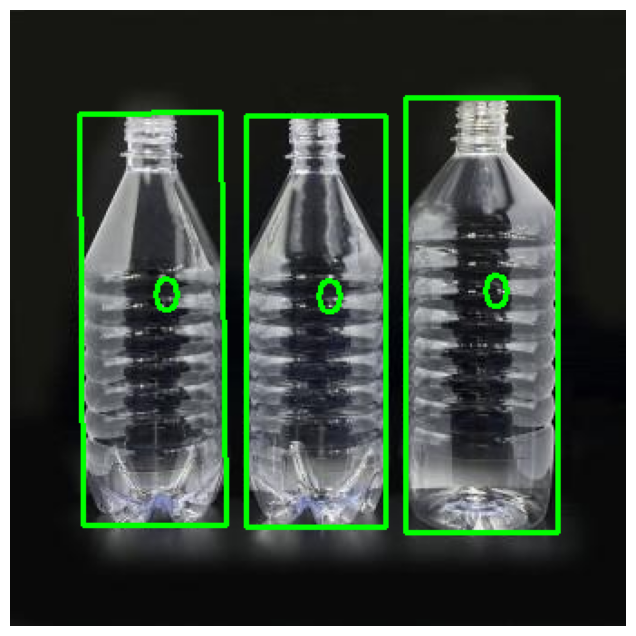

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# —– CONFIGURE THESE PATHS —–
img_path   = "b.jpg"
label_path = "b.txt"



if not os.path.isfile(img_path):
    raise FileNotFoundError(f"Image not found: {img_path}")
if not os.path.isfile(label_path):
    raise FileNotFoundError(f"Label not found: {label_path}")

# ── 2) Load image ──
img = cv2.imread(img_path)
h, w = img.shape[:2]

# ── 3) Parse labels & build polygons ──
polygons = []
with open(label_path) as f:
    for line in f:
        parts = line.strip().split()
        # 6‑column OBB
        if len(parts) == 6:
            cls, cx, cy, bw, bh, ang = parts
            cx, cy, bw, bh, ang = map(float, (cx, cy, bw, bh, ang))
            cls = int(cls)

            # Denormalize
            cx_px, cy_px = cx * w, cy * h
            bw_px, bh_px = bw * w, bh * h

            # Rotated rect → box points
            rect = ((cx_px, cy_px), (bw_px, bh_px), ang)
            box = cv2.boxPoints(rect)  # 4×2 float32

            # Round → clamp → cast
            box[:, 0] = np.clip(np.round(box[:, 0]), 0, w-1)
            box[:, 1] = np.clip(np.round(box[:, 1]), 0, h-1)
            pts = box.astype(np.int32)

            polygons.append((cls, pts))

        # 9‑column polygon
        elif len(parts) == 9:
            cls = int(parts[0])
            coords = list(map(float, parts[1:9]))
            pts = np.array([
                (coords[i] * w, coords[i+1] * h)
                for i in range(0, 8, 2)
            ], dtype=float)

            # Round → clamp → cast
            pts[:, 0] = np.clip(np.round(pts[:, 0]), 0, w-1)
            pts[:, 1] = np.clip(np.round(pts[:, 1]), 0, h-1)
            polygons.append((cls, pts.astype(np.int32)))

        else:
            # skip any malformed lines
            continue

# ── 4) Draw all polygons ──
vis = img.copy()
for cls, pts in polygons:
    cv2.polylines(vis, [pts], isClosed=True, color=(0,255,0), thickness=2)
    # Class label at centroid
    M = cv2.moments(pts)
    if M["m00"] != 0:
        cx = int(M["m10"]/M["m00"])
        cy = int(M["m01"]/M["m00"])
    else:
        cx, cy = pts[0]
    cv2.putText(vis, str(cls), (cx, cy-5),
                cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,255,0), 2)

# ── 5) Display ──
plt.figure(figsize=(10,8))
plt.imshow(cv2.cvtColor(vis, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()


In [ ]:
import os, cv2, glob

# ── CONFIG ──
src_root = "dataset1"          # original dataset root
dst_root = "dataset_poly"     # new output dataset
splits   = ["train", "val", "test"]

# ── PREPARE OUTPUT DIRS ──
for split in splits:
    os.makedirs(os.path.join(dst_root, "images", split), exist_ok=True)
    os.makedirs(os.path.join(dst_root, "labels", split), exist_ok=True)

# ── PROCESS ──
for split in splits:
    print(f"\n=== Processing split: {split} ===")
    img_dir = os.path.join(src_root, "images", split)
    lbl_dir = os.path.join(src_root, "labels", split)
    out_img = os.path.join(dst_root, "images", split)
    out_lbl = os.path.join(dst_root, "labels", split)

    # gather image files
    image_paths = (
        glob.glob(os.path.join(img_dir, "*.jpg")) +
        glob.glob(os.path.join(img_dir, "*.jpeg")) +
        glob.glob(os.path.join(img_dir, "*.png"))
    )
    print(f"Found {len(image_paths)} images in {img_dir}")

    for img_path in image_paths:
        fname = os.path.basename(img_path)
        base, _ = os.path.splitext(fname)
        src_label = os.path.join(lbl_dir, base + ".txt")

        # must have a source label
        if not os.path.isfile(src_label):
            print(f"  ⚠️ Skipping (no .txt) {fname}")
            continue

        # read image for size & potential re‑save
        img = cv2.imread(img_path)
        if img is None:
            print(f"  ❌ Failed to read {fname}")
            continue
        h, w = img.shape[:2]

        # convert 5‑col labels → 8‑point polygons
        out_polygons = []
        for line in open(src_label):
            parts = line.strip().split()
            if len(parts) != 5:
                continue
            cls, xc, yc, bw, bh = parts
            xc, yc, bw, bh = map(float, (xc, yc, bw, bh))
            cls = int(cls)

            # compute corners
            cx = xc * w; cy = yc * h
            bw_px = bw * w; bh_px = bh * h
            x1, y1 = cx - bw_px/2, cy - bh_px/2
            x2, y2 = cx + bw_px/2, cy - bh_px/2
            x3, y3 = cx + bw_px/2, cy + bh_px/2
            x4, y4 = cx - bw_px/2, cy + bh_px/2

            # normalize back
            pts = [
                x1/w, y1/h,
                x2/w, y2/h,
                x3/w, y3/h,
                x4/w, y4/h
            ]
            out_polygons.append((cls, pts))

        # if no valid polygons, skip this image
        if not out_polygons:
            print(f"  ⚠️ No valid labels for {fname}, skipping.")
            continue

        # otherwise copy image and write new label
        cv2.imwrite(os.path.join(out_img, fname), img)
        with open(os.path.join(out_lbl, base + ".txt"), "w") as f:
            for cls, pts in out_polygons:
                line = " ".join([str(cls)] + [f"{p:.6f}" for p in pts])
                f.write(line + "\n")
        print(f"  ✅ Saved {fname} with {len(out_polygons)} polygon(s)")

print("\n🎉 dataset_poly ready — only images with valid labels were copied.")





=== Processing split: train ===
Found 2177 images in dataset1/images/train
  ✅ Saved plastic_bottle-427_jpg.rf.3a540812b01cd7b7781a4b8453fbdaad.jpg with 1 polygon(s)
  ✅ Saved z1017_107_11zon_jpg.rf.d31982302085f38626af39e88a9c3ff3.jpg with 4 polygon(s)
  ✅ Saved -179_jpg.rf.f8e73db2a4c75975bf05ab01da8a22b2.jpg with 2 polygon(s)
  ✅ Saved z1015_105_11zon_jpg.rf.ef532ee1108c25d42ef98f4ef4bbc9e4.jpg with 4 polygon(s)
  ✅ Saved 100061_jpg.rf.3f96f371f068c2c3f259ecb56a3abde3.jpg with 5 polygon(s)
  ✅ Saved plastic-864-_JPG.rf.029fb20371c351fc45373f18a9c95514.jpg with 1 polygon(s)
  ✅ Saved plastic-872-_JPG.rf.43f7bc742815a8f9d6873c93c3273840.jpg with 1 polygon(s)
  ✅ Saved 700334_jpg.rf.76cf5156beca891e51b98bc2b62d8cc1.jpg with 1 polygon(s)
  ✅ Saved -38_jpg.rf.a8955f3be282248b305e875837c09f63.jpg with 1 polygon(s)
  ✅ Saved 0224021838_jpg.rf.8117b0eec0a72ab5383a71cdd26115ad.jpg with 1 polygon(s)
  ✅ Saved WhatsApp-Image-2022-12-24-at-00-38-14-1-_jpeg.rf.dc5a84476cf32c50304b92ba92801f40.j

In [ ]:
import os

dst_root = "dataset_poly"
yaml_path = os.path.join(dst_root, "data.yaml")

yaml_content = """\
path: dataset_poly
train: images/train
val:   images/valid
test:  images/test

names:
  0: bottle
"""

os.makedirs(dst_root, exist_ok=True)
with open(yaml_path, "w") as f:
    f.write(yaml_content)

print(f"✅ Written data.yaml to {yaml_path}")


✅ Written data.yaml to dataset_poly/data.yaml


In [ ]:
from ultralytics import YOLO
import torch

# 2) Paths & parameters
DATA_YAML = "dataset_poly/data.yaml"       # your dataset config
MODEL_CFG  = "yolo11n-obb.pt"              # base OBB pretrained weights
EPOCHS     = 100
IMG_SIZE   = 640
EXP_NAME   = "obb_polygon_train"

# 3) Load the OBB model
model = YOLO(MODEL_CFG, task="obb")  # explicitly set task='obb'
print("🚀 Training task:", model.task)

# 4) Kick off training
results = model.train(
    data=DATA_YAML,    # dataset path
    epochs=EPOCHS,
    imgsz=IMG_SIZE,
    name=EXP_NAME,
    device=0 if torch.cuda.is_available() else "cpu"
)

🚀 Training task: obb
Ultralytics 8.3.166 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=dataset_poly/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-obb.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=obb_polygon_train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plo

train: Scanning /content/dataset_poly/labels/train.cache... 2096 images, 81 backgrounds, 0 corrupt: 100%|██████████| 2177/2177 [00:00<?, ?it/s]


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.8±1.8 ms, read: 133.2±77.2 MB/s, size: 1361.6 KB)


val: Scanning /content/dataset_poly/labels/val... 1143 images, 31 backgrounds, 0 corrupt: 100%|██████████| 1174/1174 [00:02<00:00, 441.07it/s]

val: New cache created: /content/dataset_poly/labels/val.cache


Plotting labels to runs/obb/obb_polygon_train3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/obb/obb_polygon_train3
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.49G      1.832       2.35      3.024          6        640: 100%|██████████| 137/137 [01:22<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:15<00:00,  1.01s/it]

                   all       1174       1506      0.548      0.554      0.443      0.277



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.51G      1.631      1.649      2.733          4        640: 100%|██████████| 137/137 [01:21<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:27<00:00,  1.18s/it]


                   all       1174       1506      0.553      0.542      0.396      0.255

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.53G      1.602      1.618       2.71          4        640: 100%|██████████| 137/137 [01:13<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:20<00:00,  1.08s/it]

                   all       1174       1506      0.546      0.549      0.424      0.268



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      2.53G       1.51      1.577      2.681          3        640: 100%|██████████| 137/137 [01:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.20it/s]


                   all       1174       1506      0.554      0.548      0.401      0.274

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.56G      1.509      1.562      2.677          6        640: 100%|██████████| 137/137 [01:08<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:02<00:00,  1.19it/s]

                   all       1174       1506      0.586      0.539      0.429      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.57G      1.459      1.537      2.618          1        640: 100%|██████████| 137/137 [01:08<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.21it/s]

                   all       1174       1506      0.537      0.548      0.409      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.59G      1.424      1.508      2.636          2        640: 100%|██████████| 137/137 [01:06<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:02<00:00,  1.18it/s]

                   all       1174       1506      0.572      0.554      0.385      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.59G      1.384      1.513      2.632          7        640: 100%|██████████| 137/137 [01:05<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:00<00:00,  1.22it/s]

                   all       1174       1506      0.587      0.552      0.475      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.62G      1.378      1.502      2.616          1        640: 100%|██████████| 137/137 [01:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.21it/s]

                   all       1174       1506      0.591      0.565      0.409      0.294



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.63G      1.331      1.474      2.556          4        640: 100%|██████████| 137/137 [01:06<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:04<00:00,  1.15it/s]

                   all       1174       1506      0.605      0.543      0.491      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.65G      1.328      1.463      2.559          2        640: 100%|██████████| 137/137 [01:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:02<00:00,  1.19it/s]


                   all       1174       1506      0.589      0.546      0.424      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.65G      1.317      1.437      2.562          4        640: 100%|██████████| 137/137 [01:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.20it/s]

                   all       1174       1506      0.588       0.57      0.416      0.296



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.68G      1.289      1.435      2.563          5        640: 100%|██████████| 137/137 [01:05<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.20it/s]

                   all       1174       1506      0.589      0.541      0.423      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.69G        1.3      1.446      2.564          2        640: 100%|██████████| 137/137 [01:05<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:56<00:00,  1.31it/s]

                   all       1174       1506      0.613      0.555      0.438      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.71G      1.274      1.411      2.535          2        640: 100%|██████████| 137/137 [01:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.21it/s]

                   all       1174       1506      0.598      0.576      0.436      0.322



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.81G      1.262      1.419      2.529          3        640: 100%|██████████| 137/137 [01:06<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:58<00:00,  1.26it/s]


                   all       1174       1506      0.576      0.535        0.4      0.295

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.97G      1.225      1.383      2.504          3        640: 100%|██████████| 137/137 [01:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:00<00:00,  1.23it/s]

                   all       1174       1506      0.628      0.564      0.446      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.98G      1.248      1.402       2.48          4        640: 100%|██████████| 137/137 [01:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:02<00:00,  1.18it/s]

                   all       1174       1506      0.566      0.577      0.416      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         3G      1.236       1.38      2.479          4        640: 100%|██████████| 137/137 [01:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.19it/s]

                   all       1174       1506      0.637      0.548      0.499      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.01G      1.215      1.362      2.491          4        640: 100%|██████████| 137/137 [01:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.20it/s]

                   all       1174       1506      0.616      0.571      0.436      0.326



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.03G      1.218      1.392      2.473          2        640: 100%|██████████| 137/137 [01:06<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:00<00:00,  1.22it/s]

                   all       1174       1506      0.599      0.547      0.447      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.04G      1.201      1.361      2.462          5        640: 100%|██████████| 137/137 [01:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.20it/s]

                   all       1174       1506      0.593      0.588      0.409      0.301



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.06G      1.193      1.339      2.475          1        640: 100%|██████████| 137/137 [01:05<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:00<00:00,  1.22it/s]

                   all       1174       1506      0.621      0.582      0.514      0.391



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.07G      1.174      1.315      2.462          2        640: 100%|██████████| 137/137 [01:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:59<00:00,  1.24it/s]

                   all       1174       1506       0.61      0.575      0.473      0.356



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.09G      1.145      1.306      2.415          4        640: 100%|██████████| 137/137 [01:05<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:02<00:00,  1.18it/s]

                   all       1174       1506      0.607      0.592      0.481      0.361



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.11G      1.166      1.323      2.438          4        640: 100%|██████████| 137/137 [01:05<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:57<00:00,  1.28it/s]

                   all       1174       1506      0.603      0.555      0.423      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.12G      1.137      1.294      2.424          5        640: 100%|██████████| 137/137 [01:05<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:00<00:00,  1.22it/s]

                   all       1174       1506      0.579      0.593      0.457       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.13G      1.139      1.294       2.44          2        640: 100%|██████████| 137/137 [01:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.21it/s]

                   all       1174       1506      0.593      0.589      0.428      0.319



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.15G      1.154      1.284      2.449          2        640: 100%|██████████| 137/137 [01:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.20it/s]

                   all       1174       1506      0.593       0.57      0.453      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.17G      1.131      1.266      2.393          7        640: 100%|██████████| 137/137 [01:05<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.20it/s]

                   all       1174       1506      0.599      0.573       0.43      0.328



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.18G      1.125       1.29      2.396          4        640: 100%|██████████| 137/137 [01:08<00:00,  2.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:02<00:00,  1.19it/s]


                   all       1174       1506        0.6      0.587      0.433      0.321

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.19G      1.116      1.265      2.402          3        640: 100%|██████████| 137/137 [01:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:02<00:00,  1.19it/s]

                   all       1174       1506      0.608      0.582      0.458      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.21G       1.13      1.276      2.392          3        640: 100%|██████████| 137/137 [01:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:02<00:00,  1.18it/s]

                   all       1174       1506      0.636      0.553      0.499      0.379



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.23G      1.099      1.224      2.393          2        640: 100%|██████████| 137/137 [01:05<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.20it/s]

                   all       1174       1506      0.604       0.57      0.487      0.368



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.24G      1.116      1.266      2.417          1        640: 100%|██████████| 137/137 [01:08<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:02<00:00,  1.18it/s]

                   all       1174       1506      0.624      0.558      0.498       0.38



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.25G      1.097       1.25      2.406          2        640: 100%|██████████| 137/137 [01:07<00:00,  2.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:04<00:00,  1.15it/s]


                   all       1174       1506      0.624      0.566       0.46      0.354

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.27G      1.089      1.252      2.414          2        640: 100%|██████████| 137/137 [01:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.20it/s]

                   all       1174       1506      0.622      0.532      0.517      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.29G      1.097      1.266      2.388          4        640: 100%|██████████| 137/137 [01:07<00:00,  2.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:00<00:00,  1.22it/s]

                   all       1174       1506       0.61        0.6      0.498      0.388



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100       3.3G       1.06      1.215      2.354          3        640: 100%|██████████| 137/137 [01:05<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:00<00:00,  1.22it/s]

                   all       1174       1506       0.62      0.567      0.491      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.31G       1.08      1.224      2.376          4        640: 100%|██████████| 137/137 [01:05<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:00<00:00,  1.22it/s]

                   all       1174       1506        0.6      0.598      0.451      0.345



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.34G      1.082      1.206      2.376          3        640: 100%|██████████| 137/137 [01:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:00<00:00,  1.23it/s]

                   all       1174       1506      0.599      0.597      0.451      0.347



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.35G      1.062      1.202       2.35          2        640: 100%|██████████| 137/137 [01:04<00:00,  2.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:00<00:00,  1.21it/s]

                   all       1174       1506      0.596        0.6      0.472      0.371



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.37G      1.043      1.162      2.353          3        640: 100%|██████████| 137/137 [01:05<00:00,  2.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.20it/s]

                   all       1174       1506      0.618      0.582      0.492      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.37G      1.044      1.168      2.329          3        640: 100%|██████████| 137/137 [01:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.21it/s]

                   all       1174       1506      0.624       0.57      0.526      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       3.4G      1.063      1.204      2.368          2        640: 100%|██████████| 137/137 [01:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:00<00:00,  1.22it/s]

                   all       1174       1506      0.583      0.602      0.442      0.342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.41G      1.047      1.213       2.38          2        640: 100%|██████████| 137/137 [01:06<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.21it/s]

                   all       1174       1506      0.609      0.556      0.418      0.315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.43G      1.048      1.202      2.346          2        640: 100%|██████████| 137/137 [01:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.21it/s]


                   all       1174       1506      0.611       0.59      0.449      0.346

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.43G      1.033      1.183      2.349          1        640: 100%|██████████| 137/137 [01:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.20it/s]

                   all       1174       1506      0.626      0.561      0.475      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.46G      1.037      1.156      2.316          3        640: 100%|██████████| 137/137 [01:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:02<00:00,  1.19it/s]

                   all       1174       1506       0.61      0.584      0.481      0.367



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.47G      1.028      1.172      2.309          5        640: 100%|██████████| 137/137 [01:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:59<00:00,  1.23it/s]

                   all       1174       1506      0.599      0.576      0.494      0.387



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.49G      1.029      1.167      2.309          3        640: 100%|██████████| 137/137 [01:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.21it/s]

                   all       1174       1506      0.619      0.586      0.449      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.49G       1.02      1.154      2.332          3        640: 100%|██████████| 137/137 [01:05<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:02<00:00,  1.19it/s]

                   all       1174       1506      0.594      0.581      0.507      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.52G      1.032      1.146       2.33          2        640: 100%|██████████| 137/137 [01:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.20it/s]

                   all       1174       1506      0.617      0.578      0.514      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.53G      1.026      1.174      2.328          3        640: 100%|██████████| 137/137 [01:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [00:57<00:00,  1.28it/s]

                   all       1174       1506      0.625      0.598      0.457      0.354



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.55G      1.026      1.168      2.351          2        640: 100%|██████████| 137/137 [01:07<00:00,  2.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.20it/s]

                   all       1174       1506      0.595       0.58      0.458      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.55G      1.014      1.173      2.321          2        640: 100%|██████████| 137/137 [01:06<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.20it/s]

                   all       1174       1506      0.612      0.606      0.481      0.378



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.58G     0.9913      1.129      2.282          5        640: 100%|██████████| 137/137 [01:05<00:00,  2.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.21it/s]

                   all       1174       1506      0.603      0.575       0.46      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100       3.6G      1.001       1.13      2.324          4        640: 100%|██████████| 137/137 [01:06<00:00,  2.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:02<00:00,  1.19it/s]

                   all       1174       1506      0.596      0.582      0.471      0.372



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.61G     0.9959      1.131      2.321          4        640: 100%|██████████| 137/137 [01:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.20it/s]

                   all       1174       1506      0.613      0.586      0.535      0.417



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.62G     0.9967      1.127      2.316          1        640: 100%|██████████| 137/137 [01:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:02<00:00,  1.19it/s]

                   all       1174       1506      0.606      0.597      0.464       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.64G     0.9799      1.158      2.275          0        640: 100%|██████████| 137/137 [01:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.21it/s]

                   all       1174       1506      0.615      0.597       0.46      0.359



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.66G     0.9817      1.108      2.313          2        640: 100%|██████████| 137/137 [01:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:02<00:00,  1.19it/s]

                   all       1174       1506      0.615      0.594      0.508      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.67G      0.975      1.093      2.319          2        640: 100%|██████████| 137/137 [01:05<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.19it/s]

                   all       1174       1506      0.613      0.596      0.464      0.365



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.68G     0.9966      1.122      2.316          1        640: 100%|██████████| 137/137 [01:05<00:00,  2.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:00<00:00,  1.23it/s]

                   all       1174       1506      0.595      0.597      0.509      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100       3.7G     0.9458      1.074      2.271          6        640: 100%|██████████| 137/137 [01:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.21it/s]

                   all       1174       1506      0.615      0.572      0.506      0.399



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.72G     0.9414      1.057      2.258          4        640: 100%|██████████| 137/137 [01:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:00<00:00,  1.23it/s]

                   all       1174       1506      0.592      0.608      0.546       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.73G     0.9586      1.078      2.245          4        640: 100%|██████████| 137/137 [01:06<00:00,  2.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:00<00:00,  1.22it/s]


                   all       1174       1506        0.6       0.56      0.487       0.38

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.74G     0.9518      1.038       2.26          4        640: 100%|██████████| 137/137 [01:05<00:00,  2.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:02<00:00,  1.18it/s]

                   all       1174       1506      0.619      0.564      0.482      0.377



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.76G     0.9443      1.053      2.251          1        640: 100%|██████████| 137/137 [01:06<00:00,  2.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 74/74 [01:01<00:00,  1.20it/s]

                   all       1174       1506      0.615      0.585      0.521      0.408



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.77G     0.9391      1.054      2.247         38        640:  93%|█████████▎| 127/137 [01:00<00:04,  2.41it/s]

In [22]:
import cv2
import os
from glob import glob
from ultralytics import YOLO

# Function to rotate image
def rotate_image(img, angle):
    if angle == 0:
        return img
    elif angle == 90:
        return cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
    elif angle == 180:
        return cv2.rotate(img, cv2.ROTATE_180)
    elif angle == 270:
        return cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
    else:
        raise ValueError("Angle must be 0, 90, 180, or 270")

# Config
image_dir = "b"  # Folder containing 5 images
output_dir = "predictions_yolo_b_combined"  # All predictions saved here
model_path = "bestest.pt"  # Your trained YOLO model
angles = [0, 90, 180, 270]
os.makedirs(output_dir, exist_ok=True)

# Load model
model = YOLO(model_path)

# Get image paths (first 5 images only)
image_paths = sorted(glob(os.path.join(image_dir, "*.*")))[:5]

# Process each image and each rotation
for angle in angles:
    for idx, img_path in enumerate(image_paths):
        img_name = os.path.basename(img_path)
        base_name, ext = os.path.splitext(img_name)

        image = cv2.imread(img_path)
        if image is None:
            print(f"❌ Failed to read {img_path}")
            continue

        rotated = rotate_image(image.copy(), angle)

        # Predict with YOLO
        results = model(rotated)[0]

        # Draw bounding boxes
        for box, conf, cls in zip(results.boxes.xyxy, results.boxes.conf, results.boxes.cls):
            x1, y1, x2, y2 = map(int, box)
            label = f"{model.names[int(cls)]} {conf:.2f}"
            cv2.rectangle(rotated, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(rotated, label, (x1, max(y1 - 10, 0)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

        # Save result image with angle in filename
        save_filename = f"{base_name}_rot{angle}{ext}"
        save_path = os.path.join(output_dir, save_filename)
        cv2.imwrite(save_path, rotated)
        print(f"✅ Saved: {save_path}")






0: 640x480 (no detections), 7.1ms
Speed: 1.4ms preprocess, 7.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)
✅ Saved: predictions_yolo_b_combined/WhatsApp Image 2025-07-21 at 12.10.51 (1)_rot0.jpeg

0: 640x480 2 bottles, 6.1ms
Speed: 1.6ms preprocess, 6.1ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)
✅ Saved: predictions_yolo_b_combined/WhatsApp Image 2025-07-21 at 12.10.51_rot0.jpeg

0: 640x480 1 bottle, 5.0ms
Speed: 1.5ms preprocess, 5.0ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)
✅ Saved: predictions_yolo_b_combined/WhatsApp Image 2025-07-21 at 12.10.55 (1)_rot0.jpeg

0: 640x480 2 bottles, 6.1ms
Speed: 1.5ms preprocess, 6.1ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
✅ Saved: predictions_yolo_b_combined/WhatsApp Image 2025-07-21 at 12.10.55_rot0.jpeg

0: 640x480 2 bottles, 5.4ms
Speed: 1.5ms preprocess, 5.4ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 480)
✅ Saved: predictions_y

In [18]:
from ultralytics import YOLO, SAM
import cv2
import os
from glob import glob
import numpy as np

# === CONFIG ===
model_path = "bestest.pt"
sam_model_path = "mobile_sam.pt"
image_dir = "dataset1/images/train"
output_dir = "predictions_yolo_sam"
bottle_class_id = 0
target_size = (1000, 1000)

# === SETUP ===
os.makedirs(output_dir, exist_ok=True)
yolo_model = YOLO(model_path)
sam_model = SAM(sam_model_path)
image_paths = sorted(glob(os.path.join(image_dir, "*.*")))[:100]

# === PROCESS ===
for idx, img_path in enumerate(image_paths):
    print(f"📷 YOLO+SAM Processing {img_path}...")

    results = yolo_model(img_path)[0]
    img = cv2.imread(img_path)
    if img is None:
        print(f"⚠️ Skipping unreadable image: {img_path}")
        continue

    # Get bounding boxes
    bottle_boxes = [
        box.tolist()
        for box, cls in zip(results.boxes.xyxy, results.boxes.cls)
        if int(cls) == bottle_class_id
    ]

    # Run SAM if boxes found
    if bottle_boxes:
        sam_results = sam_model.predict(img_path, bboxes=bottle_boxes)

        # Overlay SAM masks
        for mask in sam_results[0].masks.data:
            mask_np = mask.cpu().numpy().astype("uint8") * 255
            color_mask = np.zeros_like(img)
            color_mask[mask_np > 0] = [0, 255, 0]
            img = cv2.addWeighted(img, 1.0, color_mask, 0.4, 0)

    # Draw YOLO bounding boxes
    for box, conf, cls in zip(results.boxes.xyxy, results.boxes.conf, results.boxes.cls):
        if int(cls) == bottle_class_id:
            x1, y1, x2, y2 = map(int, box)
            label = f"{yolo_model.names[int(cls)]} {conf:.2f}"
            cv2.rectangle(img, (x1, y1), (x2, y2), (255, 0, 0), 2)
            cv2.putText(img, label, (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)

    # Resize and save
    img_resized = cv2.resize(img, target_size)
    save_path = os.path.join(output_dir, f"yolo_sam_{idx:03d}.jpg")
    cv2.imwrite(save_path, img_resized)



📷 YOLO+SAM Processing dataset1/images/train/-106_jpg.rf.fce981e61c903a42660187f7dc214037.jpg...

image 1/1 /home/developer/Desktop/y/dataset1/images/train/-106_jpg.rf.fce981e61c903a42660187f7dc214037.jpg: 384x640 6 bottles, 6.7ms
Speed: 0.7ms preprocess, 6.7ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/developer/Desktop/y/dataset1/images/train/-106_jpg.rf.fce981e61c903a42660187f7dc214037.jpg: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 54.4ms
Speed: 2.8ms preprocess, 54.4ms inference, 0.4ms postprocess per image at shape (1, 3, 1024, 1024)
📷 YOLO+SAM Processing dataset1/images/train/-109_jpg.rf.976ce2bf68a1b8f94295e13f969c46a9.jpg...

image 1/1 /home/developer/Desktop/y/dataset1/images/train/-109_jpg.rf.976ce2bf68a1b8f94295e13f969c46a9.jpg: 640x640 1 bottle, 6.6ms
Speed: 1.4ms preprocess, 6.6ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)

image 1/1 /home/developer/Desktop/y/dataset1/images/train/-109_jpg.rf.976ce2bf68a1b8f94295e13